# **Chapter 2: SGD vs BGD**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import seaborn as sns

np.random.seed(42)

In [ ]:
class QuadraticOptimizationDemo:
    def __init__(self, n_samples=1000, n_features=2):
        self.n_samples = n_samples
        self.n_features = n_features

        self.A = np.random.randn(n_samples, n_features)
        self.b = np.random.randn(n_samples)

        self.x_optimal = np.linalg.solve(self.A.T @ self.A, self.A.T @ self.b)

    def compute_loss(self, x):
        residuals = self.A @ x - self.b
        return 0.5 * np.sum(residuals**2)/self.n_samples

    def compute_full_gradient(self, x):
        residuals = self.A @ x - self.b
        return (1/self.n_samples) * self.A.T @ residuals

    def compute_stochastic_gradient(self, x, batch_indices):
        A_batch = self.A[batch_indices]
        b_batch = self.b[batch_indices]
        residuals = A_batch @ x - b_batch
        return (1/len(batch_indices)) * A_batch.T @ residuals

    def batch_gradient_descent(self, x_init, learning_rate=0.01, n_iterations=1000):
        x = x_init.copy()
        trajectory = [x.copy()]
        losses = [self.compute_loss(x)]
        gradients = [self.compute_full_gradient(x)]

        for i in range(n_iterations):
            grad = self.compute_full_gradient(x)
            x = x - learning_rate * grad

            trajectory.append(x.copy())
            losses.append(self.compute_loss(x))
            gradients.append(grad)

        return np.array(trajectory), np.array(losses), np.array(gradients)

    def stochastic_gradient_descent(self, x_init, learning_rate=0.01,
                                  n_iterations=1000, batch_size=1):
        x = x_init.copy()
        trajectory = [x.copy()]
        losses = [self.compute_loss(x)]
        gradients = [self.compute_full_gradient(x)]
        stoch_gradients = []

        for i in range(n_iterations):
            batch_indices = np.random.choice(self.n_samples, batch_size, replace=False)
            stoch_grad = self.compute_stochastic_gradient(x, batch_indices)
            x = x - learning_rate * stoch_grad

            trajectory.append(x.copy())
            losses.append(self.compute_loss(x))
            gradients.append(self.compute_full_gradient(x))
            stoch_gradients.append(stoch_grad)

        return (np.array(trajectory), np.array(losses),
                np.array(gradients), np.array(stoch_gradients))

True optimum: [ 0.00483611 -0.05124547]
Starting point: [3. 3.]
Distance to optimum: 4.276

Running Batch Gradient Descent...
Running Stochastic Gradient Descent...


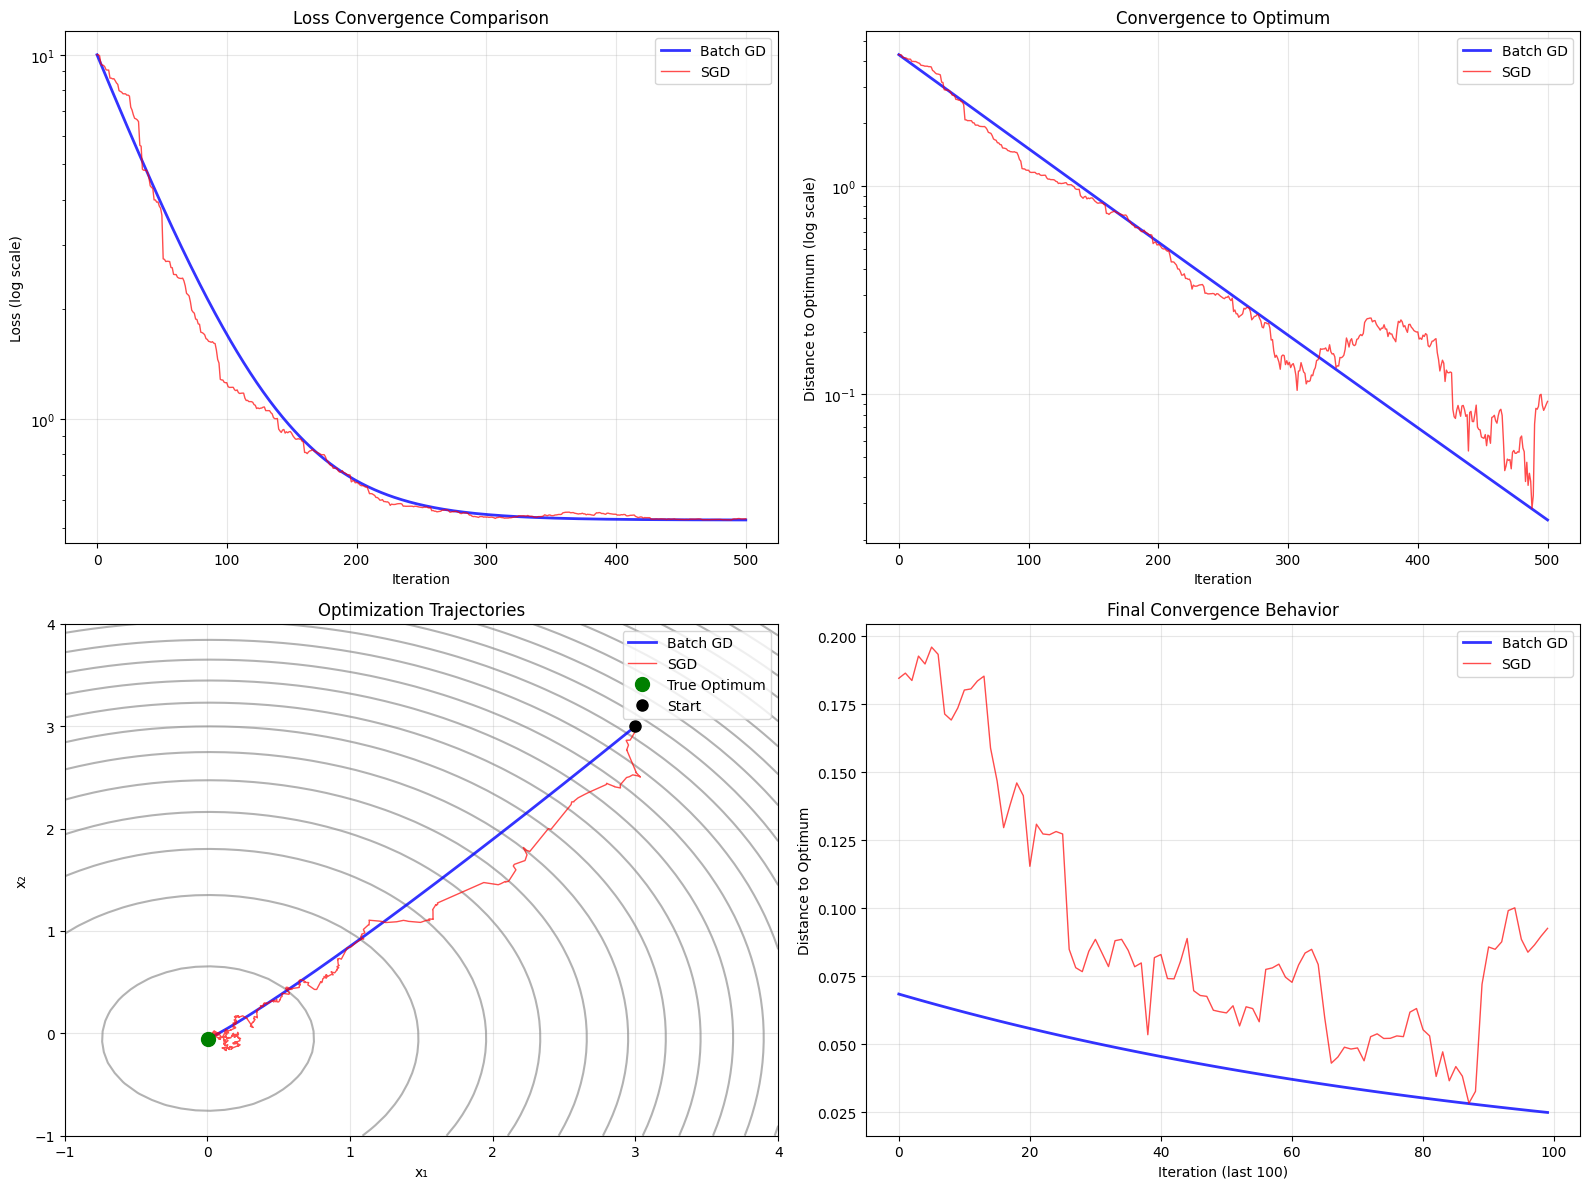


CONVERGENCE ANALYSIS

Final distances to optimum:
Batch GD: 0.024996
SGD:      0.092658

Final losses:
Batch GD: 0.52758816
SGD:      0.53152439

Oscillation analysis (last 100 iterations):
Batch GD std: 0.012590
SGD std:      0.045313
SGD oscillation ratio: 3.60x higher


In [ ]:
def demonstrate_gradient_noise():
    demo = QuadraticOptimizationDemo(n_samples=1000, n_features=2)

    x_init = np.array([3.0, 3.0])
    learning_rate = 0.01
    n_iterations = 500

    print(f"True optimum: {demo.x_optimal}")
    print(f"Starting point: {x_init}")
    print(f"Distance to optimum: {np.linalg.norm(x_init - demo.x_optimal):.3f}")

    print("\nRunning Batch Gradient Descent...")
    bgd_traj, bgd_losses, bgd_grads = demo.batch_gradient_descent(
        x_init, learning_rate, n_iterations)

    print("Running Stochastic Gradient Descent...")
    sgd_traj, sgd_losses, sgd_grads, sgd_stoch_grads = demo.stochastic_gradient_descent(
        x_init, learning_rate, n_iterations, batch_size=1)

    fig = plt.figure(figsize=(16, 12))

    ax1 = plt.subplot(2, 2, 1)
    plt.plot(bgd_losses, 'b-', linewidth=2, label='Batch GD', alpha=0.8)
    plt.plot(sgd_losses, 'r-', linewidth=1, label='SGD', alpha=0.7)
    plt.yscale('log')
    plt.xlabel('Iteration')
    plt.ylabel('Loss (log scale)')
    plt.title('Loss Convergence Comparison')
    plt.legend()
    plt.grid(True, alpha=0.3)

    ax2 = plt.subplot(2, 2, 2)
    bgd_distances = np.linalg.norm(bgd_traj - demo.x_optimal, axis=1)
    sgd_distances = np.linalg.norm(sgd_traj - demo.x_optimal, axis=1)

    plt.plot(bgd_distances, 'b-', linewidth=2, label='Batch GD', alpha=0.8)
    plt.plot(sgd_distances, 'r-', linewidth=1, label='SGD', alpha=0.7)
    plt.yscale('log')
    plt.xlabel('Iteration')
    plt.ylabel('Distance to Optimum (log scale)')
    plt.title('Convergence to Optimum')
    plt.legend()
    plt.grid(True, alpha=0.3)

    # ax3 = plt.subplot(2, 2, 3)
    # bgd_grad_norms = np.linalg.norm(bgd_grads, axis=1)
    # sgd_grad_norms = np.linalg.norm(sgd_grads, axis=1)
    # sgd_stoch_grad_norms = np.linalg.norm(sgd_stoch_grads, axis=1)

    # plt.plot(bgd_grad_norms, 'b-', linewidth=2, label='Batch GD (True Grad)', alpha=0.8)
    # plt.plot(sgd_grad_norms, 'g--', linewidth=1.5, label='SGD (True Grad)', alpha=0.7)
    # plt.plot(sgd_stoch_grad_norms, 'r-', linewidth=1, label='SGD (Stoch Grad)', alpha=0.6)
    # plt.yscale('log')
    # plt.xlabel('Iteration')
    # plt.ylabel('Gradient Norm (log scale)')
    # plt.title('Gradient Noise Comparison')
    # plt.legend()
    # plt.grid(True, alpha=0.3)

    ax3 = plt.subplot(2, 2, 3)
    x_range = np.linspace(-1, 4, 50)
    y_range = np.linspace(-1, 4, 50)
    X, Y = np.meshgrid(x_range, y_range)
    Z = np.zeros_like(X)

    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            Z[i, j] = demo.compute_loss(np.array([X[i, j], Y[i, j]]))

    plt.contour(X, Y, Z, levels=20, alpha=0.6, colors='gray')
    plt.plot(bgd_traj[:, 0], bgd_traj[:, 1], 'b-', linewidth=2,
             label='Batch GD', alpha=0.8)
    plt.plot(sgd_traj[:, 0], sgd_traj[:, 1], 'r-', linewidth=1,
             label='SGD', alpha=0.7)
    plt.plot(demo.x_optimal[0], demo.x_optimal[1], 'go', markersize=10,
             label='True Optimum')
    plt.plot(x_init[0], x_init[1], 'ko', markersize=8, label='Start')
    plt.xlabel('x₁')
    plt.ylabel('x₂')
    plt.title('Optimization Trajectories')
    plt.legend()
    plt.grid(True, alpha=0.3)

    ax4 = plt.subplot(2, 2, 4)
    last_n = 100
    bgd_final_dist = bgd_distances[-last_n:]
    sgd_final_dist = sgd_distances[-last_n:]

    plt.plot(range(len(bgd_final_dist)), bgd_final_dist, 'b-',
             linewidth=2, label='Batch GD', alpha=0.8)
    plt.plot(range(len(sgd_final_dist)), sgd_final_dist, 'r-',
             linewidth=1, label='SGD', alpha=0.7)
    plt.xlabel('Iteration (last 100)')
    plt.ylabel('Distance to Optimum')
    plt.title('Final Convergence Behavior')
    plt.legend()
    plt.grid(True, alpha=0.3)

    # ax6 = plt.subplot(2, 3, 6)
    # window_size = 50
    # grad_var_x1 = []
    # grad_var_x2 = []

    # for i in range(window_size, len(sgd_stoch_grads)):
    #     window_grads = sgd_stoch_grads[i-window_size:i]
    #     grad_var_x1.append(np.var(window_grads[:, 0]))
    #     grad_var_x2.append(np.var(window_grads[:, 1]))

    # plt.plot(grad_var_x1, 'r-', linewidth=1.5, label='Grad Variance (x₁)', alpha=0.7)
    # plt.plot(grad_var_x2, 'b-', linewidth=1.5, label='Grad Variance (x₂)', alpha=0.7)
    # plt.xlabel('Iteration')
    # plt.ylabel('Gradient Variance (50-iter window)')
    # plt.title('Persistent Gradient Noise')
    # plt.legend()
    # plt.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    print("\n" + "="*60)
    print("CONVERGENCE ANALYSIS")
    print("="*60)

    print(f"\nFinal distances to optimum:")
    print(f"Batch GD: {bgd_distances[-1]:.6f}")
    print(f"SGD:      {sgd_distances[-1]:.6f}")

    print(f"\nFinal losses:")
    print(f"Batch GD: {bgd_losses[-1]:.8f}")
    print(f"SGD:      {sgd_losses[-1]:.8f}")

    final_phase = -100
    bgd_final_std = np.std(bgd_distances[final_phase:])
    sgd_final_std = np.std(sgd_distances[final_phase:])

    print(f"\nOscillation analysis (last 100 iterations):")
    print(f"Batch GD std: {bgd_final_std:.6f}")
    print(f"SGD std:      {sgd_final_std:.6f}")
    print(f"SGD oscillation ratio: {sgd_final_std/bgd_final_std:.2f}x higher")

    return demo, bgd_traj, sgd_traj, bgd_losses, sgd_losses

if __name__ == "__main__":
    demo, bgd_traj, sgd_traj, bgd_losses, sgd_losses = demonstrate_gradient_noise()

# **Required Packages**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from collections import deque
import seaborn as sns
from scipy.spatial.distance import cdist
from scipy.stats import ttest_rel
import time
import yfinance as yf
import pandas as pd
from datetime import datetime
from scipy.optimize import minimize

from typing import Dict, List, Tuple, Optional, Set


# SVRG

In [ ]:
def svrg(self, returns: np.ndarray,
          eta: float = 0.1,
          m: Optional[int] = None,
          max_epochs: int = 50,
          non_negative: bool = True,
          track_history: bool = True,
          track_gradient_norms: bool = True,
          target_obj: Optional[float] = None,
          tol: float = 1e-6,
          inner_check: Optional[int] = None) -> Dict:
    """
    Stochastic Variance-Reduced Gradient implementation.

    Args:
        returns: T x n array of return samples
        eta: Learning rate (constant)
        m: Inner loop length (default: 2T)
        max_epochs: Maximum epochs
        non_negative: Enforce non-negative weights
        track_history: Track objective history
        track_gradient_norms: Track gradient norms
        target_obj: The target optimal objective value for stopping
        tol: Tolerance for the optimality gap

    Returns:
        Dictionary with solution and history
    """
    T, n = returns.shape
    mu_hat = np.mean(returns, axis=0)
    Sigma_hat = np.cov(returns.T)

    if m is None:
        m = T

    if inner_check is None or inner_check <= 0:
        inner_check = m + 1

    # Initialize
    w_tilde = np.ones(n) / n

    history = {'objective': [], 'weights': [], 'time': [], 'grad_evals': [],
                'gradient_norms':[], 'stochastic_gradient_norms':[]}
    start_time = time.time()
    grad_count = 0

    # Track initial objective
    if track_history:
        obj_val = self.objective_function(w_tilde, mu_hat, Sigma_hat)
        history['objective'].append(obj_val)
        history['weights'].append(w_tilde.copy())
        history['time'].append(0)
        history['grad_evals'].append(0)

        if track_gradient_norms:
          true_grad = self.gradient(w_tilde, mu_hat, Sigma_hat)
          history['gradient_norms'].append(np.linalg.norm(true_grad))

    # Check initial gap for early exit
    #
    if target_obj is not None:
      gap0 = abs(history['objective'][-1] - target_obj)
      if gap0 < tol:
        print(f"SVRG stopping early at epoch 0 due to optimality gap {gap0:.2e} < tol {tol:.2e}.")
        return {
            'weights': w_tilde,
            'history': history,
            'algorithm': 'SVRG',
            'mu_hat': mu_hat,
            'Sigma_hat': Sigma_hat
        }


    for s in range(max_epochs):
        # Compute full gradient at reference point
        mu_tilde = self.gradient(w_tilde, mu_hat, Sigma_hat)
        grad_count += T  # Full gradient computation

        # Inner loop
        w = w_tilde.copy()
        epoch_gradient_norms = []

        for j in range(m):
            # Sample random index
            t = np.random.randint(0, T)

            # Compute variance-reduced gradient
            g_current = self.stochastic_gradient(w, returns[t], mu_hat)
            g_reference = self.stochastic_gradient(w_tilde, returns[t], mu_hat)
            g = g_current - g_reference + mu_tilde
            # Changed from 2 to 1, REVISIT
            grad_count += 2  # Two gradient evaluations

            if track_gradient_norms and j%10 == 0:
              epoch_gradient_norms.append(np.linalg.norm(g))

            # Update
            w = w - eta * g

            # Project
            w = self.project_simplex(w, non_negative)

            # Optional inner check for convergence (can accelerate if target is known)
            if (j + 1)% inner_check == 0 and target_obj is not None:
                obj_inner = self.objective_function(w, mu_hat, Sigma_hat)
                gap_inner = abs(obj_inner - target_obj)
                if gap_inner < tol:
                  print(f"SVRG stopping early in inner loop of epoch {s+1} (iter {j+1}) due to optimality gap {gap_inner:.2e} < tol {tol:.2e}.")
                  w_tilde = w.copy() # Update reference point before returning
                  # Track final history point before returning
                  if track_history:
                      obj_val = self.objective_function(w_tilde, mu_hat, Sigma_hat)
                      history['objective'].append(obj_val)
                      history['weights'].append(w_tilde.copy())
                      history['time'].append(time.time() - start_time)
                      history['grad_evals'].append(grad_count)
                      if track_gradient_norms:
                        true_grad = self.gradient(w_tilde, mu_hat, Sigma_hat)
                        history['gradient_norms'].append(np.linalg.norm(true_grad))
                  return {
                      'weights': w_tilde,
                      'history': history,
                      'algorithm': 'SVRG',
                      'mu_hat': mu_hat,
                      'Sigma_hat': Sigma_hat
                  }


        # Update reference point (Option 1: final iterate)
        w_tilde = w.copy()

        if track_gradient_norms and epoch_gradient_norms:
          history['stochastic_gradient_norms'].append(np.mean(epoch_gradient_norms))

        # Track history and check stopping criterion at the end of epoch
        if track_history:
            obj_val = self.objective_function(w_tilde, mu_hat, Sigma_hat)
            history['objective'].append(obj_val)
            history['weights'].append(w_tilde.copy())
            history['time'].append(time.time() - start_time)
            history['grad_evals'].append(grad_count)
            if track_gradient_norms:
              true_grad = self.gradient(w_tilde, mu_hat, Sigma_hat)
              history['gradient_norms'].append(np.linalg.norm(true_grad))

            if target_obj is not None:
              gap_epoch = abs(history['objective'][-1] - target_obj)
              if gap_epoch < tol:
                print(f"SVRG stopping early at end of epoch {s+1} due to optimality gap {gap_epoch:.2e} < tol {tol:.2e}.")
                break

        # Check convergence (alternative criterion, not based on target_obj)
        #if s > 0 and len(history['objective']) > 1:
        #    if abs(history['objective'][-1] - history['objective'][-2]) < 1e-8:
        #        break

    # Final evaluation (after loop potentially breaks early)
    # History is already tracked at the end of each epoch, so the last point is the final one
    return {
        'weights': w_tilde, # Return the final weights after potential early stopping
        'history': history,
        'algorithm': 'SVRG',
        'mu_hat': mu_hat,
        'Sigma_hat': Sigma_hat
    }


# SGD

In [ ]:
def sgd(self, returns: np.ndarray,
      eta0: float = 0.01,
      gamma: float = 0.1,
      max_iter: int = 1000,
      non_negative: bool = True,
      track_history: bool = True,
      track_gradient_norms: bool = True,
      target_obj: Optional[float] = None,  # Added target_obj
      tol: float = 1e-6) -> Dict: # Added tolerance
  """
  Stochastic Gradient Descent implementation.

  Args:
      returns: T x n array of return samples
      eta0: Initial learning rate
      gamma: Learning rate decay parameter
      max_iter: Maximum iterations
      non_negative: Enforce non-negative weights
      track_history: Track objective history
      track_gradient_norms: Track gradient norms
      target_obj: The target optimal objective value for stopping
      tol: Tolerance for the optimality gap

  Returns:
      Dictionary with solution and history
  """
  T, n = returns.shape
  mu_hat = np.mean(returns, axis=0)
  Sigma_hat = np.cov(returns.T)

  # Initialize weights
  w = np.ones(n) / n

  history = {'objective': [], 'weights': [], 'time': [], 'grad_evals': [],
              'gradient_norms':[], 'stochastic_gradient_norms':[]}
  start_time = time.time()

  # Track initial objective
  if track_history:
      obj_val = self.objective_function(w, mu_hat, Sigma_hat)
      history['objective'].append(obj_val)
      history['weights'].append(w.copy())
      history['time'].append(0)
      history['grad_evals'].append(0)
      if track_gradient_norms:
        true_grad = self.gradient(w, mu_hat, Sigma_hat)
        history['gradient_norms'].append(np.linalg.norm(true_grad))

  # Track best solution
  best_w = w.copy()
  best_obj = self.objective_function(w, mu_hat, Sigma_hat)

  for k in range(max_iter):
      # Sample random index
      t = np.random.randint(0, T)

      # Compute stochastic gradient
      g_k = self.stochastic_gradient(w, returns[t], mu_hat)

      if track_gradient_norms and k%10 == 0:
        history['stochastic_gradient_norms'].append(np.linalg.norm(g_k))

      # Update with diminishing step size
      eta_k = eta0 / (1 + gamma * k)
      w = w - eta_k * g_k

      # Project onto feasible set
      w = self.project_simplex(w, non_negative)

      # Update best solution
      if k % 1 == 0:
          current_obj = self.objective_function(w, mu_hat, Sigma_hat)
          if current_obj < best_obj:
              best_obj = current_obj
              best_w = w.copy()

      # Track history and check stopping criterion
      if track_history and (k + 1) % 10 == 0:
          obj_val = self.objective_function(w, mu_hat, Sigma_hat)
          history['objective'].append(obj_val)
          history['weights'].append(w.copy())
          history['time'].append(time.time() - start_time)
          history['grad_evals'].append(k + 1)
          if track_gradient_norms and (k + 1)%100 == 0:
            true_grad = self.gradient(w, mu_hat, Sigma_hat)
            history['gradient_norms'].append(np.linalg.norm(true_grad))

          # Check stopping criterion
          if target_obj is not None:
              gap = abs(obj_val - target_obj)
              if gap < tol:
                  print(f"SGD stopping early at iteration {k+1} due to optimality gap {gap:.2e} < tol {tol:.2e}.")
                  break


  # Final evaluation (after loop potentially breaks early)
  if track_history:
      # Use the last computed weights for final evaluation if early stopping occurred,
      # otherwise use the best_w found during the full max_iter.
      final_w = w if (k + 1) < max_iter else best_w
      obj_val = self.objective_function(final_w, mu_hat, Sigma_hat)
      history['objective'].append(obj_val)
      history['weights'].append(final_w.copy())
      history['time'].append(time.time() - start_time)
      history['grad_evals'].append(k + 1) # Record final iteration count
      if track_gradient_norms:
        true_grad = self.gradient(final_w, mu_hat, Sigma_hat)
        history['gradient_norms'].append(np.linalg.norm(true_grad))

  return {
      'weights': final_w, # Return the final weights after potential early stopping
      'history': history,
      'algorithm': 'SGD',
      'mu_hat': mu_hat,
      'Sigma_hat': Sigma_hat
  }

# SAGA

In [ ]:
def saga(self, returns: np.ndarray,
          eta: float = 0.01,
          max_iter: int = 5000,
          non_negative: bool = True,
          track_history: bool = True,
          track_gradient_norms: bool = True,
          target_obj: Optional[float] = None,  # Added target_obj
          tol: float = 1e-6) -> Dict: # Added tolerance
    """
    SAGA implementation.

    Args:
        returns: T x n array of return samples
        eta: Learning rate (constant)
        max_iter: Maximum iterations
        non_negative: Enforce non-negative weights
        track_history: Track objective history
        track_gradient_norms: Track gradient norms
        target_obj: The target optimal objective value for stopping
        tol: Tolerance for the optimality gap

    Returns:
        Dictionary with solution and history
    """
    T, n = returns.shape
    mu_hat = np.mean(returns, axis=0)
    Sigma_hat = np.cov(returns.T)

    # Initialize
    w = np.ones(n) / n

    # Initialize gradient table
    phi = np.zeros((T, n))
    for t in range(T):
        phi[t] = self.stochastic_gradient(w, returns[t], mu_hat)

    # Compute initial average
    G = np.mean(phi, axis=0)

    history = {'objective': [], 'weights': [], 'time': [], 'grad_evals': [],
                'gradient_norms':[], 'stochastic_gradient_norms':[]}
    start_time = time.time()

    # Track initial objective
    if track_history:
        obj_val = self.objective_function(w, mu_hat, Sigma_hat)
        history['objective'].append(obj_val)
        history['weights'].append(w.copy())
        history['time'].append(0)
        history['grad_evals'].append(T)  # Initial gradient table computation
        if track_gradient_norms:
          true_grad = self.gradient(w, mu_hat, Sigma_hat)
          history['gradient_norms'].append(np.linalg.norm(true_grad))

    # Check initial gap for early exit
    if target_obj is not None:
        gap0 = abs(history['objective'][-1] - target_obj)
        if gap0 < tol:
            print(f"SAGA stopping early at iteration 0 due to optimality gap {gap0:.2e} < tol {tol:.2e}.")
            return {
                'weights': w,
                'history': history,
                'algorithm': 'SAGA',
                'mu_hat': mu_hat,
                'Sigma_hat': Sigma_hat
            }


    for k in range(max_iter):
        # Sample random index
        t = np.random.randint(0, T)

        # Compute current gradient
        u = self.stochastic_gradient(w, returns[t], mu_hat)

        # Form variance-reduced gradient
        g = u - phi[t] + G

        # Update weights
        w = w - eta * g

        # Project
        w = self.project_simplex(w, non_negative)

        # Update table and average
        G = G + (u - phi[t]) / T
        phi[t] = u.copy()

        # Track history and check stopping criterion
        # Delete check for every 50 iterations (k+1)%50 == 0
        if track_history: # Check every 50 iterations
            current_obj = self.objective_function(w, mu_hat, Sigma_hat)
            history['objective'].append(current_obj)
            history['weights'].append(w.copy())
            history['time'].append(time.time() - start_time)
            history['grad_evals'].append(T + k + 1)

            if track_gradient_norms: # delete here for % 500
              true_grad = self.gradient(w, mu_hat, Sigma_hat)
              history['gradient_norms'].append(np.linalg.norm(true_grad))

            # Check stopping criterion
            if target_obj is not None:
                gap = abs(current_obj - target_obj)
                if gap < tol:
                    print(f"SAGA stopping early at iteration {k+1} due to optimality gap {gap:.2e} < tol {tol:.2e}.")
                    break


    # Final evaluation (after loop potentially breaks early)
    if track_history: # Ensure last point is recorded if not already
        obj_val = self.objective_function(w, mu_hat, Sigma_hat)
        history['objective'].append(obj_val)
        history['weights'].append(w.copy())
        history['time'].append(time.time() - start_time)
        history['grad_evals'].append(T + k + 1) # Record final iteration count

        if track_gradient_norms:
          true_grad = self.gradient(w, mu_hat, Sigma_hat)
          history['gradient_norms'].append(np.linalg.norm(true_grad))


    return {
        'weights': w, # Return the final weights after potential early stopping
        'history': history,
        'algorithm': 'SAGA',
        'mu_hat': mu_hat,
        'Sigma_hat': Sigma_hat
    }

# EpsilonN-SAGA

In [ ]:
# Utility Function
def _construct_neighborhoods(self, returns: np.ndarray, k: int = 5) -> List[Set[int]]:
        """
        Compute k-nearest neighbor neighborhoods based on data similarity.

        Args:
            returns: T x n array of return samples
            k: Number of nearest neighbors

        Returns:
            List of sets containing neighbor indices for each data point
        """
        T, n = returns.shape
        neighborhoods = []

        # Compute pairwise distances
        for i in range(T):
            distances = np.array([np.linalg.norm(returns[i] - returns[j]) for j in range(T)])
            # Find k nearest neighbors (excluding self)
            neighbor_indices = np.argpartition(distances, k+1)[:k+1]
            neighbor_indices = neighbor_indices[neighbor_indices != i][:k]
            neighborhoods.append(set(neighbor_indices))

        return neighborhoods


def _compute_bound_matrix(self, returns: np.ndarray,
                                neighborhoods: List[Set[int]]) -> np.ndarray:
    """
    Precompute approximation error bounds for dynamic neighborhood pruning.

    Args:
        returns: T x n array of return samples
        neighborhoods: List of sets containing neighbor indices

    Returns:
        Matrix of approximation bound functions
    """
    T, n = returns.shape
    # epsilon_bounds = np.empty((T, n), dtype=object)
    mu_hat = np.mean(returns, axis=0)
    r_cent = returns - mu_hat
    norms = np.linalg.norm(r_cent, axis=1)
    B = np.zeros((T, T), dtype = float)
    for i in range(T):
      for j in neighborhoods[i]:
        d = np.linalg.norm(returns[i] - returns[j])
        B[i, j] = d *(norms[i] + norms[j])
    return B


In [ ]:
def epsilon_n_saga(self,
                    returns: np.ndarray,
                    eta: float              = 0.01,
                    epsilon: float          = 0.1,
                    q: int                  = 5,
                    max_iter: int           = 5000,
                    non_negative: bool      = True,
                    track_history: bool     = True,
                    track_gradient_norms: bool = True,
                    target_obj: Optional[float] = None,
                    tol: float              = 1e-6
                  ) -> dict:
    """
    N-ε-SAGA with ridge‐style bound:
      err_ij = B[i,j] * ||w||
    """
    T, n = returns.shape
    mu_hat   = np.mean(returns, axis=0)
    Sigma_hat= np.cov(returns.T)

    # initialize
    w = np.ones(n)/n
    # build neighborhoods once
    neighborhoods = self._construct_neighborhoods(returns, q)
    # precompute B-matrix
    B = self._compute_bound_matrix(returns, neighborhoods)

    # gradient memory
    beta     = np.zeros((T,n))
    for t in range(T):
        beta[t] = self.stochastic_gradient(w, returns[t], mu_hat)
    beta_bar = beta.mean(axis=0)
    grad_count = T
    shared_count = 0

    history = {'objective':[], 'weights':[], 'time':[],
                'grad_evals':[], 'gradient_norms':[]}
    t0 = time.time()

    # initial record
    if track_history:
        history['objective'].append(self.objective_function(w,mu_hat,Sigma_hat))
        history['weights'].append(w.copy())
        history['time'].append(0.0)
        history['grad_evals'].append(grad_count)
        if track_gradient_norms:
            history['gradient_norms'].append(
                np.linalg.norm(self.gradient(w,mu_hat,Sigma_hat))
            )

    # optional early exit
    if target_obj is not None:
        if abs(history['objective'][-1] - target_obj) < tol:
            return {
              'weights':w, 'history':history,
              'algorithm':'N-ε-SAGA','mu_hat':mu_hat,'Sigma_hat':Sigma_hat
            }

    # main loop
    for k in range(max_iter):
        i = np.random.randint(T)
        g_i = self.stochastic_gradient(w, returns[i], mu_hat)
        grad_count += 1

        # update w
        w -= eta*(g_i - beta[i] + beta_bar)
        w = self.project_simplex(w, non_negative)

        # neighbor‐sharing step
        for j in neighborhoods[i]:
            old = beta[j].copy()
            err = B[i,j]*np.linalg.norm(w)
            if err <= epsilon:
                # cheap share
                beta[j] = g_i.copy()
                shared_count += 1
            else:
                # exact recompute
                beta[j] = self.stochastic_gradient(w, returns[j], mu_hat)
                grad_count += 1
            beta_bar += (beta[j] - old)/T

        # record history each 50 iters
        if track_history and (k+1)%50==0:
            obj = self.objective_function(w,mu_hat,Sigma_hat)
            history['objective'].append(obj)
            history['weights'].append(w.copy())
            history['time'].append(time.time()-t0)
            history['grad_evals'].append(grad_count)
            if track_gradient_norms:
                history['gradient_norms'].append(
                    np.linalg.norm(self.gradient(w,mu_hat,Sigma_hat))
                )
            # optional early stop
            if target_obj is not None and abs(obj-target_obj)<tol:
                break

    # final record
    if track_history:
        obj = self.objective_function(w,mu_hat,Sigma_hat)
        history['objective'].append(obj)
        history['weights'].append(w.copy())
        history['time'].append(time.time()-t0)
        history['grad_evals'].append(grad_count)
        if track_gradient_norms:
            history['gradient_norms'].append(
                np.linalg.norm(self.gradient(w,mu_hat,Sigma_hat))
            )

    return {
        'weights':w,
        'history':history,
        'algorithm':'N-ε-SAGA',
        'mu_hat':mu_hat,'Sigma_hat':Sigma_hat,
        'shared_count':shared_count
    }

# q-SAGA

In [ ]:
def q_saga(self, returns: np.ndarray,
          eta: float = 0.01,
          max_iter: int = 5000,
          non_negative: bool = True,
          track_history: bool = True,
          track_gradient_norms: bool = True,
          target_obj: Optional[float] = None,
          tol: float = 1e-6,
          q: int = 1) -> Dict:
    """
    q-SAGA implementation that updates q randomly chosen gradient components per iteration.

    Args:
        returns: T x n array of return samples
        eta: Learning rate (constant)
        max_iter: Maximum iterations
        non_negative: Enforce non-negative weights
        track_history: Track objective history
        track_gradient_norms: Track gradient norms
        target_obj: The target optimal objective value for stopping
        tol: Tolerance for the optimality gap
        q: Number of gradient components to update per iteration (q >= 1)

    Returns:
        Dictionary with solution and history
    """
    T, n = returns.shape
    mu_hat = np.mean(returns, axis=0)
    Sigma_hat = np.cov(returns.T)

    # Validate q
    q = min(max(1, q), n)  # Ensure 1 <= q <= n

    # Initialize
    w = np.ones(n) / n

    # Initialize gradient table (memorized corrections)
    alpha = np.zeros((T, n))
    for t in range(T):
        alpha[t] = self.stochastic_gradient(w, returns[t], mu_hat)

    # Compute initial average
    alpha_bar = np.mean(alpha, axis=0)

    history = {'objective': [], 'weights': [], 'time': [], 'grad_evals': [],
              'gradient_norms': [], 'stochastic_gradient_norms': [],
              'freshness_ratio': []}
    start_time = time.time()

    # Track initial objective
    if track_history:
        obj_val = self.objective_function(w, mu_hat, Sigma_hat)
        history['objective'].append(obj_val)
        history['weights'].append(w.copy())
        history['time'].append(0)
        history['grad_evals'].append(T)
        history['freshness_ratio'].append(1.0)  # All gradients are fresh initially
        if track_gradient_norms:
            true_grad = self.gradient(w, mu_hat, Sigma_hat)
            history['gradient_norms'].append(np.linalg.norm(true_grad))

    # Check initial gap for early exit
    if target_obj is not None:
        gap0 = abs(history['objective'][-1] - target_obj)
        if gap0 < tol:
            print(f"q-SAGA stopping early at iteration 0 due to optimality gap {gap0:.2e} < tol {tol:.2e}.")
            return {
                'weights': w,
                'history': history,
                'algorithm': 'q-SAGA',
                'mu_hat': mu_hat,
                'Sigma_hat': Sigma_hat,
                'q': q
            }

    # Track gradient freshness
    gradient_age = np.zeros(T)  # Track when each gradient was last updated

    for k in range(max_iter):
        # Sample random data index
        t = np.random.randint(0, T)

        # Compute full current gradient
        f_prime_w = self.stochastic_gradient(w, returns[t], mu_hat)

        # Randomly select q indices to update
        indices_to_update = np.random.choice(n, size=q, replace=False)

        # Create new alpha_t by updating only selected components
        new_alpha_t = alpha[t].copy()
        for j in indices_to_update:
            new_alpha_t[j] = f_prime_w[j]

        # Form variance-reduced gradient
        # Note: We use the full gradient f_prime_w but only update q components in memory
        g = f_prime_w - alpha[t] + alpha_bar

        # Update weights
        w = w - eta * g

        # Project
        w = self.project_simplex(w, non_negative)

        # Update average incrementally (only for updated components)
        for j in indices_to_update:
            alpha_bar[j] += (new_alpha_t[j] - alpha[t, j]) / T

        # Update gradient table
        alpha[t] = new_alpha_t
        gradient_age[t] = k + 1

        # Track history and check stopping criterion
        if track_history:
            current_obj = self.objective_function(w, mu_hat, Sigma_hat)
            history['objective'].append(current_obj)
            history['weights'].append(w.copy())
            history['time'].append(time.time() - start_time)
            history['grad_evals'].append(T + (k + 1) * q / n)  # Adjusted for partial updates

            # Calculate average freshness (inverse of age)
            avg_age = np.mean(k + 1 - gradient_age)
            freshness_ratio = 1.0 / (1.0 + avg_age / T) if avg_age > 0 else 1.0
            history['freshness_ratio'].append(freshness_ratio)

            if track_gradient_norms:
                true_grad = self.gradient(w, mu_hat, Sigma_hat)
                history['gradient_norms'].append(np.linalg.norm(true_grad))

            # Check stopping criterion
            if target_obj is not None:
                gap = abs(current_obj - target_obj)
                if gap < tol:
                    print(f"q-SAGA stopping early at iteration {k+1} due to optimality gap {gap:.2e} < tol {tol:.2e}.")
                    break

    # Final evaluation
    if track_history:
        obj_val = self.objective_function(w, mu_hat, Sigma_hat)
        history['objective'].append(obj_val)
        history['weights'].append(w.copy())
        history['time'].append(time.time() - start_time)
        history['grad_evals'].append(T + (k + 1) * q / n)

        avg_age = np.mean(k + 1 - gradient_age)
        freshness_ratio = 1.0 / (1.0 + avg_age / T) if avg_age > 0 else 1.0
        history['freshness_ratio'].append(freshness_ratio)

        if track_gradient_norms:
            true_grad = self.gradient(w, mu_hat, Sigma_hat)
            history['gradient_norms'].append(np.linalg.norm(true_grad))

    return {
        'weights': w,
        'history': history,
        'algorithm': 'q-SAGA',
        'mu_hat': mu_hat,
        'Sigma_hat': Sigma_hat,
        'q': q,
        'avg_freshness': np.mean(history['freshness_ratio'])
    }

# KNN-SGD

In [ ]:
def knn_sgd(self, returns: np.ndarray,
            k: int = 10,
            buffer_size: int = 1000,
            alpha: float = 0.7,
            lr: float = 0.01,
            distance_metric: str = 'euclidean',
            max_iter: int = 10000,
            non_negative: bool = True,
            track_history: bool = True,
            track_gradient_norms: bool = True,
            target_obj: Optional[float] = None,  # Added target_obj
            tol: float = 1e-6) -> Dict: # Added tolerance
    """
    KNN-SGD implementation using parameter-space nearest neighbors.

    Args:
        returns: T x n array of return samples
        k: Number of nearest neighbors
        buffer_size: Maximum buffer size
        alpha: Mixing parameter for current gradient and KNN average
        lr: Learning rate
        distance_metric: Distance metric ('euclidean' or 'cosine')
        max_iter: Maximum iterations
        non_negative: Enforce non-negative weights
        track_history: Track objective history
        track_gradient_norms: Track gradient norms
        target_obj: The target optimal objective value for stopping
        tol: Tolerance for the optimality gap


    Returns:
        Dictionary with solution and history
    """
    T, n = returns.shape
    mu_hat = np.mean(returns, axis=0)
    Sigma_hat = np.cov(returns.T)

    # Initialize KNN-specific structures
    self.knn_buffer = deque(maxlen=buffer_size)
    self.knn_diagnostics = {
        'knn_distances': [],
        'gradient_similarities': [],
        'reuse_counts': [],
        'effective_k': [],
        'gradient_variance': []
    }

    # Initialize weights
    w = np.ones(n) / n

    history = {'objective': [], 'weights': [], 'time': [], 'grad_evals': [],
                'gradient_norms':[], 'stochastic_gradient_norms':[]}
    start_time = time.time()

    # Track initial objective
    if track_history:
        obj_val = self.objective_function(w, mu_hat, Sigma_hat)
        history['objective'].append(obj_val)
        history['weights'].append(w.copy())
        history['time'].append(0)
        history['grad_evals'].append(0)
        if track_gradient_norms:
            true_grad = self.gradient(w, mu_hat, Sigma_hat)
            history['gradient_norms'].append(np.linalg.norm(true_grad))

    # Check initial gap for early exit
    if target_obj is not None:
        gap0 = abs(history['objective'][-1] - target_obj)
        if gap0 < tol:
            print(f"KNN-SGD stopping early at iteration 0 due to optimality gap {gap0:.2e} < tol {tol:.2e}.")
            return {
                'weights': w,
                'history': history,
                'algorithm': 'KNN-SGD',
                'mu_hat': mu_hat,
                'Sigma_hat': Sigma_hat
            }


    # Track best solution
    best_w = w.copy()
    best_obj = history['objective'][-1] # Initialize best_obj with the initial objective


    for iter_k in range(max_iter):
        # Sample random index
        t = np.random.randint(0, T)

        # Compute stochastic gradient
        g_k = self.stochastic_gradient(w, returns[t], mu_hat)

        if track_gradient_norms and iter_k % 10 == 0:
            history['stochastic_gradient_norms'].append(np.linalg.norm(g_k))

        # KNN gradient mixing
        self.knn_buffer.append((w.copy(), g_k.copy()))

        if len(self.knn_buffer) > k:
            buffer_list = list(self.knn_buffer)[:-1]
            params = np.array([pair[0] for pair in buffer_list])
            grads = np.array([pair[1] for pair in buffer_list])

            # Compute distances
            if distance_metric == 'euclidean':
                dists = np.linalg.norm(params - w, axis=1)
            elif distance_metric == 'cosine':
                # Add epsilon to denominator to avoid division by zero
                norms_params = np.linalg.norm(params, axis=1) + 1e-8
                norm_w = np.linalg.norm(w) + 1e-8
                dists = 1 - (params @ w) / (norms_params * norm_w)

            # Find k nearest neighbors
            k_actual = min(k, len(params))
            idx = np.argpartition(dists, k_actual-1)[:k_actual]

            nn_grads = grads[idx]
            knn_mean = np.mean(nn_grads, axis=0)
            grad_mixed = alpha * g_k + (1 - alpha) * knn_mean

            # Update diagnostics
            if track_gradient_norms:
                self._update_knn_diagnostics(w, g_k, params[idx], nn_grads, dists[idx], k_actual)
        else:
            grad_mixed = g_k
            if track_gradient_norms:
                self.knn_diagnostics['effective_k'].append(0)

        # Update weights
        w = w - lr * grad_mixed

        # Project onto feasible set
        w = self.project_simplex(w, non_negative)


        # Track history and check stopping criterion
        if track_history and (iter_k + 1) % 10 == 0: # Check every 10 iterations
            current_obj = self.objective_function(w, mu_hat, Sigma_hat)
            history['objective'].append(current_obj)
            history['weights'].append(w.copy())
            history['time'].append(time.time() - start_time)
            history['grad_evals'].append(iter_k + 1) # Iterations correspond to grad evals in SGD-like methods

            if track_gradient_norms and (iter_k + 1) % 100 == 0:
                true_grad = self.gradient(w, mu_hat, Sigma_hat)
                history['gradient_norms'].append(np.linalg.norm(true_grad))

            # Check stopping criterion
            if target_obj is not None:
                gap = abs(current_obj - target_obj)
                if gap < tol:
                    print(f"KNN-SGD stopping early at iteration {iter_k+1} due to optimality gap {gap:.2e} < tol {tol:.2e}.")
                    break


    # Final evaluation (after loop potentially breaks early)
    # Use the last computed weights for final evaluation if early stopping occurred,
    # otherwise use the best_w found during the full max_iter.
    final_w = w # The last computed weights are the result
    if track_history and (iter_k + 1) % 10 != 0: # Ensure last point is recorded if not already
        obj_val = self.objective_function(final_w, mu_hat, Sigma_hat)
        history['objective'].append(obj_val)
        history['weights'].append(final_w.copy())
        history['time'].append(time.time() - start_time)
        history['grad_evals'].append(iter_k + 1) # Record final iteration count

        if track_gradient_norms and (iter_k + 1) % 100 != 0:
            true_grad = self.gradient(final_w, mu_hat, Sigma_hat)
            history['gradient_norms'].append(np.linalg.norm(true_grad))


    # Add KNN diagnostics to history
    if track_gradient_norms:
        history['knn_diagnostics'] = self.knn_diagnostics

    return {
        'weights': final_w, # Return the final weights after potential early stopping
        'history': history,
        'algorithm': 'KNN-SGD',
        'mu_hat': mu_hat,
        'Sigma_hat': Sigma_hat
    }

def _update_knn_diagnostics(self, w: np.ndarray, grad: np.ndarray,
                            nn_params: np.ndarray, nn_grads: np.ndarray,
                            nn_dists: np.ndarray, k_actual: int):
    """Update KNN diagnostics for analysis."""
    self.knn_diagnostics['knn_distances'].append(np.mean(nn_dists))
    knn_mean = np.mean(nn_grads, axis=0)
    # Add epsilon to denominator to avoid division by zero
    cos_sim = np.dot(grad, knn_mean) / (np.linalg.norm(grad) * np.linalg.norm(knn_mean) + 1e-8)
    self.knn_diagnostics['gradient_similarities'].append(cos_sim)
    unique_grads = len(np.unique(nn_grads, axis=0))
    self.knn_diagnostics['reuse_counts'].append(unique_grads)
    self.knn_diagnostics['effective_k'].append(k_actual)
    grad_var = np.mean(np.var(nn_grads, axis=0))
    self.knn_diagnostics['gradient_variance'].append(grad_var)


# Chapter 3: Convex Portfolio Optimization - daily data

In [3]:
# Parameter-space KNN optimizer
class PortfolioOptimizer:
    def __init__(self, n_assets: int, lambda_risk: float = 1.0):
        """
        Initialize portfolio optimizer.

        Args:
            n_assets: Number of assets in the portfolio
            lambda_risk: Risk aversion parameter (λ > 0)
        """

        self.n_assets = n_assets
        self.lambda_risk = lambda_risk

        # KNN-SGD specific attributes
        self.knn_buffer = None
        self.knn_diagnostics = None

    def objective_function(self, w: np.ndarray, mu: np.ndarray, Sigma: np.ndarray) -> float:
        """
        Compute the penalized mean-variance objective: f(w) = 0.5 * w^T Σ w - λ w^T μ

        Args:
            w: Portfolio weights
            mu: Expected returns vector
            Sigma: Covariance matrix

        Returns:
            Objective value
        """
        return 0.5 * w.T @ Sigma @ w - self.lambda_risk * w.T @ mu

    def gradient(self, w: np.ndarray, mu: np.ndarray, Sigma: np.ndarray) -> np.ndarray:
        """
        Compute gradient of the objective: ∇f(w) = Σw - λμ

        Args:
            w: Portfolio weights
            mu: Expected returns vector
            Sigma: Covariance matrix

        Returns:
            Gradient vector
        """
        return Sigma @ w - self.lambda_risk * mu

    def stochastic_gradient(self, w: np.ndarray, r_t: np.ndarray, mu_hat: np.ndarray, noise_scale: float = 0.1,
                            rng: np.random.Generator = np.random) -> np.ndarray:
        """
        Compute stochastic gradient using single return sample.
        ∇f_t(w) = (w^T(r_t - μ̂))(r_t - μ̂) - λμ̂

        Args:
            w: Portfolio weights
            r_t: Return sample
            mu_hat: Estimated expected returns

        Returns:
            Stochastic gradient
        """

        centered_return = r_t - mu_hat
        return (w.T @ centered_return) * centered_return - self.lambda_risk * mu_hat



    def project_simplex(self, w: np.ndarray, non_negative: bool = True) -> np.ndarray:
        """
        Project weights onto the simplex: Σw_i = 1, w_i ≥ 0 (optional).

        Args:
            w: Weights to project
            non_negative: If True, enforce w_i ≥ 0

        Returns:
            Projected weights
        """
        if non_negative:
            # Project onto probability simplex
            n = len(w)
            u = np.sort(w)[::-1]
            cssv = np.cumsum(u)
            rho = np.nonzero(u * np.arange(1, n + 1) > (cssv - 1))[0][-1]
            theta = float(cssv[rho] - 1) / (rho + 1)
            return np.maximum(w - theta, 0)
        else:
            # Just normalize to sum to 1
            return w / np.sum(w)

    def sgd(self, returns: np.ndarray,
            eta0: float = 0.01,
            gamma: float = 0.1,
            max_iter: int = 1000,
            non_negative: bool = True,
            track_history: bool = True,
            track_gradient_norms: bool = True,
            target_obj: Optional[float] = None,  # Added target_obj
            tol: float = 1e-6) -> Dict: # Added tolerance
        """
        Stochastic Gradient Descent implementation.

        Args:
            returns: T x n array of return samples
            eta0: Initial learning rate
            gamma: Learning rate decay parameter
            max_iter: Maximum iterations
            non_negative: Enforce non-negative weights
            track_history: Track objective history
            track_gradient_norms: Track gradient norms
            target_obj: The target optimal objective value for stopping
            tol: Tolerance for the optimality gap

        Returns:
            Dictionary with solution and history
        """
        T, n = returns.shape
        mu_hat = np.mean(returns, axis=0)
        Sigma_hat = np.cov(returns.T)

        # Initialize weights
        w = np.ones(n) / n

        history = {'objective': [], 'weights': [], 'time': [], 'grad_evals': [],
                   'gradient_norms':[], 'stochastic_gradient_norms':[]}
        start_time = time.time()

        # Track initial objective
        if track_history:
            obj_val = self.objective_function(w, mu_hat, Sigma_hat)
            history['objective'].append(obj_val)
            history['weights'].append(w.copy())
            history['time'].append(0)
            history['grad_evals'].append(0)
            if track_gradient_norms:
              true_grad = self.gradient(w, mu_hat, Sigma_hat)
              history['gradient_norms'].append(np.linalg.norm(true_grad))

        # Track best solution
        best_w = w.copy()
        best_obj = self.objective_function(w, mu_hat, Sigma_hat)

        for k in range(max_iter):
            # Sample random index
            t = np.random.randint(0, T)

            # Compute stochastic gradient
            g_k = self.stochastic_gradient(w, returns[t], mu_hat)

            if track_gradient_norms and k%10 == 0:
              history['stochastic_gradient_norms'].append(np.linalg.norm(g_k))

            # Update with diminishing step size
            eta_k = eta0 / (1 + gamma * k)
            w = w - eta_k * g_k

            # Project onto feasible set
            w = self.project_simplex(w, non_negative)

            # Update best solution
            if k % 1 == 0:
                current_obj = self.objective_function(w, mu_hat, Sigma_hat)
                if current_obj < best_obj:
                    best_obj = current_obj
                    best_w = w.copy()

            # Track history and check stopping criterion
            if track_history and (k + 1) % 10 == 0:
                obj_val = self.objective_function(w, mu_hat, Sigma_hat)
                history['objective'].append(obj_val)
                history['weights'].append(w.copy())
                history['time'].append(time.time() - start_time)
                history['grad_evals'].append(k + 1)
                if track_gradient_norms and (k + 1)%100 == 0:
                  true_grad = self.gradient(w, mu_hat, Sigma_hat)
                  history['gradient_norms'].append(np.linalg.norm(true_grad))

                # Check stopping criterion
                if target_obj is not None:
                    gap = abs(obj_val - target_obj)
                    if gap < tol:
                        print(f"SGD stopping early at iteration {k+1} due to optimality gap {gap:.2e} < tol {tol:.2e}.")
                        break


        # Final evaluation (after loop potentially breaks early)
        if track_history:
            # Use the last computed weights for final evaluation if early stopping occurred,
            # otherwise use the best_w found during the full max_iter.
            final_w = w if (k + 1) < max_iter else best_w
            obj_val = self.objective_function(final_w, mu_hat, Sigma_hat)
            history['objective'].append(obj_val)
            history['weights'].append(final_w.copy())
            history['time'].append(time.time() - start_time)
            history['grad_evals'].append(k + 1) # Record final iteration count
            if track_gradient_norms:
              true_grad = self.gradient(final_w, mu_hat, Sigma_hat)
              history['gradient_norms'].append(np.linalg.norm(true_grad))

        return {
            'weights': final_w, # Return the final weights after potential early stopping
            'history': history,
            'algorithm': 'SGD',
            'mu_hat': mu_hat,
            'Sigma_hat': Sigma_hat
        }

    def svrg(self, returns: np.ndarray,
             eta: float = 0.1,
             m: Optional[int] = None,
             max_epochs: int = 50,
             non_negative: bool = True,
             track_history: bool = True,
             track_gradient_norms: bool = True,
             target_obj: Optional[float] = None,
             tol: float = 1e-6,
             inner_check: Optional[int] = None) -> Dict:
        """
        Stochastic Variance-Reduced Gradient implementation.

        Args:
            returns: T x n array of return samples
            eta: Learning rate (constant)
            m: Inner loop length (default: 2T)
            max_epochs: Maximum epochs
            non_negative: Enforce non-negative weights
            track_history: Track objective history
            track_gradient_norms: Track gradient norms
            target_obj: The target optimal objective value for stopping
            tol: Tolerance for the optimality gap

        Returns:
            Dictionary with solution and history
        """
        T, n = returns.shape
        mu_hat = np.mean(returns, axis=0)
        Sigma_hat = np.cov(returns.T)

        if m is None:
            m = T

        if inner_check is None or inner_check <= 0:
            inner_check = m + 1

        # Initialize
        w_tilde = np.ones(n) / n

        history = {'objective': [], 'weights': [], 'time': [], 'grad_evals': [],
                   'gradient_norms':[], 'stochastic_gradient_norms':[]}
        start_time = time.time()
        grad_count = 0

        # Track initial objective
        if track_history:
            obj_val = self.objective_function(w_tilde, mu_hat, Sigma_hat)
            history['objective'].append(obj_val)
            history['weights'].append(w_tilde.copy())
            history['time'].append(0)
            history['grad_evals'].append(0)

            if track_gradient_norms:
              true_grad = self.gradient(w_tilde, mu_hat, Sigma_hat)
              history['gradient_norms'].append(np.linalg.norm(true_grad))

        # Check initial gap for early exit
        if target_obj is not None:
          gap0 = abs(history['objective'][-1] - target_obj)
          if gap0 < tol:
            print(f"SVRG stopping early at epoch 0 due to optimality gap {gap0:.2e} < tol {tol:.2e}.")
            return {
                'weights': w_tilde,
                'history': history,
                'algorithm': 'SVRG',
                'mu_hat': mu_hat,
                'Sigma_hat': Sigma_hat
            }


        for s in range(max_epochs):
            # Compute full gradient at reference point
            mu_tilde = self.gradient(w_tilde, mu_hat, Sigma_hat)
            grad_count += T  # Full gradient computation

            # Inner loop
            w = w_tilde.copy()
            epoch_gradient_norms = []

            for j in range(m):
                # Sample random index
                t = np.random.randint(0, T)

                # Compute variance-reduced gradient
                g_current = self.stochastic_gradient(w, returns[t], mu_hat)
                g_reference = self.stochastic_gradient(w_tilde, returns[t], mu_hat)
                g = g_current - g_reference + mu_tilde
                # Changed from 2 to 1, REVISIT
                grad_count += 2  # Two gradient evaluations

                if track_gradient_norms and j%10 == 0:
                  epoch_gradient_norms.append(np.linalg.norm(g))

                # Update
                w = w - eta * g

                # Project
                w = self.project_simplex(w, non_negative)

                # Optional inner check for convergence (can accelerate if target is known)
                if (j + 1)% inner_check == 0 and target_obj is not None:
                    obj_inner = self.objective_function(w, mu_hat, Sigma_hat)
                    gap_inner = abs(obj_inner - target_obj)
                    if gap_inner < tol:
                      print(f"SVRG stopping early in inner loop of epoch {s+1} (iter {j+1}) due to optimality gap {gap_inner:.2e} < tol {tol:.2e}.")
                      w_tilde = w.copy() # Update reference point before returning
                      # Track final history point before returning
                      if track_history:
                          obj_val = self.objective_function(w_tilde, mu_hat, Sigma_hat)
                          history['objective'].append(obj_val)
                          history['weights'].append(w_tilde.copy())
                          history['time'].append(time.time() - start_time)
                          history['grad_evals'].append(grad_count)
                          if track_gradient_norms:
                            true_grad = self.gradient(w_tilde, mu_hat, Sigma_hat)
                            history['gradient_norms'].append(np.linalg.norm(true_grad))
                      return {
                          'weights': w_tilde,
                          'history': history,
                          'algorithm': 'SVRG',
                          'mu_hat': mu_hat,
                          'Sigma_hat': Sigma_hat
                      }


            # Update reference point (Option 1: final iterate)
            w_tilde = w.copy()

            if track_gradient_norms and epoch_gradient_norms:
              history['stochastic_gradient_norms'].append(np.mean(epoch_gradient_norms))

            # Track history and check stopping criterion at the end of epoch
            if track_history:
                obj_val = self.objective_function(w_tilde, mu_hat, Sigma_hat)
                history['objective'].append(obj_val)
                history['weights'].append(w_tilde.copy())
                history['time'].append(time.time() - start_time)
                history['grad_evals'].append(grad_count)
                if track_gradient_norms:
                  true_grad = self.gradient(w_tilde, mu_hat, Sigma_hat)
                  history['gradient_norms'].append(np.linalg.norm(true_grad))

                if target_obj is not None:
                  gap_epoch = abs(history['objective'][-1] - target_obj)
                  if gap_epoch < tol:
                    print(f"SVRG stopping early at end of epoch {s+1} due to optimality gap {gap_epoch:.2e} < tol {tol:.2e}.")
                    break

            # Check convergence (alternative criterion, not based on target_obj)
            #if s > 0 and len(history['objective']) > 1:
            #    if abs(history['objective'][-1] - history['objective'][-2]) < 1e-8:
            #        break

        # Final evaluation (after loop potentially breaks early)
        # History is already tracked at the end of each epoch, so the last point is the final one
        return {
            'weights': w_tilde, # Return the final weights after potential early stopping
            'history': history,
            'algorithm': 'SVRG',
            'mu_hat': mu_hat,
            'Sigma_hat': Sigma_hat
        }


    def saga(self, returns: np.ndarray,
             eta: float = 0.01,
             max_iter: int = 5000,
             non_negative: bool = True,
             track_history: bool = True,
             track_gradient_norms: bool = True,
             target_obj: Optional[float] = None,  # Added target_obj
             tol: float = 1e-6) -> Dict: # Added tolerance
        """
        SAGA implementation.

        Args:
            returns: T x n array of return samples
            eta: Learning rate (constant)
            max_iter: Maximum iterations
            non_negative: Enforce non-negative weights
            track_history: Track objective history
            track_gradient_norms: Track gradient norms
            target_obj: The target optimal objective value for stopping
            tol: Tolerance for the optimality gap

        Returns:
            Dictionary with solution and history
        """
        T, n = returns.shape
        mu_hat = np.mean(returns, axis=0)
        Sigma_hat = np.cov(returns.T)

        # Initialize
        w = np.ones(n) / n

        # Initialize gradient table
        phi = np.zeros((T, n))
        for t in range(T):
            phi[t] = self.stochastic_gradient(w, returns[t], mu_hat)

        # Compute initial average
        G = np.mean(phi, axis=0)

        history = {'objective': [], 'weights': [], 'time': [], 'grad_evals': [],
                   'gradient_norms':[], 'stochastic_gradient_norms':[]}
        start_time = time.time()
        grad_evals_total = 0
        # Track initial objective
        if track_history:
            obj_val = self.objective_function(w, mu_hat, Sigma_hat)
            history['objective'].append(obj_val)
            history['weights'].append(w.copy())
            history['time'].append(0)
            history['grad_evals'].append(0)  # Initial gradient table computation
            if track_gradient_norms:
              true_grad = self.gradient(w, mu_hat, Sigma_hat)
              history['gradient_norms'].append(np.linalg.norm(true_grad))

        # Check initial gap for early exit
        if target_obj is not None:
            gap0 = abs(history['objective'][-1] - target_obj)
            if gap0 < tol:
                print(f"SAGA stopping early at iteration 0 due to optimality gap {gap0:.2e} < tol {tol:.2e}.")
                return {
                    'weights': w,
                    'history': history,
                    'algorithm': 'SAGA',
                    'mu_hat': mu_hat,
                    'Sigma_hat': Sigma_hat
                }


        for k in range(max_iter):
            # Sample random index
            t = np.random.randint(0, T)

            # Compute current gradient
            u = self.stochastic_gradient(w, returns[t], mu_hat)

            # Form variance-reduced gradient
            g = u - phi[t] + G

            # Update weights
            w = w - eta * g

            # Project
            w = self.project_simplex(w, non_negative)

            # Update table and average
            G = G + (u - phi[t]) / T
            phi[t] = u.copy()

            grad_evals_total += 1

            # Track history and check stopping criterion
            if track_history and (k + 1) % 50 == 0: # Check every 50 iterations
                current_obj = self.objective_function(w, mu_hat, Sigma_hat)
                history['objective'].append(current_obj)
                history['weights'].append(w.copy())
                history['time'].append(time.time() - start_time)
                history['grad_evals'].append(grad_evals_total)

                if track_gradient_norms and (k + 1)% 500 == 0:
                  true_grad = self.gradient(w, mu_hat, Sigma_hat)
                  history['gradient_norms'].append(np.linalg.norm(true_grad))

                # Check stopping criterion
                if target_obj is not None:
                    gap = abs(current_obj - target_obj)
                    if gap < tol:
                        print(f"SAGA stopping early at iteration {k+1} due to optimality gap {gap:.2e} < tol {tol:.2e}.")
                        break


        # Final evaluation (after loop potentially breaks early)
        if track_history and (k + 1) % 50 != 0: # Ensure last point is recorded if not already
            obj_val = self.objective_function(w, mu_hat, Sigma_hat)
            history['objective'].append(obj_val)
            history['weights'].append(w.copy())
            history['time'].append(time.time() - start_time)
            history['grad_evals'].append(T + k + 1) # Record final iteration count

            if track_gradient_norms and (k + 1)% 500 != 0:
              true_grad = self.gradient(w, mu_hat, Sigma_hat)
              history['gradient_norms'].append(np.linalg.norm(true_grad))


        return {
            'weights': w, # Return the final weights after potential early stopping
            'history': history,
            'algorithm': 'SAGA',
            'mu_hat': mu_hat,
            'Sigma_hat': Sigma_hat
        }

    def epsilon_n_saga(self,
                        returns: np.ndarray,
                        eta: float              = 0.01,
                        epsilon: float          = 0.1,
                        q: int                  = 5,
                        max_iter: int           = 5000,
                        non_negative: bool      = True,
                        track_history: bool     = True,
                        track_gradient_norms: bool = True,
                        target_obj: Optional[float] = None,
                        tol: float              = 1e-6
                      ) -> dict:
        """
        N-ε-SAGA with ridge‐style bound:
          err_ij = B[i,j] * ||w||
        """
        T, n = returns.shape
        mu_hat   = np.mean(returns, axis=0)
        Sigma_hat= np.cov(returns.T)

        # initialize
        w = np.ones(n)/n
        # build neighborhoods once
        neighborhoods = self._construct_neighborhoods(returns, q)
        # precompute B-matrix
        B = self._compute_bound_matrix(returns, neighborhoods)

        # gradient memory
        beta     = np.zeros((T,n))
        for t in range(T):
            beta[t] = self.stochastic_gradient(w, returns[t], mu_hat)
        beta_bar = beta.mean(axis=0)
        grad_count = 0
        shared_count = 0

        history = {'objective':[], 'weights':[], 'time':[],
                    'grad_evals':[], 'gradient_norms':[]}
        t0 = time.time()

        # initial record
        if track_history:
            history['objective'].append(self.objective_function(w,mu_hat,Sigma_hat))
            history['weights'].append(w.copy())
            history['time'].append(0.0)
            history['grad_evals'].append(grad_count)
            if track_gradient_norms:
                history['gradient_norms'].append(
                    np.linalg.norm(self.gradient(w,mu_hat,Sigma_hat))
                )

        # optional early exit
        if target_obj is not None:
            if abs(history['objective'][-1] - target_obj) < tol:
                return {
                  'weights':w, 'history':history,
                  'algorithm':'N-ε-SAGA','mu_hat':mu_hat,'Sigma_hat':Sigma_hat
                }

        # main loop
        for k in range(max_iter):
            i = np.random.randint(T)
            g_i = self.stochastic_gradient(w, returns[i], mu_hat)
            grad_count += 1

            # update w
            w -= eta*(g_i - beta[i] + beta_bar)
            w = self.project_simplex(w, non_negative)

            # neighbor‐sharing step
            for j in neighborhoods[i]:
                old = beta[j].copy()
                err = B[i,j]*np.linalg.norm(w)
                if err <= epsilon:
                    # cheap share
                    beta[j] = g_i.copy()
                    shared_count += 1
                else:
                    # exact recompute
                    beta[j] = self.stochastic_gradient(w, returns[j], mu_hat)
                    grad_count += 1
                beta_bar += (beta[j] - old)/T

            # record history each 50 iters
            if track_history and (k+1)%50==0:
                obj = self.objective_function(w,mu_hat,Sigma_hat)
                history['objective'].append(obj)
                history['weights'].append(w.copy())
                history['time'].append(time.time()-t0)
                history['grad_evals'].append(grad_count)
                if track_gradient_norms:
                    history['gradient_norms'].append(
                        np.linalg.norm(self.gradient(w,mu_hat,Sigma_hat))
                    )
                # optional early stop
                if target_obj is not None and abs(obj-target_obj)<tol:
                    break

        # final record
        if track_history:
            obj = self.objective_function(w,mu_hat,Sigma_hat)
            history['objective'].append(obj)
            history['weights'].append(w.copy())
            history['time'].append(time.time()-t0)
            history['grad_evals'].append(grad_count)
            if track_gradient_norms:
                history['gradient_norms'].append(
                    np.linalg.norm(self.gradient(w,mu_hat,Sigma_hat))
                )

        return {
            'weights':w,
            'history':history,
            'algorithm':'N-ε-SAGA',
            'mu_hat':mu_hat,'Sigma_hat':Sigma_hat,
            'shared_count':shared_count
        }

    def knn_sgd(self, returns: np.ndarray,
                k: int = 10,
                buffer_size: int = 1000,
                alpha: float = 0.7,
                lr: float = 0.01,
                distance_metric: str = 'euclidean',
                max_iter: int = 10000,
                non_negative: bool = True,
                track_history: bool = True,
                track_gradient_norms: bool = True,
                target_obj: Optional[float] = None,  # Added target_obj
                tol: float = 1e-6) -> Dict: # Added tolerance
        """
        KNN-SGD implementation using parameter-space nearest neighbors.

        Args:
            returns: T x n array of return samples
            k: Number of nearest neighbors
            buffer_size: Maximum buffer size
            alpha: Mixing parameter for current gradient and KNN average
            lr: Learning rate
            distance_metric: Distance metric ('euclidean' or 'cosine')
            max_iter: Maximum iterations
            non_negative: Enforce non-negative weights
            track_history: Track objective history
            track_gradient_norms: Track gradient norms
            target_obj: The target optimal objective value for stopping
            tol: Tolerance for the optimality gap


        Returns:
            Dictionary with solution and history
        """
        T, n = returns.shape
        mu_hat = np.mean(returns, axis=0)
        Sigma_hat = np.cov(returns.T)

        # Initialize KNN-specific structures
        self.knn_buffer = deque(maxlen=buffer_size)
        self.knn_diagnostics = {
            'knn_distances': [],
            'gradient_similarities': [],
            'reuse_counts': [],
            'effective_k': [],
            'gradient_variance': []
        }

        # Initialize weights
        w = np.ones(n) / n

        history = {'objective': [], 'weights': [], 'time': [], 'grad_evals': [],
                   'gradient_norms':[], 'stochastic_gradient_norms':[]}
        start_time = time.time()

        # Track initial objective
        if track_history:
            obj_val = self.objective_function(w, mu_hat, Sigma_hat)
            history['objective'].append(obj_val)
            history['weights'].append(w.copy())
            history['time'].append(0)
            history['grad_evals'].append(0)
            if track_gradient_norms:
                true_grad = self.gradient(w, mu_hat, Sigma_hat)
                history['gradient_norms'].append(np.linalg.norm(true_grad))

        # Check initial gap for early exit
        if target_obj is not None:
            gap0 = abs(history['objective'][-1] - target_obj)
            if gap0 < tol:
                print(f"KNN-SGD stopping early at iteration 0 due to optimality gap {gap0:.2e} < tol {tol:.2e}.")
                return {
                    'weights': w,
                    'history': history,
                    'algorithm': 'KNN-SGD',
                    'mu_hat': mu_hat,
                    'Sigma_hat': Sigma_hat
                }


        # Track best solution
        best_w = w.copy()
        best_obj = history['objective'][-1] # Initialize best_obj with the initial objective


        for iter_k in range(max_iter):
            # Sample random index
            t = np.random.randint(0, T)

            # Compute stochastic gradient
            g_k = self.stochastic_gradient(w, returns[t], mu_hat)

            if track_gradient_norms and iter_k % 10 == 0:
                history['stochastic_gradient_norms'].append(np.linalg.norm(g_k))

            # KNN gradient mixing
            self.knn_buffer.append((w.copy(), g_k.copy()))

            if len(self.knn_buffer) > k:
                buffer_list = list(self.knn_buffer)[:-1]
                params = np.array([pair[0] for pair in buffer_list])
                grads = np.array([pair[1] for pair in buffer_list])

                # Compute distances
                if distance_metric == 'euclidean':
                    dists = np.linalg.norm(params - w, axis=1)
                elif distance_metric == 'cosine':
                    # Add epsilon to denominator to avoid division by zero
                    norms_params = np.linalg.norm(params, axis=1) + 1e-8
                    norm_w = np.linalg.norm(w) + 1e-8
                    dists = 1 - (params @ w) / (norms_params * norm_w)

                # Find k nearest neighbors
                k_actual = min(k, len(params))
                idx = np.argpartition(dists, k_actual-1)[:k_actual]

                nn_grads = grads[idx]
                knn_mean = np.mean(nn_grads, axis=0)
                grad_mixed = alpha * g_k + (1 - alpha) * knn_mean

                # Update diagnostics
                if track_gradient_norms:
                    self._update_knn_diagnostics(w, g_k, params[idx], nn_grads, dists[idx], k_actual)
            else:
                grad_mixed = g_k
                if track_gradient_norms:
                    self.knn_diagnostics['effective_k'].append(0)

            # Update weights
            w = w - lr * grad_mixed

            # Project onto feasible set
            w = self.project_simplex(w, non_negative)


            # Track history and check stopping criterion
            if track_history: # Check every 10 iterations
                current_obj = self.objective_function(w, mu_hat, Sigma_hat)
                history['objective'].append(current_obj)
                history['weights'].append(w.copy())
                history['time'].append(time.time() - start_time)
                history['grad_evals'].append(iter_k + 1) # Iterations correspond to grad evals in SGD-like methods

                if track_gradient_norms and (iter_k + 1) % 100 == 0:
                    true_grad = self.gradient(w, mu_hat, Sigma_hat)
                    history['gradient_norms'].append(np.linalg.norm(true_grad))

                # Check stopping criterion
                if target_obj is not None:
                    gap = abs(current_obj - target_obj)
                    if gap < tol:
                        print(f"KNN-SGD stopping early at iteration {iter_k+1} due to optimality gap {gap:.2e} < tol {tol:.2e}.")
                        break


        # Final evaluation (after loop potentially breaks early)
        # Use the last computed weights for final evaluation if early stopping occurred,
        # otherwise use the best_w found during the full max_iter.
        final_w = w # The last computed weights are the result
        if track_history: # Ensure last point is recorded if not already
            obj_val = self.objective_function(final_w, mu_hat, Sigma_hat)
            history['objective'].append(obj_val)
            history['weights'].append(final_w.copy())
            history['time'].append(time.time() - start_time)
            history['grad_evals'].append(iter_k + 1) # Record final iteration count

            if track_gradient_norms and (iter_k + 1) % 100 != 0:
                true_grad = self.gradient(final_w, mu_hat, Sigma_hat)
                history['gradient_norms'].append(np.linalg.norm(true_grad))


        # Add KNN diagnostics to history
        if track_gradient_norms:
            history['knn_diagnostics'] = self.knn_diagnostics

        return {
            'weights': final_w, # Return the final weights after potential early stopping
            'history': history,
            'algorithm': 'KNN-SGD',
            'mu_hat': mu_hat,
            'Sigma_hat': Sigma_hat
        }

    def _update_knn_diagnostics(self, w: np.ndarray, grad: np.ndarray,
                                nn_params: np.ndarray, nn_grads: np.ndarray,
                                nn_dists: np.ndarray, k_actual: int):
        """Update KNN diagnostics for analysis."""
        self.knn_diagnostics['knn_distances'].append(np.mean(nn_dists))
        knn_mean = np.mean(nn_grads, axis=0)
        # Add epsilon to denominator to avoid division by zero
        cos_sim = np.dot(grad, knn_mean) / (np.linalg.norm(grad) * np.linalg.norm(knn_mean) + 1e-8)
        self.knn_diagnostics['gradient_similarities'].append(cos_sim)
        unique_grads = len(np.unique(nn_grads, axis=0))
        self.knn_diagnostics['reuse_counts'].append(unique_grads)
        self.knn_diagnostics['effective_k'].append(k_actual)
        grad_var = np.mean(np.var(nn_grads, axis=0))
        self.knn_diagnostics['gradient_variance'].append(grad_var)

    # Utility Function
    def _construct_neighborhoods(self, returns: np.ndarray, k: int = 5) -> List[Set[int]]:
            """
            Compute k-nearest neighbor neighborhoods based on data similarity.

            Args:
                returns: T x n array of return samples
                k: Number of nearest neighbors

            Returns:
                List of sets containing neighbor indices for each data point
            """
            T, n = returns.shape
            neighborhoods = []

            # Compute pairwise distances
            for i in range(T):
                distances = np.array([np.linalg.norm(returns[i] - returns[j]) for j in range(T)])
                # Find k nearest neighbors (excluding self)
                neighbor_indices = np.argpartition(distances, k+1)[:k+1]
                neighbor_indices = neighbor_indices[neighbor_indices != i][:k]
                neighborhoods.append(set(neighbor_indices))

            return neighborhoods


    def _compute_bound_matrix(self, returns: np.ndarray,
                                    neighborhoods: List[Set[int]]) -> np.ndarray:
        """
        Precompute approximation error bounds for dynamic neighborhood pruning.

        Args:
            returns: T x n array of return samples
            neighborhoods: List of sets containing neighbor indices

        Returns:
            Matrix of approximation bound functions
        """
        T, n = returns.shape
        # epsilon_bounds = np.empty((T, n), dtype=object)
        mu_hat = np.mean(returns, axis=0)
        r_cent = returns - mu_hat
        norms = np.linalg.norm(r_cent, axis=1)
        B = np.zeros((T, T), dtype = float)
        for i in range(T):
          for j in neighborhoods[i]:
            d = np.linalg.norm(returns[i] - returns[j])
            B[i, j] = d *(norms[i] + norms[j])
        return B



    def compute_portfolio_metrics(self, w: np.ndarray, mu: np.ndarray,
                                Sigma: np.ndarray) -> Dict:
        """
        Compute portfolio performance metrics.

        Args:
            w: Portfolio weights
            mu: Expected returns
            Sigma: Covariance matrix

        Returns:
            Dictionary of metrics
        """
        # TEST: Annualized Returns
        f = 252

        # Expected return
        expected_return = w.T @ mu
        expected_return *= f

        # Portfolio variance and standard deviation (risk)
        variance = w.T @ Sigma @ w
        std_dev = np.sqrt(variance)
        std_dev *= np.sqrt(f)

        # Sharpe ratio (assuming risk-free rate = 0)
        sharpe_ratio = expected_return / std_dev if std_dev > 0 else 0

        # Maximum weight (concentration measure)
        max_weight = np.max(w)

        # Effective number of assets (inverse HHI)
        hhi = np.sum(w**2)
        eff_n_assets = 1 / hhi if hhi > 0 else len(w)

        return {
            'expected_return': expected_return,
            'volatility': std_dev,
            'variance': variance,
            'sharpe_ratio': sharpe_ratio,
            'max_weight': max_weight,
            'effective_n_assets': eff_n_assets,
            'weights': w
        }

    def solve_deterministic(self, mu: np.ndarray, Sigma: np.ndarray,
                          non_negative: bool = True) -> np.ndarray:
        """
        Solve using deterministic quadratic programming for ground truth.

        Args:
            mu: Expected returns
            Sigma: Covariance matrix
            non_negative: Enforce non-negative weights

        Returns:
            Optimal weights
        """
        n = len(mu)

        # Objective: minimize 0.5 * w^T Σ w - λ w^T μ
        def obj(w):
            return self.objective_function(w, mu, Sigma)

        def grad(w):
            return self.gradient(w, mu, Sigma)

        # Constraints
        constraints = [{'type': 'eq', 'fun': lambda w: np.sum(w) - 1}]

        # Bounds
        bounds = [(0, 1) for _ in range(n)] if non_negative else [(None, None) for _ in range(n)]

        # Initial guess
        w0 = np.ones(n) / n

        # Solve
        result = minimize(obj, w0, method='SLSQP', jac=grad,
                         bounds=bounds, constraints=constraints)

        return result.x

In [4]:
np.random.seed(42)
class DataSimulator:
    """
    Simulate return data using bootstrap methods.
    """

    def __init__(self, tickers: List[str], start_date: str, end_date: str):
        """
        Initialize data simulator.

        Args:
            tickers: List of asset tickers
            start_date: Start date for historical data
            end_date: End date for historical data
        """
        self.tickers = tickers
        self.start_date = start_date
        self.end_date = end_date
        self.returns = None

    def fetch_data(self):
        """Fetch historical data and compute returns."""
        # Download price data
        data = yf.download(self.tickers, start=self.start_date, end=self.end_date, auto_adjust=False)['Adj Close'] #INTERVAL

        # TEST: simple returns
        self.returns = data.pct_change().dropna().values
        # Compute log returns
        # self.returns = np.log(data / data.shift(1)).dropna().values

        return self.returns

    def block_bootstrap(self, n_samples: int, block_size: Optional[int] = None) -> np.ndarray:
        """
        Block bootstrap for time series data.

        Args:
            n_samples: Number of samples to generate
            block_size: Block size (default: T^(1/3))

        Returns:
            Bootstrapped returns
        """
        if self.returns is None:
            self.fetch_data()

        T, n_assets = self.returns.shape

        if block_size is None:
            block_size = int(np.ceil(T ** (1/3)))

        # Number of blocks needed
        n_blocks = int(np.ceil(n_samples / block_size))

        # Generate bootstrapped data
        bootstrapped = []

        for _ in range(n_blocks):
            # Random starting point
            start_idx = np.random.randint(0, T - block_size + 1)
            block = self.returns[start_idx:start_idx + block_size]
            bootstrapped.append(block)

        bootstrapped = np.vstack(bootstrapped)[:n_samples]

        return bootstrapped

    def generate_bootstrap_replications(self, B: int = 100, T: int = 1000) -> List[np.ndarray]:
        """
        Generate B bootstrap replications.

        Args:
            B: Number of bootstrap replications
            T: Length of each replication

        Returns:
            List of bootstrapped return arrays
        """
        replications = []

        for _ in range(B):
            boot_data = self.block_bootstrap(T)
            replications.append(boot_data)

        return replications


In [5]:
class ExperimentRunner:
    """
    Run experiments and analyze results.
    """

    def __init__(self, optimizer: PortfolioOptimizer):
        self.optimizer = optimizer
        self.results = {}

    def run_single_experiment(self, returns: np.ndarray,
                            algorithms: List[str] = ['SGD', 'SVRG', 'SAGA', 'KNN-SGD',
                            'epsilon_N_SAGA'],
                            params: Optional[Dict] = None,
                            track_gradient_norms: bool = True,
                            target_obj: Optional[float] = None,
                            tol: float = 1e-6) -> Dict:
        """
        Run all algorithms on a single dataset.

        Args:
            returns: Return data
            algorithms: List of algorithms to run
            params: Algorithm parameters
            track_gradient_norms: Track gradient norms
            target_obj: The target optimal objective value for stopping
            tol: Tolerance for the optimality gap


        Returns:
            Results dictionary
        """
        if params is None:
            params = {
                'SGD': {'eta0': 0.1, 'gamma': 0.01, 'max_iter': 10000},
                'SVRG': {'eta': 0.01, 'm': None, 'max_epochs': 100},
                'SAGA': {'eta': 0.05, 'max_iter': 10000},
                'KNN-SGD': {'k': 10, 'buffer_size': 1000, 'alpha': 0.7, 'lr': 0.01, 'max_iter': 10000},
                'epsilon_N_SAGA': {'eta': 0.05, 'max_iter': 10000, 'epsilon': 0.1}
            }

        results = {}
        f = 252
        # Get ground truth
        mu_hat = np.mean(returns, axis=0)
        Sigma_hat = np.cov(returns.T)
        w_star = self.optimizer.solve_deterministic(mu_hat, Sigma_hat)
        f_star = self.optimizer.objective_function(w_star, mu_hat, Sigma_hat)
        results['ground_truth'] = {
                'weights': w_star,
                'objective': f_star
            }
        results['T'] = returns.shape[0]


        # Run algorithms
        if 'SGD' in algorithms:
            sgd_params = params['SGD'].copy()
            sgd_params['track_gradient_norms'] = track_gradient_norms
            # Pass target_obj and tol to algorithm
            sgd_params['target_obj'] = target_obj
            sgd_params['tol'] = tol
            results['SGD'] = self.optimizer.sgd(returns, **sgd_params)

        if 'SVRG' in algorithms:
            T = returns.shape[0]
            # MODIFIED: Calculate SVRG budget based on SVRG parameters
            m_val = params['SVRG']['m'] if params['SVRG']['m'] is not None else T
            svrg_epochs = params['SVRG']['max_epochs'] # Use the specified max_epochs for SVRG

            print(f"SVRG settings: m={m_val}, epochs={svrg_epochs}")

            svrg_params = params['SVRG'].copy()
            svrg_params['track_gradient_norms'] = track_gradient_norms
            # Pass target_obj and tol to algorithm
            svrg_params['target_obj'] = target_obj
            svrg_params['tol'] = tol


            results['SVRG'] = self.optimizer.svrg(
          returns,
          eta=params['SVRG']['eta'],
          m=m_val,
          max_epochs=svrg_epochs,
          non_negative=True,
          track_history=True,
          target_obj=svrg_params['target_obj'], # Pass from svrg_params
          tol=svrg_params['tol'], # Pass from svrg_params
          inner_check=None)

        if 'SAGA' in algorithms:
            saga_params = params['SAGA'].copy()
            saga_params['track_gradient_norms'] = track_gradient_norms
             # Pass target_obj and tol to algorithm
            saga_params['target_obj'] = target_obj
            saga_params['tol'] = tol
            results['SAGA'] = self.optimizer.saga(returns, **saga_params)

        # MODIFIED: KNN-SGD handling - now calls integrated method
        if 'KNN-SGD' in algorithms:
            knn_params = params['KNN-SGD'].copy()
            knn_params['track_gradient_norms'] = track_gradient_norms
            # Pass target_obj and tol to algorithm
            knn_params['target_obj'] = target_obj
            knn_params['tol'] = tol

            results['KNN-SGD'] = self.optimizer.knn_sgd(returns, **knn_params)

        if 'epsilon_N_SAGA' in algorithms:
            epsilon_n_saga_params = params['epsilon_N_SAGA'].copy()
            epsilon_n_saga_params['track_gradient_norms'] = track_gradient_norms
            # Pass target_obj and tol to algorithm
            epsilon_n_saga_params['target_obj'] = target_obj
            epsilon_n_saga_params['tol'] = tol
            results['epsilon_N_SAGA'] = self.optimizer.epsilon_n_saga(returns, **epsilon_n_saga_params)

        return results

    def run_bootstrap_experiments(self, replications: List[np.ndarray],
                                algorithms: List[str] = ['SGD', 'SVRG', 'SAGA', 'KNN-SGD',
                                              'epsilon_N_SAGA']) -> Dict:
        """
        Run experiments on all bootstrap replications.

        Args:
            replications: List of bootstrap datasets
            algorithms: Algorithms to test

        Returns:
            Aggregated results
        """
        all_results = []

        for i, data in enumerate(replications):
            print(f"Running replication {i+1}/{len(replications)}")
            # Calculate ground truth for the current replication to use as target_obj
            mu_repl = np.mean(data, axis=0)
            Sigma_repl = np.cov(data.T)
            w_star_repl = self.optimizer.solve_deterministic(mu_repl, Sigma_repl)
            f_star_repl = self.optimizer.objective_function(w_star_repl, mu_repl, Sigma_repl)

            results = self.run_single_experiment(
                data,
                algorithms,
                track_gradient_norms=(i < 3), # Track gradient norms for first 3
                # Pass target_obj and tol to single experiment run
                target_obj=f_star_repl,
                tol=1e-6 # Use a tolerance of 1e-6
                )
            all_results.append(results)

        return all_results

    def analyze_results(self, all_results: List[Dict]) -> Dict:
        """
        Analyze and summarize experimental results.

        Args:
            all_results: List of results from all replications

        Returns:
            Summary statistics
        """
        summary = {}
        algorithms = ['SGD', 'SVRG', 'SAGA', 'KNN-SGD', 'epsilon_N_SAGA']

        for algo in algorithms:
            final_objectives = []
            convergence_times = []
            final_weights = []
            expected_returns = []
            volatilities = []
            sharpe_ratios = []
            optimality_gaps = []

            for result in all_results:
                if algo in result:
                    # Final objective value
                    hist = result[algo]['history']
                    if hist['objective']:
                        final_obj = hist['objective'][-1]
                        final_objectives.append(final_obj)
                        convergence_times.append(hist['time'][-1])

                        # Get weights and compute metrics
                        w = result[algo]['weights']
                        mu = result[algo]['mu_hat']
                        Sigma = result[algo]['Sigma_hat']

                        final_weights.append(w)

                        # Compute portfolio metrics
                        metrics = self.optimizer.compute_portfolio_metrics(w, mu, Sigma)
                        expected_returns.append(metrics['expected_return'])
                        volatilities.append(metrics['volatility'])
                        sharpe_ratios.append(metrics['sharpe_ratio'])

                        # Optimality gap
                        f_star = result['ground_truth']['objective']
                        gap = abs(final_obj - f_star)
                        optimality_gaps.append(gap)

            if final_objectives: # Only add if data exists for this algorithm
                summary[algo] = {
                    'mean_objective': np.mean(final_objectives),
                    'std_objective': np.std(final_objectives),
                    'mean_time': np.mean(convergence_times),
                    'std_time': np.std(convergence_times),
                    'weights_mean': np.mean(final_weights, axis=0),
                    'weights_std': np.std(final_weights, axis=0),
                    'mean_return': np.mean(expected_returns),
                    'std_return': np.std(expected_returns),
                    'mean_volatility': np.mean(volatilities),
                    'std_volatility': np.std(volatilities),
                    'mean_sharpe': np.mean(sharpe_ratios),
                    'std_sharpe': np.std(sharpe_ratios),
                    'mean_gap': np.mean(optimality_gaps),
                    'std_gap': np.std(optimality_gaps)
                }

        return summary

    def plot_convergence(self, asset_names: List[str], results: Dict, title: str = "Convergence Comparison", max_grad_evals: Optional[int] = None):
        """Plot convergence curves for all algorithms with diagnostics."""
        # Create figure with subplots
        fig = plt.figure(figsize=(16, 10))

        # Get ground truth objective
        f_star = results['ground_truth']['objective']

        # Plot 1: Objective value vs gradient evaluations
        ax1 = plt.subplot(2, 2, 1)
        for algo in ['SGD', 'SVRG', 'SAGA', 'KNN-SGD', 'epsilon_N_SAGA']:
            if algo in results and results[algo]['history']['objective']:
                history = results[algo]['history']
                T = results['T']
                # Handle cases where grad_evals might not be available (e.g., single experiment)
                if 'grad_evals' in history and history['grad_evals']:
                    grad_evals = np.array(history['grad_evals'])
                    objectives = np.array(history['objective'])

                    # Apply maximum gradient evaluations filter
                    if max_grad_evals is not None:
                        mask = grad_evals <= max_grad_evals
                        grad_evals = grad_evals[mask]
                        objectives = objectives[mask]

                    passes = grad_evals / T
                    ax1.plot(passes, objectives, label=algo, linewidth=2, marker='o', markersize=4)

        ax1.axhline(y=f_star, color='black', linestyle='--', label='Optimal', alpha=0.7)
        ax1.set_xlabel('Gradient Evaluations (×T)')
        ax1.set_ylabel('Objective Value')
        ax1.set_title('Objective Value Convergence')
        ax1.legend()
        ax1.grid(True, alpha=0.3)

        # Plot 2: Optimality gap vs time (log scale)
        ax2 = plt.subplot(2, 2, 2)
        alphas = {'SGD':0.5, 'SVRG': 0.7, 'SAGA': 0.8, 'KNN-SGD': 1, 'epsilon_N_SAGA': 0.75}
        for algo in ['SGD', 'SVRG', 'SAGA', 'KNN-SGD', 'epsilon_N_SAGA']:
            if algo in results and results[algo]['history']['objective']:
                history = results[algo]['history']
                times = np.array(history['time'])
                objectives = np.array(history['objective'])
                grad_evals = np.array(history['grad_evals'])
                T = results['T']

                # Apply maximum gradient evaluations filter
                if max_grad_evals is not None:
                    mask = grad_evals <= max_grad_evals
                    times = times[mask]
                    objectives = objectives[mask]


                gaps = [abs(obj - f_star) for obj in objectives]
                # Filter out zeros for log scale
                valid_indices = [i for i, gap in enumerate(gaps) if gap > 1e-16]

                if valid_indices:
                    ax2.semilogy([grad_evals[i] for i in valid_indices], #changed from time to grad_evals
                               [gaps[i] for i in valid_indices],
                               label=algo, linewidth=2, marker='o', markersize=4,
                                 alpha = alphas[algo])

        ax2.set_xlabel('Gradient Evaluations')
        ax2.set_ylabel('Optimality Gap |f(w) - f*|')
        ax2.set_title('Optimality Gap Convergence')
        ax2.legend()
        ax2.grid(True, alpha=0.3)

        # Plot 5: Theoretical convergence rates
        ax3 = plt.subplot(2, 2, 3)

    # Generate theoretical curves
        k_values = np.arange(1, 31)

    # SGD: O(1/√k)
        sgd_theory = 1 / np.sqrt(k_values)

    # SVRG/SAGA: O(ρ^k) where ρ < 1
        rho = 0.9  # Example convergence rate
        vr_theory = rho ** k_values

        ax3.semilogy(k_values, sgd_theory, 'b--', label='SGD Theory: O(1/√k)', linewidth=2)
        ax3.semilogy(k_values, vr_theory, 'g--', label=f'VR Theory: O({rho}^k)', linewidth=2)

        ax3.set_xlabel('Iteration (k)')
        ax3.set_ylabel('Convergence Rate')
        ax3.set_title('Theoretical Convergence Rates')
        ax3.legend()
        ax3.grid(True, alpha=0.3)

        # Plot 5: Portfolio weights evolution for best algorithm
        ax4 = plt.subplot(2, 2, 4)
        # Find algorithm with best final objective
        best_algo = None
        best_final_obj = float('inf')
        # Check if 'ground_truth' exists and get f_star, otherwise skip
        if 'ground_truth' in results:
            f_star = results['ground_truth']['objective']
            for algo in ['SGD', 'SVRG', 'SAGA', 'KNN-SGD', 'epsilon_N_SAGA']:
                if algo in results and results[algo]['history']['objective']:
                    final_obj = results[algo]['history']['objective'][-1]
                    if abs(final_obj - f_star) < abs(best_final_obj - f_star):
                        best_final_obj = final_obj
                        best_algo = algo

        if best_algo and results[best_algo]['history']['weights']:
            weights_history = np.array(results[best_algo]['history']['weights'])

            for i, ticker in enumerate(asset_names):
                ax4.plot(weights_history[:, i], label=ticker)

            ax4.set_xlabel('Iteration')
            ax4.set_ylabel('Weight')
            ax4.set_title(f'{best_algo} Weights Evolution')
            ax4.legend()
            ax4.set_ylim([0, 1])

    def plot_performance_comparison(self, results: Dict, asset_names: List[str]):
        """Plot portfolio performance metrics comparison."""
        fig, axes = plt.subplots(1, 2, figsize=(15, 6))


        algorithms = ['SGD', 'SVRG', 'SAGA', 'KNN-SGD', 'epsilon_N_SAGA', 'Optimal']
        metrics_data = {}

        # Compute metrics for each algorithm
        for algo in ['SGD', 'SVRG', 'SAGA', 'KNN-SGD', 'epsilon_N_SAGA']:
            if algo in results:
                w = results[algo]['weights']
                mu = results[algo]['mu_hat']
                Sigma = results[algo]['Sigma_hat']
                metrics_data[algo] = self.optimizer.compute_portfolio_metrics(w, mu, Sigma)

        # Add optimal portfolio metrics
        if 'ground_truth' in results and 'SGD' in results: # Ensure necessary data exists
            w_star = results['ground_truth']['weights']
            mu = results['SGD']['mu_hat']  # Use same estimates
            Sigma = results['SGD']['Sigma_hat']
            metrics_data['Optimal'] = self.optimizer.compute_portfolio_metrics(w_star, mu, Sigma)


        # Plot 1: Expected Return vs Volatility
        ax = axes[0]
        for algo in algorithms:
            if algo in metrics_data:
                m = metrics_data[algo]
                ax.scatter(m['volatility'], m['expected_return'], s=100, label=algo)

        # Add individual asset points if data exists
        if 'SGD' in results:
            mu = results['SGD']['mu_hat']
            Sigma = results['SGD']['Sigma_hat']

            asset_rets = mu
            asset_vols = np.sqrt(np.diag(Sigma))

            # TEST: Annualized
            f = 252
            asset_rets = asset_rets * f
            asset_vols = asset_vols * np.sqrt(f)

            # TEST: Add asset names
            for i, ticker in enumerate(asset_names):
              ax.scatter(asset_vols,
                      asset_rets,
                       marker='x',
                       color='gray',
                       s=80)
              ax.annotate(ticker,
                    (asset_vols[i], asset_rets[i]),
                    textcoords="offset points",
                    xytext=(5,5),
                    ha='left',
                    fontsize=9)

            def port_var(w, Sigma):
                return w.T @ Sigma @ w

            # def port_var(w, mu, Sigma, risk_aversion):
            #     return risk_aversion * w.T @ Sigma @ w - w.T @ mu

            n = len(mu)
            bounds = [(0.0, 1.0)] * n
            # always enforce sum(w)=1
            eq_sum = {'type': 'eq', 'fun': lambda w: np.sum(w) - 1.0}
            # risk_aversion = 2.5

            # grid = np.logspace(-1, 1, 15)
            # grid of target returns
            R_min, R_max = mu.min(), mu.max()
            grid = np.linspace(R_min, R_max, 50)
            frontier_vols = []
            frontier_rets = []


            for R_t in grid:
                # enforce w^T mu = R_t
                eq_return = {'type': 'eq', 'fun': lambda w, target=R_t: w.dot(mu) - target}
                cons = (eq_sum, eq_return)
                w0 = np.ones(n) / n
                sol = minimize(port_var, w0,
                               args=(Sigma,),
                               method='SLSQP',
                               bounds=bounds,
                               constraints=cons)
                if sol.success:
                    frontier_rets.append(R_t)
                    frontier_vols.append(np.sqrt(sol.x.T @ Sigma @ sol.x))

            # TEST: Annualized
            f = 252
            frontier_rets = [r * f for r in frontier_rets]
            frontier_vols = [v * np.sqrt(f) for v in frontier_vols]
            ax.plot(frontier_vols,
                    frontier_rets,
                    'k--',
                    linewidth=1.5,
                    label='Efficient Frontier')


        ax.set_xlabel('Volatility (Risk)')
        ax.set_ylabel('Expected Return')
        ax.set_title('Risk-Return Trade-off')
        ax.legend()
        ax.grid(True, alpha=0.3)

        # Plot 2: Sharpe Ratios
        '''ax = axes[0, 1]
        sharpe_ratios = [metrics_data[algo]['sharpe_ratio'] for algo in algorithms if algo in metrics_data]
        algo_labels = [algo for algo in algorithms if algo in metrics_data]
        bars = ax.bar(algo_labels, sharpe_ratios)
        ax.set_ylabel('Sharpe Ratio')
        ax.set_title('Risk-Adjusted Returns')
        ax.grid(True, alpha=0.3, axis='y')

        # Add value labels on bars
        for bar, value in zip(bars, sharpe_ratios):
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                   f'{value:.3f}', ha='center', va='bottom')'''

        # Plot 3: Portfolio Weights
        ax = axes[1]
        x = np.arange(len(asset_names))
        width = 0.2

        algos_to_plot = [algo for algo in ['SGD', 'SVRG', 'SAGA', 'KNN-SGD', 'epsilon_N_SAGA'] if algo in metrics_data]
        if 'Optimal' in metrics_data:
            algos_to_plot.append('Optimal')

        num_bars_per_group = len(algos_to_plot)
        total_width = width * num_bars_per_group
        x_offset = (total_width - width) / 2

        for i, algo in enumerate(algos_to_plot):
            weights = metrics_data[algo]['weights']
            bar_positions = x - x_offset + i * width
            color = 'black' if algo == 'Optimal' else None
            ax.bar(bar_positions, weights, width, label=algo, alpha=0.8, color=color)

        ax.set_xlabel('Assets')
        ax.set_ylabel('Portfolio Weight')
        ax.set_title('Portfolio Composition')
        ax.set_xticks(x)
        ax.set_xticklabels(asset_names)
        ax.legend()
        ax.set_ylim([0, 1])
        plt.suptitle(f'Portfolio Performance Analysis (λ = {self.optimizer.lambda_risk})', fontsize=16)
        plt.tight_layout()
        plt.show()



    def plot_weights_trajectory(self, results: Dict, asset_names: List[str]):
        """Plot portfolio weights evolution."""
        algos_to_plot = [a for a in ['SGD', 'SVRG', 'SAGA', 'KNN-SGD', 'epsilon_N_SAGA'] if a in results and results[a]['history']['weights']]
        n_algos = len(algos_to_plot)

        if n_algos == 0:
            print("No weight history available to plot.")
            return

        fig, axes = plt.subplots(1, n_algos, figsize=(min(15, n_algos * 6), 5), squeeze=False)
        axes = axes.flatten() # Flatten to always get a 1D array of axes

        idx = 0
        for algo in ['SGD', 'SVRG', 'SAGA', 'KNN-SGD', 'epsilon_N_SAGA']:
            if algo in results and results[algo]['history']['weights']:
                history = results[algo]['history']
                weights_history = np.array(history['weights'])

                for i, asset in enumerate(asset_names):
                    axes[idx].plot(weights_history[:, i], label=asset)

                axes[idx].set_title(f'{algo} Weights Evolution')
                axes[idx].set_xlabel('Iteration')
                axes[idx].set_ylabel('Weight')
                axes[idx].legend()
                axes[idx].set_ylim([0, 1])
                idx += 1

        plt.tight_layout()
        plt.show()

Initializing portfolio optimizer...
Fetching historical data...
T_SAMPLES =
Generating bootstrap replications...


[*********************100%***********************]  4 of 4 completed


Running experiments...

PARAMETER TUNING EXPERIMENT

Testing with moderate parameters...
SVRG settings: m=1000, epochs=10
SAGA stopping early at iteration 8200 due to optimality gap 0.00e+00 < tol 1.00e-06.


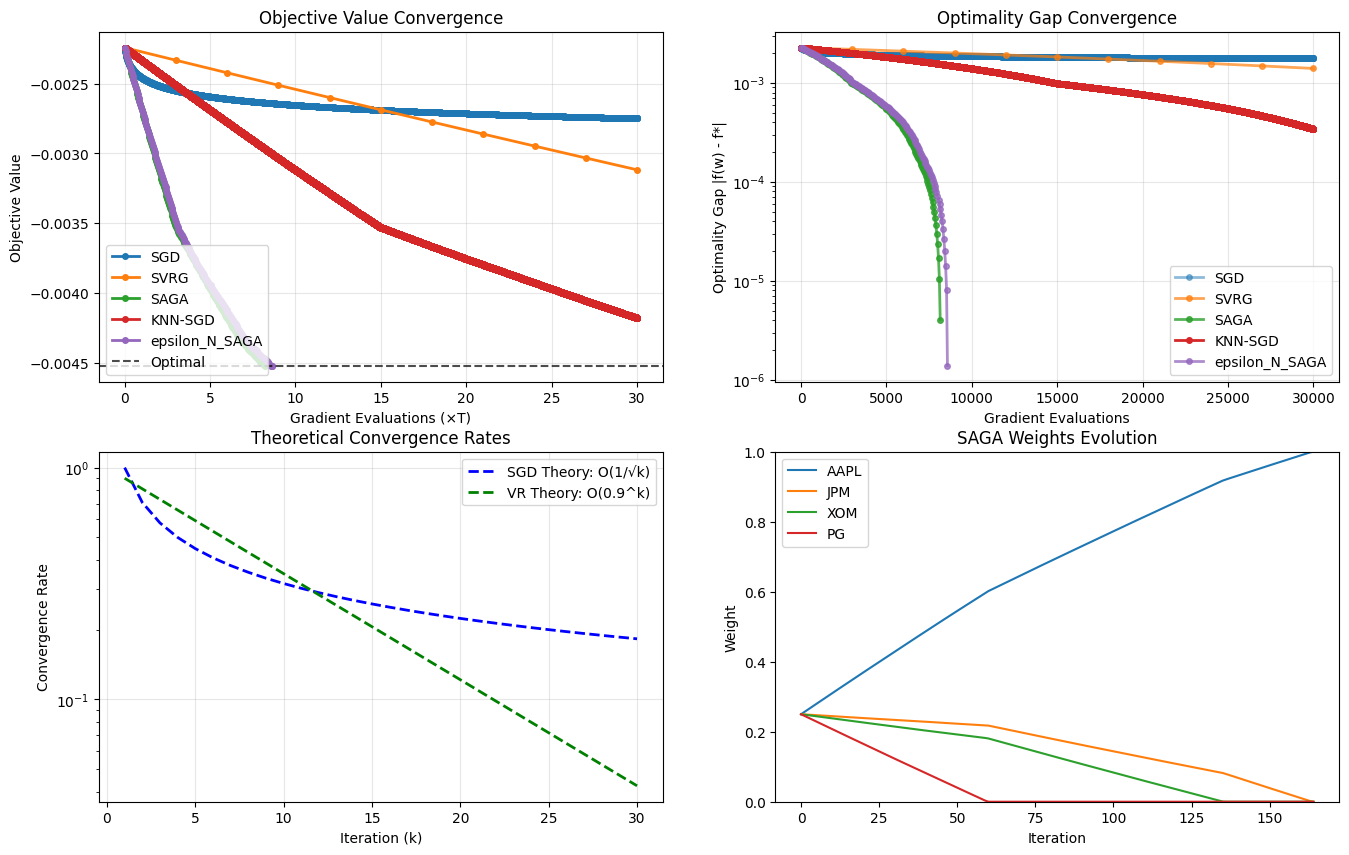

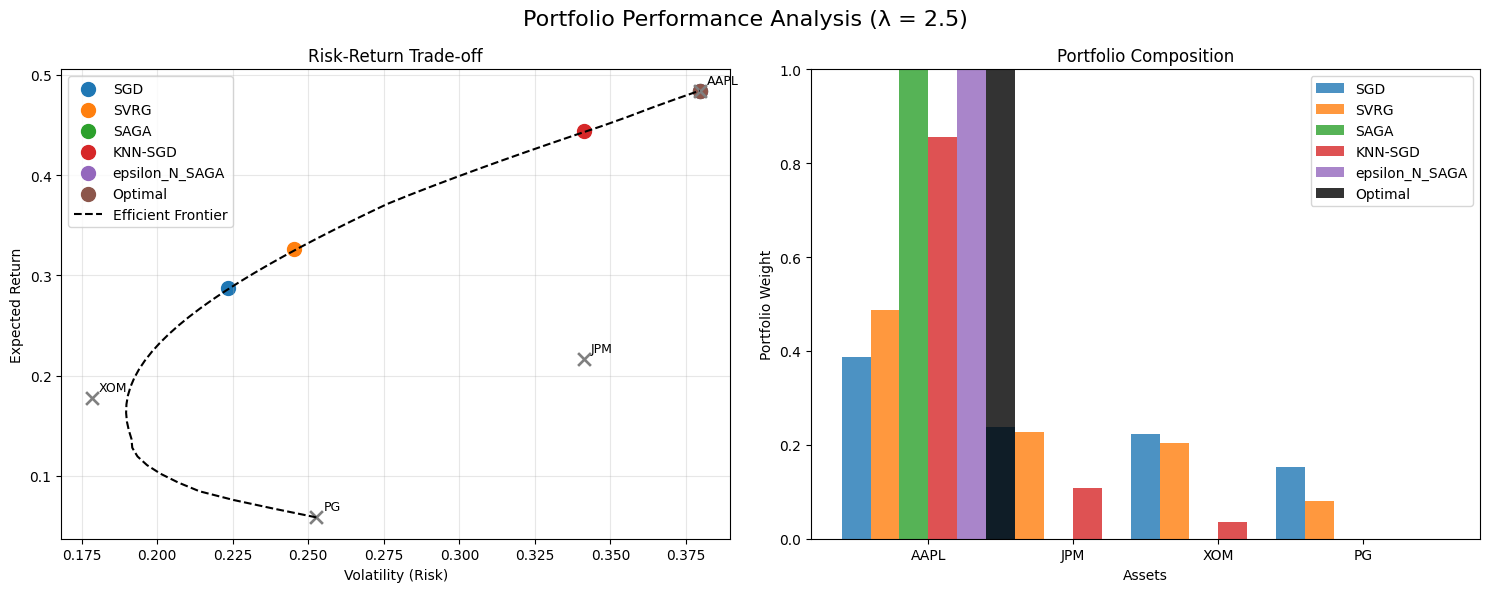


OPTIMIZATION DETAILS

Objective function: minimize 0.5 * w^T Σ w - λ * w^T μ
Risk aversion parameter (λ): 2.5

Ground truth (optimal) objective value: -0.004519

SGD:
  Final objective: -0.002749
  Optimality gap: 1.770151e-03
  Convergence time: 2.848 seconds
  Initial ||∇f||: 5.27e-03
  Final ||∇f||: 5.21e-03
  Gradient norm reduction: 1.0x

SVRG:
  Final objective: -0.003117
  Optimality gap: 1.402224e-03
  Convergence time: 0.899 seconds
  Initial ||∇f||: 5.27e-03
  Final ||∇f||: 5.17e-03
  Gradient norm reduction: 1.0x

SAGA:
  Final objective: -0.004519
  Optimality gap: 0.000000e+00
  Convergence time: 0.725 seconds
  Initial ||∇f||: 5.27e-03
  Final ||∇f||: 5.00e-03
  Gradient norm reduction: 1.1x

KNN-SGD:
  Final objective: -0.004177
  Optimality gap: 3.423256e-04
  Convergence time: 49.639 seconds
  Initial ||∇f||: 5.27e-03
  Final ||∇f||: 5.03e-03
  Gradient norm reduction: 1.0x

epsilon_N_SAGA:
  Final objective: -0.004519
  Optimality gap: 0.000000e+00
  Convergence time

KeyboardInterrupt: 

In [6]:
# Main execution
if __name__ == "__main__":
    np.random.seed(42)
    # Set parameters
    TICKERS = ['AAPL', 'JPM', 'XOM', 'PG'] # , 'MSFT', 'META', 'AMZN']
    START_DATE = '2000-01-01'
    END_DATE = '2024-01-01'
    T_SAMPLES = 1000
    N_BOOTSTRAP = 10  # Reduced for demo

    LAMBDA_RISK = 2.5

    # Initialize components
    print("Initializing portfolio optimizer...")
    optimizer = PortfolioOptimizer(n_assets=len(TICKERS), lambda_risk=LAMBDA_RISK)

    print("Fetching historical data...")
    simulator = DataSimulator(TICKERS, START_DATE, END_DATE)
    print("T_SAMPLES =")
    max_epochs = 10
    # print("\nGenerating bootstrap demo plots...")
    # simulator.plot_bootstrap_demo(n_demo_series=3, demo_length=500)
    # simulator.plot_block_structure_demo(demo_length=200)

    print("Generating bootstrap replications...")
    replications = simulator.generate_bootstrap_replications(B=N_BOOTSTRAP, T=T_SAMPLES)

    print("Running experiments...")
    runner = ExperimentRunner(optimizer)

    # Test different parameter settings
    print("\n" + "="*50)
    print("PARAMETER TUNING EXPERIMENT")
    print("="*50)

    # Try different parameters for each algorithm
    param_sets = {
        'conservative': {
            'SGD': {'eta0': 0.01, 'gamma': 0.1, 'max_iter': 10000},
            'SVRG': {'eta': 0.001, 'm': T_SAMPLES, 'max_epochs': 30},
            'SAGA': {'eta': 0.001, 'max_iter': 10000}
        },
        'moderate': {
            'SGD': {'eta0': 0.1, 'gamma': 0.01, 'max_iter': 30000},
            'SVRG': {'eta': 0.01, 'm': T_SAMPLES, 'max_epochs': 10},
            'SAGA': {'eta': 0.05, 'max_iter': 30000},
            'epsilon_N_SAGA':{'eta': 0.05, 'max_iter': 30000, 'epsilon': 0.01, 'q': 20},
            'KNN-SGD': {'k': 20, 'buffer_size': 500, 'alpha': 0.6, 'lr': 0.01, 'max_iter': 30000}
        },
        'aggressive': {
            'SGD': {'eta0': 0.1, 'gamma': 0.01, 'max_iter': 10 * T_SAMPLES},
            'SVRG': {'eta': 0.01, 'm': T_SAMPLES, 'max_epochs': 10},
            'SAGA': {'eta': 0.05, 'max_iter': 10 * T_SAMPLES},
            'epsilon_N_SAGA':{'eta': 0.05, 'max_iter': 10 * T_SAMPLES, 'epsilon': 0.01, 'q': 20},
            'KNN-SGD': {'k': 20, 'buffer_size': 500, 'alpha': 0.6, 'lr': 0.05, 'max_iter': 10 * T_SAMPLES}
        }
    }

    # Test with moderate parameters
    print("\nTesting with moderate parameters...")
    # MODIFIED: Pass target_obj and tol to the first single experiment run
    first_results = runner.run_single_experiment(
        replications[0],
        params=param_sets['moderate'],
        target_obj=runner.optimizer.objective_function(
            runner.optimizer.solve_deterministic(
                np.mean(replications[0], axis=0), np.cov(replications[0].T)
            ),
            np.mean(replications[0], axis=0), np.cov(replications[0].T)
        ),
        tol=1e-6
    )


    # Plot convergence with diagnostics
    runner.plot_convergence(TICKERS, first_results, "Convergence Comparison - Moderate Parameters")

    # Plot performance comparison
    runner.plot_performance_comparison(first_results, TICKERS)

    # Print optimization details
    print("\n" + "="*50)
    print("OPTIMIZATION DETAILS")
    print("="*50)
    print(f"\nObjective function: minimize 0.5 * w^T Σ w - λ * w^T μ")
    print(f"Risk aversion parameter (λ): {LAMBDA_RISK}")
    print(f"\nGround truth (optimal) objective value: {first_results['ground_truth']['objective']:.6f}")

    for algo in ['SGD', 'SVRG', 'SAGA', 'KNN-SGD', 'epsilon_N_SAGA']:
        if algo in first_results and first_results[algo]['history']['objective']:
            final_obj = first_results[algo]['history']['objective'][-1]
            gap = abs(final_obj - first_results['ground_truth']['objective'])
            print(f"\n{algo}:")
            print(f"  Final objective: {final_obj:.6f}")
            print(f"  Optimality gap: {gap:.6e}")
            print(f"  Convergence time: {first_results[algo]['history']['time'][-1]:.3f} seconds")

            if 'gradient_norms' in first_results[algo]['history']:
              grad_norms = first_results[algo]['history']['gradient_norms']
              if grad_norms:
                print(f"  Initial ||∇f||: {grad_norms[0]:.2e}")
                print(f"  Final ||∇f||: {grad_norms[-1]:.2e}")
                print(f"  Gradient norm reduction: {grad_norms[0]/grad_norms[-1]:.1f}x")

    # NEW: Gradient norm convergence analysis
    print("\n" + "="*50)
    print("GRADIENT NORM CONVERGENCE ANALYSIS")
    print("="*50)

     # Check theoretical convergence rates
    for algo in ['SGD', 'SVRG', 'SAGA', 'KNN-SGD', 'epsilon_N_SAGA']:
        if algo in first_results and 'gradient_norms' in first_results[algo]['history']:
            grad_norms = first_results[algo]['history']['gradient_norms']
            if len(grad_norms) > 2:
                # Estimate convergence rate
                log_norms = np.log(grad_norms[1:])  # Skip first one in case it's zero
                iterations = np.arange(1, len(grad_norms))

                # Fit linear regression to log(||∇f||) vs log(k) for SGD
                # or log(||∇f||) vs k for SVRG/SAGA
                if algo == 'SGD':
                    # For SGD: expect ||∇f|| ~ 1/√k
                    log_iterations = np.log(iterations)
                    slope = np.polyfit(log_iterations, log_norms, 1)[0]
                    print(f"\n{algo} convergence rate: ||∇f|| ~ k^{slope:.2f}")
                    print(f"  (Theory predicts: k^{-0.5} for SGD)")
                else:
                    # For SVRG/SAGA: expect ||∇f|| ~ ρ^k
                    if len(grad_norms) > 3:
                        # Estimate ρ from consecutive ratios
                        ratios = [grad_norms[i+1]/grad_norms[i] for i in range(len(grad_norms)-1) if grad_norms[i] > 0]
                        if ratios:
                            rho_estimate = np.mean(ratios)
                            print(f"\n{algo} convergence rate: ||∇f|| ~ {rho_estimate:.3f}^k")
                            print(f"  (Linear convergence with ρ ≈ {rho_estimate:.3f})")


    # Run all bootstrap experiments
    print("\nRunning bootstrap experiments...")
    all_results = runner.run_bootstrap_experiments(replications[:10])  # Reduced for demo

    print("(Gradient norm tracking enabled for first 3 replications only to save computation)")

    all_results = []
    for i, data in enumerate(replications[:10]):
        print(f"Running replication {i+1}/10")
        # Track gradient norms only for first 3 replications
        result = runner.run_single_experiment(
            data,
            algorithms=['SGD', 'SVRG', 'SAGA', 'KNN-SGD', 'epsilon_N_SAGA'],
            params=param_sets['moderate'],
            track_gradient_norms=(i < 3),  # Only track for first 3
            # MODIFIED: Pass target_obj and tol for stopping criterion
            target_obj=runner.optimizer.objective_function(
                runner.optimizer.solve_deterministic(
                    np.mean(data, axis=0), np.cov(data.T)
                ),
                np.mean(data, axis=0), np.cov(data.T)
            ),
            tol=1e-6
        )
        all_results.append(result)


    # Analyze results
    print("\nAnalyzing results...")
    summary = runner.analyze_results(all_results)

    # NEW: Analyze gradient norm statistics from tracked replications
    grad_norm_stats = {'SGD': [], 'SVRG': [], 'SAGA': [], 'KNN-SGD':[], 'epsilon_N_SAGA':[]}
    for i, result in enumerate(all_results[:3]):  # First 3 have gradient tracking
      for algo in ['SGD', 'SVRG', 'SAGA','KNN-SGD','epsilon_N_SAGA']:
        if algo in result and 'gradient_norms' in result[algo]['history']:
          final_norm = result[algo]['history']['gradient_norms'][-1]
          grad_norm_stats[algo].append(final_norm)

    # Print summary
    print("\n" + "="*50)
    print("SUMMARY RESULTS")
    print("="*50)

    for algo, stats in summary.items():
        print(f"\n{algo}:")
        print(f"  Optimization Performance:")
        print(f"    Mean objective: {stats['mean_objective']:.6f} ± {stats['std_objective']:.6f}")
        print(f"    Mean optimality gap: {stats['mean_gap']:.2e} ± {stats['std_gap']:.2e}")
        print(f"    Mean time: {stats['mean_time']:.3f} ± {stats['std_time']:.3f} seconds")
# NEW: Add gradient norm statistics
        if algo in grad_norm_stats and grad_norm_stats[algo]:
            mean_final_norm = np.mean(grad_norm_stats[algo])
            std_final_norm = np.std(grad_norm_stats[algo])
            print(f"    Mean final ||∇f||: {mean_final_norm:.2e} ± {std_final_norm:.2e}")

        print(f"  Portfolio Performance:")
        print(f"    Expected return: {stats['mean_return']:.4f} ± {stats['std_return']:.4f}")
        print(f"    Volatility: {stats['mean_volatility']:.4f} ± {stats['std_volatility']:.4f}")
        print(f"    Sharpe ratio: {stats['mean_sharpe']:.3f} ± {stats['std_sharpe']:.3f}")
        print(f"    Mean weights: {stats['weights_mean']}")

    # Create comprehensive comparison plots
    fig = plt.figure(figsize=(16, 12))

    # Plot 1: Optimality gaps boxplot
    ax1 = plt.subplot(2, 2, 1)
    gap_data = []
    for algo in ['SGD', 'SVRG', 'SAGA', 'KNN-SGD', 'epsilon_N_SAGA']:
        gaps = []
        for result in all_results[:5]:
            if algo in result and result[algo]['history']['objective']:
                final_obj = result[algo]['history']['objective'][-1]
                f_star = result['ground_truth']['objective']
                gaps.append(abs(final_obj - f_star))
        gap_data.append(gaps)

    ax1.boxplot(gap_data, labels=['SGD', 'SVRG', 'SAGA', 'KNN-SGD', 'epsilon_N_SAGA'])
    ax1.set_ylabel('Optimality Gap')
    ax1.set_title('Optimality Gap Distribution')
    ax1.set_yscale('log')
    ax1.grid(True, alpha=0.3)

    algorithms = list(summary.keys())
    mean_sharpes = [summary[algo]['mean_sharpe'] for algo in algorithms]
    std_sharpes = [summary[algo]['std_sharpe'] for algo in algorithms]

    # Plot 3: Expected Return vs Volatility
    ax2 = plt.subplot(2, 2, 2)
    for algo in algorithms:
        ax2.errorbar(summary[algo]['mean_volatility'],
                    summary[algo]['mean_return'],
                    xerr=summary[algo]['std_volatility'],
                    yerr=summary[algo]['std_return'],
                    fmt='o', markersize=10, label=algo, capsize=5)

    ax2.set_xlabel('Volatility (Risk)')
    ax2.set_ylabel('Expected Return')
    ax2.set_title('Risk-Return Trade-off')
    ax2.legend()
    ax2.grid(True, alpha=0.3)

    # Plot 4: Convergence time comparison
    ax3 = plt.subplot(2, 2, 3)
    mean_times = [summary[algo]['mean_time'] for algo in algorithms]
    std_times = [summary[algo]['std_time'] for algo in algorithms]

    bars = ax3.bar(algorithms, mean_times, yerr=std_times, capsize=10)
    ax3.set_ylabel('Time (seconds)')
    ax3.set_title('Convergence Time Comparison')
    ax3.grid(True, alpha=0.3, axis='y')

    # Plot 5: Portfolio weights comparison
    ax4 = plt.subplot(2, 2, 4)
    x = np.arange(len(TICKERS))
    width = 0.25

    for i, algo in enumerate(algorithms):
        weights = summary[algo]['weights_mean']
        ax4.bar(x + i*width, weights, width, label=algo, alpha=0.8)

    ax4.set_xlabel('Assets')
    ax4.set_ylabel('Portfolio Weight')
    ax4.set_title('Mean Portfolio Composition')
    ax4.set_xticks(x + width)
    ax4.set_xticklabels(TICKERS)
    ax4.legend()
    ax4.set_ylim([0, 1])

# Further Experiments:

Initializing portfolio optimizer...
Fetching historical data...
T_SAMPLES =
Generating bootstrap replications...


[*********************100%***********************]  30 of 30 completed


Running experiments...

PARAMETER TUNING EXPERIMENT

Testing with moderate parameters...
SVRG settings: m=1000, epochs=10
SAGA stopping early at iteration 6700 due to optimality gap 0.00e+00 < tol 1.00e-06.


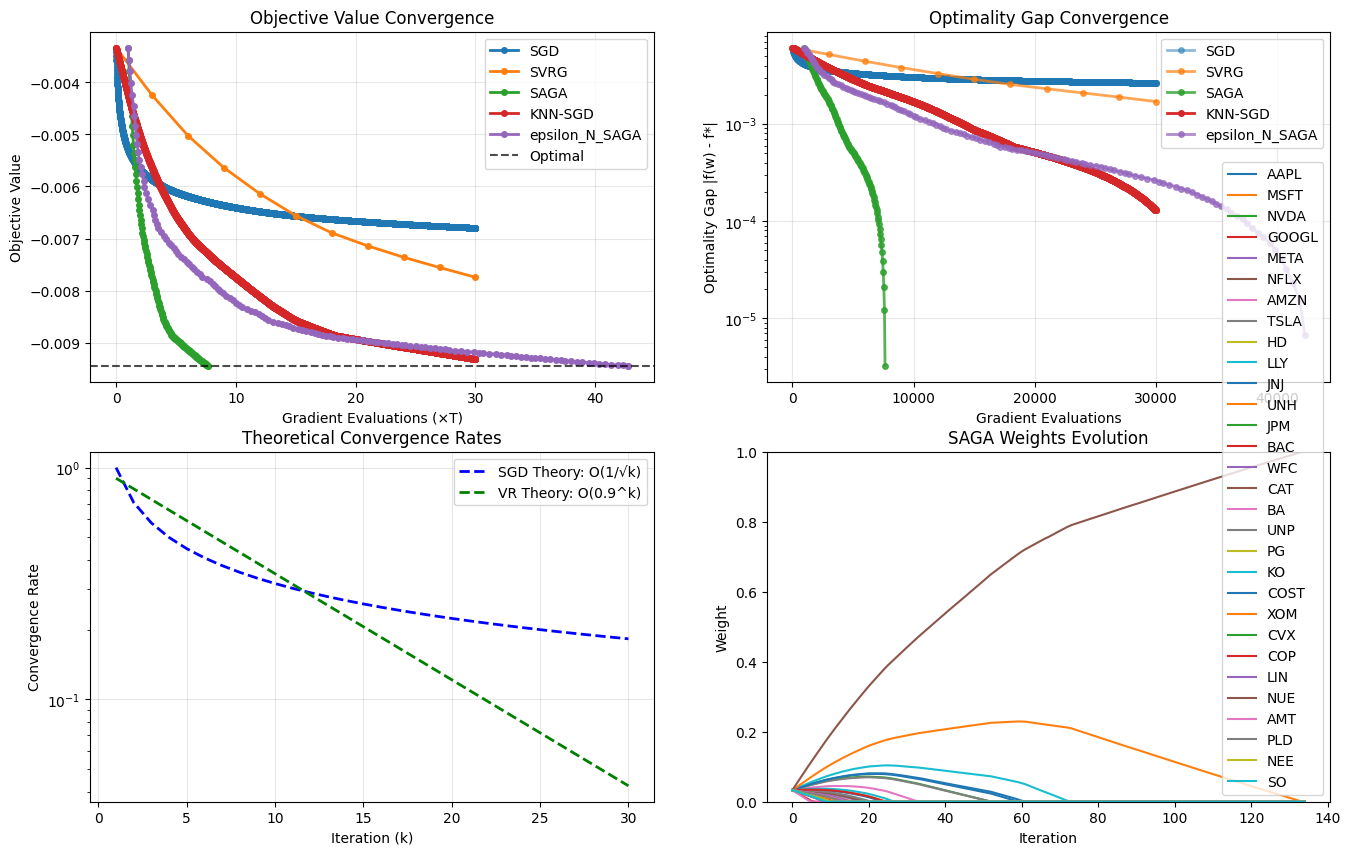

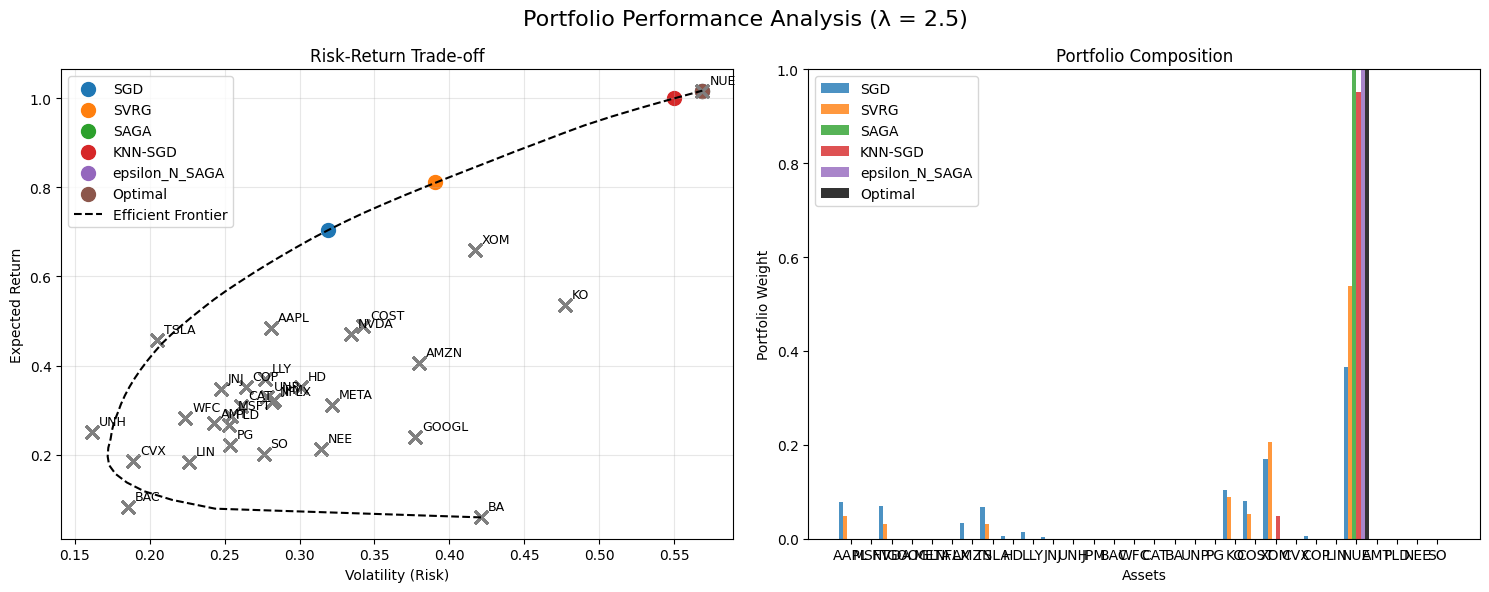


OPTIMIZATION DETAILS

Objective function: minimize 0.5 * w^T Σ w - λ * w^T μ
Risk aversion parameter (λ): 2.5

Ground truth (optimal) objective value: -0.009448

SGD:
  Final objective: -0.006796
  Optimality gap: 2.652072e-03
  Convergence time: 2.971 seconds
  Initial ||∇f||: 2.03e-02
  Final ||∇f||: 1.99e-02
  Gradient norm reduction: 1.0x

SVRG:
  Final objective: -0.007745
  Optimality gap: 1.702368e-03
  Convergence time: 0.578 seconds
  Initial ||∇f||: 2.03e-02
  Final ||∇f||: 1.98e-02
  Gradient norm reduction: 1.0x

SAGA:
  Final objective: -0.009448
  Optimality gap: 0.000000e+00
  Convergence time: 0.331 seconds
  Initial ||∇f||: 2.03e-02
  Final ||∇f||: 1.96e-02
  Gradient norm reduction: 1.0x

KNN-SGD:
  Final objective: -0.009319
  Optimality gap: 1.293248e-04
  Convergence time: 37.977 seconds
  Initial ||∇f||: 2.03e-02
  Final ||∇f||: 1.96e-02
  Gradient norm reduction: 1.0x

epsilon_N_SAGA:
  Final objective: -0.009448
  Optimality gap: 0.000000e+00
  Convergence time

/tmp/ipython-input-70-2334370957.py:226: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax1.boxplot(gap_data, labels=['SGD', 'SVRG', 'SAGA', 'KNN-SGD', 'epsilon_N_SAGA'])


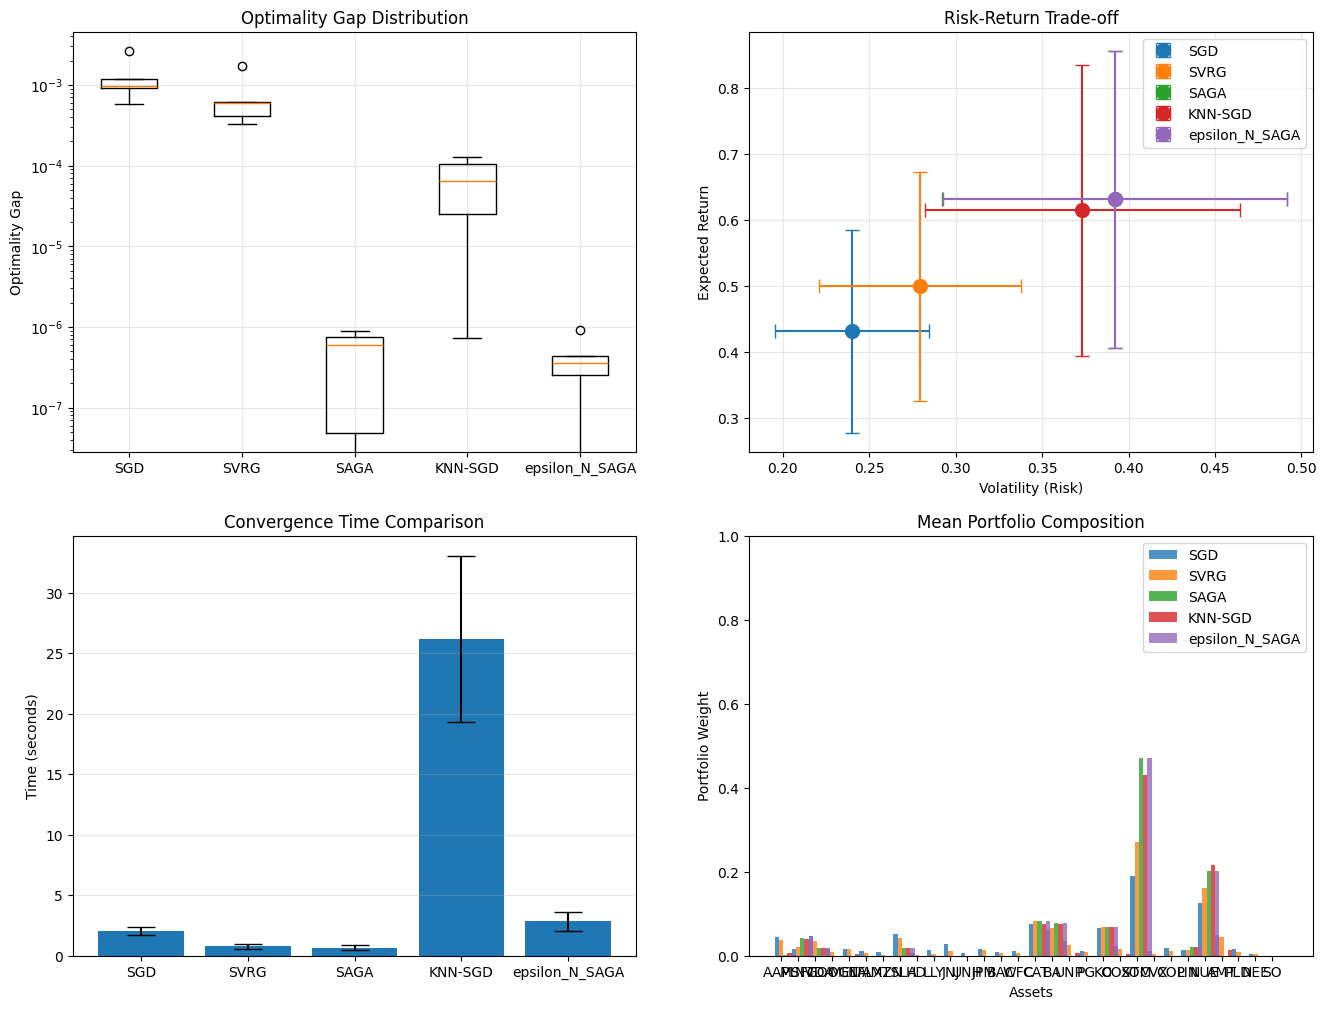

In [ ]:
# Increase asset universe
# Main execution
if __name__ == "__main__":
    np.random.seed(42)
    # Set parameters
    TICKERS = ['AAPL', 'MSFT', 'NVDA',
          'GOOGL', 'META', 'NFLX',
          'AMZN', 'TSLA', 'HD',
          'LLY', 'JNJ', 'UNH',
          'JPM', 'BAC', 'WFC',
          'CAT', 'BA', 'UNP',
          'PG', 'KO', 'COST',
          'XOM', 'CVX', 'COP',
          'LIN', 'NUE',
          'AMT', 'PLD',
          'NEE', 'SO'] # , 'MSFT', 'META', 'AMZN']
    START_DATE = '2000-01-01'
    END_DATE = '2024-01-01'
    T_SAMPLES = 1000
    N_BOOTSTRAP = 10  # Reduced for demo

    LAMBDA_RISK = 2.5

    # Initialize components
    print("Initializing portfolio optimizer...")
    optimizer = PortfolioOptimizer(n_assets=len(TICKERS), lambda_risk=LAMBDA_RISK)

    print("Fetching historical data...")
    simulator = DataSimulator(TICKERS, START_DATE, END_DATE)
    print("T_SAMPLES =")
    max_epochs = 10
    # print("\nGenerating bootstrap demo plots...")
    # simulator.plot_bootstrap_demo(n_demo_series=3, demo_length=500)
    # simulator.plot_block_structure_demo(demo_length=200)

    print("Generating bootstrap replications...")
    replications = simulator.generate_bootstrap_replications(B=N_BOOTSTRAP, T=T_SAMPLES)

    print("Running experiments...")
    runner = ExperimentRunner(optimizer)

    # Test different parameter settings
    print("\n" + "="*50)
    print("PARAMETER TUNING EXPERIMENT")
    print("="*50)

    # Try different parameters for each algorithm
    param_sets = {
        'conservative': {
            'SGD': {'eta0': 0.01, 'gamma': 0.1, 'max_iter': 10000},
            'SVRG': {'eta': 0.001, 'm': T_SAMPLES, 'max_epochs': 30},
            'SAGA': {'eta': 0.001, 'max_iter': 10000}
        },
        'moderate': {
            'SGD': {'eta0': 0.1, 'gamma': 0.01, 'max_iter': 30000},
            'SVRG': {'eta': 0.01, 'm': T_SAMPLES, 'max_epochs': 10},
            'SAGA': {'eta': 0.05, 'max_iter': 30000},
            'epsilon_N_SAGA':{'eta': 0.05, 'max_iter': 30000, 'epsilon': 0.01, 'q': 20},
            'KNN-SGD': {'k': 20, 'buffer_size': 500, 'alpha': 0.6, 'lr': 0.01, 'max_iter': 30000}
        },
        'aggressive': {
            'SGD': {'eta0': 0.1, 'gamma': 0.01, 'max_iter': 10 * T_SAMPLES},
            'SVRG': {'eta': 0.01, 'm': T_SAMPLES, 'max_epochs': 10},
            'SAGA': {'eta': 0.05, 'max_iter': 10 * T_SAMPLES},
            'epsilon_N_SAGA':{'eta': 0.05, 'max_iter': 10 * T_SAMPLES, 'epsilon': 0.01, 'q': 20},
            'KNN-SGD': {'k': 20, 'buffer_size': 500, 'alpha': 0.6, 'lr': 0.05, 'max_iter': 10 * T_SAMPLES}
        }
    }

    # Test with moderate parameters
    print("\nTesting with moderate parameters...")
    # MODIFIED: Pass target_obj and tol to the first single experiment run
    first_results = runner.run_single_experiment(
        replications[0],
        params=param_sets['moderate'],
        target_obj=runner.optimizer.objective_function(
            runner.optimizer.solve_deterministic(
                np.mean(replications[0], axis=0), np.cov(replications[0].T)
            ),
            np.mean(replications[0], axis=0), np.cov(replications[0].T)
        ),
        tol=1e-6
    )


    # Plot convergence with diagnostics
    runner.plot_convergence(TICKERS, first_results, "Convergence Comparison - Moderate Parameters")

    # Plot performance comparison
    runner.plot_performance_comparison(first_results, TICKERS)

    # Print optimization details
    print("\n" + "="*50)
    print("OPTIMIZATION DETAILS")
    print("="*50)
    print(f"\nObjective function: minimize 0.5 * w^T Σ w - λ * w^T μ")
    print(f"Risk aversion parameter (λ): {LAMBDA_RISK}")
    print(f"\nGround truth (optimal) objective value: {first_results['ground_truth']['objective']:.6f}")

    for algo in ['SGD', 'SVRG', 'SAGA', 'KNN-SGD', 'epsilon_N_SAGA']:
        if algo in first_results and first_results[algo]['history']['objective']:
            final_obj = first_results[algo]['history']['objective'][-1]
            gap = abs(final_obj - first_results['ground_truth']['objective'])
            print(f"\n{algo}:")
            print(f"  Final objective: {final_obj:.6f}")
            print(f"  Optimality gap: {gap:.6e}")
            print(f"  Convergence time: {first_results[algo]['history']['time'][-1]:.3f} seconds")

            if 'gradient_norms' in first_results[algo]['history']:
              grad_norms = first_results[algo]['history']['gradient_norms']
              if grad_norms:
                print(f"  Initial ||∇f||: {grad_norms[0]:.2e}")
                print(f"  Final ||∇f||: {grad_norms[-1]:.2e}")
                print(f"  Gradient norm reduction: {grad_norms[0]/grad_norms[-1]:.1f}x")

    # NEW: Gradient norm convergence analysis
    print("\n" + "="*50)
    print("GRADIENT NORM CONVERGENCE ANALYSIS")
    print("="*50)

     # Check theoretical convergence rates
    for algo in ['SGD', 'SVRG', 'SAGA', 'KNN-SGD', 'epsilon_N_SAGA']:
        if algo in first_results and 'gradient_norms' in first_results[algo]['history']:
            grad_norms = first_results[algo]['history']['gradient_norms']
            if len(grad_norms) > 2:
                # Estimate convergence rate
                log_norms = np.log(grad_norms[1:])  # Skip first one in case it's zero
                iterations = np.arange(1, len(grad_norms))

                # Fit linear regression to log(||∇f||) vs log(k) for SGD
                # or log(||∇f||) vs k for SVRG/SAGA
                if algo == 'SGD':
                    # For SGD: expect ||∇f|| ~ 1/√k
                    log_iterations = np.log(iterations)
                    slope = np.polyfit(log_iterations, log_norms, 1)[0]
                    print(f"\n{algo} convergence rate: ||∇f|| ~ k^{slope:.2f}")
                    print(f"  (Theory predicts: k^{-0.5} for SGD)")
                else:
                    # For SVRG/SAGA: expect ||∇f|| ~ ρ^k
                    if len(grad_norms) > 3:
                        # Estimate ρ from consecutive ratios
                        ratios = [grad_norms[i+1]/grad_norms[i] for i in range(len(grad_norms)-1) if grad_norms[i] > 0]
                        if ratios:
                            rho_estimate = np.mean(ratios)
                            print(f"\n{algo} convergence rate: ||∇f|| ~ {rho_estimate:.3f}^k")
                            print(f"  (Linear convergence with ρ ≈ {rho_estimate:.3f})")


    # Run all bootstrap experiments
    print("\nRunning bootstrap experiments...")
    all_results = runner.run_bootstrap_experiments(replications[:10])  # Reduced for demo

    print("(Gradient norm tracking enabled for first 3 replications only to save computation)")

    all_results = []
    for i, data in enumerate(replications[:10]):
        print(f"Running replication {i+1}/10")
        # Track gradient norms only for first 3 replications
        result = runner.run_single_experiment(
            data,
            algorithms=['SGD', 'SVRG', 'SAGA', 'KNN-SGD', 'epsilon_N_SAGA'],
            params=param_sets['moderate'],
            track_gradient_norms=(i < 3),  # Only track for first 3
            # MODIFIED: Pass target_obj and tol for stopping criterion
            target_obj=runner.optimizer.objective_function(
                runner.optimizer.solve_deterministic(
                    np.mean(data, axis=0), np.cov(data.T)
                ),
                np.mean(data, axis=0), np.cov(data.T)
            ),
            tol=1e-6
        )
        all_results.append(result)


    # Analyze results
    print("\nAnalyzing results...")
    summary = runner.analyze_results(all_results)

    # NEW: Analyze gradient norm statistics from tracked replications
    grad_norm_stats = {'SGD': [], 'SVRG': [], 'SAGA': [], 'KNN-SGD':[], 'epsilon_N_SAGA':[]}
    for i, result in enumerate(all_results[:3]):  # First 3 have gradient tracking
      for algo in ['SGD', 'SVRG', 'SAGA','KNN-SGD','epsilon_N_SAGA']:
        if algo in result and 'gradient_norms' in result[algo]['history']:
          final_norm = result[algo]['history']['gradient_norms'][-1]
          grad_norm_stats[algo].append(final_norm)

    # Print summary
    print("\n" + "="*50)
    print("SUMMARY RESULTS")
    print("="*50)

    for algo, stats in summary.items():
        print(f"\n{algo}:")
        print(f"  Optimization Performance:")
        print(f"    Mean objective: {stats['mean_objective']:.6f} ± {stats['std_objective']:.6f}")
        print(f"    Mean optimality gap: {stats['mean_gap']:.2e} ± {stats['std_gap']:.2e}")
        print(f"    Mean time: {stats['mean_time']:.3f} ± {stats['std_time']:.3f} seconds")
# NEW: Add gradient norm statistics
        if algo in grad_norm_stats and grad_norm_stats[algo]:
            mean_final_norm = np.mean(grad_norm_stats[algo])
            std_final_norm = np.std(grad_norm_stats[algo])
            print(f"    Mean final ||∇f||: {mean_final_norm:.2e} ± {std_final_norm:.2e}")

        print(f"  Portfolio Performance:")
        print(f"    Expected return: {stats['mean_return']:.4f} ± {stats['std_return']:.4f}")
        print(f"    Volatility: {stats['mean_volatility']:.4f} ± {stats['std_volatility']:.4f}")
        print(f"    Sharpe ratio: {stats['mean_sharpe']:.3f} ± {stats['std_sharpe']:.3f}")
        print(f"    Mean weights: {stats['weights_mean']}")

    # Create comprehensive comparison plots
    fig = plt.figure(figsize=(16, 12))

    # Plot 1: Optimality gaps boxplot
    ax1 = plt.subplot(2, 2, 1)
    gap_data = []
    for algo in ['SGD', 'SVRG', 'SAGA', 'KNN-SGD', 'epsilon_N_SAGA']:
        gaps = []
        for result in all_results[:5]:
            if algo in result and result[algo]['history']['objective']:
                final_obj = result[algo]['history']['objective'][-1]
                f_star = result['ground_truth']['objective']
                gaps.append(abs(final_obj - f_star))
        gap_data.append(gaps)

    ax1.boxplot(gap_data, labels=['SGD', 'SVRG', 'SAGA', 'KNN-SGD', 'epsilon_N_SAGA'])
    ax1.set_ylabel('Optimality Gap')
    ax1.set_title('Optimality Gap Distribution')
    ax1.set_yscale('log')
    ax1.grid(True, alpha=0.3)

    algorithms = list(summary.keys())
    mean_sharpes = [summary[algo]['mean_sharpe'] for algo in algorithms]
    std_sharpes = [summary[algo]['std_sharpe'] for algo in algorithms]

    # Plot 3: Expected Return vs Volatility
    ax2 = plt.subplot(2, 2, 2)
    for algo in algorithms:
        ax2.errorbar(summary[algo]['mean_volatility'],
                    summary[algo]['mean_return'],
                    xerr=summary[algo]['std_volatility'],
                    yerr=summary[algo]['std_return'],
                    fmt='o', markersize=10, label=algo, capsize=5)

    ax2.set_xlabel('Volatility (Risk)')
    ax2.set_ylabel('Expected Return')
    ax2.set_title('Risk-Return Trade-off')
    ax2.legend()
    ax2.grid(True, alpha=0.3)

    # Plot 4: Convergence time comparison
    ax3 = plt.subplot(2, 2, 3)
    mean_times = [summary[algo]['mean_time'] for algo in algorithms]
    std_times = [summary[algo]['std_time'] for algo in algorithms]

    bars = ax3.bar(algorithms, mean_times, yerr=std_times, capsize=10)
    ax3.set_ylabel('Time (seconds)')
    ax3.set_title('Convergence Time Comparison')
    ax3.grid(True, alpha=0.3, axis='y')

    # Plot 5: Portfolio weights comparison
    ax4 = plt.subplot(2, 2, 4)
    x = np.arange(len(TICKERS))
    width = 0.25

    for i, algo in enumerate(algorithms):
        weights = summary[algo]['weights_mean']
        ax4.bar(x + i*width, weights, width, label=algo, alpha=0.8)

    ax4.set_xlabel('Assets')
    ax4.set_ylabel('Portfolio Weight')
    ax4.set_title('Mean Portfolio Composition')
    ax4.set_xticks(x + width)
    ax4.set_xticklabels(TICKERS)
    ax4.legend()
    ax4.set_ylim([0, 1])

Initializing portfolio optimizer...
Fetching historical data...
T_SAMPLES =
Generating bootstrap replications...


[*********************100%***********************]  30 of 30 completed


Running experiments...

PARAMETER TUNING EXPERIMENT

Testing with moderate parameters...
SVRG settings: m=1000, epochs=10
SAGA stopping early at iteration 6700 due to optimality gap 1.73e-18 < tol 1.00e-06.


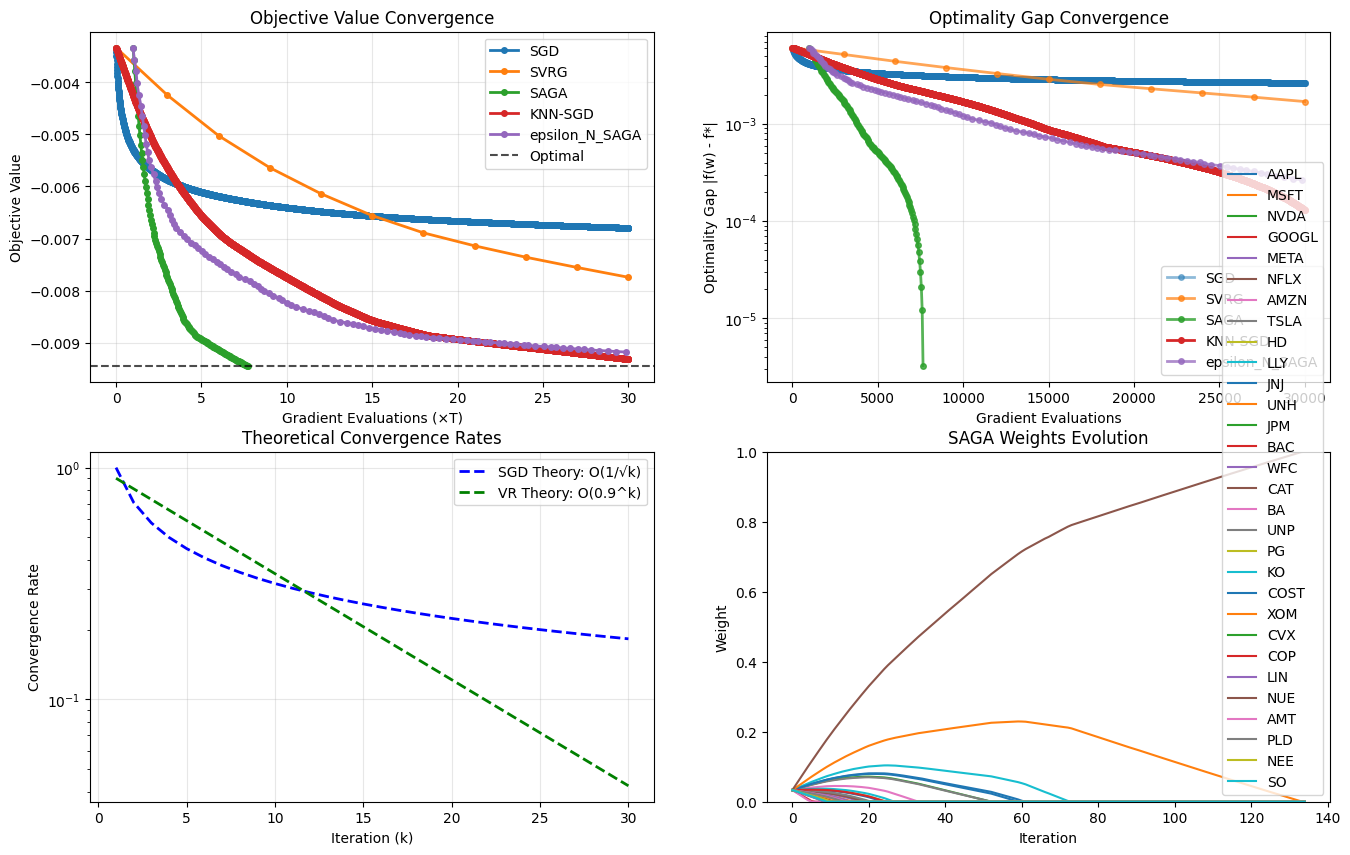

In [ ]:
# Increase asset universe
# Main execution
if __name__ == "__main__":
    np.random.seed(42)
    # Set parameters
    TICKERS = ['AAPL', 'MSFT', 'NVDA',
          'GOOGL', 'META', 'NFLX',
          'AMZN', 'TSLA', 'HD',
          'LLY', 'JNJ', 'UNH',
          'JPM', 'BAC', 'WFC',
          'CAT', 'BA', 'UNP',
          'PG', 'KO', 'COST',
          'XOM', 'CVX', 'COP',
          'LIN', 'NUE',
          'AMT', 'PLD',
          'NEE', 'SO'] # , 'MSFT', 'META', 'AMZN']
    START_DATE = '2000-01-01'
    END_DATE = '2024-01-01'
    T_SAMPLES = 1000
    N_BOOTSTRAP = 10  # Reduced for demo

    LAMBDA_RISK = 2.5

    # Initialize components
    print("Initializing portfolio optimizer...")
    optimizer = PortfolioOptimizer(n_assets=len(TICKERS), lambda_risk=LAMBDA_RISK)

    print("Fetching historical data...")
    simulator = DataSimulator(TICKERS, START_DATE, END_DATE)
    print("T_SAMPLES =")
    max_epochs = 10
    # print("\nGenerating bootstrap demo plots...")
    # simulator.plot_bootstrap_demo(n_demo_series=3, demo_length=500)
    # simulator.plot_block_structure_demo(demo_length=200)

    print("Generating bootstrap replications...")
    replications = simulator.generate_bootstrap_replications(B=N_BOOTSTRAP, T=T_SAMPLES)

    print("Running experiments...")
    runner = ExperimentRunner(optimizer)

    # Test different parameter settings
    print("\n" + "="*50)
    print("PARAMETER TUNING EXPERIMENT")
    print("="*50)

    # Try different parameters for each algorithm
    param_sets = {
        'conservative': {
            'SGD': {'eta0': 0.01, 'gamma': 0.1, 'max_iter': 10000},
            'SVRG': {'eta': 0.001, 'm': T_SAMPLES, 'max_epochs': 30},
            'SAGA': {'eta': 0.001, 'max_iter': 10000}
        },
        'moderate': {
            'SGD': {'eta0': 0.1, 'gamma': 0.01, 'max_iter': 30000},
            'SVRG': {'eta': 0.01, 'm': T_SAMPLES, 'max_epochs': 10},
            'SAGA': {'eta': 0.05, 'max_iter': 30000},
            'epsilon_N_SAGA':{'eta': 0.05, 'max_iter': 30000, 'epsilon': 0.01, 'q': 20},
            'KNN-SGD': {'k': 20, 'buffer_size': 500, 'alpha': 0.6, 'lr': 0.01, 'max_iter': 30000}
        },
        'aggressive': {
            'SGD': {'eta0': 0.1, 'gamma': 0.01, 'max_iter': 10 * T_SAMPLES},
            'SVRG': {'eta': 0.01, 'm': T_SAMPLES, 'max_epochs': 10},
            'SAGA': {'eta': 0.05, 'max_iter': 10 * T_SAMPLES},
            'epsilon_N_SAGA':{'eta': 0.05, 'max_iter': 10 * T_SAMPLES, 'epsilon': 0.01, 'q': 20},
            'KNN-SGD': {'k': 20, 'buffer_size': 500, 'alpha': 0.6, 'lr': 0.05, 'max_iter': 10 * T_SAMPLES}
        }
    }

    # Test with moderate parameters
    print("\nTesting with moderate parameters...")
    # MODIFIED: Pass target_obj and tol to the first single experiment run
    first_results = runner.run_single_experiment(
        replications[0],
        params=param_sets['moderate'],
        target_obj=runner.optimizer.objective_function(
            runner.optimizer.solve_deterministic(
                np.mean(replications[0], axis=0), np.cov(replications[0].T)
            ),
            np.mean(replications[0], axis=0), np.cov(replications[0].T)
        ),
        tol=1e-6
    )


    # Plot convergence with diagnostics
    runner.plot_convergence(TICKERS, first_results, "Convergence Comparison - Moderate Parameters", max_grad_evals=30000)

# Suboptimality vs epochs plotted for asset universe of various settings

**Test of higher dimsneion, small data, vice versa**

*   4 assets X 1000 samples; 4 assets X 2000 samples; 4 assets X 4000 samples; 4 assets X 8000 samples
*   8 assets X 1000 samples: 8 assets X 2000 samples; 8 assets X 4000 samples; 8 assets X 8000 samples
*   16 assets X 1000 samples: 16 assets X 2000 samples; 16 assets X 4000 samples; 16 assets X 8000 samples
*   32 assets X 1000 samples: 32 assets X 2000 samples; 32 assets X 4000 samples; 32 assets X 8000 samples





In [6]:
def plot_suboptimality(asset_names: List[str], results: Dict, title: str = None, max_grad_evals: Optional[int] = None, ax: Optional[plt.Axes] = None):

  if ax is None:
      fig, ax = plt.subplots(figsize=(6, 6))

  if title is None:
      title = f"Suboptimality - {len(asset_names)} Assets"

  # Get ground truth objective
  f_star = results['ground_truth']['objective']

  algo_alpha = dict(SGD=0.60, SVRG=0.70, SAGA=0.80,
                KNN_SGD=0.90, epsilon_N_SAGA=0.75,
                KNN_SGD_25=0.85)
  colour_cycle = plt.rcParams["axes.prop_cycle"].by_key()["color"]

  algo_keys = [k for k in results.keys()
                  if k not in ("ground_truth", "T")]  # dynamic discovery
  for idx, algo in enumerate(algo_keys):
    hist = results[algo]["history"]
    gevals = np.asarray(hist["grad_evals"])
    objectives = np.asarray(hist["objective"])

    # optional truncation
    if max_grad_evals is not None:
        mask = gevals <= max_grad_evals
        gevals, objectives = gevals[mask], objectives[mask]

    # optimality gap (remove zeros for log scale)
    gap = np.abs(objectives - f_star)
    sel = gap > 1e-16
    if not np.any(sel):
        continue

    ax.semilogy(
        gevals[sel], gap[sel],
        label=algo.replace("_", "-"),
        linewidth=2,
        color=colour_cycle[idx % len(colour_cycle)],
        alpha=algo_alpha.get(algo, 0.8)
    )

  # ---------- cosmetics ----------
  # ax.set_xlabel("Gradient evaluations")
  # ax.set_ylabel(r"Optimality gap  $|f(w_t)\!-\!f^\star|$")
  ax.set_title(title)
  ax.grid(True, alpha=0.3)
  ax.legend()

In [ ]:
        'moderate': {
            'SGD': {'eta0': 0.1, 'gamma': 0.01, 'max_iter': 30000},
            'SVRG': {'eta': 0.01, 'm': T_SAMPLES, 'max_epochs': 20},
            'SAGA': {'eta': 0.05, 'max_iter': 30000},
            'epsilon_N_SAGA':{'eta': 0.05, 'max_iter': 30000, 'epsilon': 0.1, 'q': 20},
            'KNN-SGD': {'k': 20, 'buffer_size': 500, 'alpha': 0.6, 'lr': 0.01, 'max_iter': 30000}}

Running experiment with 4 assets...


[*********************100%***********************]  4 of 4 completed


(1000, 4)
[[-0.03544885 -0.02648897  0.03207856 -0.03091184]
 [-0.10646332 -0.06114489  0.11894296  0.01212852]
 [-0.0249517   0.04715479 -0.0166227   0.03055711]
 ...
 [ 0.00346594 -0.00353591  0.02336805  0.01710482]
 [-0.00268099 -0.01092462  0.00398704  0.00999259]
 [-0.00909723 -0.0015074   0.00279769  0.00868703]]
SVRG settings: m=1000, epochs=10
SAGA stopping early at iteration 10100 due to optimality gap 9.13e-06 < tol 1.00e-05.
KNN-SGD stopping early at iteration 4004 due to optimality gap 9.90e-06 < tol 1.00e-05.
Running experiment with 8 assets...


[*********************100%***********************]  8 of 8 completed


(1000, 8)
[[ 0.00436579  0.00613072  0.00014356 ...  0.0008636   0.00762985
  -0.01101567]
 [-0.01260502 -0.01604321 -0.00659504 ... -0.01437652 -0.00921807
  -0.01429782]
 [-0.00096073  0.00148938 -0.00620598 ... -0.00320835 -0.00348889
  -0.00674659]
 ...
 [-0.02302933 -0.0362439  -0.01963176 ...  0.00102231 -0.0026717
  -0.00074418]
 [-0.00202911  0.00300251  0.02842114 ... -0.02475982 -0.01928614
   0.04244225]
 [ 0.00179382  0.00134716 -0.01546585 ...  0.01196441 -0.00430148
   0.00591843]]
SVRG settings: m=1000, epochs=10
KNN-SGD stopping early at iteration 12058 due to optimality gap 9.97e-06 < tol 1.00e-05.


[                       0%                       ]

Running experiment with 16 assets...


[*********************100%***********************]  16 of 16 completed


(1000, 16)
[[-7.98316261e-03 -3.31455987e-02 -4.46230192e-02 ... -6.36867681e-02
  -1.70913054e-02 -2.73986101e-02]
 [-2.53702594e-02 -3.03263605e-02 -4.26459107e-02 ... -1.44148516e-02
   3.79150706e-04 -2.77959091e-02]
 [-1.37848016e-02  2.37959303e-03 -7.87878259e-03 ... -3.21433311e-02
   5.11509149e-03 -2.21387016e-03]
 ...
 [ 2.35469455e-02  1.40021602e-02 -3.14862449e-03 ...  5.34441495e-02
   7.48604870e-03 -4.98557600e-03]
 [ 1.85180731e-02  1.78686368e-02 -6.31698787e-04 ...  2.67834906e-03
  -6.17984039e-05 -3.41154219e-03]
 [-8.70391035e-03 -3.35348740e-03 -5.68888275e-03 ... -2.44343450e-02
   9.19561283e-03  4.28026451e-04]]
SVRG settings: m=1000, epochs=10
KNN-SGD stopping early at iteration 16467 due to optimality gap 9.99e-06 < tol 1.00e-05.


[                       0%                       ]

Running experiment with 32 assets...


[*********************100%***********************]  32 of 32 completed


(1000, 32)
[[-1.30125788e-03  3.41199772e-03 -6.10465651e-03 ... -4.40790495e-03
   1.11571474e-02 -4.85859085e-03]
 [ 1.08574741e-03 -1.81341059e-03  2.69025073e-02 ...  1.30820351e-02
   7.35552186e-03  3.02722612e-03]
 [-3.47133796e-03  7.72105217e-03 -2.20706672e-02 ...  3.57639654e-03
  -3.84142655e-04 -9.73539066e-04]
 ...
 [ 8.06456033e-03  1.66261511e-02 -9.08041209e-03 ... -1.78621660e-02
  -2.76627832e-02  1.16965927e-02]
 [-8.36807357e-05  4.75444112e-03 -2.76637632e-03 ...  3.86970295e-03
   9.11130728e-03 -1.23627129e-02]
 [-1.74973443e-03 -1.16400570e-02  1.93191445e-03 ...  2.38025619e-02
   5.71221756e-03 -1.79644895e-02]]
SVRG settings: m=1000, epochs=10
SAGA stopping early at iteration 15000 due to optimality gap 9.72e-06 < tol 1.00e-05.
KNN-SGD stopping early at iteration 5944 due to optimality gap 9.97e-06 < tol 1.00e-05.


[                       0%                       ]

Running experiment with 64 assets...


[*********************100%***********************]  64 of 64 completed


(1000, 64)
[[ 1.86437943e-02  3.30589706e-02  9.62152771e-03 ...  1.93736796e-02
   7.25736600e-03  1.68375553e-02]
 [ 4.76952547e-05 -2.25340578e-03 -2.41423202e-02 ... -1.25967677e-02
  -1.54647591e-02 -6.04756855e-03]
 [ 1.08385682e-02  1.70155610e-02  3.19010896e-02 ...  7.16223536e-03
  -2.67431837e-04  9.99566854e-03]
 ...
 [-2.11395798e-03 -6.76131982e-03 -3.69200078e-03 ... -5.04602453e-04
  -6.75622475e-03  2.41861968e-03]
 [ 1.21064177e-04 -2.53734015e-03 -2.04904333e-02 ...  4.18770665e-02
   7.00432807e-03 -1.16329823e-02]
 [ 7.50460334e-03 -9.86482269e-03 -1.00149065e-03 ...  1.38013666e-02
   2.20711886e-03  1.95293865e-02]]
SVRG settings: m=1000, epochs=10
KNN-SGD stopping early at iteration 17318 due to optimality gap 9.99e-06 < tol 1.00e-05.


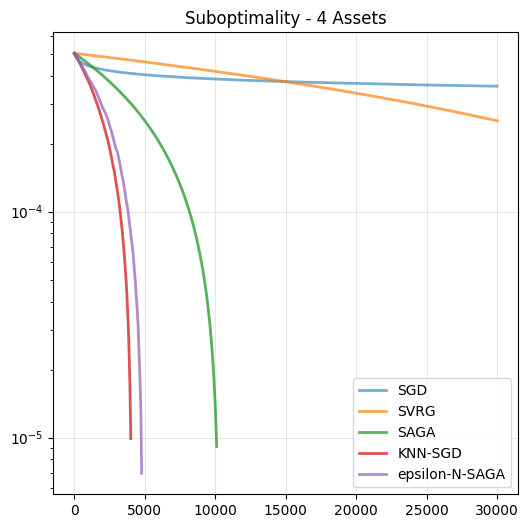

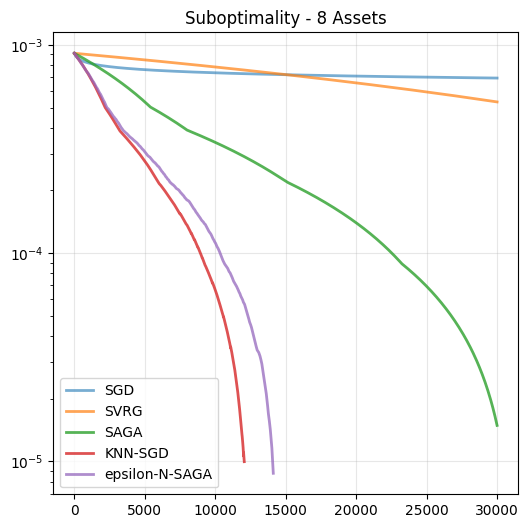

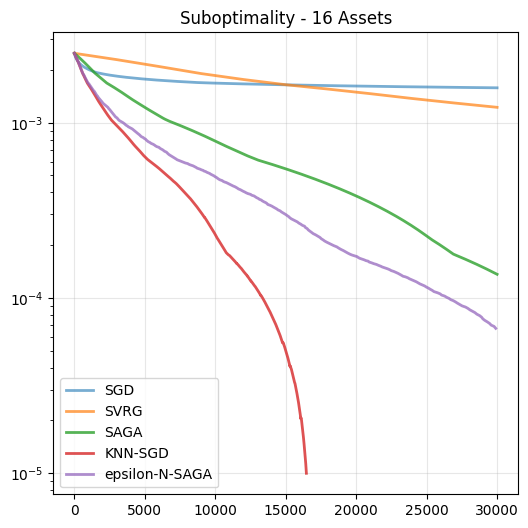

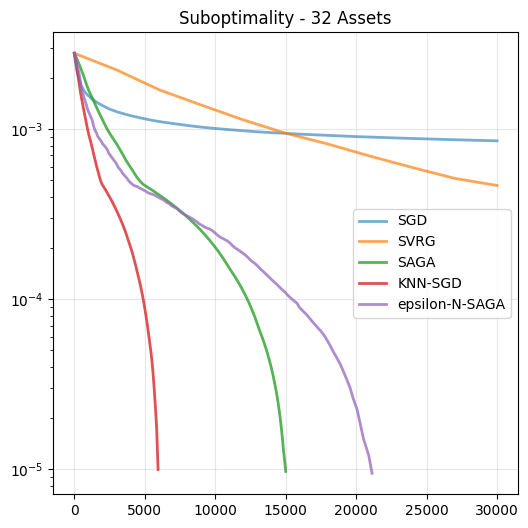

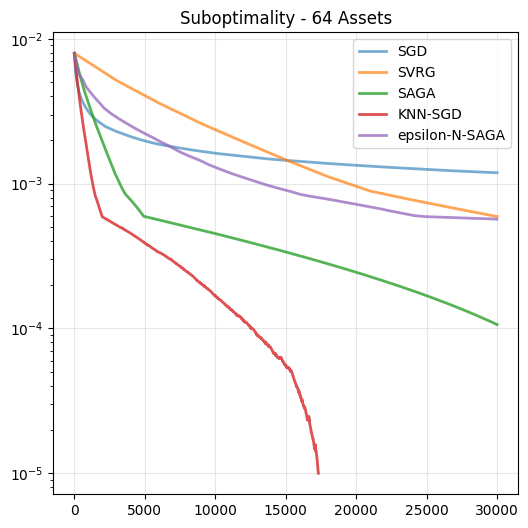

In [9]:
np.random.seed(42)
# Set parameters
START_DATE = '2000-01-01'
END_DATE = '2024-01-01'
T_SAMPLES = 1000
N_BOOTSTRAP = 10  # Reduced for demo
LAMBDA_RISK = 2.5
MAX_EPOCHS = 10

universes = {
    4:  ["AAPL","GOOGL","JPM","XOM"],
    8:  ["AAPL","GOOGL","JPM","XOM",
         "AMZN","LLY","CAT","PG"],
    16: ["AAPL","GOOGL","JPM","XOM",
         "AMZN","LLY","CAT","PG",
         "MSFT","META","TSLA","JNJ",
         "BAC","UNP","KO","CVX"],
    32: ["AAPL","GOOGL","JPM","XOM",
         "AMZN","LLY","CAT","PG",
         "MSFT","META","TSLA","JNJ",
         "BAC","UNP","KO","CVX",
         "NVDA","NFLX","HD","UNH",
         "WFC","GS","BA","COST",
         "PEP","COP","LIN","NUE",
         "AMT","PLD","NEE","SO"],
    64: ["AAPL","GOOGL","JPM","XOM",
      "AMZN","LLY","CAT","PG",
      "MSFT","META","TSLA","JNJ",
      "BAC","UNP","KO","CVX",
      "NVDA","NFLX","HD","UNH",
      "WFC","GS","BA","COST",
      "PEP","COP","LIN","NUE",
      "AMT","PLD","NEE","SO",
      "AVGO","ORCL","CRM","AMD",
      "DIS","TMUS","VZ",
      "C","MS","AXP",
      "MRK","ABBV","PFE",
      "MCD","SBUX","LOW",
      "WMT","PM","CL",
      "SLB","EOG","PSX",
      "HON","UPS","GE",
      "APD","DOW","NEM",
      "SPG","EQIX",
      "DUK","EXC"]
}

param_sets = {
        'conservative': {
            'SGD': {'eta0': 0.01, 'gamma': 0.1, 'max_iter': 10000},
            'SVRG': {'eta': 0.001, 'm': T_SAMPLES, 'max_epochs': 30},
            'SAGA': {'eta': 0.001, 'max_iter': 10000}
        },
        'moderate': {
            'SGD': {'eta0': 0.1, 'gamma': 0.01, 'max_iter': 30000},
            'SVRG': {'eta': 0.01, 'm': T_SAMPLES, 'max_epochs': 10},
            'SAGA': {'eta': 0.02, 'max_iter': 30000},
            'epsilon_N_SAGA':{'eta': 0.05, 'max_iter': 30000, 'epsilon': 0.01, 'q': 20},
            'KNN-SGD': {'k': 20, 'buffer_size': 500, 'alpha': 0.3, 'lr': 0.05, 'max_iter': 30000}}
        ,
        'aggressive': {
            'SGD': {'eta0': 0.1, 'gamma': 0.01, 'max_iter': 10 * T_SAMPLES},
            'SVRG': {'eta': 0.01, 'm': T_SAMPLES, 'max_epochs': 10},
            'SAGA': {'eta': 0.05, 'max_iter': 10 * T_SAMPLES},
            'epsilon_N_SAGA':{'eta': 0.05, 'max_iter': 10 * T_SAMPLES, 'epsilon': 0.01, 'q': 20},
            'KNN-SGD': {'k': 20, 'buffer_size': 1000, 'alpha': 0.6, 'lr': 0.05, 'max_iter': 10 * T_SAMPLES}
        }
    }

results = {}

for n_assets, TICKERS in universes.items():
    tag = f"{n_assets}_assets"
    print(f"Running experiment with {n_assets} assets...")
    optimizer = PortfolioOptimizer(n_assets=n_assets, lambda_risk=LAMBDA_RISK)
    simulator = DataSimulator(TICKERS, START_DATE, END_DATE)
    replications = simulator.generate_bootstrap_replications(B=N_BOOTSTRAP, T=T_SAMPLES)
    print(replications[0].shape)
    print(replications[0])

    mu_hat = np.mean(replications[0], axis=0)
    Sigma_hat = np.cov(replications[0].T)
    w_star = optimizer.solve_deterministic(mu_hat, Sigma_hat)
    f_star = optimizer.objective_function(w_star, mu_hat, Sigma_hat)

    runner = ExperimentRunner(optimizer)
    run_out = runner.run_single_experiment(
        replications[0],
        params = param_sets['moderate'],
        target_obj=f_star,
        tol=1e-5
    )
    results[tag] = run_out

    plot_suboptimality(TICKERS, run_out, max_grad_evals=30000)


In [ ]:
np.random.seed(42)
# Set parameters
START_DATE = '2000-01-01'
END_DATE = '2024-01-01'
T_SAMPLES = 1000
N_BOOTSTRAP = 10  # Reduced for demo
LAMBDA_RISK = 2.5
MAX_EPOCHS = 10

universes = {
    4:  ["AAPL","GOOGL","JPM","XOM"],
    8:  ["AAPL","GOOGL","JPM","XOM",
         "AMZN","LLY","CAT","PG"],
    16: ["AAPL","GOOGL","JPM","XOM",
         "AMZN","LLY","CAT","PG",
         "MSFT","META","TSLA","JNJ",
         "BAC","UNP","KO","CVX"],
    32: ["AAPL","GOOGL","JPM","XOM",
         "AMZN","LLY","CAT","PG",
         "MSFT","META","TSLA","JNJ",
         "BAC","UNP","KO","CVX",
         "NVDA","NFLX","HD","UNH",
         "WFC","GS","BA","COST",
         "PEP","COP","LIN","NUE",
         "AMT","PLD","NEE","SO"],
    64: ["AAPL","GOOGL","JPM","XOM",
      "AMZN","LLY","CAT","PG",
      "MSFT","META","TSLA","JNJ",
      "BAC","UNP","KO","CVX",
      "NVDA","NFLX","HD","UNH",
      "WFC","GS","BA","COST",
      "PEP","COP","LIN","NUE",
      "AMT","PLD","NEE","SO",
      "AVGO","ORCL","CRM","AMD",
      "DIS","TMUS","VZ",
      "C","MS","AXP",
      "MRK","ABBV","PFE",
      "MCD","SBUX","LOW",
      "WMT","PM","CL",
      "SLB","EOG","PSX",
      "HON","UPS","GE",
      "APD","DOW","NEM",
      "SPG","EQIX",
      "DUK","EXC"]
}

param_sets = {
        'conservative': {
            'SGD': {'eta0': 0.01, 'gamma': 0.1, 'max_iter': 10000},
            'SVRG': {'eta': 0.001, 'm': T_SAMPLES, 'max_epochs': 30},
            'SAGA': {'eta': 0.001, 'max_iter': 10000}
        },
        'moderate': {
            'SGD': {'eta0': 0.1, 'gamma': 0.01, 'max_iter': 30000},
            'SVRG': {'eta': 0.01, 'm': T_SAMPLES, 'max_epochs': 10},
            'SAGA': {'eta': 0.05, 'max_iter': 30000},
            'epsilon_N_SAGA':{'eta': 0.05, 'max_iter': 30000, 'epsilon': 0.01, 'q': 20},
            'KNN-SGD': {'k': 5, 'buffer_size': 500, 'alpha': 0.3, 'lr': 0.05, 'max_iter': 30000}}
        ,
        'aggressive': {
            'SGD': {'eta0': 0.1, 'gamma': 0.01, 'max_iter': 10 * T_SAMPLES},
            'SVRG': {'eta': 0.01, 'm': T_SAMPLES, 'max_epochs': 10},
            'SAGA': {'eta': 0.05, 'max_iter': 10 * T_SAMPLES},
            'epsilon_N_SAGA':{'eta': 0.05, 'max_iter': 10 * T_SAMPLES, 'epsilon': 0.01, 'q': 20},
            'KNN-SGD': {'k': 20, 'buffer_size': 1000, 'alpha': 0.6, 'lr': 0.05, 'max_iter': 10 * T_SAMPLES}
        }
    }

results = {}

for n_assets, TICKERS in universes.items():
    tag = f"{n_assets}_assets"
    print(f"Running experiment with {n_assets} assets...")
    optimizer = PortfolioOptimizer(n_assets=n_assets, lambda_risk=LAMBDA_RISK)
    simulator = DataSimulator(TICKERS, START_DATE, END_DATE)
    replications = simulator.generate_bootstrap_replications(B=N_BOOTSTRAP, T=T_SAMPLES)
    print(replications[0].shape)
    print(replications[0])

    mu_hat = np.mean(replications[0], axis=0)
    Sigma_hat = np.cov(replications[0].T)
    w_star = optimizer.solve_deterministic(mu_hat, Sigma_hat)
    f_star = optimizer.objective_function(w_star, mu_hat, Sigma_hat)

    runner = ExperimentRunner(optimizer)
    run_out = runner.run_single_experiment(
        replications[0],
        params = param_sets['moderate'],
        target_obj=f_star,
        tol=1e-5
    )
    results[tag] = run_out

    plot_suboptimality(TICKERS, run_out, max_grad_evals=30000)


Running experiment with 4 assets...


[*********************100%***********************]  4 of 4 completed


(6000, 4)
[[-0.03544895 -0.02648897  0.03207894 -0.03091233]
 [-0.10646342 -0.06114482  0.11894301  0.01212861]
 [-0.02495159  0.04715479 -0.01662348  0.03055737]
 ...
 [-0.00658078  0.00100566 -0.01102932  0.00314012]
 [ 0.01350781  0.02457484  0.00570435 -0.01195198]
 [ 0.00316605  0.00105616  0.00669178  0.02956981]]
SVRG settings: m=6000, epochs=20
SAGA stopping early at iteration 15450 due to optimality gap 8.97e-06 < tol 1.00e-05.
KNN-SGD stopping early at iteration 6160 due to optimality gap 9.96e-06 < tol 1.00e-05.


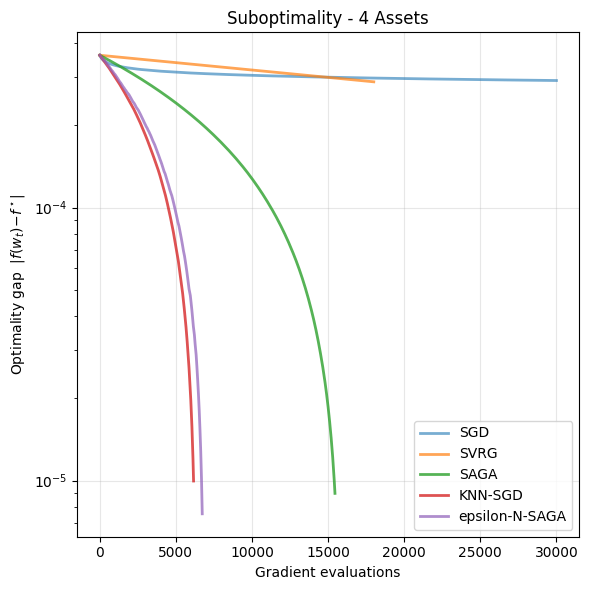

Running experiment with 8 assets...


[*********************100%***********************]  8 of 8 completed


(6000, 8)
[[-0.02810506 -0.03266777 -0.03759707 ... -0.00199752 -0.00064327
  -0.01296295]
 [ 0.02014715  0.00284461  0.02717013 ...  0.00629082  0.0083653
   0.00103325]
 [-0.02879714 -0.05571313 -0.04632578 ... -0.00511536 -0.01547547
  -0.02019475]
 ...
 [ 0.00617176  0.00170228 -0.00054123 ... -0.01340285  0.0013079
   0.00101097]
 [-0.00279488  0.02790575  0.04048192 ...  0.01580263  0.02106163
   0.03477097]
 [-0.00969813 -0.02453779  0.01066988 ...  0.01473814  0.01151214
   0.01659239]]
SVRG settings: m=6000, epochs=20
SVRG stopping early at end of epoch 6 due to optimality gap 1.93e-06 < tol 1.00e-05.
SAGA stopping early at iteration 15000 due to optimality gap 9.47e-06 < tol 1.00e-05.
KNN-SGD stopping early at iteration 5994 due to optimality gap 9.95e-06 < tol 1.00e-05.


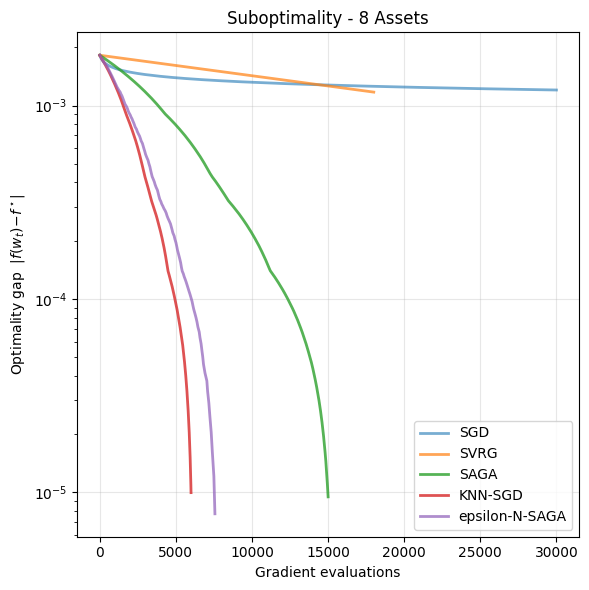

Running experiment with 16 assets...


[*********************100%***********************]  16 of 16 completed


(6000, 16)
[[ 0.01611176  0.00064344 -0.0167718  ...  0.01642717 -0.0117648
   0.00663024]
 [-0.05184106 -0.03203226 -0.00531349 ... -0.08254583  0.00575026
   0.02081864]
 [-0.02689423  0.0147904  -0.01405652 ... -0.00817439  0.00915672
   0.00453966]
 ...
 [-0.01503702 -0.01423299  0.01306178 ... -0.0370328   0.00443852
  -0.00125455]
 [ 0.02046669  0.03546231  0.00682606 ...  0.02999403 -0.0091626
   0.00055829]
 [ 0.01221664  0.005506    0.07156308 ...  0.00470341 -0.00334399
  -0.00041879]]
SVRG settings: m=6000, epochs=20
SVRG stopping early at end of epoch 18 due to optimality gap 4.65e-06 < tol 1.00e-05.
KNN-SGD stopping early at iteration 21110 due to optimality gap 9.99e-06 < tol 1.00e-05.


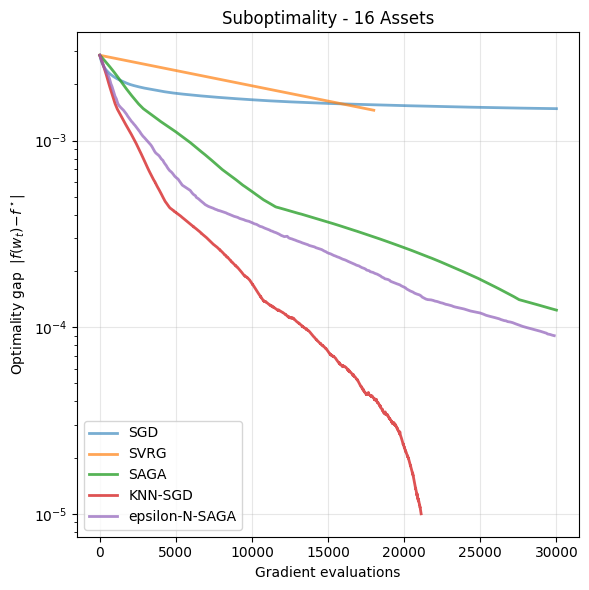

Running experiment with 32 assets...


[*********************100%***********************]  32 of 32 completed


(6000, 32)
[[ 0.00979128 -0.01410238 -0.01738145 ...  0.00109938 -0.00419192
  -0.00420578]
 [ 0.01323874  0.01746828  0.01667897 ... -0.00484217 -0.00163739
   0.00924564]
 [-0.01118606  0.00547369  0.09385629 ... -0.01161229  0.00398242
  -0.00508951]
 ...
 [ 0.01446368  0.01189699  0.0313851  ...  0.00158179  0.00771762
   0.00680453]
 [-0.00600181  0.00227535  0.00481759 ...  0.00751738  0.01044313
   0.02199086]
 [-0.01211502 -0.00895542 -0.00809924 ... -0.00119165 -0.00298624
   0.00188957]]
SVRG settings: m=6000, epochs=20
SVRG stopping early at end of epoch 9 due to optimality gap 8.67e-19 < tol 1.00e-05.
SAGA stopping early at iteration 26350 due to optimality gap 9.30e-06 < tol 1.00e-05.
KNN-SGD stopping early at iteration 10681 due to optimality gap 9.94e-06 < tol 1.00e-05.


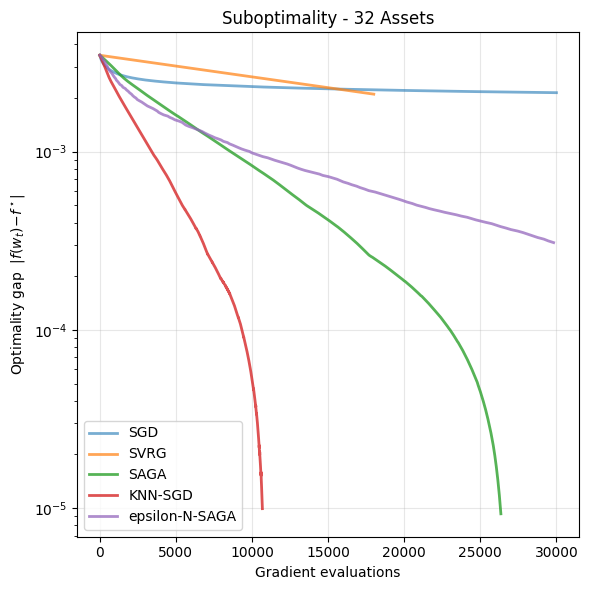

Running experiment with 64 assets...


[*********************100%***********************]  64 of 64 completed


(6000, 64)
[[-0.00224877 -0.01533888 -0.00557486 ...  0.0265605   0.01183245
   0.00216984]
 [ 0.01254589  0.0001771   0.01705208 ... -0.01272113 -0.00310398
  -0.02551819]
 [ 0.01150024 -0.00619468  0.02802015 ... -0.02183898 -0.00579289
  -0.00618942]
 ...
 [-0.00770297  0.01785877 -0.00628456 ...  0.01445377 -0.00020842
  -0.00913435]
 [-0.02471904 -0.01623877  0.00643337 ... -0.01590435  0.01651086
   0.00679297]
 [ 0.01236389  0.01034068  0.00509202 ...  0.02794613 -0.00532317
   0.04819264]]
SVRG settings: m=6000, epochs=20
SVRG stopping early at end of epoch 5 due to optimality gap 4.48e-06 < tol 1.00e-05.
SAGA stopping early at iteration 13350 due to optimality gap 9.66e-06 < tol 1.00e-05.
KNN-SGD stopping early at iteration 5338 due to optimality gap 9.96e-06 < tol 1.00e-05.


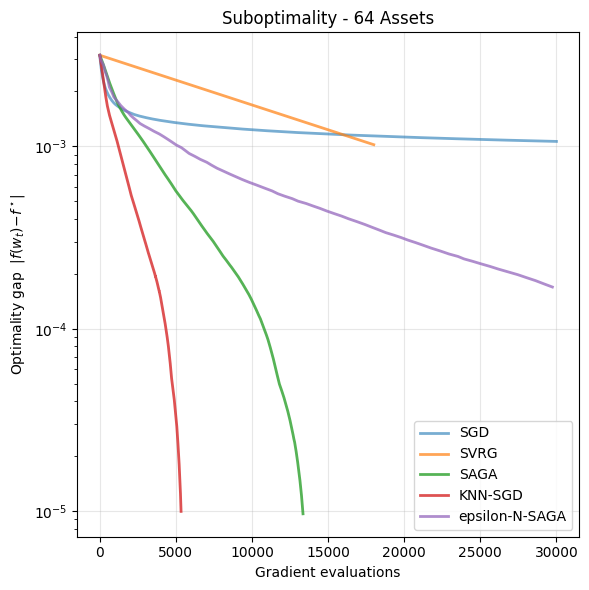

In [80]:
np.random.seed(42)
# Set parameters
START_DATE = '2000-01-01'
END_DATE = '2024-01-01'
T_SAMPLES = 6000
N_BOOTSTRAP = 10  # Reduced for demo
LAMBDA_RISK = 2.5
MAX_EPOCHS = 10

universes = {
    4:  ["AAPL","GOOGL","JPM","XOM"],
    8:  ["AAPL","GOOGL","JPM","XOM",
         "AMZN","LLY","CAT","PG"],
    16: ["AAPL","GOOGL","JPM","XOM",
         "AMZN","LLY","CAT","PG",
         "MSFT","META","TSLA","JNJ",
         "BAC","UNP","KO","CVX"],
    32: ["AAPL","GOOGL","JPM","XOM",
         "AMZN","LLY","CAT","PG",
         "MSFT","META","TSLA","JNJ",
         "BAC","UNP","KO","CVX",
         "NVDA","NFLX","HD","UNH",
         "WFC","GS","BA","COST",
         "PEP","COP","LIN","NUE",
         "AMT","PLD","NEE","SO"],
    64: ["AAPL","GOOGL","JPM","XOM",
      "AMZN","LLY","CAT","PG",
      "MSFT","META","TSLA","JNJ",
      "BAC","UNP","KO","CVX",
      "NVDA","NFLX","HD","UNH",
      "WFC","GS","BA","COST",
      "PEP","COP","LIN","NUE",
      "AMT","PLD","NEE","SO",
      "AVGO","ORCL","CRM","AMD",
      "DIS","TMUS","VZ",
      "C","MS","AXP",
      "MRK","ABBV","PFE",
      "MCD","SBUX","LOW",
      "WMT","PM","CL",
      "SLB","EOG","PSX",
      "HON","UPS","GE",
      "APD","DOW","NEM",
      "SPG","EQIX",
      "DUK","EXC"]
}

param_sets = {
        'conservative': {
            'SGD': {'eta0': 0.01, 'gamma': 0.1, 'max_iter': 10000},
            'SVRG': {'eta': 0.001, 'm': T_SAMPLES, 'max_epochs': 30},
            'SAGA': {'eta': 0.001, 'max_iter': 10000}
        },
        'moderate': {
            'SGD': {'eta0': 0.1, 'gamma': 0.01, 'max_iter': 30000},
            'SVRG': {'eta': 0.01, 'm': T_SAMPLES, 'max_epochs': 20},
            'SAGA': {'eta': 0.02, 'max_iter': 30000},
            'epsilon_N_SAGA':{'eta': 0.05, 'max_iter': 30000, 'epsilon': 0.01, 'q': 20},
            'KNN-SGD': {'k': 100, 'buffer_size': 500, 'alpha': 0.3, 'lr': 0.05, 'max_iter': 30000}}
        ,
        'aggressive': {
            'SGD': {'eta0': 0.1, 'gamma': 0.01, 'max_iter': 10 * T_SAMPLES},
            'SVRG': {'eta': 0.01, 'm': T_SAMPLES, 'max_epochs': 10},
            'SAGA': {'eta': 0.05, 'max_iter': 10 * T_SAMPLES},
            'epsilon_N_SAGA':{'eta': 0.05, 'max_iter': 10 * T_SAMPLES, 'epsilon': 0.01, 'q': 20},
            'KNN-SGD': {'k': 20, 'buffer_size': 1000, 'alpha': 0.6, 'lr': 0.05, 'max_iter': 10 * T_SAMPLES}
        }
    }

results = {}

for n_assets, TICKERS in universes.items():
    tag = f"{n_assets}_assets"
    print(f"Running experiment with {n_assets} assets...")
    optimizer = PortfolioOptimizer(n_assets=n_assets, lambda_risk=LAMBDA_RISK)
    simulator = DataSimulator(TICKERS, START_DATE, END_DATE)
    replications = simulator.generate_bootstrap_replications(B=N_BOOTSTRAP, T=T_SAMPLES)
    print(replications[0].shape)
    print(replications[0])

    mu_hat = np.mean(replications[0], axis=0)
    Sigma_hat = np.cov(replications[0].T)
    w_star = optimizer.solve_deterministic(mu_hat, Sigma_hat)
    f_star = optimizer.objective_function(w_star, mu_hat, Sigma_hat)

    runner = ExperimentRunner(optimizer)
    run_out = runner.run_single_experiment(
        replications[0],
        params = param_sets['moderate'],
        target_obj=f_star,
        tol=1e-5
    )
    results[tag] = run_out

    plot_suboptimality(TICKERS, run_out, max_grad_evals=30000)


Running experiment with 4 assets...


[*********************100%***********************]  4 of 4 completed


(6000, 4)
[[-0.03544886 -0.02648897  0.032079   -0.03091224]
 [-0.10646364 -0.06114489  0.11894231  0.01212783]
 [-0.02495183  0.04715472 -0.01662231  0.03055738]
 ...
 [-0.00658094  0.00100554 -0.01102932  0.00314019]
 [ 0.01350797  0.02457508  0.00570435 -0.01195206]
 [ 0.00316581  0.00105604  0.00669188  0.02956981]]
SVRG settings: m=6000, epochs=20
SAGA stopping early at iteration 15450 due to optimality gap 8.97e-06 < tol 1.00e-05.
KNN-SGD stopping early at iteration 6160 due to optimality gap 9.96e-06 < tol 1.00e-05.
Running experiment with 8 assets...


[*********************100%***********************]  8 of 8 completed


(6000, 8)
[[-0.02810459 -0.03266777 -0.03759714 ... -0.00199727 -0.00064327
  -0.01296266]
 [ 0.02014665  0.00284461  0.02716963 ...  0.00629082  0.00836559
   0.00103294]
 [-0.02879726 -0.05571313 -0.04632524 ... -0.00511503 -0.01547537
  -0.02019456]
 ...
 [ 0.00617192  0.00170228 -0.00054145 ... -0.01340249  0.00130781
   0.00101116]
 [-0.00279519  0.02790575  0.04048192 ...  0.01580226  0.02106116
   0.03477154]
 [-0.00969774 -0.02453779  0.0106701  ...  0.0147385   0.01151287
   0.01659184]]
SVRG settings: m=6000, epochs=20
SVRG stopping early at end of epoch 6 due to optimality gap 1.93e-06 < tol 1.00e-05.
SAGA stopping early at iteration 15000 due to optimality gap 9.47e-06 < tol 1.00e-05.
KNN-SGD stopping early at iteration 5994 due to optimality gap 9.95e-06 < tol 1.00e-05.


[                       0%                       ]

Running experiment with 16 assets...


[*********************100%***********************]  16 of 16 completed


(6000, 16)
[[ 0.01611217  0.00064344 -0.01677203 ...  0.01642717 -0.01176458
   0.00663034]
 [-0.05184135 -0.03203226 -0.00531314 ... -0.08254583  0.00575011
   0.02081843]
 [-0.02689423  0.0147904  -0.01405676 ... -0.00817439  0.00915672
   0.00453966]
 ...
 [-0.01503681 -0.01423299  0.01306178 ... -0.0370328   0.00443841
  -0.00125499]
 [ 0.02046647  0.03546231  0.00682564 ...  0.02999403 -0.00916249
   0.00055858]
 [ 0.01221664  0.005506    0.07156319 ...  0.00470341 -0.00334445
  -0.00041886]]
SVRG settings: m=6000, epochs=20
SVRG stopping early at end of epoch 18 due to optimality gap 4.65e-06 < tol 1.00e-05.
KNN-SGD stopping early at iteration 21110 due to optimality gap 9.99e-06 < tol 1.00e-05.
Running experiment with 32 assets...


[*********************100%***********************]  32 of 32 completed


(6000, 32)
[[-0.01928124  0.0048944  -0.02420638 ... -0.01404304 -0.00225741
  -0.00024722]
 [-0.05037427  0.00555806 -0.0441361  ... -0.01650571 -0.013009
  -0.01285992]
 [-0.00999141  0.00173857 -0.00347004 ...  0.00554897  0.0074498
  -0.02292411]
 ...
 [ 0.01347841 -0.00127989 -0.00100468 ...  0.01657672  0.0103842
   0.01201063]
 [ 0.02659819 -0.00808746  0.00677805 ...  0.03607858  0.01151074
   0.01069621]
 [-0.00143921  0.00530214  0.00260407 ... -0.01140105  0.00121932
   0.00289927]]
SVRG settings: m=6000, epochs=20
SVRG stopping early at end of epoch 5 due to optimality gap 7.27e-06 < tol 1.00e-05.
SAGA stopping early at iteration 14100 due to optimality gap 9.34e-06 < tol 1.00e-05.
KNN-SGD stopping early at iteration 5631 due to optimality gap 9.91e-06 < tol 1.00e-05.


[                       0%                       ]

Running experiment with 64 assets...


[*********************100%***********************]  64 of 64 completed


(6000, 64)
[[ 6.62266586e-03  1.34001367e-04 -7.25795711e-03 ...  8.04904784e-03
   3.48055685e-03 -1.25422381e-02]
 [-1.70607164e-02  1.54326616e-03 -9.49690112e-05 ...  2.92763603e-02
   1.09527725e-03  2.91695433e-02]
 [-1.18548291e-02  1.26617112e-02  2.27898735e-02 ... -6.81697242e-03
   2.43033956e-04 -8.93694156e-03]
 ...
 [ 2.90151534e-02  1.09062036e-03  5.52455942e-02 ...  2.97344964e-02
  -2.94973737e-03 -3.75570328e-03]
 [ 6.45396542e-03  1.62764175e-02 -3.18973756e-02 ... -2.32565316e-03
   1.51949476e-03  2.66477668e-02]
 [ 2.09190351e-02  3.84662083e-03  1.58474045e-02 ... -1.16557759e-03
   2.96543813e-03 -3.92511127e-03]]
SVRG settings: m=6000, epochs=20
SVRG stopping early at end of epoch 7 due to optimality gap 1.73e-18 < tol 1.00e-05.
SAGA stopping early at iteration 20550 due to optimality gap 8.02e-06 < tol 1.00e-05.
KNN-SGD stopping early at iteration 8087 due to optimality gap 9.97e-06 < tol 1.00e-05.


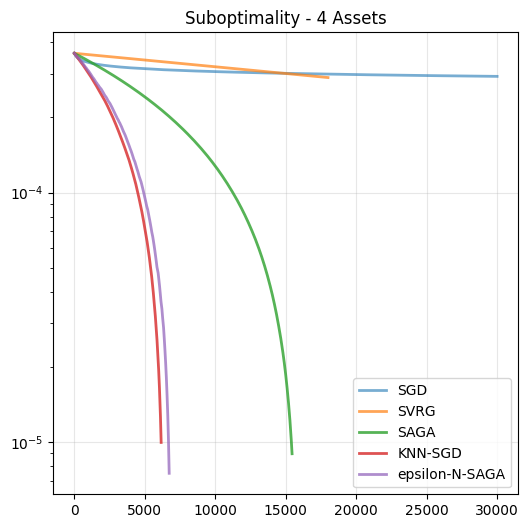

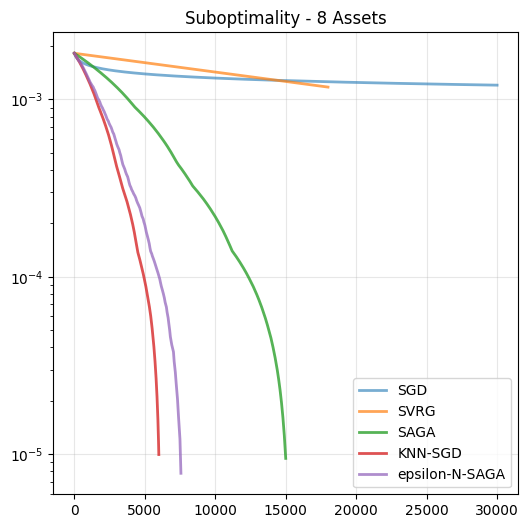

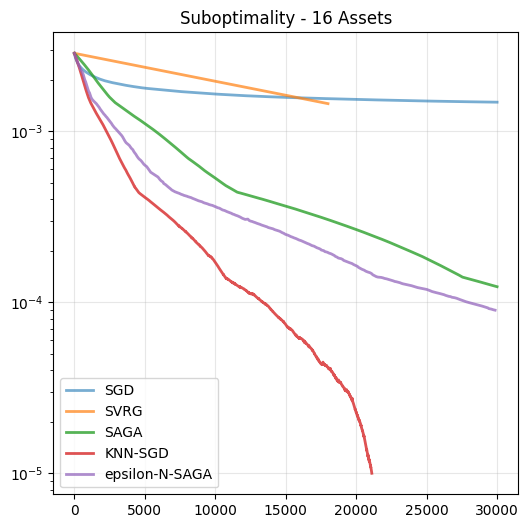

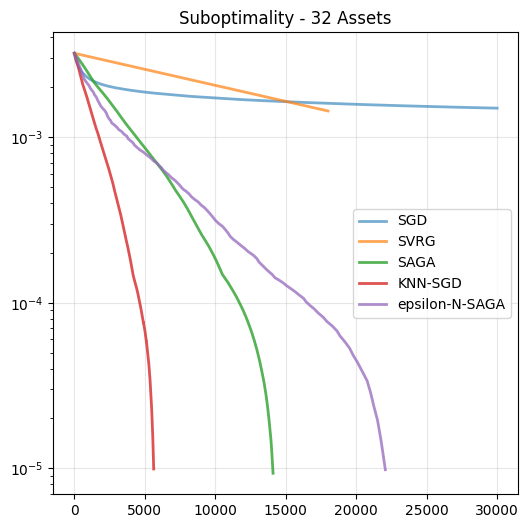

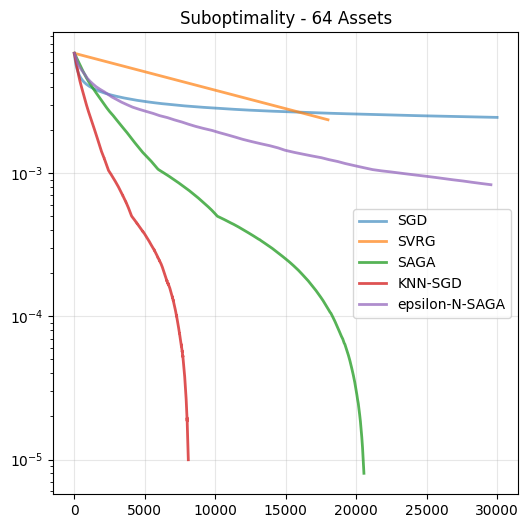

In [6]:
np.random.seed(42)
# Set parameters
START_DATE = '2000-01-01'
END_DATE = '2024-01-01'
T_SAMPLES = 6000
N_BOOTSTRAP = 10  # Reduced for demo
LAMBDA_RISK = 2.5
MAX_EPOCHS = 10

universes = {
    4:  ["AAPL","GOOGL","JPM","XOM"],
    8:  ["AAPL","GOOGL","JPM","XOM",
         "AMZN","LLY","CAT","PG"],
    16: ["AAPL","GOOGL","JPM","XOM",
         "AMZN","LLY","CAT","PG",
         "MSFT","META","TSLA","JNJ",
         "BAC","UNP","KO","CVX"],
    32: ["AAPL","GOOGL","JPM","XOM",
         "AMZN","LLY","CAT","PG",
         "MSFT","META","TSLA","JNJ",
         "BAC","UNP","KO","CVX",
         "NVDA","NFLX","HD","UNH",
         "WFC","GS","BA","COST",
         "PEP","COP","LIN","NUE",
         "AMT","PLD","NEE","SO"],
    64: ["AAPL","GOOGL","JPM","XOM",
      "AMZN","LLY","CAT","PG",
      "MSFT","META","TSLA","JNJ",
      "BAC","UNP","KO","CVX",
      "NVDA","NFLX","HD","UNH",
      "WFC","GS","BA","COST",
      "PEP","COP","LIN","NUE",
      "AMT","PLD","NEE","SO",
      "AVGO","ORCL","CRM","AMD",
      "DIS","TMUS","VZ",
      "C","MS","AXP",
      "MRK","ABBV","PFE",
      "MCD","SBUX","LOW",
      "WMT","PM","CL",
      "SLB","EOG","PSX",
      "HON","UPS","GE",
      "APD","DOW","NEM",
      "SPG","EQIX",
      "DUK","EXC"]
}

param_sets = {
        'conservative': {
            'SGD': {'eta0': 0.01, 'gamma': 0.1, 'max_iter': 10000},
            'SVRG': {'eta': 0.001, 'm': T_SAMPLES, 'max_epochs': 30},
            'SAGA': {'eta': 0.001, 'max_iter': 10000}
        },
        'moderate': {
            'SGD': {'eta0': 0.1, 'gamma': 0.01, 'max_iter': 30000},
            'SVRG': {'eta': 0.01, 'm': T_SAMPLES, 'max_epochs': 20},
            'SAGA': {'eta': 0.02, 'max_iter': 30000},
            'epsilon_N_SAGA':{'eta': 0.05, 'max_iter': 30000, 'epsilon': 0.01, 'q': 20},
            'KNN-SGD': {'k': 100, 'buffer_size': 500, 'alpha': 0.3, 'lr': 0.05, 'max_iter': 30000}}
        ,
        'aggressive': {
            'SGD': {'eta0': 0.1, 'gamma': 0.01, 'max_iter': 10 * T_SAMPLES},
            'SVRG': {'eta': 0.01, 'm': T_SAMPLES, 'max_epochs': 10},
            'SAGA': {'eta': 0.05, 'max_iter': 10 * T_SAMPLES},
            'epsilon_N_SAGA':{'eta': 0.05, 'max_iter': 10 * T_SAMPLES, 'epsilon': 0.01, 'q': 20},
            'KNN-SGD': {'k': 5, 'buffer_size': 1000, 'alpha': 0.6, 'lr': 0.05, 'max_iter': 10 * T_SAMPLES}
        }
    }

results = {}

for n_assets, TICKERS in universes.items():
    tag = f"{n_assets}_assets"
    print(f"Running experiment with {n_assets} assets...")
    optimizer = PortfolioOptimizer(n_assets=n_assets, lambda_risk=LAMBDA_RISK)
    simulator = DataSimulator(TICKERS, START_DATE, END_DATE)
    replications = simulator.generate_bootstrap_replications(B=N_BOOTSTRAP, T=T_SAMPLES)
    print(replications[0].shape)
    print(replications[0])

    mu_hat = np.mean(replications[0], axis=0)
    Sigma_hat = np.cov(replications[0].T)
    w_star = optimizer.solve_deterministic(mu_hat, Sigma_hat)
    f_star = optimizer.objective_function(w_star, mu_hat, Sigma_hat)

    runner = ExperimentRunner(optimizer)
    run_out = runner.run_single_experiment(
        replications[0],
        params = param_sets['moderate'],
        target_obj=f_star,
        tol=1e-5
    )
    results[tag] = run_out

    plot_suboptimality(TICKERS, run_out, max_grad_evals=30000)


In [ ]:
np.random.seed(42)
# Set parameters
START_DATE = '2000-01-01'
END_DATE = '2024-01-01'
T_SAMPLES = 6000
N_BOOTSTRAP = 10  # Reduced for demo
LAMBDA_RISK = 2.5
MAX_EPOCHS = 10

universes = {
    4:  ["AAPL","GOOGL","JPM","XOM"],
    8:  ["AAPL","GOOGL","JPM","XOM",
         "AMZN","LLY","CAT","PG"],
    16: ["AAPL","GOOGL","JPM","XOM",
         "AMZN","LLY","CAT","PG",
         "MSFT","META","TSLA","JNJ",
         "BAC","UNP","KO","CVX"],
    32: ["AAPL","GOOGL","JPM","XOM",
         "AMZN","LLY","CAT","PG",
         "MSFT","META","TSLA","JNJ",
         "BAC","UNP","KO","CVX",
         "NVDA","NFLX","HD","UNH",
         "WFC","GS","BA","COST",
         "PEP","COP","LIN","NUE",
         "AMT","PLD","NEE","SO"],
    64: ["AAPL","GOOGL","JPM","XOM",
      "AMZN","LLY","CAT","PG",
      "MSFT","META","TSLA","JNJ",
      "BAC","UNP","KO","CVX",
      "NVDA","NFLX","HD","UNH",
      "WFC","GS","BA","COST",
      "PEP","COP","LIN","NUE",
      "AMT","PLD","NEE","SO",
      "AVGO","ORCL","CRM","AMD",
      "DIS","TMUS","VZ",
      "C","MS","AXP",
      "MRK","ABBV","PFE",
      "MCD","SBUX","LOW",
      "WMT","PM","CL",
      "SLB","EOG","PSX",
      "HON","UPS","GE",
      "APD","DOW","NEM",
      "SPG","EQIX",
      "DUK","EXC"]
}

param_sets = {
        'conservative': {
            'SGD': {'eta0': 0.01, 'gamma': 0.1, 'max_iter': 10000},
            'SVRG': {'eta': 0.001, 'm': T_SAMPLES, 'max_epochs': 30},
            'SAGA': {'eta': 0.001, 'max_iter': 10000}
        },
        'moderate': {
            'SGD': {'eta0': 0.1, 'gamma': 0.01, 'max_iter': 30000},
            'SVRG': {'eta': 0.01, 'm': T_SAMPLES, 'max_epochs': 20},
            'SAGA': {'eta': 0.05, 'max_iter': 30000},
            'epsilon_N_SAGA':{'eta': 0.05, 'max_iter': 30000, 'epsilon': 0.01, 'q': 20},
            'KNN-SGD': {'k': 5, 'buffer_size': 500, 'alpha': 0.3, 'lr': 0.05, 'max_iter': 30000}}
        ,
        'aggressive': {
            'SGD': {'eta0': 0.1, 'gamma': 0.01, 'max_iter': 10 * T_SAMPLES},
            'SVRG': {'eta': 0.01, 'm': T_SAMPLES, 'max_epochs': 10},
            'SAGA': {'eta': 0.05, 'max_iter': 10 * T_SAMPLES},
            'epsilon_N_SAGA':{'eta': 0.05, 'max_iter': 10 * T_SAMPLES, 'epsilon': 0.01, 'q': 20},
            'KNN-SGD': {'k': 20, 'buffer_size': 1000, 'alpha': 0.6, 'lr': 0.05, 'max_iter': 10 * T_SAMPLES}
        }
    }

results = {}

for n_assets, TICKERS in universes.items():
    tag = f"{n_assets}_assets"
    print(f"Running experiment with {n_assets} assets...")
    optimizer = PortfolioOptimizer(n_assets=n_assets, lambda_risk=LAMBDA_RISK)
    simulator = DataSimulator(TICKERS, START_DATE, END_DATE)
    replications = simulator.generate_bootstrap_replications(B=N_BOOTSTRAP, T=T_SAMPLES)
    print(replications[0].shape)
    print(replications[0])

    mu_hat = np.mean(replications[0], axis=0)
    Sigma_hat = np.cov(replications[0].T)
    w_star = optimizer.solve_deterministic(mu_hat, Sigma_hat)
    f_star = optimizer.objective_function(w_star, mu_hat, Sigma_hat)

    runner = ExperimentRunner(optimizer)
    run_out = runner.run_single_experiment(
        replications[0],
        params = param_sets['moderate'],
        target_obj=f_star,
        tol=1e-5
    )
    results[tag] = run_out

    plot_suboptimality(TICKERS, run_out, max_grad_evals=30000)


[*********************100%***********************]  4 of 4 completed


SVRG settings: m=8000, epochs=30
SAGA stopping early at iteration 10100 due to optimality gap 9.19e-06 < tol 1.00e-05.
KNN-SGD stopping early at iteration 4057 due to optimality gap 9.99e-06 < tol 1.00e-05.


[*********************100%***********************]  4 of 4 completed


SGD stopping early at iteration 10 due to optimality gap 2.56e-07 < tol 1.00e-05.
SVRG settings: m=8000, epochs=30
SVRG stopping early at epoch 0 due to optimality gap 0.00e+00 < tol 1.00e-05.
SAGA stopping early at iteration 0 due to optimality gap 0.00e+00 < tol 1.00e-05.
KNN-SGD stopping early at iteration 0 due to optimality gap 0.00e+00 < tol 1.00e-05.


[*********************100%***********************]  4 of 4 completed


SVRG settings: m=8000, epochs=30
SVRG stopping early at end of epoch 10 due to optimality gap 0.00e+00 < tol 1.00e-05.
KNN-SGD stopping early at iteration 14949 due to optimality gap 9.97e-06 < tol 1.00e-05.


[*********************100%***********************]  4 of 4 completed


SVRG settings: m=8000, epochs=30
SAGA stopping early at iteration 16600 due to optimality gap 8.72e-06 < tol 1.00e-05.
KNN-SGD stopping early at iteration 6613 due to optimality gap 9.94e-06 < tol 1.00e-05.


[*********************100%***********************]  8 of 8 completed


SVRG settings: m=8000, epochs=30
SVRG stopping early at end of epoch 7 due to optimality gap 0.00e+00 < tol 1.00e-05.
SAGA stopping early at iteration 26450 due to optimality gap 9.93e-06 < tol 1.00e-05.
KNN-SGD stopping early at iteration 10653 due to optimality gap 9.99e-06 < tol 1.00e-05.


[*********************100%***********************]  8 of 8 completed


SVRG settings: m=8000, epochs=30
SVRG stopping early at end of epoch 3 due to optimality gap 2.55e-07 < tol 1.00e-05.
SAGA stopping early at iteration 11100 due to optimality gap 7.33e-06 < tol 1.00e-05.
KNN-SGD stopping early at iteration 4412 due to optimality gap 9.98e-06 < tol 1.00e-05.


[*********************100%***********************]  8 of 8 completed


SVRG settings: m=8000, epochs=30
SAGA stopping early at iteration 20350 due to optimality gap 9.24e-06 < tol 1.00e-05.
KNN-SGD stopping early at iteration 8098 due to optimality gap 9.95e-06 < tol 1.00e-05.


[*********************100%***********************]  8 of 8 completed


SVRG settings: m=8000, epochs=30
KNN-SGD stopping early at iteration 17894 due to optimality gap 9.99e-06 < tol 1.00e-05.


[*********************100%***********************]  16 of 16 completed


SVRG settings: m=8000, epochs=30
SVRG stopping early at end of epoch 8 due to optimality gap 0.00e+00 < tol 1.00e-05.
SAGA stopping early at iteration 29250 due to optimality gap 9.17e-06 < tol 1.00e-05.
KNN-SGD stopping early at iteration 11541 due to optimality gap 9.98e-06 < tol 1.00e-05.


[*********************100%***********************]  16 of 16 completed


SVRG settings: m=8000, epochs=30
SVRG stopping early at end of epoch 5 due to optimality gap 4.77e-06 < tol 1.00e-05.
SAGA stopping early at iteration 19800 due to optimality gap 9.11e-06 < tol 1.00e-05.
KNN-SGD stopping early at iteration 8000 due to optimality gap 9.99e-06 < tol 1.00e-05.


[*********************100%***********************]  16 of 16 completed


SVRG settings: m=8000, epochs=30
SVRG stopping early at end of epoch 5 due to optimality gap 1.73e-18 < tol 1.00e-05.
SAGA stopping early at iteration 16150 due to optimality gap 8.05e-06 < tol 1.00e-05.
KNN-SGD stopping early at iteration 6403 due to optimality gap 9.98e-06 < tol 1.00e-05.


[*********************100%***********************]  16 of 16 completed


SVRG settings: m=8000, epochs=30
SVRG stopping early at end of epoch 8 due to optimality gap 0.00e+00 < tol 1.00e-05.
SAGA stopping early at iteration 29450 due to optimality gap 9.85e-06 < tol 1.00e-05.
KNN-SGD stopping early at iteration 12201 due to optimality gap 1.00e-05 < tol 1.00e-05.


[*********************100%***********************]  32 of 32 completed


SVRG settings: m=8000, epochs=30
SVRG stopping early at end of epoch 5 due to optimality gap 3.47e-18 < tol 1.00e-05.
SAGA stopping early at iteration 19300 due to optimality gap 8.94e-06 < tol 1.00e-05.
KNN-SGD stopping early at iteration 7732 due to optimality gap 9.86e-06 < tol 1.00e-05.


[*********************100%***********************]  32 of 32 completed


SVRG settings: m=8000, epochs=30
SVRG stopping early at end of epoch 7 due to optimality gap 9.98e-06 < tol 1.00e-05.
SAGA stopping early at iteration 25950 due to optimality gap 9.97e-06 < tol 1.00e-05.
KNN-SGD stopping early at iteration 10289 due to optimality gap 9.96e-06 < tol 1.00e-05.


[*********************100%***********************]  32 of 32 completed


SVRG settings: m=8000, epochs=30
SVRG stopping early at end of epoch 11 due to optimality gap 6.40e-06 < tol 1.00e-05.
KNN-SGD stopping early at iteration 17844 due to optimality gap 9.99e-06 < tol 1.00e-05.


[*********************100%***********************]  32 of 32 completed


SVRG settings: m=8000, epochs=30
SVRG stopping early at end of epoch 7 due to optimality gap 2.72e-07 < tol 1.00e-05.
SAGA stopping early at iteration 24550 due to optimality gap 9.76e-06 < tol 1.00e-05.
KNN-SGD stopping early at iteration 9855 due to optimality gap 1.00e-05 < tol 1.00e-05.


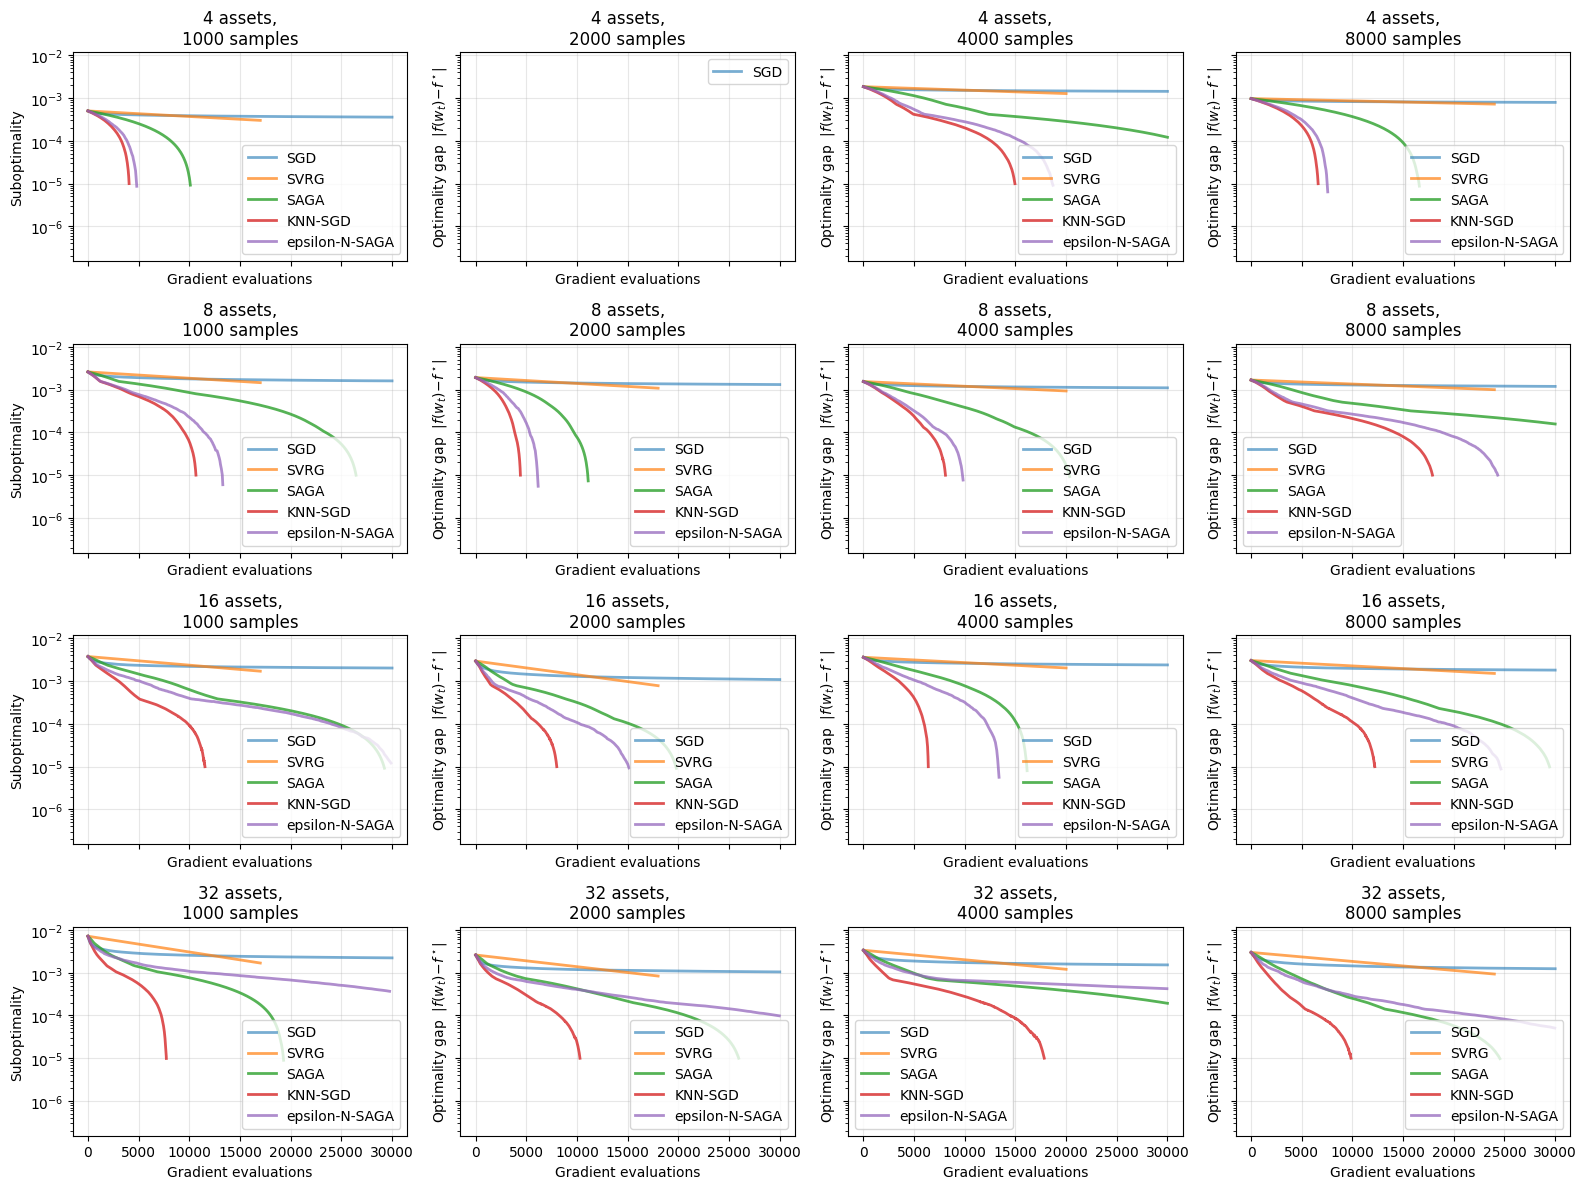

In [86]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

# your existing parameters
START_DATE = '2000-01-01'
END_DATE   = '2024-01-01'
N_BOOTSTRAP = 10
LAMBDA_RISK = 2.5
param_config = param_sets['moderate']  # or whichever you want to use

# the four universes you care about
universes = {
    4:  ["AAPL","GOOGL","JPM","XOM"],
    8:  ["AAPL","GOOGL","JPM","XOM",
         "AMZN","LLY","CAT","PG"],
    16: ["AAPL","GOOGL","JPM","XOM",
         "AMZN","LLY","CAT","PG",
         "MSFT","META","TSLA","JNJ",
         "BAC","UNP","KO","CVX"],
    32: ["AAPL","GOOGL","JPM","XOM",
         "AMZN","LLY","CAT","PG",
         "MSFT","META","TSLA","JNJ",
         "BAC","UNP","KO","CVX",
         "NVDA","NFLX","HD","UNH",
         "WFC","GS","BA","COST",
         "PEP","COP","LIN","NUE",
         "AMT","PLD","NEE","SO"]
    # 64: ["AAPL","GOOGL","JPM","XOM",
    #   "AMZN","LLY","CAT","PG",
    #   "MSFT","META","TSLA","JNJ",
    #   "BAC","UNP","KO","CVX",
    #   "NVDA","NFLX","HD","UNH",
    #   "WFC","GS","BA","COST",
    #   "PEP","COP","LIN","NUE",
    #   "AMT","PLD","NEE","SO",
    #   "AVGO","ORCL","CRM","AMD",
    #   "DIS","TMUS","VZ",
    #   "C","MS","AXP",
    #   "MRK","ABBV","PFE",
    #   "MCD","SBUX","LOW",
    #   "WMT","PM","CL",
    #   "SLB","EOG","PSX",
    #   "HON","UPS","GE",
    #   "APD","DOW","NEM",
    #   "SPG","EQIX",
    #   "DUK","EXC"]
}

param_sets = {
        'conservative': {
            'SGD': {'eta0': 0.01, 'gamma': 0.1, 'max_iter': 10000},
            'SVRG': {'eta': 0.001, 'm': T_SAMPLES, 'max_epochs': 30},
            'SAGA': {'eta': 0.001, 'max_iter': 10000}
        },
        'moderate': {
            'SGD': {'eta0': 0.1, 'gamma': 0.01, 'max_iter': 30000},
            'SVRG': {'eta': 0.01, 'm': T_SAMPLES, 'max_epochs': 30},
            'SAGA': {'eta': 0.02, 'max_iter': 30000},
            'epsilon_N_SAGA':{'eta': 0.05, 'max_iter': 30000, 'epsilon': 0.01, 'q': 20},
            'KNN-SGD': {'k': 100, 'buffer_size': 500, 'alpha': 0.3, 'lr': 0.05, 'max_iter': 30000}}
        ,
        'aggressive': {
            'SGD': {'eta0': 0.1, 'gamma': 0.01, 'max_iter': 10 * T_SAMPLES},
            'SVRG': {'eta': 0.01, 'm': T_SAMPLES, 'max_epochs': 10},
            'SAGA': {'eta': 0.05, 'max_iter': 10 * T_SAMPLES},
            'epsilon_N_SAGA':{'eta': 0.05, 'max_iter': 10 * T_SAMPLES, 'epsilon': 0.01, 'q': 20},
            'KNN-SGD': {'k': 20, 'buffer_size': 1000, 'alpha': 0.6, 'lr': 0.05, 'max_iter': 10 * T_SAMPLES}
        }
    }

param_config = param_sets['moderate']  # choose 'conservative' | 'moderate' | 'aggressive'


asset_list  = [4, 8, 16, 32]
sample_list = [1000, 2000, 4000, 8000]

# prepare the figure and axes
fig, axes = plt.subplots(
    nrows=len(asset_list),
    ncols=len(sample_list),
    figsize=(4*4, 3*4),
    sharex=True,
    sharey=True
)
axes = np.atleast_2d(axes)

for i, n_assets in enumerate(asset_list):
    TICKERS = universes[n_assets]
    optimizer = PortfolioOptimizer(n_assets=n_assets, lambda_risk=LAMBDA_RISK)
    runner    = ExperimentRunner(optimizer)

    for j, T_SAMPLES in enumerate(sample_list):
        ax = axes[i, j]

        # 1) Simulate bootstrap data
        simulator    = DataSimulator(TICKERS, START_DATE, END_DATE)
        replications = simulator.generate_bootstrap_replications(B=N_BOOTSTRAP, T=T_SAMPLES)
        data0        = replications[0]

        # 2) Compute deterministic optimum
        mu_hat    = data0.mean(axis=0)
        Sigma_hat = np.cov(data0.T)
        w_star    = optimizer.solve_deterministic(mu_hat, Sigma_hat)
        f_star    = optimizer.objective_function(w_star, mu_hat, Sigma_hat)

        # 3) Run experiment
        run_out = runner.run_single_experiment(
            data0,
            params     = param_config,
            target_obj = f_star,
            tol        = 1e-5
        )

        plot_suboptimality(
            TICKERS,
            run_out,
            max_grad_evals=30000,
            ax=ax           # ← pass your subplot here
        )


        # Titles & labels
        ax.set_title(f"{n_assets} assets,\n{T_SAMPLES} samples")
        if i == len(asset_list)-1:
            ax.set_xlabel("Gradient evaluations")
        if j == 0:
            ax.set_ylabel("Suboptimality")

plt.tight_layout()
plt.show()


[*********************100%***********************]  4 of 4 completed


SVRG settings: m=1000, epochs=30
SVRG stopping early at end of epoch 21 due to optimality gap 8.88e-07 < tol 1.00e-05.
SAGA stopping early at iteration 10100 due to optimality gap 9.16e-06 < tol 1.00e-05.
KNN-SGD stopping early at iteration 4987 due to optimality gap 9.92e-06 < tol 1.00e-05.


[*********************100%***********************]  4 of 4 completed


SVRG settings: m=1000, epochs=30
SVRG stopping early at end of epoch 21 due to optimality gap 3.03e-09 < tol 1.00e-05.
SAGA stopping early at iteration 10200 due to optimality gap 9.71e-06 < tol 1.00e-05.
KNN-SGD stopping early at iteration 5166 due to optimality gap 9.87e-06 < tol 1.00e-05.


[*********************100%***********************]  4 of 4 completed


SVRG settings: m=1000, epochs=30
SAGA stopping early at iteration 18400 due to optimality gap 9.90e-06 < tol 1.00e-05.
KNN-SGD stopping early at iteration 9117 due to optimality gap 9.98e-06 < tol 1.00e-05.


[*********************100%***********************]  4 of 4 completed


SVRG settings: m=1000, epochs=30
SAGA stopping early at iteration 29200 due to optimality gap 9.12e-06 < tol 1.00e-05.
KNN-SGD stopping early at iteration 14573 due to optimality gap 9.99e-06 < tol 1.00e-05.


[*********************100%***********************]  8 of 8 completed


SVRG settings: m=1000, epochs=30
SVRG stopping early at end of epoch 16 due to optimality gap 1.18e-06 < tol 1.00e-05.
SAGA stopping early at iteration 7800 due to optimality gap 9.80e-06 < tol 1.00e-05.
KNN-SGD stopping early at iteration 3950 due to optimality gap 9.99e-06 < tol 1.00e-05.


[*********************100%***********************]  8 of 8 completed


SVRG settings: m=1000, epochs=30
SVRG stopping early at end of epoch 30 due to optimality gap 1.34e-06 < tol 1.00e-05.
SAGA stopping early at iteration 14700 due to optimality gap 9.34e-06 < tol 1.00e-05.
KNN-SGD stopping early at iteration 7327 due to optimality gap 9.97e-06 < tol 1.00e-05.


[*********************100%***********************]  8 of 8 completed


SVRG settings: m=1000, epochs=30
SAGA stopping early at iteration 21000 due to optimality gap 9.43e-06 < tol 1.00e-05.
KNN-SGD stopping early at iteration 10525 due to optimality gap 1.00e-05 < tol 1.00e-05.


[*********************100%***********************]  8 of 8 completed


SVRG settings: m=1000, epochs=30
KNN-SGD stopping early at iteration 17404 due to optimality gap 1.00e-05 < tol 1.00e-05.


[*********************100%***********************]  16 of 16 completed


SVRG settings: m=1000, epochs=30
SAGA stopping early at iteration 18400 due to optimality gap 8.13e-06 < tol 1.00e-05.
KNN-SGD stopping early at iteration 9415 due to optimality gap 9.97e-06 < tol 1.00e-05.


[*********************100%***********************]  16 of 16 completed


SVRG settings: m=1000, epochs=30
KNN-SGD stopping early at iteration 17176 due to optimality gap 9.97e-06 < tol 1.00e-05.


[*********************100%***********************]  16 of 16 completed


SVRG settings: m=1000, epochs=30
SAGA stopping early at iteration 18550 due to optimality gap 9.51e-06 < tol 1.00e-05.
KNN-SGD stopping early at iteration 9309 due to optimality gap 9.99e-06 < tol 1.00e-05.


[*********************100%***********************]  16 of 16 completed


SVRG settings: m=1000, epochs=30
KNN-SGD stopping early at iteration 15033 due to optimality gap 9.99e-06 < tol 1.00e-05.


[*********************100%***********************]  32 of 32 completed


SVRG settings: m=1000, epochs=30
SAGA stopping early at iteration 15500 due to optimality gap 9.01e-06 < tol 1.00e-05.
KNN-SGD stopping early at iteration 7799 due to optimality gap 9.98e-06 < tol 1.00e-05.


[*********************100%***********************]  32 of 32 completed


SVRG settings: m=1000, epochs=30
SVRG stopping early at end of epoch 28 due to optimality gap 1.68e-07 < tol 1.00e-05.
SAGA stopping early at iteration 13800 due to optimality gap 8.27e-06 < tol 1.00e-05.
KNN-SGD stopping early at iteration 6836 due to optimality gap 1.00e-05 < tol 1.00e-05.


[*********************100%***********************]  32 of 32 completed


SVRG settings: m=1000, epochs=30
KNN-SGD stopping early at iteration 19038 due to optimality gap 9.99e-06 < tol 1.00e-05.


[*********************100%***********************]  32 of 32 completed


SVRG settings: m=1000, epochs=30
SAGA stopping early at iteration 23900 due to optimality gap 9.52e-06 < tol 1.00e-05.
KNN-SGD stopping early at iteration 12027 due to optimality gap 9.97e-06 < tol 1.00e-05.


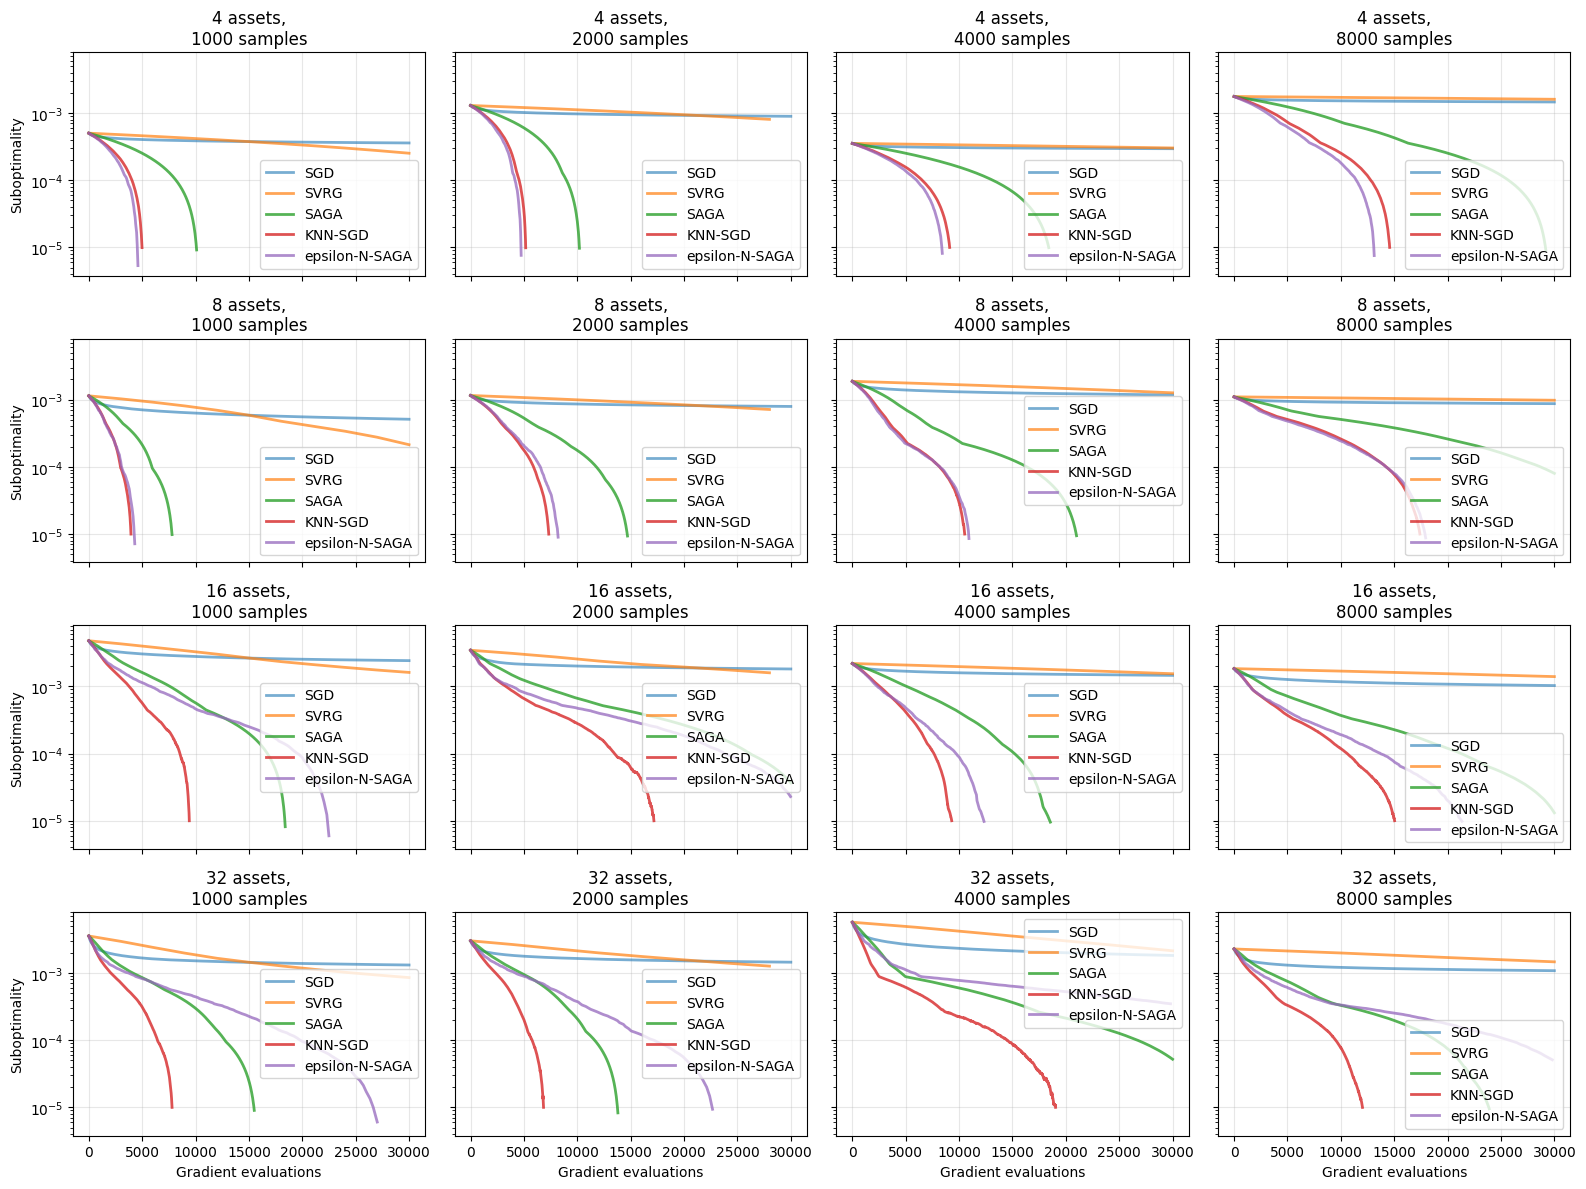

In [7]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

# your existing parameters
START_DATE = '2000-01-01'
END_DATE   = '2024-01-01'
N_BOOTSTRAP = 10
LAMBDA_RISK = 2.5
param_config = param_sets['moderate']  # or whichever you want to use

# the four universes you care about
universes = {
    4:  ["AAPL","GOOGL","JPM","XOM"],
    8:  ["AAPL","GOOGL","JPM","XOM",
         "AMZN","LLY","CAT","PG"],
    16: ["AAPL","GOOGL","JPM","XOM",
         "AMZN","LLY","CAT","PG",
         "MSFT","META","TSLA","JNJ",
         "BAC","UNP","KO","CVX"],
    32: ["AAPL","GOOGL","JPM","XOM",
         "AMZN","LLY","CAT","PG",
         "MSFT","META","TSLA","JNJ",
         "BAC","UNP","KO","CVX",
         "NVDA","NFLX","HD","UNH",
         "WFC","GS","BA","COST",
         "PEP","COP","LIN","NUE",
         "AMT","PLD","NEE","SO"]
    # 64: ["AAPL","GOOGL","JPM","XOM",
    #   "AMZN","LLY","CAT","PG",
    #   "MSFT","META","TSLA","JNJ",
    #   "BAC","UNP","KO","CVX",
    #   "NVDA","NFLX","HD","UNH",
    #   "WFC","GS","BA","COST",
    #   "PEP","COP","LIN","NUE",
    #   "AMT","PLD","NEE","SO",
    #   "AVGO","ORCL","CRM","AMD",
    #   "DIS","TMUS","VZ",
    #   "C","MS","AXP",
    #   "MRK","ABBV","PFE",
    #   "MCD","SBUX","LOW",
    #   "WMT","PM","CL",
    #   "SLB","EOG","PSX",
    #   "HON","UPS","GE",
    #   "APD","DOW","NEM",
    #   "SPG","EQIX",
    #   "DUK","EXC"]
}

param_sets = {
        'conservative': {
            'SGD': {'eta0': 0.01, 'gamma': 0.1, 'max_iter': 10000},
            'SVRG': {'eta': 0.001, 'm': T_SAMPLES, 'max_epochs': 30},
            'SAGA': {'eta': 0.001, 'max_iter': 10000}
        },
        'moderate': {
            'SGD': {'eta0': 0.1, 'gamma': 0.01, 'max_iter': 30000},
            'SVRG': {'eta': 0.01, 'm': T_SAMPLES, 'max_epochs': 30},
            'SAGA': {'eta': 0.02, 'max_iter': 30000},
            'epsilon_N_SAGA':{'eta': 0.05, 'max_iter': 30000, 'epsilon': 0.01, 'q': 20},
            'KNN-SGD': {'k': 10, 'buffer_size': 500, 'alpha': 0.3, 'lr': 0.04, 'max_iter': 30000}}
        ,
        'aggressive': {
            'SGD': {'eta0': 0.1, 'gamma': 0.01, 'max_iter': 10 * T_SAMPLES},
            'SVRG': {'eta': 0.01, 'm': T_SAMPLES, 'max_epochs': 10},
            'SAGA': {'eta': 0.05, 'max_iter': 10 * T_SAMPLES},
            'epsilon_N_SAGA':{'eta': 0.05, 'max_iter': 10 * T_SAMPLES, 'epsilon': 0.01, 'q': 20},
            'KNN-SGD': {'k': 20, 'buffer_size': 1000, 'alpha': 0.6, 'lr': 0.05, 'max_iter': 10 * T_SAMPLES}
        }
    }

param_config = param_sets['moderate']  # choose 'conservative' | 'moderate' | 'aggressive'


asset_list  = [4, 8, 16, 32]
sample_list = [1000, 2000, 4000, 8000]

# prepare the figure and axes
fig, axes = plt.subplots(
    nrows=len(asset_list),
    ncols=len(sample_list),
    figsize=(4*4, 3*4),
    sharex=True,
    sharey=True
)
axes = np.atleast_2d(axes)

for i, n_assets in enumerate(asset_list):
    TICKERS = universes[n_assets]
    optimizer = PortfolioOptimizer(n_assets=n_assets, lambda_risk=LAMBDA_RISK)
    runner    = ExperimentRunner(optimizer)

    for j, T_SAMPLES in enumerate(sample_list):
        ax = axes[i, j]

        # 1) Simulate bootstrap data
        simulator    = DataSimulator(TICKERS, START_DATE, END_DATE)
        replications = simulator.generate_bootstrap_replications(B=N_BOOTSTRAP, T=T_SAMPLES)
        data0        = replications[0]

        # 2) Compute deterministic optimum
        mu_hat    = data0.mean(axis=0)
        Sigma_hat = np.cov(data0.T)
        w_star    = optimizer.solve_deterministic(mu_hat, Sigma_hat)
        f_star    = optimizer.objective_function(w_star, mu_hat, Sigma_hat)

        # 3) Run experiment
        run_out = runner.run_single_experiment(
            data0,
            params     = param_config,
            target_obj = f_star,
            tol        = 1e-5
        )

        plot_suboptimality(
            TICKERS,
            run_out,
            max_grad_evals=30000,
            ax=ax           # ← pass your subplot here
        )


        # Titles & labels
        ax.set_title(f"{n_assets} assets,\n{T_SAMPLES} samples")
        if i == len(asset_list)-1:
            ax.set_xlabel("Gradient evaluations")
        if j == 0:
            ax.set_ylabel("Suboptimality")

plt.tight_layout()
plt.show()


[*********************100%***********************]  4 of 4 completed


SVRG settings: m=1000, epochs=10
SAGA stopping early at iteration 10100 due to optimality gap 9.13e-06 < tol 1.00e-05.
KNN-SGD stopping early at iteration 4004 due to optimality gap 9.90e-06 < tol 1.00e-05.


[*********************100%***********************]  4 of 4 completed


SVRG settings: m=1000, epochs=10
KNN-SGD stopping early at iteration 16861 due to optimality gap 9.99e-06 < tol 1.00e-05.


[*********************100%***********************]  4 of 4 completed


SVRG settings: m=1000, epochs=10
SAGA stopping early at iteration 18150 due to optimality gap 9.18e-06 < tol 1.00e-05.
KNN-SGD stopping early at iteration 7264 due to optimality gap 9.93e-06 < tol 1.00e-05.


[*********************100%***********************]  4 of 4 completed


SVRG settings: m=1000, epochs=10
KNN-SGD stopping early at iteration 14182 due to optimality gap 1.00e-05 < tol 1.00e-05.


[*********************100%***********************]  8 of 8 completed


SVRG settings: m=1000, epochs=10
KNN-SGD stopping early at iteration 12912 due to optimality gap 1.00e-05 < tol 1.00e-05.


[*********************100%***********************]  8 of 8 completed


SVRG settings: m=1000, epochs=10
KNN-SGD stopping early at iteration 15976 due to optimality gap 9.99e-06 < tol 1.00e-05.


[*********************100%***********************]  8 of 8 completed


SVRG settings: m=1000, epochs=10
SAGA stopping early at iteration 26500 due to optimality gap 9.76e-06 < tol 1.00e-05.
KNN-SGD stopping early at iteration 10565 due to optimality gap 1.00e-05 < tol 1.00e-05.


[*********************100%***********************]  8 of 8 completed


SVRG settings: m=1000, epochs=10
SAGA stopping early at iteration 11400 due to optimality gap 8.69e-06 < tol 1.00e-05.
KNN-SGD stopping early at iteration 4571 due to optimality gap 9.96e-06 < tol 1.00e-05.


[*********************100%***********************]  16 of 16 completed


SVRG settings: m=1000, epochs=10
KNN-SGD stopping early at iteration 17057 due to optimality gap 9.97e-06 < tol 1.00e-05.


[*********************100%***********************]  16 of 16 completed


SVRG settings: m=1000, epochs=10
KNN-SGD stopping early at iteration 13033 due to optimality gap 1.00e-05 < tol 1.00e-05.


[*********************100%***********************]  16 of 16 completed


SVRG settings: m=1000, epochs=10
SAGA stopping early at iteration 18050 due to optimality gap 9.58e-06 < tol 1.00e-05.
KNN-SGD stopping early at iteration 7314 due to optimality gap 9.95e-06 < tol 1.00e-05.


[*********************100%***********************]  16 of 16 completed


SVRG settings: m=1000, epochs=10
KNN-SGD stopping early at iteration 13521 due to optimality gap 9.99e-06 < tol 1.00e-05.


[*********************100%***********************]  32 of 32 completed


SVRG settings: m=1000, epochs=10
SAGA stopping early at iteration 10300 due to optimality gap 8.72e-06 < tol 1.00e-05.
KNN-SGD stopping early at iteration 4063 due to optimality gap 9.88e-06 < tol 1.00e-05.


[*********************100%***********************]  32 of 32 completed


SVRG settings: m=1000, epochs=10
SAGA stopping early at iteration 21750 due to optimality gap 8.32e-06 < tol 1.00e-05.
KNN-SGD stopping early at iteration 9115 due to optimality gap 9.93e-06 < tol 1.00e-05.


[*********************100%***********************]  32 of 32 completed


SVRG settings: m=1000, epochs=10
SAGA stopping early at iteration 27950 due to optimality gap 9.86e-06 < tol 1.00e-05.
KNN-SGD stopping early at iteration 10500 due to optimality gap 9.99e-06 < tol 1.00e-05.


[*********************100%***********************]  32 of 32 completed


SVRG settings: m=1000, epochs=10
SAGA stopping early at iteration 11000 due to optimality gap 9.92e-06 < tol 1.00e-05.
KNN-SGD stopping early at iteration 4337 due to optimality gap 9.85e-06 < tol 1.00e-05.


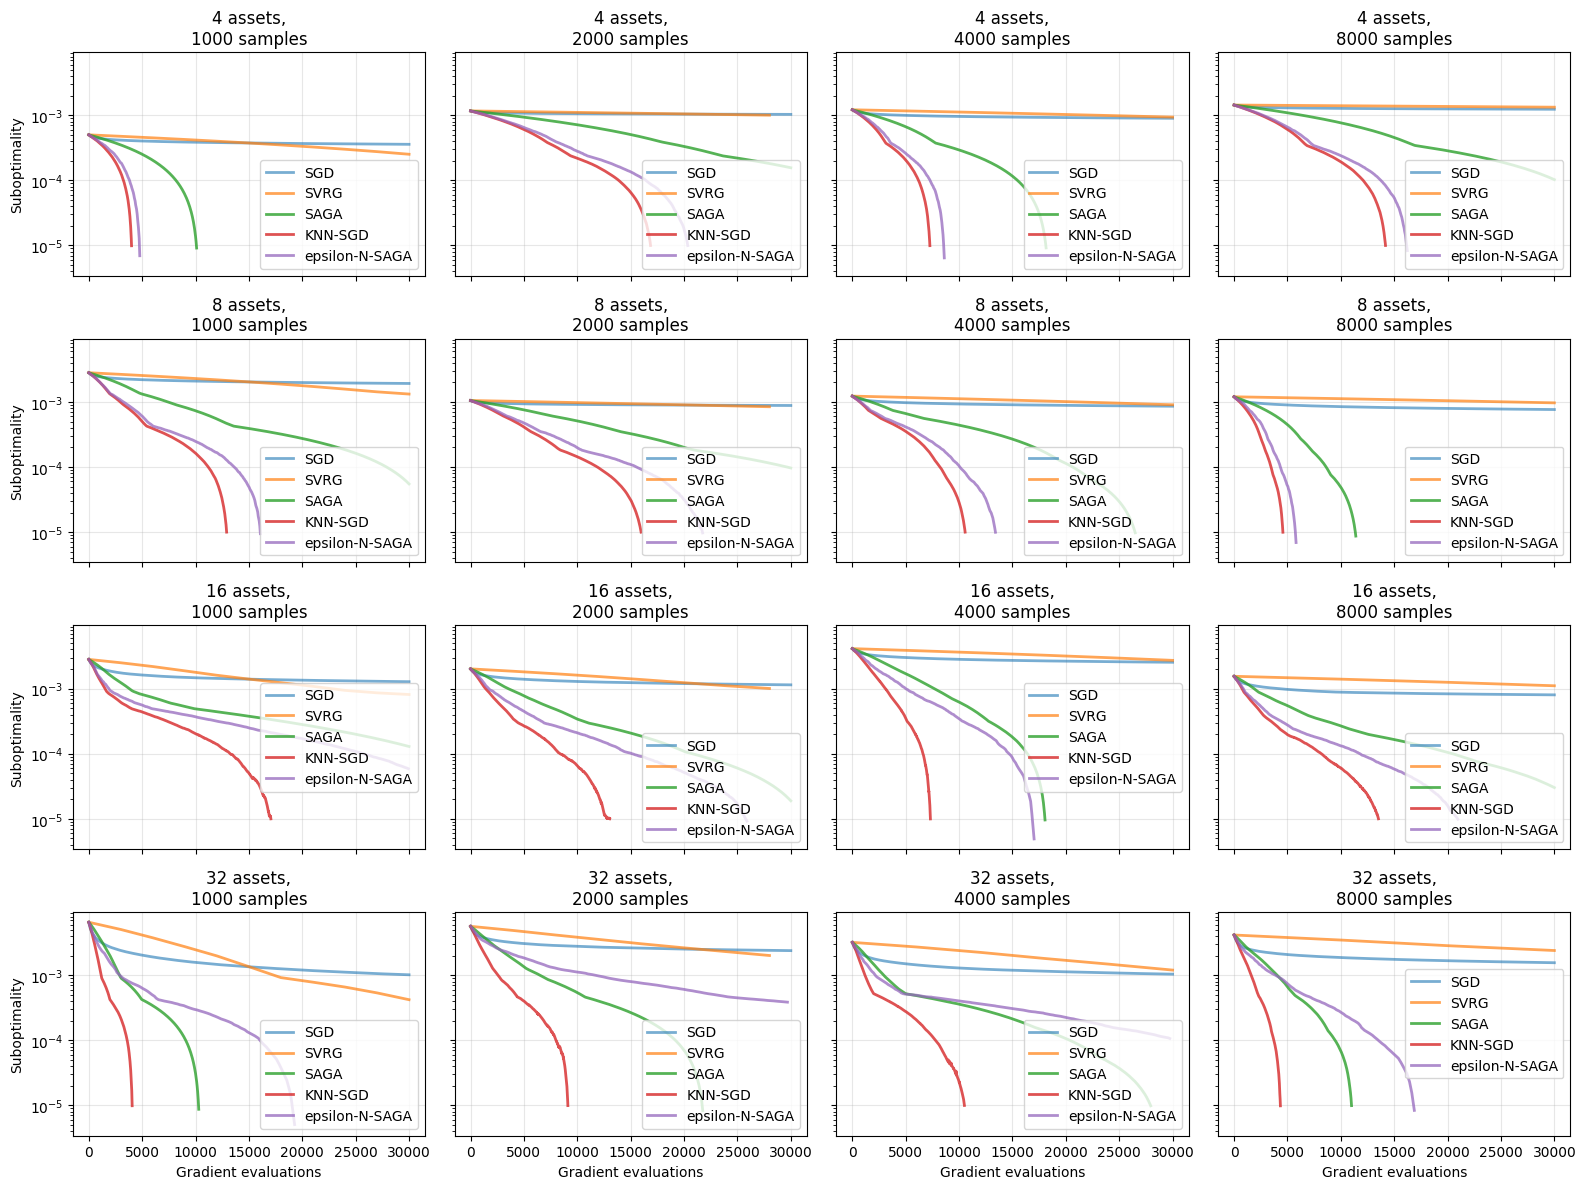

In [10]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

# your existing parameters
START_DATE = '2000-01-01'
END_DATE   = '2024-01-01'
N_BOOTSTRAP = 10
LAMBDA_RISK = 2.5
param_config = param_sets['moderate']  # or whichever you want to use

# the four universes you care about
universes = {
    4:  ["AAPL","GOOGL","JPM","XOM"],
    8:  ["AAPL","GOOGL","JPM","XOM",
         "AMZN","LLY","CAT","PG"],
    16: ["AAPL","GOOGL","JPM","XOM",
         "AMZN","LLY","CAT","PG",
         "MSFT","META","TSLA","JNJ",
         "BAC","UNP","KO","CVX"],
    32: ["AAPL","GOOGL","JPM","XOM",
         "AMZN","LLY","CAT","PG",
         "MSFT","META","TSLA","JNJ",
         "BAC","UNP","KO","CVX",
         "NVDA","NFLX","HD","UNH",
         "WFC","GS","BA","COST",
         "PEP","COP","LIN","NUE",
         "AMT","PLD","NEE","SO"]
    # 64: ["AAPL","GOOGL","JPM","XOM",
    #   "AMZN","LLY","CAT","PG",
    #   "MSFT","META","TSLA","JNJ",
    #   "BAC","UNP","KO","CVX",
    #   "NVDA","NFLX","HD","UNH",
    #   "WFC","GS","BA","COST",
    #   "PEP","COP","LIN","NUE",
    #   "AMT","PLD","NEE","SO",
    #   "AVGO","ORCL","CRM","AMD",
    #   "DIS","TMUS","VZ",
    #   "C","MS","AXP",
    #   "MRK","ABBV","PFE",
    #   "MCD","SBUX","LOW",
    #   "WMT","PM","CL",
    #   "SLB","EOG","PSX",
    #   "HON","UPS","GE",
    #   "APD","DOW","NEM",
    #   "SPG","EQIX",
    #   "DUK","EXC"]
}

param_sets = {
        'conservative': {
            'SGD': {'eta0': 0.01, 'gamma': 0.1, 'max_iter': 10000},
            'SVRG': {'eta': 0.001, 'm': T_SAMPLES, 'max_epochs': 30},
            'SAGA': {'eta': 0.001, 'max_iter': 10000}
        },
        'moderate': {
            'SGD': {'eta0': 0.1, 'gamma': 0.01, 'max_iter': 30000},
            'SVRG': {'eta': 0.01, 'm': T_SAMPLES, 'max_epochs': 10},
            'SAGA': {'eta': 0.02, 'max_iter': 30000},
            'epsilon_N_SAGA':{'eta': 0.05, 'max_iter': 30000, 'epsilon': 0.01, 'q': 20},
            'KNN-SGD': {'k': 20, 'buffer_size': 500, 'alpha': 0.3, 'lr': 0.05, 'max_iter': 30000}}
        ,
        'aggressive': {
            'SGD': {'eta0': 0.1, 'gamma': 0.01, 'max_iter': 10 * T_SAMPLES},
            'SVRG': {'eta': 0.01, 'm': T_SAMPLES, 'max_epochs': 10},
            'SAGA': {'eta': 0.05, 'max_iter': 10 * T_SAMPLES},
            'epsilon_N_SAGA':{'eta': 0.05, 'max_iter': 10 * T_SAMPLES, 'epsilon': 0.01, 'q': 20},
            'KNN-SGD': {'k': 20, 'buffer_size': 1000, 'alpha': 0.6, 'lr': 0.05, 'max_iter': 10 * T_SAMPLES}
        }
    }

param_config = param_sets['moderate']  # choose 'conservative' | 'moderate' | 'aggressive'


asset_list  = [4, 8, 16, 32]
sample_list = [1000, 2000, 4000, 8000]

# prepare the figure and axes
fig, axes = plt.subplots(
    nrows=len(asset_list),
    ncols=len(sample_list),
    figsize=(4*4, 3*4),
    sharex=True,
    sharey=True
)
axes = np.atleast_2d(axes)

for i, n_assets in enumerate(asset_list):
    TICKERS = universes[n_assets]
    optimizer = PortfolioOptimizer(n_assets=n_assets, lambda_risk=LAMBDA_RISK)
    runner    = ExperimentRunner(optimizer)

    for j, T_SAMPLES in enumerate(sample_list):
        ax = axes[i, j]

        # 1) Simulate bootstrap data
        simulator    = DataSimulator(TICKERS, START_DATE, END_DATE)
        replications = simulator.generate_bootstrap_replications(B=N_BOOTSTRAP, T=T_SAMPLES)
        data0        = replications[0]

        # 2) Compute deterministic optimum
        mu_hat    = data0.mean(axis=0)
        Sigma_hat = np.cov(data0.T)
        w_star    = optimizer.solve_deterministic(mu_hat, Sigma_hat)
        f_star    = optimizer.objective_function(w_star, mu_hat, Sigma_hat)

        # 3) Run experiment
        run_out = runner.run_single_experiment(
            data0,
            params     = param_config,
            target_obj = f_star,
            tol        = 1e-5
        )

        plot_suboptimality(
            TICKERS,
            run_out,
            max_grad_evals=30000,
            ax=ax           # ← pass your subplot here
        )


        # Titles & labels
        ax.set_title(f"{n_assets} assets,\n{T_SAMPLES} samples")
        if i == len(asset_list)-1:
            ax.set_xlabel("Gradient evaluations")
        if j == 0:
            ax.set_ylabel("Suboptimality")

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

# your existing parameters
START_DATE = '2000-01-01'
END_DATE   = '2024-01-01'
N_BOOTSTRAP = 10
LAMBDA_RISK = 2.5
param_config = param_sets['moderate']  # or whichever you want to use

# the four universes you care about
universes = {
    4:  ["AAPL","GOOGL","JPM","XOM"],
    8:  ["AAPL","GOOGL","JPM","XOM",
         "AMZN","LLY","CAT","PG"],
    16: ["AAPL","GOOGL","JPM","XOM",
         "AMZN","LLY","CAT","PG",
         "MSFT","META","TSLA","JNJ",
         "BAC","UNP","KO","CVX"],
    32: ["AAPL","GOOGL","JPM","XOM",
         "AMZN","LLY","CAT","PG",
         "MSFT","META","TSLA","JNJ",
         "BAC","UNP","KO","CVX",
         "NVDA","NFLX","HD","UNH",
         "WFC","GS","BA","COST",
         "PEP","COP","LIN","NUE",
         "AMT","PLD","NEE","SO"]
    # 64: ["AAPL","GOOGL","JPM","XOM",
    #   "AMZN","LLY","CAT","PG",
    #   "MSFT","META","TSLA","JNJ",
    #   "BAC","UNP","KO","CVX",
    #   "NVDA","NFLX","HD","UNH",
    #   "WFC","GS","BA","COST",
    #   "PEP","COP","LIN","NUE",
    #   "AMT","PLD","NEE","SO",
    #   "AVGO","ORCL","CRM","AMD",
    #   "DIS","TMUS","VZ",
    #   "C","MS","AXP",
    #   "MRK","ABBV","PFE",
    #   "MCD","SBUX","LOW",
    #   "WMT","PM","CL",
    #   "SLB","EOG","PSX",
    #   "HON","UPS","GE",
    #   "APD","DOW","NEM",
    #   "SPG","EQIX",
    #   "DUK","EXC"]
}

param_sets = {
        'conservative': {
            'SGD': {'eta0': 0.01, 'gamma': 0.1, 'max_iter': 10000},
            'SVRG': {'eta': 0.001, 'm': T_SAMPLES, 'max_epochs': 30},
            'SAGA': {'eta': 0.001, 'max_iter': 10000}
        },
        'moderate': {
            'SGD': {'eta0': 0.1, 'gamma': 0.01, 'max_iter': 30000},
            'SVRG': {'eta': 0.01, 'm': T_SAMPLES, 'max_epochs': 10},
            'SAGA': {'eta': 0.02, 'max_iter': 30000},
            'epsilon_N_SAGA':{'eta': 0.05, 'max_iter': 30000, 'epsilon': 0.01, 'q': 20},
            'KNN-SGD': {'k': 20, 'buffer_size': 500, 'alpha': 0.3, 'lr': 0.05, 'max_iter': 30000}}
        ,
        'aggressive': {
            'SGD': {'eta0': 0.1, 'gamma': 0.01, 'max_iter': 10 * T_SAMPLES},
            'SVRG': {'eta': 0.01, 'm': T_SAMPLES, 'max_epochs': 10},
            'SAGA': {'eta': 0.05, 'max_iter': 10 * T_SAMPLES},
            'epsilon_N_SAGA':{'eta': 0.05, 'max_iter': 10 * T_SAMPLES, 'epsilon': 0.01, 'q': 20},
            'KNN-SGD': {'k': 20, 'buffer_size': 1000, 'alpha': 0.6, 'lr': 0.05, 'max_iter': 10 * T_SAMPLES}
        }
    }

param_config = param_sets['moderate']  # choose 'conservative' | 'moderate' | 'aggressive'


asset_list  = [4, 8, 16, 32]
sample_list = [1000, 2000, 4000, 8000]

# prepare the figure and axes
fig, axes = plt.subplots(
    nrows=len(asset_list),
    ncols=len(sample_list),
    figsize=(4*4, 3*4),
    sharex=True,
    sharey=True
)
axes = np.atleast_2d(axes)

for i, n_assets in enumerate(asset_list):
    TICKERS = universes[n_assets]
    optimizer = PortfolioOptimizer(n_assets=n_assets, lambda_risk=LAMBDA_RISK)
    runner    = ExperimentRunner(optimizer)

    for j, T_SAMPLES in enumerate(sample_list):
        ax = axes[i, j]

        # 1) Simulate bootstrap data
        simulator    = DataSimulator(TICKERS, START_DATE, END_DATE)
        replications = simulator.generate_bootstrap_replications(B=N_BOOTSTRAP, T=T_SAMPLES)
        data0        = replications[0]

        # 2) Compute deterministic optimum
        mu_hat    = data0.mean(axis=0)
        Sigma_hat = np.cov(data0.T)
        w_star    = optimizer.solve_deterministic(mu_hat, Sigma_hat)
        f_star    = optimizer.objective_function(w_star, mu_hat, Sigma_hat)

        # 3) Run experiment
        run_out = runner.run_single_experiment(
            data0,
            params     = param_config,
            target_obj = f_star,
            tol        = 1e-5
        )

        plot_suboptimality(
            TICKERS,
            run_out,
            max_grad_evals=30000,
            ax=ax           # ← pass your subplot here
        )


        # Titles & labels
        ax.set_title(f"{n_assets} assets,\n{T_SAMPLES} samples")
        if i == len(asset_list)-1:
            ax.set_xlabel("Gradient evaluations")
        if j == 0:
            ax.set_ylabel("Suboptimality")

plt.tight_layout()
plt.show()

# ------------ averaging helper ------------
def average_over_replications(runner,
                              data_reps,
                              f_star,
                              param_config,
                              max_grad=30000,
                              n_points=200):
    """
    Runs each algorithm on every bootstrap replication in `data_reps`,
    interpolates onto a common gradient‐eval grid, and returns
    avg & std‐dev curves: { algo: (grid, mean_gap, std_gap) }.
    """
    grid = np.linspace(0, max_grad, n_points)
    per_algo = {}

    for rep_data in data_reps:
        out = runner.run_single_experiment(
            rep_data,
            params     = param_config,
            target_obj = f_star,
            tol        = 1e-5
        )
        for algo, res in out.items():
            if algo in ("ground_truth","T"): continue
            gevals = np.array(res["history"]["grad_evals"])
            objs   = np.array(res["history"]["objective"])
            gap    = np.abs(objs - f_star)

            mask   = gevals <= max_grad
            interp = interp1d(
                gevals[mask], gap[mask],
                kind='linear',
                bounds_error=False,
                fill_value=(gap[mask][0], gap[mask][-1])
            )
            per_algo.setdefault(algo, []).append(interp(grid))

    avg_curves = {}
    for algo, gaps in per_algo.items():
        arr       = np.vstack(gaps)      # shape (B, n_points)
        mean_gap  = arr.mean(axis=0)
        std_gap   = arr.std(axis=0)
        avg_curves[algo] = (grid, mean_gap, std_gap)

    return avg_curves

# ------------ plot grid of averaged curves ------------
fig, axes = plt.subplots(
    nrows=len(asset_list),
    ncols=len(sample_list),
    figsize=(16, 12),
    sharex=True,
    sharey=True
)

for i, n_assets in enumerate(asset_list):
    tickers = universes[n_assets]
    optimizer = PortfolioOptimizer(n_assets, LAMBDA_RISK)
    runner    = ExperimentRunner(optimizer)

    for j, T_SAMPLES in enumerate(sample_list):
        ax = axes[i, j]

        # simulate B bootstrap reps of length T_SAMPLES
        data_reps = DataSimulator(tickers, START_DATE, END_DATE) \
                       .generate_bootstrap_replications(B=N_BOOTSTRAP, T=T_SAMPLES)

        # compute f* on the first rep
        mu0     = data_reps[0].mean(axis=0)
        Sigma0  = np.cov(data_reps[0].T)
        w_star  = optimizer.solve_deterministic(mu0, Sigma0)
        f_star  = optimizer.objective_function(w_star, mu0, Sigma0)

        # build fresh params for this (n_assets,T_SAMPLES)
        params = make_param_config(n_assets, T_SAMPLES, Sigma0, regime="moderate")

        # run & average
        avg_curves = average_over_replications(runner, data_reps, f_star, params)

        # plot mean ± std
        for algo, (grid, mean_gap, std_gap) in avg_curves.items():
            ax.semilogy(grid, mean_gap, label=algo.replace("_","-"))
            ax.fill_between(grid, mean_gap-std_gap, mean_gap+std_gap, alpha=0.2)

        ax.set_title(f"{n_assets} assets\n{T_SAMPLES} samples")
        if i == len(asset_list)-1: ax.set_xlabel("Gradient evals")
        if j == 0:                  ax.set_ylabel("Optimality gap")

# shared legend
handles, labels = axes[0,-1].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right', ncol=1, framealpha=0.7)

plt.tight_layout()
plt.show()

[*********************100%***********************]  4 of 4 completed


SVRG settings: m=8000, epochs=30
SAGA stopping early at iteration 10100 due to optimality gap 9.19e-06 < tol 1.00e-05.
KNN-SGD stopping early at iteration 10089 due to optimality gap 9.99e-06 < tol 1.00e-05.


[*********************100%***********************]  4 of 4 completed


SVRG settings: m=8000, epochs=30
SVRG stopping early at end of epoch 3 due to optimality gap 6.22e-06 < tol 1.00e-05.
SAGA stopping early at iteration 11200 due to optimality gap 7.04e-06 < tol 1.00e-05.
KNN-SGD stopping early at iteration 11144 due to optimality gap 9.98e-06 < tol 1.00e-05.


[*********************100%***********************]  4 of 4 completed


SVRG settings: m=8000, epochs=30
SAGA stopping early at iteration 10100 due to optimality gap 6.99e-06 < tol 1.00e-05.
KNN-SGD stopping early at iteration 10061 due to optimality gap 9.95e-06 < tol 1.00e-05.


[*********************100%***********************]  4 of 4 completed


SVRG settings: m=8000, epochs=30
SVRG stopping early at end of epoch 7 due to optimality gap 0.00e+00 < tol 1.00e-05.
SAGA stopping early at iteration 27300 due to optimality gap 9.75e-06 < tol 1.00e-05.
KNN-SGD stopping early at iteration 27283 due to optimality gap 9.98e-06 < tol 1.00e-05.


[*********************100%***********************]  8 of 8 completed


SVRG settings: m=8000, epochs=30
SVRG stopping early at end of epoch 11 due to optimality gap 2.61e-06 < tol 1.00e-05.


[*********************100%***********************]  8 of 8 completed


SVRG settings: m=8000, epochs=30
SVRG stopping early at end of epoch 6 due to optimality gap 4.98e-06 < tol 1.00e-05.
SAGA stopping early at iteration 23700 due to optimality gap 1.00e-05 < tol 1.00e-05.
KNN-SGD stopping early at iteration 23786 due to optimality gap 9.99e-06 < tol 1.00e-05.


[*********************100%***********************]  8 of 8 completed


SVRG settings: m=8000, epochs=30
SAGA stopping early at iteration 10100 due to optimality gap 9.83e-06 < tol 1.00e-05.
KNN-SGD stopping early at iteration 10080 due to optimality gap 9.98e-06 < tol 1.00e-05.


[*********************100%***********************]  8 of 8 completed


SVRG settings: m=8000, epochs=30
SAGA stopping early at iteration 10950 due to optimality gap 8.98e-06 < tol 1.00e-05.
KNN-SGD stopping early at iteration 10892 due to optimality gap 1.00e-05 < tol 1.00e-05.


[*********************100%***********************]  16 of 16 completed


SVRG settings: m=8000, epochs=30
SVRG stopping early at end of epoch 11 due to optimality gap 8.67e-19 < tol 1.00e-05.


[*********************100%***********************]  16 of 16 completed


SVRG settings: m=8000, epochs=30
SVRG stopping early at end of epoch 4 due to optimality gap 2.60e-18 < tol 1.00e-05.
SAGA stopping early at iteration 12250 due to optimality gap 6.96e-06 < tol 1.00e-05.
KNN-SGD stopping early at iteration 12268 due to optimality gap 9.88e-06 < tol 1.00e-05.


[*********************100%***********************]  16 of 16 completed


SVRG settings: m=8000, epochs=30
SVRG stopping early at end of epoch 8 due to optimality gap 6.34e-06 < tol 1.00e-05.
SAGA stopping early at iteration 28800 due to optimality gap 9.93e-06 < tol 1.00e-05.
KNN-SGD stopping early at iteration 28932 due to optimality gap 1.00e-05 < tol 1.00e-05.


[*********************100%***********************]  16 of 16 completed


SVRG settings: m=8000, epochs=30
SAGA stopping early at iteration 24800 due to optimality gap 9.77e-06 < tol 1.00e-05.
KNN-SGD stopping early at iteration 24802 due to optimality gap 9.99e-06 < tol 1.00e-05.


[*********************100%***********************]  32 of 32 completed


SVRG settings: m=8000, epochs=30
SVRG stopping early at end of epoch 5 due to optimality gap 0.00e+00 < tol 1.00e-05.
SAGA stopping early at iteration 18200 due to optimality gap 9.87e-06 < tol 1.00e-05.
KNN-SGD stopping early at iteration 18251 due to optimality gap 9.99e-06 < tol 1.00e-05.


[*********************100%***********************]  32 of 32 completed


SVRG settings: m=8000, epochs=30
SVRG stopping early at end of epoch 4 due to optimality gap 4.39e-06 < tol 1.00e-05.
SAGA stopping early at iteration 14500 due to optimality gap 9.58e-06 < tol 1.00e-05.
KNN-SGD stopping early at iteration 14496 due to optimality gap 1.00e-05 < tol 1.00e-05.


[*********************100%***********************]  32 of 32 completed


SVRG settings: m=8000, epochs=30
SAGA stopping early at iteration 5250 due to optimality gap 3.92e-06 < tol 1.00e-05.
KNN-SGD stopping early at iteration 5206 due to optimality gap 9.90e-06 < tol 1.00e-05.


[*********************100%***********************]  32 of 32 completed


SVRG settings: m=8000, epochs=30
SAGA stopping early at iteration 9450 due to optimality gap 7.67e-06 < tol 1.00e-05.
KNN-SGD stopping early at iteration 9427 due to optimality gap 9.97e-06 < tol 1.00e-05.


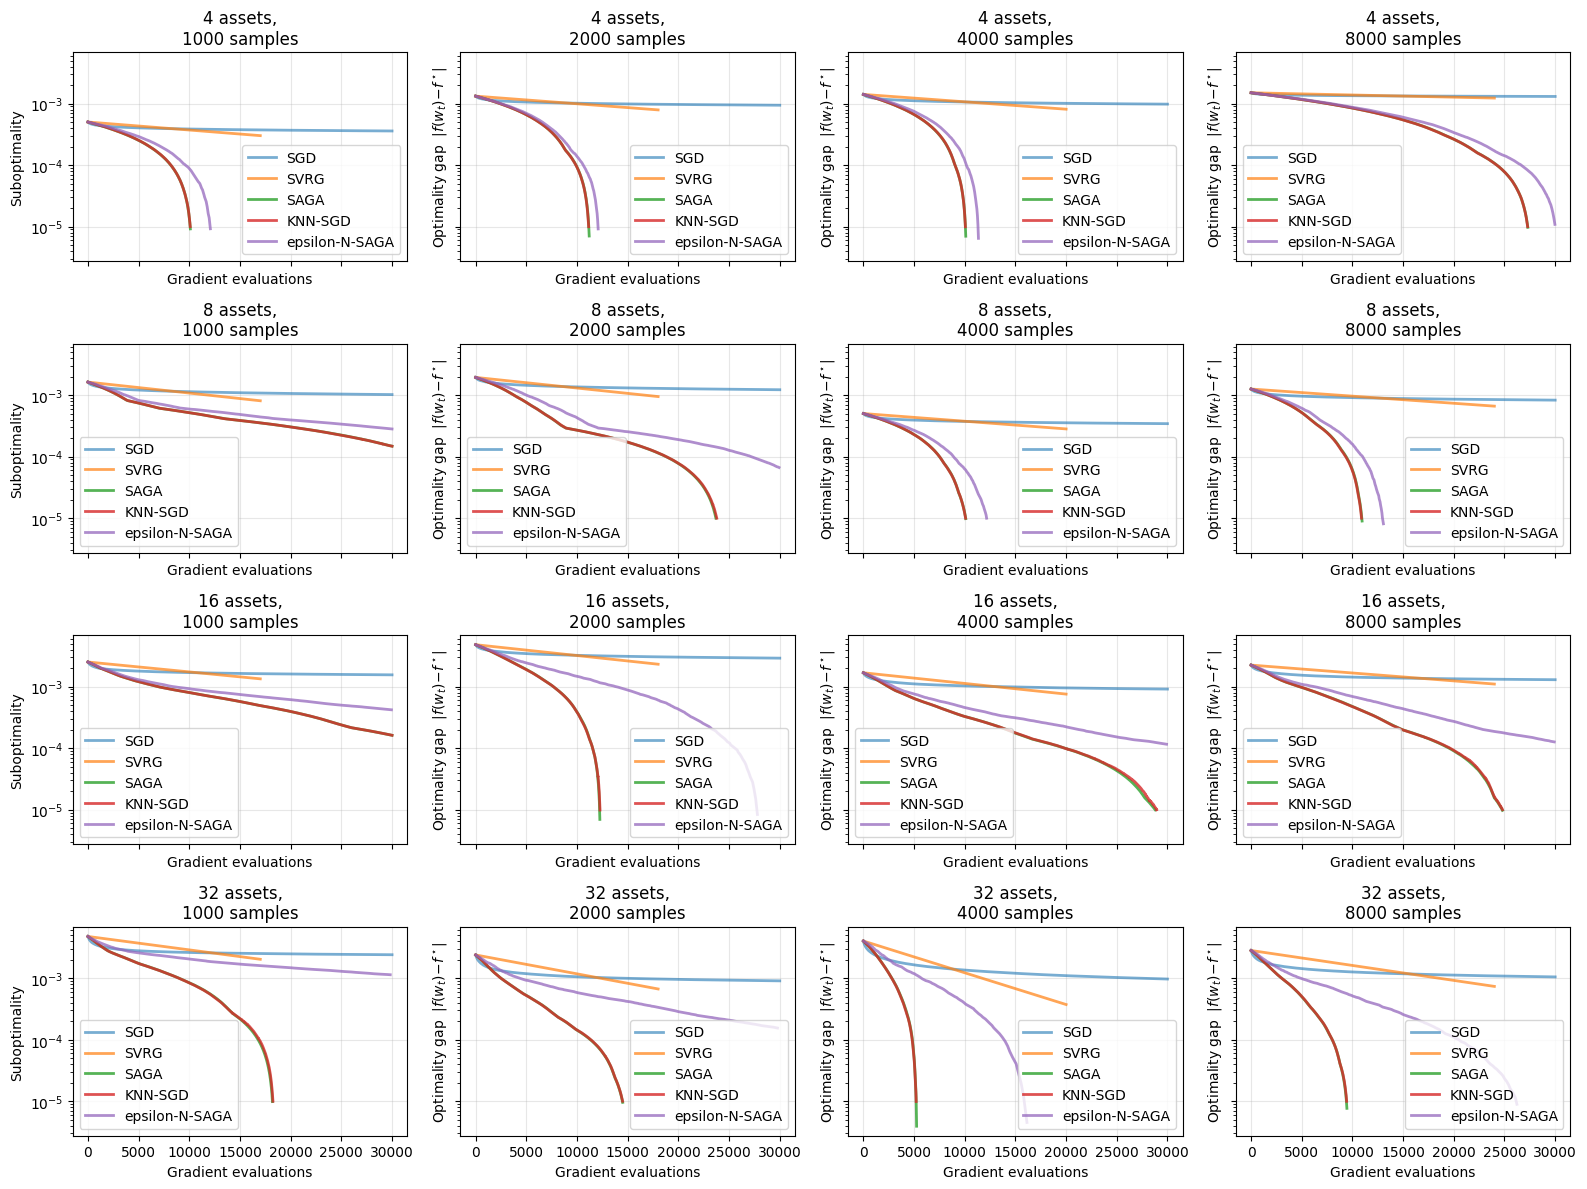

In [87]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

# your existing parameters
START_DATE = '2000-01-01'
END_DATE   = '2024-01-01'
N_BOOTSTRAP = 10
LAMBDA_RISK = 2.5
param_config = param_sets['moderate']  # or whichever you want to use

# the four universes you care about
universes = {
    4:  ["AAPL","GOOGL","JPM","XOM"],
    8:  ["AAPL","GOOGL","JPM","XOM",
         "AMZN","LLY","CAT","PG"],
    16: ["AAPL","GOOGL","JPM","XOM",
         "AMZN","LLY","CAT","PG",
         "MSFT","META","TSLA","JNJ",
         "BAC","UNP","KO","CVX"],
    32: ["AAPL","GOOGL","JPM","XOM",
         "AMZN","LLY","CAT","PG",
         "MSFT","META","TSLA","JNJ",
         "BAC","UNP","KO","CVX",
         "NVDA","NFLX","HD","UNH",
         "WFC","GS","BA","COST",
         "PEP","COP","LIN","NUE",
         "AMT","PLD","NEE","SO"]
    # 64: ["AAPL","GOOGL","JPM","XOM",
    #   "AMZN","LLY","CAT","PG",
    #   "MSFT","META","TSLA","JNJ",
    #   "BAC","UNP","KO","CVX",
    #   "NVDA","NFLX","HD","UNH",
    #   "WFC","GS","BA","COST",
    #   "PEP","COP","LIN","NUE",
    #   "AMT","PLD","NEE","SO",
    #   "AVGO","ORCL","CRM","AMD",
    #   "DIS","TMUS","VZ",
    #   "C","MS","AXP",
    #   "MRK","ABBV","PFE",
    #   "MCD","SBUX","LOW",
    #   "WMT","PM","CL",
    #   "SLB","EOG","PSX",
    #   "HON","UPS","GE",
    #   "APD","DOW","NEM",
    #   "SPG","EQIX",
    #   "DUK","EXC"]
}

param_sets = {
        'conservative': {
            'SGD': {'eta0': 0.01, 'gamma': 0.1, 'max_iter': 10000},
            'SVRG': {'eta': 0.001, 'm': T_SAMPLES, 'max_epochs': 30},
            'SAGA': {'eta': 0.001, 'max_iter': 10000}
        },
        'moderate': {
            'SGD': {'eta0': 0.1, 'gamma': 0.01, 'max_iter': 30000},
            'SVRG': {'eta': 0.01, 'm': T_SAMPLES, 'max_epochs': 30},
            'SAGA': {'eta': 0.02, 'max_iter': 30000},
            'epsilon_N_SAGA':{'eta': 0.02, 'max_iter': 30000, 'epsilon': 0.01, 'q': 20},
            'KNN-SGD': {'k': 100, 'buffer_size': 500, 'alpha': 0.3, 'lr': 0.02, 'max_iter': 30000}}
        ,
        'aggressive': {
            'SGD': {'eta0': 0.1, 'gamma': 0.01, 'max_iter': 10 * T_SAMPLES},
            'SVRG': {'eta': 0.01, 'm': T_SAMPLES, 'max_epochs': 10},
            'SAGA': {'eta': 0.05, 'max_iter': 10 * T_SAMPLES},
            'epsilon_N_SAGA':{'eta': 0.05, 'max_iter': 10 * T_SAMPLES, 'epsilon': 0.05, 'q': 20},
            'KNN-SGD': {'k': 20, 'buffer_size': 1000, 'alpha': 0.6, 'lr': 0.05, 'max_iter': 10 * T_SAMPLES}
        }
    }

param_config = param_sets['moderate']  # choose 'conservative' | 'moderate' | 'aggressive'


asset_list  = [4, 8, 16, 32]
sample_list = [1000, 2000, 4000, 8000]

# prepare the figure and axes
fig, axes = plt.subplots(
    nrows=len(asset_list),
    ncols=len(sample_list),
    figsize=(4*4, 3*4),
    sharex=True,
    sharey=True
)
axes = np.atleast_2d(axes)

for i, n_assets in enumerate(asset_list):
    TICKERS = universes[n_assets]
    optimizer = PortfolioOptimizer(n_assets=n_assets, lambda_risk=LAMBDA_RISK)
    runner    = ExperimentRunner(optimizer)

    for j, T_SAMPLES in enumerate(sample_list):
        ax = axes[i, j]

        # 1) Simulate bootstrap data
        simulator    = DataSimulator(TICKERS, START_DATE, END_DATE)
        replications = simulator.generate_bootstrap_replications(B=N_BOOTSTRAP, T=T_SAMPLES)
        data0        = replications[0]

        # 2) Compute deterministic optimum
        mu_hat    = data0.mean(axis=0)
        Sigma_hat = np.cov(data0.T)
        w_star    = optimizer.solve_deterministic(mu_hat, Sigma_hat)
        f_star    = optimizer.objective_function(w_star, mu_hat, Sigma_hat)

        # 3) Run experiment
        run_out = runner.run_single_experiment(
            data0,
            params     = param_config,
            target_obj = f_star,
            tol        = 1e-5
        )

        plot_suboptimality(
            TICKERS,
            run_out,
            max_grad_evals=30000,
            ax=ax           # ← pass your subplot here
        )


        # Titles & labels
        ax.set_title(f"{n_assets} assets,\n{T_SAMPLES} samples")
        if i == len(asset_list)-1:
            ax.set_xlabel("Gradient evaluations")
        if j == 0:
            ax.set_ylabel("Suboptimality")

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# reproducibility
np.random.seed(42)

# ------------ your static parameters ------------
START_DATE  = '2000-01-01'
END_DATE    = '2024-01-01'
N_BOOTSTRAP = 10
LAMBDA_RISK = 2.5

# the four universes
universes = {
    4:  ["AAPL","GOOGL","JPM","XOM"],
    8:  ["AAPL","GOOGL","JPM","XOM","AMZN","LLY","CAT","PG"],
    16: ["AAPL","GOOGL","JPM","XOM","AMZN","LLY","CAT","PG",
         "MSFT","META","TSLA","JNJ","BAC","UNP","KO","CVX"],
    32: ["AAPL","GOOGL","JPM","XOM","AMZN","LLY","CAT","PG",
         "MSFT","META","TSLA","JNJ","BAC","UNP","KO","CVX",
         "NVDA","NFLX","HD","UNH","WFC","GS","BA","COST",
         "PEP","COP","LIN","NUE","AMT","PLD","NEE","SO"]
}

asset_list  = [4, 8, 16, 32]
sample_list = [1000, 2000, 4000, 8000]

# ------------ adaptive parameter factory ------------
def make_param_config(n_assets: int,
                      T_samples: int,
                      Sigma_hat: np.ndarray,
                      regime: str = "moderate"):
    """
    Automatically choose step-sizes & epochs based on spectrum of Sigma_hat,
    dimension n_assets and sample size T_samples.
    """
    L = np.linalg.norm(Sigma_hat, 2)  # spectral norm = smoothness

    # tune aggressiveness
    if regime == "conservative":
        c_lr, c_it = 0.5, 0.5
    elif regime == "aggressive":
        c_lr, c_it = 2.0, 2.0
    else:  # moderate
        c_lr, c_it = 1.0, 1.0

    eta_sgd = c_lr * (1.0 / (L * np.sqrt(T_samples)))
    eta_vr  = c_lr * (1.0 / L)

    iters_sgd  = int(c_it * 5 * T_samples)         # ~5 epochs
    epochs_vr  = max(1, int(c_it * 2 * np.log(T_samples)))
    max_iter_vr = epochs_vr * T_samples

    return {
        'SGD':   {'eta0': eta_sgd,     'gamma': eta_sgd*0.1, 'max_iter': iters_sgd},
        'SVRG':  {'eta': eta_vr,       'm': T_samples,       'max_epochs': epochs_vr},
        'SAGA':  {'eta': eta_vr*0.5,   'max_iter': iters_sgd},
        'epsilon_N_SAGA': {
            'eta': eta_vr*0.5,
            'max_iter': iters_sgd,
            'epsilon': 0.01,
            'q': max(10, n_assets//2)
        },
        'KNN-SGD': {
            'k': max(5, n_assets//2),
            'buffer_size': min(2000, 5*n_assets),
            'alpha': 0.5,
            'lr': eta_sgd*2,
            'max_iter': iters_sgd
        }
    }

# ------------ averaging helper ------------
def average_over_replications(runner,
                              data_reps,
                              f_star,
                              param_config,
                              max_grad=30000,
                              n_points=200):
    """
    Runs each algorithm on every bootstrap replication in `data_reps`,
    interpolates onto a common gradient‐eval grid, and returns
    avg & std‐dev curves: { algo: (grid, mean_gap, std_gap) }.
    """
    grid = np.linspace(0, max_grad, n_points)
    per_algo = {}

    for rep_data in data_reps:
        out = runner.run_single_experiment(
            rep_data,
            params     = param_config,
            target_obj = f_star,
            tol        = 1e-5
        )
        for algo, res in out.items():
            if algo in ("ground_truth","T"): continue
            gevals = np.array(res["history"]["grad_evals"])
            objs   = np.array(res["history"]["objective"])
            gap    = np.abs(objs - f_star)

            mask   = gevals <= max_grad
            interp = interp1d(
                gevals[mask], gap[mask],
                kind='linear',
                bounds_error=False,
                fill_value=(gap[mask][0], gap[mask][-1])
            )
            per_algo.setdefault(algo, []).append(interp(grid))

    avg_curves = {}
    for algo, gaps in per_algo.items():
        arr       = np.vstack(gaps)      # shape (B, n_points)
        mean_gap  = arr.mean(axis=0)
        std_gap   = arr.std(axis=0)
        avg_curves[algo] = (grid, mean_gap, std_gap)

    return avg_curves

# ------------ plot grid of averaged curves ------------
fig, axes = plt.subplots(
    nrows=len(asset_list),
    ncols=len(sample_list),
    figsize=(16, 12),
    sharex=True,
    sharey=True
)

for i, n_assets in enumerate(asset_list):
    tickers = universes[n_assets]
    optimizer = PortfolioOptimizer(n_assets, LAMBDA_RISK)
    runner    = ExperimentRunner(optimizer)

    for j, T_SAMPLES in enumerate(sample_list):
        ax = axes[i, j]

        # simulate B bootstrap reps of length T_SAMPLES
        data_reps = DataSimulator(tickers, START_DATE, END_DATE) \
                       .generate_bootstrap_replications(B=N_BOOTSTRAP, T=T_SAMPLES)

        # compute f* on the first rep
        mu0     = data_reps[0].mean(axis=0)
        Sigma0  = np.cov(data_reps[0].T)
        w_star  = optimizer.solve_deterministic(mu0, Sigma0)
        f_star  = optimizer.objective_function(w_star, mu0, Sigma0)

        # build fresh params for this (n_assets,T_SAMPLES)
        params = make_param_config(n_assets, T_SAMPLES, Sigma0, regime="moderate")

        # run & average
        avg_curves = average_over_replications(runner, data_reps, f_star, params)

        # plot mean ± std
        for algo, (grid, mean_gap, std_gap) in avg_curves.items():
            ax.semilogy(grid, mean_gap, label=algo.replace("_","-"))
            ax.fill_between(grid, mean_gap-std_gap, mean_gap+std_gap, alpha=0.2)

        ax.set_title(f"{n_assets} assets\n{T_SAMPLES} samples")
        if i == len(asset_list)-1: ax.set_xlabel("Gradient evals")
        if j == 0:                  ax.set_ylabel("Optimality gap")

# shared legend
handles, labels = axes[0,-1].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right', ncol=1, framealpha=0.7)

plt.tight_layout()
plt.show()


[*********************100%***********************]  4 of 4 completed


SVRG settings: m=1000, epochs=13
KNN-SGD stopping early at iteration 913 due to optimality gap 1.54e-06 < tol 1.00e-05.
SVRG settings: m=1000, epochs=13
SVRG settings: m=1000, epochs=13
SAGA stopping early at iteration 1600 due to optimality gap 7.29e-06 < tol 1.00e-05.
KNN-SGD stopping early at iteration 15 due to optimality gap 3.11e-06 < tol 1.00e-05.
SVRG settings: m=1000, epochs=13
SVRG settings: m=1000, epochs=13
SVRG settings: m=1000, epochs=13
SVRG settings: m=1000, epochs=13
KNN-SGD stopping early at iteration 104 due to optimality gap 3.84e-06 < tol 1.00e-05.
SVRG settings: m=1000, epochs=13
SVRG settings: m=1000, epochs=13
KNN-SGD stopping early at iteration 4 due to optimality gap 2.85e-06 < tol 1.00e-05.
SVRG settings: m=1000, epochs=13
KNN-SGD stopping early at iteration 1150 due to optimality gap 4.97e-06 < tol 1.00e-05.


[*********************100%***********************]  4 of 4 completed


SVRG settings: m=2000, epochs=15
SVRG stopping early at end of epoch 1 due to optimality gap 0.00e+00 < tol 1.00e-05.
SAGA stopping early at iteration 50 due to optimality gap 0.00e+00 < tol 1.00e-05.
KNN-SGD stopping early at iteration 10 due to optimality gap 0.00e+00 < tol 1.00e-05.
SVRG settings: m=2000, epochs=15
KNN-SGD stopping early at iteration 9 due to optimality gap 9.33e-06 < tol 1.00e-05.
SVRG settings: m=2000, epochs=15
SVRG settings: m=2000, epochs=15
SVRG settings: m=2000, epochs=15
SVRG settings: m=2000, epochs=15
KNN-SGD stopping early at iteration 3 due to optimality gap 9.16e-06 < tol 1.00e-05.
SVRG settings: m=2000, epochs=15
SVRG settings: m=2000, epochs=15
KNN-SGD stopping early at iteration 1 due to optimality gap 1.75e-06 < tol 1.00e-05.
SVRG settings: m=2000, epochs=15
SVRG settings: m=2000, epochs=15
SAGA stopping early at iteration 1050 due to optimality gap 4.35e-06 < tol 1.00e-05.
KNN-SGD stopping early at iteration 2704 due to optimality gap 3.28e-06 < to

[*********************100%***********************]  4 of 4 completed


SVRG settings: m=4000, epochs=16
SVRG stopping early at end of epoch 1 due to optimality gap 0.00e+00 < tol 1.00e-05.
SAGA stopping early at iteration 50 due to optimality gap 0.00e+00 < tol 1.00e-05.
KNN-SGD stopping early at iteration 16 due to optimality gap 8.32e-06 < tol 1.00e-05.
SVRG settings: m=4000, epochs=16
SVRG settings: m=4000, epochs=16
SVRG settings: m=4000, epochs=16
SVRG settings: m=4000, epochs=16
SVRG settings: m=4000, epochs=16
SVRG settings: m=4000, epochs=16
SVRG settings: m=4000, epochs=16
SGD stopping early at iteration 50 due to optimality gap 8.58e-06 < tol 1.00e-05.
SVRG settings: m=4000, epochs=16
SVRG settings: m=4000, epochs=16
SVRG stopping early at end of epoch 1 due to optimality gap 4.82e-06 < tol 1.00e-05.
SAGA stopping early at iteration 50 due to optimality gap 4.82e-06 < tol 1.00e-05.
KNN-SGD stopping early at iteration 48 due to optimality gap 7.70e-06 < tol 1.00e-05.


[*********************100%***********************]  4 of 4 completed


SVRG settings: m=8000, epochs=17
SAGA stopping early at iteration 21350 due to optimality gap 4.41e-06 < tol 1.00e-05.
KNN-SGD stopping early at iteration 11 due to optimality gap 8.08e-06 < tol 1.00e-05.
SVRG settings: m=8000, epochs=17
KNN-SGD stopping early at iteration 28054 due to optimality gap 9.63e-06 < tol 1.00e-05.
SVRG settings: m=8000, epochs=17
SVRG settings: m=8000, epochs=17
SVRG settings: m=8000, epochs=17
KNN-SGD stopping early at iteration 17 due to optimality gap 5.02e-06 < tol 1.00e-05.
SVRG settings: m=8000, epochs=17
SVRG settings: m=8000, epochs=17
SGD stopping early at iteration 3320 due to optimality gap 9.94e-06 < tol 1.00e-05.
SVRG settings: m=8000, epochs=17
KNN-SGD stopping early at iteration 4 due to optimality gap 1.15e-06 < tol 1.00e-05.
SVRG settings: m=8000, epochs=17


# Actual VR

Fetching data for ['AAPL', 'GOOGL', 'JPM', 'XOM']...


2. Testing on Mean-Variance Objective (strongly convex)
--------------------------------------------------

Running KNN-SGD on mean-variance...
Running SAGA on mean-variance...

Generating mean-variance comparison...

Debug - Array lengths:
KNN iterations: 501
KNN objectives: 501
KNN gradient_norms: 501
KNN gradient_variance: 499


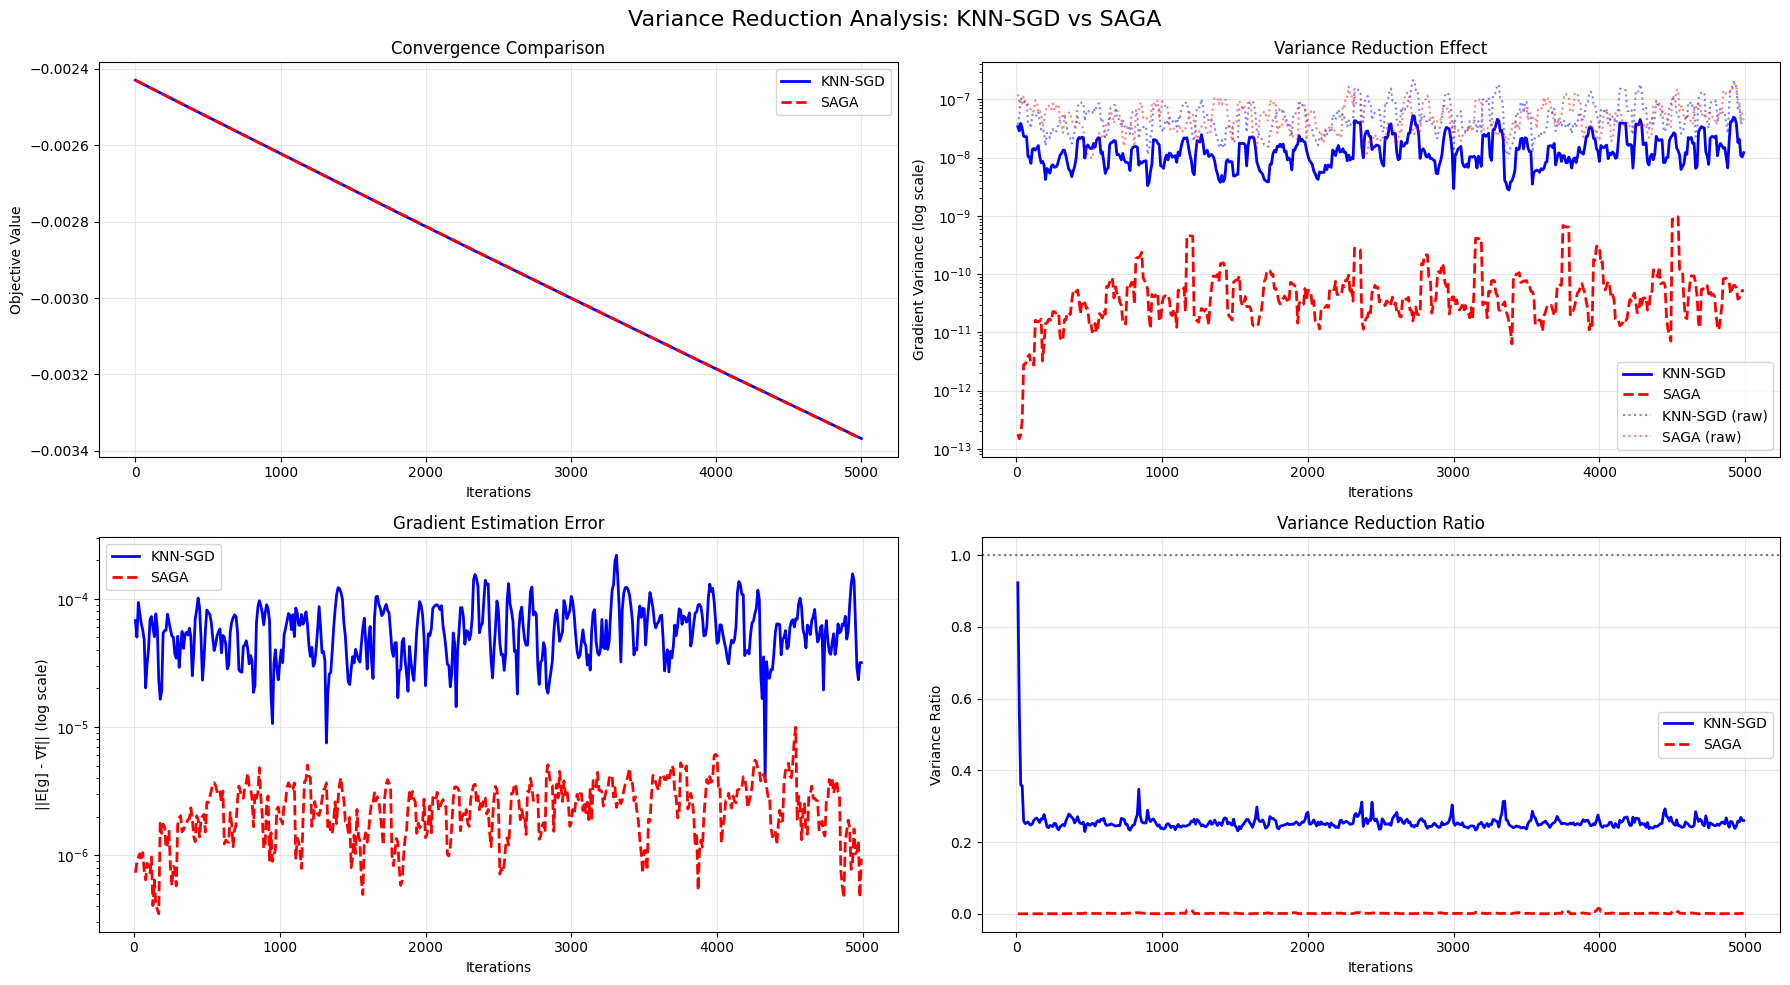


SUMMARY: Variance Reduction Comparison

--------------------------------------------------------------------------------
Objective            Algorithm       Var Reduction   Final ||∇f||    Iterations
--------------------------------------------------------------------------------
Mean-Variance        KNN-SGD                  74.4%       5.63e-03       5000
                     SAGA                     99.9%       5.63e-03       5000
--------------------------------------------------------------------------------

HYPERPARAMETER SENSITIVITY ANALYSIS

Testing effect of k (number of neighbors) on variance reduction...

Effect of k on KNN-SGD performance:
k          Variance Reduction   Final ||∇f||   
---------------------------------------------
5                        71.0%       5.66e-03
10                       73.4%       5.66e-03
20                       74.4%       5.66e-03
30                       73.8%       5.66e-03

Testing effect of α (mixing parameter) on variance reductio

In [8]:
# For 4 assets

import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from collections import deque
import time
from typing import Dict, Optional, List, Tuple
from datetime import datetime
import warnings
import cvxpy as cp
warnings.filterwarnings('ignore')

class VarianceReductionAnalyzer:
    """Analyze variance reduction properties of KNN-SGD vs SAGA."""

    def __init__(self, gamma: float = 2.0, rho: float = 1e-4):
        self.gamma = gamma
        self.rho = rho
        self.returns = None
        self.mu_hat = None
        self.Sigma_hat = None

    def fetch_stock_data(self, tickers: list, start_date: str = '2000-01-01',
                        end_date: str = '2024-01-01', interval: str = '1h') -> pd.DataFrame:
        """Fetch historical stock data."""
        print(f"Fetching data for {tickers}...")
        data = yf.download(tickers, start=start_date, end=end_date, interval = interval, progress=False)['Close']

        if len(tickers) == 1:
            data = pd.DataFrame(data)
            data.columns = tickers

        returns = data.pct_change().dropna()
        return returns.dropna()

    def prepare_data(self, returns_df: pd.DataFrame) -> np.ndarray:
        """Prepare returns data for optimization."""
        self.returns = returns_df.values
        self.mu_hat = np.mean(self.returns, axis=0)
        self.Sigma_hat = np.cov(self.returns.T)
        return self.returns

    def mean_variance_objective(self, w: np.ndarray, mu: np.ndarray,
                               Sigma: np.ndarray) -> float:
        """Standard mean-variance objective for comparison."""
        return 0.5 * w.T @ Sigma @ w - self.gamma * w.T @ mu

    def mean_variance_gradient(self, w: np.ndarray, mu: np.ndarray,
                              Sigma: np.ndarray) -> np.ndarray:
        """True gradient of mean-variance objective."""
        return Sigma @ w - self.gamma * mu

    def mean_variance_stochastic_gradient(self, w: np.ndarray,
                                         return_sample: np.ndarray,
                                         mu_hat: np.ndarray) -> np.ndarray:
        """Stochastic gradient for mean-variance objective."""
        centered_return = return_sample - mu_hat
        return (w.T @ centered_return) * centered_return - self.gamma * mu_hat

    def project_simplex(self, w: np.ndarray) -> np.ndarray:
        """Project onto probability simplex."""
        w = np.maximum(w, 0)
        n = len(w)
        if np.sum(w) == 1 and np.all(w >= 0):
            return w

        u = np.sort(w)[::-1]
        cssv = np.cumsum(u)
        rho = np.where((u * np.arange(1, n + 1) > (cssv - 1)))[0][-1]
        theta = (cssv[rho] - 1) / (rho + 1)

        return np.maximum(w - theta, 0)

    def compute_gradient_variance(self, gradients: List[np.ndarray]) -> float:
        """Compute variance of gradient estimates."""
        if len(gradients) < 2:
            return 0.0
        grad_array = np.array(gradients)
        return np.mean(np.var(grad_array, axis=0))

    def knn_sgd_with_variance_tracking(self, returns: np.ndarray, objective_type: str = 'smooth_cvar',
                                      k: int = 10, buffer_size: int = 1000, alpha: float = 0.7,
                                      lr: float = 0.01, max_iter: int = 10000) -> Dict:
        """
        KNN-SGD with detailed variance tracking.
        """
        T, n = returns.shape

        # Initialize
        w = np.ones(n) / n
        knn_buffer = deque(maxlen=buffer_size)
        return_history = deque(maxlen=200)

        # Tracking
        history = {
            'objective': [],
            'weights': [],
            'time': [],
            'iterations': [],
            'gradient_variance': [],
            'knn_gradient_variance': [],
            'raw_gradient_variance': [],
            'gradient_norms': [],
            'true_gradient_error': []
        }

        # Store recent gradients for variance calculation
        recent_gradients = deque(maxlen=50)
        recent_knn_gradients = deque(maxlen=50)
        recent_raw_gradients = deque(maxlen=50)

        start_time = time.time()

        # Initial evaluation
        if objective_type == 'smooth_cvar':
            obj_func = lambda w: self.smooth_cvar_objective(w, returns)
            grad_func = lambda w: self.smooth_cvar_gradient(w, returns)
            stoch_grad_func = lambda w, r: self.smooth_cvar_stochastic_gradient(w, r, return_history)
        else:  # mean-variance
            obj_func = lambda w: self.mean_variance_objective(w, self.mu_hat, self.Sigma_hat)
            grad_func = lambda w: self.mean_variance_gradient(w, self.mu_hat, self.Sigma_hat)
            stoch_grad_func = lambda w, r: self.mean_variance_stochastic_gradient(w, r, self.mu_hat)

        # Track initial state
        initial_obj = obj_func(w)
        initial_grad = grad_func(w)

        history['objective'].append(initial_obj)
        history['weights'].append(w.copy())
        history['time'].append(0)
        history['iterations'].append(0)
        history['gradient_norms'].append(np.linalg.norm(initial_grad))

        for iter_k in range(max_iter):
            # Sample data
            t = np.random.randint(0, T)
            return_sample = returns[t]
            return_history.append(return_sample)

            # Compute stochastic gradient
            g_k = stoch_grad_func(w, return_sample)
            recent_raw_gradients.append(g_k.copy())

            # KNN gradient mixing
            knn_buffer.append((w.copy(), g_k.copy()))

            if len(knn_buffer) > k:
                buffer_list = list(knn_buffer)[:-1]
                params = np.array([pair[0] for pair in buffer_list])
                grads = np.array([pair[1] for pair in buffer_list])

                # Find k nearest neighbors
                dists = np.linalg.norm(params - w, axis=1)
                k_actual = min(k, len(params))
                idx = np.argpartition(dists, k_actual-1)[:k_actual]

                nn_grads = grads[idx]
                knn_mean = np.mean(nn_grads, axis=0)
                grad_mixed = alpha * g_k + (1 - alpha) * knn_mean

                recent_knn_gradients.append(grad_mixed.copy())
            else:
                grad_mixed = g_k
                recent_knn_gradients.append(grad_mixed.copy())

            recent_gradients.append(grad_mixed.copy())

            # Update weights
            w = w - lr * grad_mixed
            w = self.project_simplex(w)

            # Track variance every 10 iterations
            if (iter_k + 1) % 10 == 0:
                current_obj = obj_func(w)
                true_grad = grad_func(w)

                history['objective'].append(current_obj)
                history['weights'].append(w.copy())
                history['time'].append(time.time() - start_time)
                history['iterations'].append(iter_k + 1)

                # Always track gradient norm when we track other metrics
                history['gradient_norms'].append(np.linalg.norm(true_grad))

                # Compute gradient variances
                if len(recent_gradients) > 10:
                    history['gradient_variance'].append(self.compute_gradient_variance(list(recent_gradients)))
                    history['knn_gradient_variance'].append(self.compute_gradient_variance(list(recent_knn_gradients)))
                    history['raw_gradient_variance'].append(self.compute_gradient_variance(list(recent_raw_gradients)))

                    # Gradient error (bias)
                    mean_gradient = np.mean(list(recent_gradients), axis=0)
                    history['true_gradient_error'].append(np.linalg.norm(mean_gradient - true_grad))

        return {
            'weights': w,
            'history': history,
            'algorithm': 'KNN-SGD'
        }

    def saga_with_variance_tracking(self, returns: np.ndarray, objective_type: str = 'smooth_cvar',
                                   lr: float = 0.01, max_iter: int = 10000) -> Dict:
        """
        SAGA with detailed variance tracking.
        """
        T, n = returns.shape

        # Initialize
        w = np.ones(n) / n
        stored_gradients = np.zeros((T, n))
        gradient_sum = np.zeros(n)
        return_history = deque(maxlen=200)

        # Choose objective
        if objective_type == 'smooth_cvar':
            obj_func = lambda w: self.smooth_cvar_objective(w, returns)
            grad_func = lambda w: self.smooth_cvar_gradient(w, returns)
            stoch_grad_func = lambda w, r: self.smooth_cvar_stochastic_gradient(w, r, return_history)
        else:
            obj_func = lambda w: self.mean_variance_objective(w, self.mu_hat, self.Sigma_hat)
            grad_func = lambda w: self.mean_variance_gradient(w, self.mu_hat, self.Sigma_hat)
            stoch_grad_func = lambda w, r: self.mean_variance_stochastic_gradient(w, r, self.mu_hat)

        # Initialize stored gradients
        for i in range(T):
            return_history.append(returns[i])
            stored_gradients[i] = stoch_grad_func(w, returns[i])
        gradient_sum = np.sum(stored_gradients, axis=0)

        # Tracking
        history = {
            'objective': [],
            'weights': [],
            'time': [],
            'iterations': [],
            'gradient_variance': [],
            'saga_gradient_variance': [],
            'raw_gradient_variance': [],
            'gradient_norms': [],
            'true_gradient_error': []
        }

        recent_gradients = deque(maxlen=50)
        recent_saga_gradients = deque(maxlen=50)
        recent_raw_gradients = deque(maxlen=50)

        start_time = time.time()

        # Initial state
        initial_obj = obj_func(w)
        initial_grad = grad_func(w)

        history['objective'].append(initial_obj)
        history['weights'].append(w.copy())
        history['time'].append(0)
        history['iterations'].append(0)
        history['gradient_norms'].append(np.linalg.norm(initial_grad))

        for iter_k in range(max_iter):
            # Sample data
            t = np.random.randint(0, T)
            return_sample = returns[t]
            return_history.append(return_sample)

            # Compute new gradient
            g_new = stoch_grad_func(w, return_sample)
            recent_raw_gradients.append(g_new.copy())

            # SAGA update
            g_old = stored_gradients[t].copy()
            grad_saga = g_new - g_old + gradient_sum / T

            # Update stored gradient
            gradient_sum = gradient_sum - g_old + g_new
            stored_gradients[t] = g_new.copy()

            recent_saga_gradients.append(grad_saga.copy())
            recent_gradients.append(grad_saga.copy())

            # Update weights
            w = w - lr * grad_saga
            w = self.project_simplex(w)

            # Track variance
            if (iter_k + 1) % 10 == 0:
                current_obj = obj_func(w)
                true_grad = grad_func(w)

                history['objective'].append(current_obj)
                history['weights'].append(w.copy())
                history['time'].append(time.time() - start_time)
                history['iterations'].append(iter_k + 1)

                # Always track gradient norm when we track other metrics
                history['gradient_norms'].append(np.linalg.norm(true_grad))

                if len(recent_gradients) > 10:
                    history['gradient_variance'].append(self.compute_gradient_variance(list(recent_gradients)))
                    history['saga_gradient_variance'].append(self.compute_gradient_variance(list(recent_saga_gradients)))
                    history['raw_gradient_variance'].append(self.compute_gradient_variance(list(recent_raw_gradients)))

                    mean_gradient = np.mean(list(recent_gradients), axis=0)
                    history['true_gradient_error'].append(np.linalg.norm(mean_gradient - true_grad))

        return {
            'weights': w,
            'history': history,
            'algorithm': 'SAGA'
        }

    def plot_variance_reduction_analysis(self, knn_result: Dict, saga_result: Dict,
                                       sgd_result: Optional[Dict] = None):
        """Plot comprehensive variance reduction analysis."""

        # Debug: Print array lengths
        print("\nDebug - Array lengths:")
        print(f"KNN iterations: {len(knn_result['history']['iterations'])}")
        print(f"KNN objectives: {len(knn_result['history']['objective'])}")
        print(f"KNN gradient_norms: {len(knn_result['history']['gradient_norms'])}")
        print(f"KNN gradient_variance: {len(knn_result['history']['gradient_variance'])}")

        fig, axes = plt.subplots(2, 2, figsize=(18, 10))

        # 1. Objective convergence
        ax = axes[0, 0]
        ax.plot(knn_result['history']['iterations'], knn_result['history']['objective'],
                'b-', label='KNN-SGD', linewidth=2)
        ax.plot(saga_result['history']['iterations'], saga_result['history']['objective'],
                'r--', label='SAGA', linewidth=2)
        if sgd_result:
            ax.plot(sgd_result['history']['iterations'], sgd_result['history']['objective'],
                    'g:', label='Vanilla SGD', linewidth=2)
        ax.set_xlabel('Iterations')
        ax.set_ylabel('Objective Value')
        ax.set_title('Convergence Comparison')
        ax.legend()
        ax.grid(True, alpha=0.3)

        # 2. Gradient variance over time
        ax = axes[0, 1]
        if len(knn_result['history']['gradient_variance']) > 0:
            # Get the correct number of variance measurements
            n_knn_var = len(knn_result['history']['gradient_variance'])
            n_saga_var = len(saga_result['history']['gradient_variance'])

            # Create corresponding iteration arrays
            knn_iters = knn_result['history']['iterations'][1:n_knn_var+1]
            saga_iters = saga_result['history']['iterations'][1:n_saga_var+1]

            ax.semilogy(knn_iters, knn_result['history']['gradient_variance'][:len(knn_iters)],
                       'b-', label='KNN-SGD', linewidth=2)
            ax.semilogy(saga_iters, saga_result['history']['gradient_variance'][:len(saga_iters)],
                       'r--', label='SAGA', linewidth=2)

            # Add raw gradient variance
            n_knn_raw = len(knn_result['history']['raw_gradient_variance'])
            n_saga_raw = len(saga_result['history']['raw_gradient_variance'])
            knn_iters_raw = knn_result['history']['iterations'][1:n_knn_raw+1]
            saga_iters_raw = saga_result['history']['iterations'][1:n_saga_raw+1]

            ax.semilogy(knn_iters_raw, knn_result['history']['raw_gradient_variance'][:len(knn_iters_raw)],
                       'b:', label='KNN-SGD (raw)', alpha=0.5)
            ax.semilogy(saga_iters_raw, saga_result['history']['raw_gradient_variance'][:len(saga_iters_raw)],
                       'r:', label='SAGA (raw)', alpha=0.5)

        ax.set_xlabel('Iterations')
        ax.set_ylabel('Gradient Variance (log scale)')
        ax.set_title('Variance Reduction Effect')
        ax.legend()
        ax.grid(True, alpha=0.3)

        ax = axes[1, 0]
        if len(knn_result['history']['true_gradient_error']) > 0:
            n_knn_err = len(knn_result['history']['true_gradient_error'])
            n_saga_err = len(saga_result['history']['true_gradient_error'])

            knn_iters = knn_result['history']['iterations'][1:n_knn_err+1]
            saga_iters = saga_result['history']['iterations'][1:n_saga_err+1]

            ax.semilogy(knn_iters, knn_result['history']['true_gradient_error'][:len(knn_iters)],
                       'b-', label='KNN-SGD', linewidth=2)
            ax.semilogy(saga_iters, saga_result['history']['true_gradient_error'][:len(saga_iters)],
                       'r--', label='SAGA', linewidth=2)

        ax.set_xlabel('Iterations')
        ax.set_ylabel('||E[g] - ∇f|| (log scale)')
        ax.set_title('Gradient Estimation Error')
        ax.legend()
        ax.grid(True, alpha=0.3)

        # 5. Variance reduction ratio
        ax = axes[1, 1]
        if (len(knn_result['history']['gradient_variance']) > 0 and
            len(knn_result['history']['raw_gradient_variance']) > 0):

            # Ensure arrays have same length
            n_knn = min(len(knn_result['history']['gradient_variance']),
                       len(knn_result['history']['raw_gradient_variance']))
            n_saga = min(len(saga_result['history']['gradient_variance']),
                        len(saga_result['history']['raw_gradient_variance']))

            knn_ratio = np.array(knn_result['history']['gradient_variance'][:n_knn]) / (
                np.array(knn_result['history']['raw_gradient_variance'][:n_knn]) + 1e-10)
            saga_ratio = np.array(saga_result['history']['gradient_variance'][:n_saga]) / (
                np.array(saga_result['history']['raw_gradient_variance'][:n_saga]) + 1e-10)

            knn_iters = knn_result['history']['iterations'][1:n_knn+1]
            saga_iters = saga_result['history']['iterations'][1:n_saga+1]

            ax.plot(knn_iters, knn_ratio,
                   'b-', label='KNN-SGD', linewidth=2)
            ax.plot(saga_iters, saga_ratio,
                   'r--', label='SAGA', linewidth=2)
            ax.axhline(y=1.0, color='k', linestyle=':', alpha=0.5)

        ax.set_xlabel('Iterations')
        ax.set_ylabel('Variance Ratio')
        ax.set_title('Variance Reduction Ratio')
        ax.legend()
        ax.grid(True, alpha=0.3)

        plt.suptitle('Variance Reduction Analysis: KNN-SGD vs SAGA', fontsize=16)
        plt.tight_layout()
        plt.show()

def main():
    """Run comprehensive variance reduction analysis."""

    # Use a mix of assets for portfolio optimization
    tickers = ["AAPL","GOOGL","JPM","XOM"]

    # Initialize analyzer
    analyzer = VarianceReductionAnalyzer(gamma=2.0)

    # Fetch data
    returns_df = analyzer.fetch_stock_data(
        tickers=tickers,
        start_date='2023-01-01',
        end_date='2024-01-01',
        interval = '1d'
    )

    # Prepare data
    returns = analyzer.prepare_data(returns_df)

    # Test on mean-variance objective (strongly convex, smooth)
    print("\n\n2. Testing on Mean-Variance Objective (strongly convex)")
    print("-" * 50)

    np.random.seed(42)

    # Run KNN-SGD
    print("\nRunning KNN-SGD on mean-variance...")
    knn_result_mv = analyzer.knn_sgd_with_variance_tracking(
        returns=returns,
        objective_type='mean_variance',
        k=15,
        buffer_size=1000,
        alpha=0.5,
        lr=0.02,  # Smaller LR for mean-variance
        max_iter=5000
    )

    # Run SAGA
    print("Running SAGA on mean-variance...")
    saga_result_mv = analyzer.saga_with_variance_tracking(
        returns=returns,
        objective_type='mean_variance',
        lr=0.02,
        max_iter=5000
    )

    # Plot comparison
    print("\nGenerating mean-variance comparison...")
    analyzer.plot_variance_reduction_analysis(knn_result_mv, saga_result_mv)

    # Compare variance reduction across objectives
    print("\n" + "=" * 60)
    print("SUMMARY: Variance Reduction Comparison")
    print("=" * 60)

    def compute_summary_stats(result):
        """Compute summary statistics for a result."""
        history = result['history']

        if len(history['gradient_variance']) > 0:
            avg_variance = np.mean(history['gradient_variance'])
            avg_raw_variance = np.mean(history['raw_gradient_variance'])
            variance_reduction = 1 - avg_variance / avg_raw_variance

            final_grad_norm = history['gradient_norms'][-1]
            convergence_iters = history['iterations'][-1]

            return {
                'avg_variance': avg_variance,
                'variance_reduction': variance_reduction,
                'final_grad_norm': final_grad_norm,
                'iterations': convergence_iters
            }
        return None

    # Print summary table
    objectives = ['Mean-Variance']
    knn_results = [knn_result_mv]
    saga_results = [saga_result_mv]

    print("\n" + "-" * 80)
    print(f"{'Objective':<20} {'Algorithm':<15} {'Var Reduction':<15} {'Final ||∇f||':<15} {'Iterations':<10}")
    print("-" * 80)

    for obj, knn_res, saga_res in zip(objectives, knn_results, saga_results):
        knn_stats = compute_summary_stats(knn_res)
        saga_stats = compute_summary_stats(saga_res)

        if knn_stats and saga_stats:
            print(f"{obj:<20} {'KNN-SGD':<15} {knn_stats['variance_reduction']:>14.1%} "
                  f"{knn_stats['final_grad_norm']:>14.2e} {knn_stats['iterations']:>10d}")
            print(f"{'':<20} {'SAGA':<15} {saga_stats['variance_reduction']:>14.1%} "
                  f"{saga_stats['final_grad_norm']:>14.2e} {saga_stats['iterations']:>10d}")
            print("-" * 80)

    # Additional analysis: Effect of hyperparameters on variance reduction
    print("\n" + "=" * 60)
    print("HYPERPARAMETER SENSITIVITY ANALYSIS")
    print("=" * 60)

    # Test different k values
    k_values = [5, 10, 20, 30]
    alpha_values = [0.3, 0.5, 0.7, 0.9]

    print("\nTesting effect of k (number of neighbors) on variance reduction...")
    k_results = []

    for k in k_values:
        np.random.seed(42)
        result = analyzer.knn_sgd_with_variance_tracking(
            returns=returns,
            objective_type='mean_variance',
            k=k,
            alpha=0.5,
            lr=0.02,
            max_iter=2000
        )
        stats = compute_summary_stats(result)
        if stats:
            k_results.append((k, stats['variance_reduction'], stats['final_grad_norm']))

    print("\nEffect of k on KNN-SGD performance:")
    print(f"{'k':<10} {'Variance Reduction':<20} {'Final ||∇f||':<15}")
    print("-" * 45)
    for k, var_red, grad_norm in k_results:
        print(f"{k:<10} {var_red:>19.1%} {grad_norm:>14.2e}")

    print("\nTesting effect of α (mixing parameter) on variance reduction...")
    alpha_results = []

    for alpha in alpha_values:
        np.random.seed(42)
        result = analyzer.knn_sgd_with_variance_tracking(
            returns=returns,
            objective_type='mean_variance',
            k=15,
            alpha=alpha,
            lr=0.02,
            max_iter=2000
        )
        stats = compute_summary_stats(result)
        if stats:
            alpha_results.append((alpha, stats['variance_reduction'], stats['final_grad_norm']))

    print("\nEffect of α on KNN-SGD performance:")
    print(f"{'α':<10} {'Variance Reduction':<20} {'Final ||∇f||':<15}")
    print("-" * 45)
    for alpha, var_red, grad_norm in alpha_results:
        print(f"{alpha:<10} {var_red:>19.1%} {grad_norm:>14.2e}")

    return {
        'mv_results': (knn_result_mv, saga_result_mv),
        'k_sensitivity': k_results,
        'alpha_sensitivity': alpha_results
    }


if __name__ == "__main__":
    results = main()

Fetching data for ['AAPL', 'GOOGL', 'JPM', 'XOM', 'AMZN', 'LLY', 'CAT', 'PG', 'MSFT', 'META', 'TSLA', 'JNJ', 'BAC', 'UNP', 'KO', 'CVX']...


2. Testing on Mean-Variance Objective (strongly convex)
--------------------------------------------------

Running KNN-SGD on mean-variance...
Running SAGA on mean-variance...

Generating mean-variance comparison...

Debug - Array lengths:
KNN iterations: 501
KNN objectives: 501
KNN gradient_norms: 501
KNN gradient_variance: 499


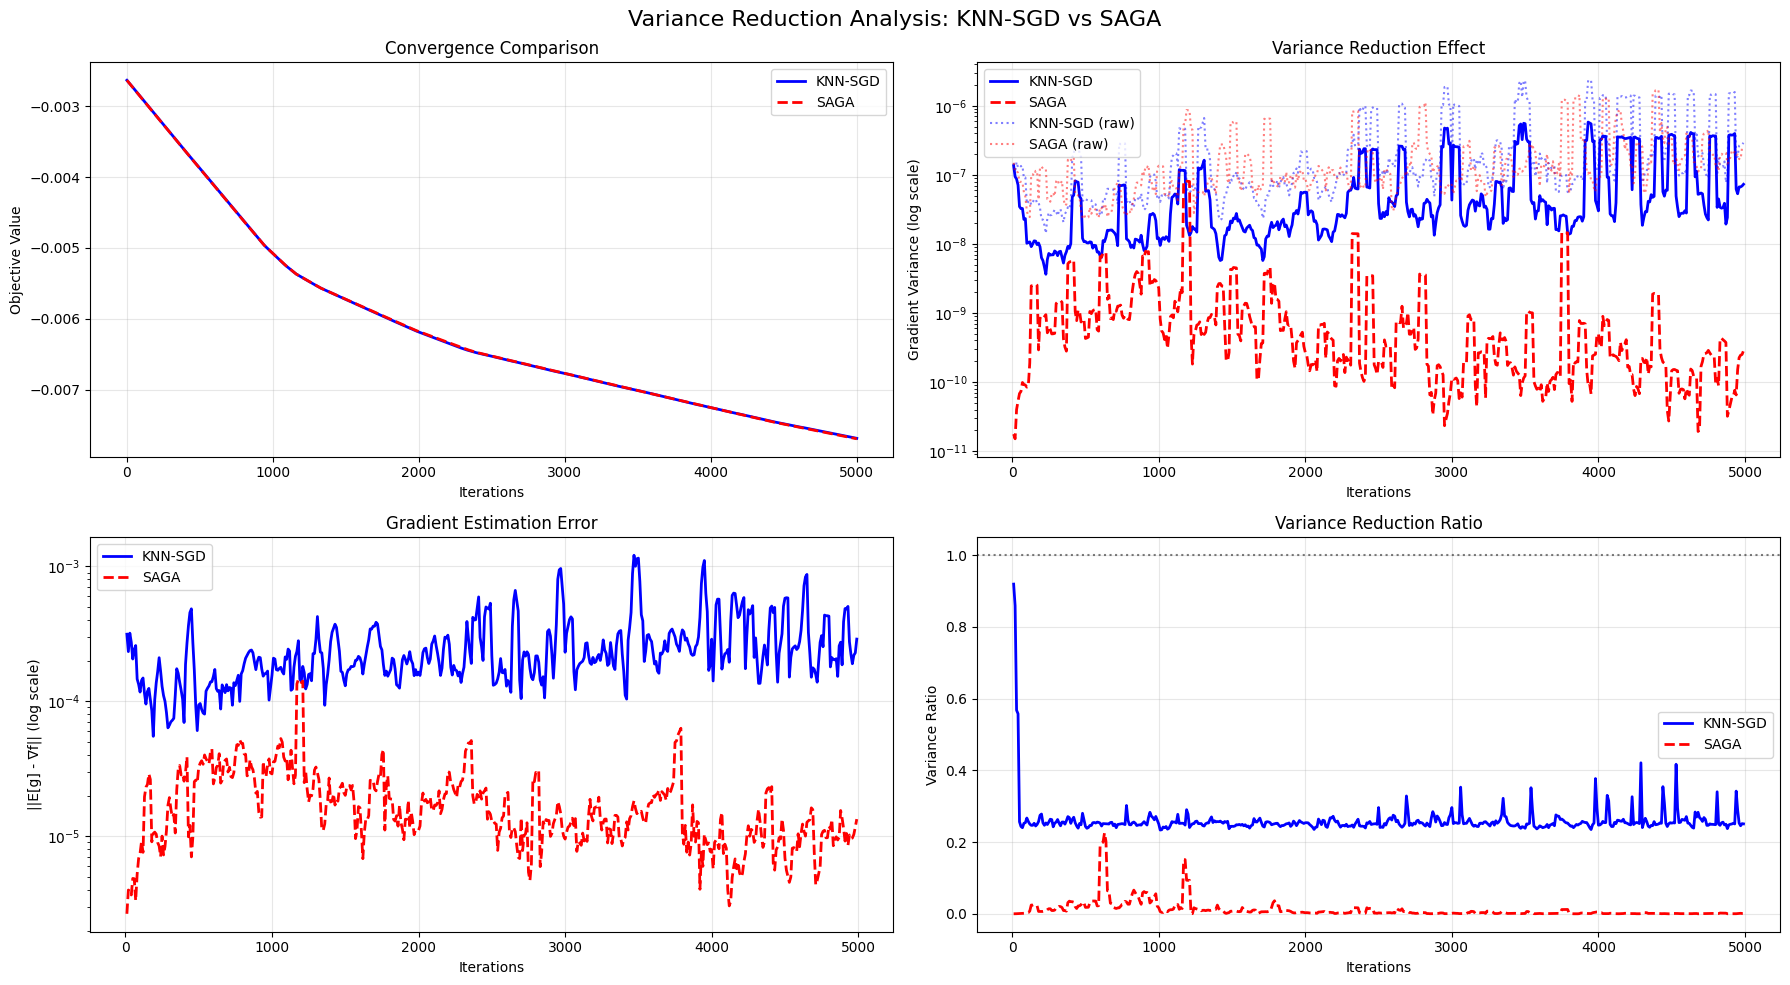


SUMMARY: Variance Reduction Comparison

--------------------------------------------------------------------------------
Objective            Algorithm       Var Reduction   Final ||∇f||    Iterations
--------------------------------------------------------------------------------
Mean-Variance        KNN-SGD                  74.6%       1.48e-02       5000
                     SAGA                     99.1%       1.48e-02       5000
--------------------------------------------------------------------------------

HYPERPARAMETER SENSITIVITY ANALYSIS

Testing effect of k (number of neighbors) on variance reduction...

Effect of k on KNN-SGD performance:
k          Variance Reduction   Final ||∇f||   
---------------------------------------------
5                        71.7%       1.49e-02
10                       73.0%       1.49e-02
20                       73.8%       1.49e-02
30                       73.7%       1.49e-02

Testing effect of α (mixing parameter) on variance reductio

In [10]:
# For 16 assets


import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from collections import deque
import time
from typing import Dict, Optional, List, Tuple
from datetime import datetime
import warnings
import cvxpy as cp
warnings.filterwarnings('ignore')

class VarianceReductionAnalyzer:
    """Analyze variance reduction properties of KNN-SGD vs SAGA."""

    def __init__(self, gamma: float = 2.0, rho: float = 1e-4):
        self.gamma = gamma
        self.rho = rho
        self.returns = None
        self.mu_hat = None
        self.Sigma_hat = None

    def fetch_stock_data(self, tickers: list, start_date: str = '2000-01-01',
                        end_date: str = '2024-01-01', interval: str = '1h') -> pd.DataFrame:
        """Fetch historical stock data."""
        print(f"Fetching data for {tickers}...")
        data = yf.download(tickers, start=start_date, end=end_date, interval = interval, progress=False)['Close']

        if len(tickers) == 1:
            data = pd.DataFrame(data)
            data.columns = tickers

        returns = data.pct_change().dropna()
        return returns.dropna()

    def prepare_data(self, returns_df: pd.DataFrame) -> np.ndarray:
        """Prepare returns data for optimization."""
        self.returns = returns_df.values
        self.mu_hat = np.mean(self.returns, axis=0)
        self.Sigma_hat = np.cov(self.returns.T)
        return self.returns

    def mean_variance_objective(self, w: np.ndarray, mu: np.ndarray,
                               Sigma: np.ndarray) -> float:
        """Standard mean-variance objective for comparison."""
        return 0.5 * w.T @ Sigma @ w - self.gamma * w.T @ mu

    def mean_variance_gradient(self, w: np.ndarray, mu: np.ndarray,
                              Sigma: np.ndarray) -> np.ndarray:
        """True gradient of mean-variance objective."""
        return Sigma @ w - self.gamma * mu

    def mean_variance_stochastic_gradient(self, w: np.ndarray,
                                         return_sample: np.ndarray,
                                         mu_hat: np.ndarray) -> np.ndarray:
        """Stochastic gradient for mean-variance objective."""
        centered_return = return_sample - mu_hat
        return (w.T @ centered_return) * centered_return - self.gamma * mu_hat

    def project_simplex(self, w: np.ndarray) -> np.ndarray:
        """Project onto probability simplex."""
        w = np.maximum(w, 0)
        n = len(w)
        if np.sum(w) == 1 and np.all(w >= 0):
            return w

        u = np.sort(w)[::-1]
        cssv = np.cumsum(u)
        rho = np.where((u * np.arange(1, n + 1) > (cssv - 1)))[0][-1]
        theta = (cssv[rho] - 1) / (rho + 1)

        return np.maximum(w - theta, 0)

    def compute_gradient_variance(self, gradients: List[np.ndarray]) -> float:
        """Compute variance of gradient estimates."""
        if len(gradients) < 2:
            return 0.0
        grad_array = np.array(gradients)
        return np.mean(np.var(grad_array, axis=0))

    def knn_sgd_with_variance_tracking(self, returns: np.ndarray, objective_type: str = 'smooth_cvar',
                                      k: int = 10, buffer_size: int = 1000, alpha: float = 0.7,
                                      lr: float = 0.01, max_iter: int = 10000) -> Dict:
        """
        KNN-SGD with detailed variance tracking.
        """
        T, n = returns.shape

        # Initialize
        w = np.ones(n) / n
        knn_buffer = deque(maxlen=buffer_size)
        return_history = deque(maxlen=200)

        # Tracking
        history = {
            'objective': [],
            'weights': [],
            'time': [],
            'iterations': [],
            'gradient_variance': [],
            'knn_gradient_variance': [],
            'raw_gradient_variance': [],
            'gradient_norms': [],
            'true_gradient_error': []
        }

        # Store recent gradients for variance calculation
        recent_gradients = deque(maxlen=50)
        recent_knn_gradients = deque(maxlen=50)
        recent_raw_gradients = deque(maxlen=50)

        start_time = time.time()

        # Initial evaluation
        if objective_type == 'smooth_cvar':
            obj_func = lambda w: self.smooth_cvar_objective(w, returns)
            grad_func = lambda w: self.smooth_cvar_gradient(w, returns)
            stoch_grad_func = lambda w, r: self.smooth_cvar_stochastic_gradient(w, r, return_history)
        else:  # mean-variance
            obj_func = lambda w: self.mean_variance_objective(w, self.mu_hat, self.Sigma_hat)
            grad_func = lambda w: self.mean_variance_gradient(w, self.mu_hat, self.Sigma_hat)
            stoch_grad_func = lambda w, r: self.mean_variance_stochastic_gradient(w, r, self.mu_hat)

        # Track initial state
        initial_obj = obj_func(w)
        initial_grad = grad_func(w)

        history['objective'].append(initial_obj)
        history['weights'].append(w.copy())
        history['time'].append(0)
        history['iterations'].append(0)
        history['gradient_norms'].append(np.linalg.norm(initial_grad))

        for iter_k in range(max_iter):
            # Sample data
            t = np.random.randint(0, T)
            return_sample = returns[t]
            return_history.append(return_sample)

            # Compute stochastic gradient
            g_k = stoch_grad_func(w, return_sample)
            recent_raw_gradients.append(g_k.copy())

            # KNN gradient mixing
            knn_buffer.append((w.copy(), g_k.copy()))

            if len(knn_buffer) > k:
                buffer_list = list(knn_buffer)[:-1]
                params = np.array([pair[0] for pair in buffer_list])
                grads = np.array([pair[1] for pair in buffer_list])

                # Find k nearest neighbors
                dists = np.linalg.norm(params - w, axis=1)
                k_actual = min(k, len(params))
                idx = np.argpartition(dists, k_actual-1)[:k_actual]

                nn_grads = grads[idx]
                knn_mean = np.mean(nn_grads, axis=0)
                grad_mixed = alpha * g_k + (1 - alpha) * knn_mean

                recent_knn_gradients.append(grad_mixed.copy())
            else:
                grad_mixed = g_k
                recent_knn_gradients.append(grad_mixed.copy())

            recent_gradients.append(grad_mixed.copy())

            # Update weights
            w = w - lr * grad_mixed
            w = self.project_simplex(w)

            # Track variance every 10 iterations
            if (iter_k + 1) % 10 == 0:
                current_obj = obj_func(w)
                true_grad = grad_func(w)

                history['objective'].append(current_obj)
                history['weights'].append(w.copy())
                history['time'].append(time.time() - start_time)
                history['iterations'].append(iter_k + 1)

                # Always track gradient norm when we track other metrics
                history['gradient_norms'].append(np.linalg.norm(true_grad))

                # Compute gradient variances
                if len(recent_gradients) > 10:
                    history['gradient_variance'].append(self.compute_gradient_variance(list(recent_gradients)))
                    history['knn_gradient_variance'].append(self.compute_gradient_variance(list(recent_knn_gradients)))
                    history['raw_gradient_variance'].append(self.compute_gradient_variance(list(recent_raw_gradients)))

                    # Gradient error (bias)
                    mean_gradient = np.mean(list(recent_gradients), axis=0)
                    history['true_gradient_error'].append(np.linalg.norm(mean_gradient - true_grad))

        return {
            'weights': w,
            'history': history,
            'algorithm': 'KNN-SGD'
        }

    def saga_with_variance_tracking(self, returns: np.ndarray, objective_type: str = 'smooth_cvar',
                                   lr: float = 0.01, max_iter: int = 10000) -> Dict:
        """
        SAGA with detailed variance tracking.
        """
        T, n = returns.shape

        # Initialize
        w = np.ones(n) / n
        stored_gradients = np.zeros((T, n))
        gradient_sum = np.zeros(n)
        return_history = deque(maxlen=200)

        # Choose objective
        if objective_type == 'smooth_cvar':
            obj_func = lambda w: self.smooth_cvar_objective(w, returns)
            grad_func = lambda w: self.smooth_cvar_gradient(w, returns)
            stoch_grad_func = lambda w, r: self.smooth_cvar_stochastic_gradient(w, r, return_history)
        else:
            obj_func = lambda w: self.mean_variance_objective(w, self.mu_hat, self.Sigma_hat)
            grad_func = lambda w: self.mean_variance_gradient(w, self.mu_hat, self.Sigma_hat)
            stoch_grad_func = lambda w, r: self.mean_variance_stochastic_gradient(w, r, self.mu_hat)

        # Initialize stored gradients
        for i in range(T):
            return_history.append(returns[i])
            stored_gradients[i] = stoch_grad_func(w, returns[i])
        gradient_sum = np.sum(stored_gradients, axis=0)

        # Tracking
        history = {
            'objective': [],
            'weights': [],
            'time': [],
            'iterations': [],
            'gradient_variance': [],
            'saga_gradient_variance': [],
            'raw_gradient_variance': [],
            'gradient_norms': [],
            'true_gradient_error': []
        }

        recent_gradients = deque(maxlen=50)
        recent_saga_gradients = deque(maxlen=50)
        recent_raw_gradients = deque(maxlen=50)

        start_time = time.time()

        # Initial state
        initial_obj = obj_func(w)
        initial_grad = grad_func(w)

        history['objective'].append(initial_obj)
        history['weights'].append(w.copy())
        history['time'].append(0)
        history['iterations'].append(0)
        history['gradient_norms'].append(np.linalg.norm(initial_grad))

        for iter_k in range(max_iter):
            # Sample data
            t = np.random.randint(0, T)
            return_sample = returns[t]
            return_history.append(return_sample)

            # Compute new gradient
            g_new = stoch_grad_func(w, return_sample)
            recent_raw_gradients.append(g_new.copy())

            # SAGA update
            g_old = stored_gradients[t].copy()
            grad_saga = g_new - g_old + gradient_sum / T

            # Update stored gradient
            gradient_sum = gradient_sum - g_old + g_new
            stored_gradients[t] = g_new.copy()

            recent_saga_gradients.append(grad_saga.copy())
            recent_gradients.append(grad_saga.copy())

            # Update weights
            w = w - lr * grad_saga
            w = self.project_simplex(w)

            # Track variance
            if (iter_k + 1) % 10 == 0:
                current_obj = obj_func(w)
                true_grad = grad_func(w)

                history['objective'].append(current_obj)
                history['weights'].append(w.copy())
                history['time'].append(time.time() - start_time)
                history['iterations'].append(iter_k + 1)

                # Always track gradient norm when we track other metrics
                history['gradient_norms'].append(np.linalg.norm(true_grad))

                if len(recent_gradients) > 10:
                    history['gradient_variance'].append(self.compute_gradient_variance(list(recent_gradients)))
                    history['saga_gradient_variance'].append(self.compute_gradient_variance(list(recent_saga_gradients)))
                    history['raw_gradient_variance'].append(self.compute_gradient_variance(list(recent_raw_gradients)))

                    mean_gradient = np.mean(list(recent_gradients), axis=0)
                    history['true_gradient_error'].append(np.linalg.norm(mean_gradient - true_grad))

        return {
            'weights': w,
            'history': history,
            'algorithm': 'SAGA'
        }

    def plot_variance_reduction_analysis(self, knn_result: Dict, saga_result: Dict,
                                       sgd_result: Optional[Dict] = None):
        """Plot comprehensive variance reduction analysis."""

        # Debug: Print array lengths
        print("\nDebug - Array lengths:")
        print(f"KNN iterations: {len(knn_result['history']['iterations'])}")
        print(f"KNN objectives: {len(knn_result['history']['objective'])}")
        print(f"KNN gradient_norms: {len(knn_result['history']['gradient_norms'])}")
        print(f"KNN gradient_variance: {len(knn_result['history']['gradient_variance'])}")

        fig, axes = plt.subplots(2, 2, figsize=(18, 10))

        # 1. Objective convergence
        ax = axes[0, 0]
        ax.plot(knn_result['history']['iterations'], knn_result['history']['objective'],
                'b-', label='KNN-SGD', linewidth=2)
        ax.plot(saga_result['history']['iterations'], saga_result['history']['objective'],
                'r--', label='SAGA', linewidth=2)
        if sgd_result:
            ax.plot(sgd_result['history']['iterations'], sgd_result['history']['objective'],
                    'g:', label='Vanilla SGD', linewidth=2)
        ax.set_xlabel('Iterations')
        ax.set_ylabel('Objective Value')
        ax.set_title('Convergence Comparison')
        ax.legend()
        ax.grid(True, alpha=0.3)

        # 2. Gradient variance over time
        ax = axes[0, 1]
        if len(knn_result['history']['gradient_variance']) > 0:
            # Get the correct number of variance measurements
            n_knn_var = len(knn_result['history']['gradient_variance'])
            n_saga_var = len(saga_result['history']['gradient_variance'])

            # Create corresponding iteration arrays
            knn_iters = knn_result['history']['iterations'][1:n_knn_var+1]
            saga_iters = saga_result['history']['iterations'][1:n_saga_var+1]

            ax.semilogy(knn_iters, knn_result['history']['gradient_variance'][:len(knn_iters)],
                       'b-', label='KNN-SGD', linewidth=2)
            ax.semilogy(saga_iters, saga_result['history']['gradient_variance'][:len(saga_iters)],
                       'r--', label='SAGA', linewidth=2)

            # Add raw gradient variance
            n_knn_raw = len(knn_result['history']['raw_gradient_variance'])
            n_saga_raw = len(saga_result['history']['raw_gradient_variance'])
            knn_iters_raw = knn_result['history']['iterations'][1:n_knn_raw+1]
            saga_iters_raw = saga_result['history']['iterations'][1:n_saga_raw+1]

            ax.semilogy(knn_iters_raw, knn_result['history']['raw_gradient_variance'][:len(knn_iters_raw)],
                       'b:', label='KNN-SGD (raw)', alpha=0.5)
            ax.semilogy(saga_iters_raw, saga_result['history']['raw_gradient_variance'][:len(saga_iters_raw)],
                       'r:', label='SAGA (raw)', alpha=0.5)

        ax.set_xlabel('Iterations')
        ax.set_ylabel('Gradient Variance (log scale)')
        ax.set_title('Variance Reduction Effect')
        ax.legend()
        ax.grid(True, alpha=0.3)

        # # 3. Gradient norm evolution
        # ax = axes[0, 2]
        # # Ensure matching dimensions
        # n_knn_norms = len(knn_result['history']['gradient_norms'])
        # n_saga_norms = len(saga_result['history']['gradient_norms'])

        # knn_iters_norms = knn_result['history']['iterations'][:n_knn_norms]
        # saga_iters_norms = saga_result['history']['iterations'][:n_saga_norms]

        # ax.semilogy(knn_iters_norms, knn_result['history']['gradient_norms'][:n_knn_norms],
        #            'b-', label='KNN-SGD', linewidth=2)
        # ax.semilogy(saga_iters_norms, saga_result['history']['gradient_norms'][:n_saga_norms],
        #            'r--', label='SAGA', linewidth=2)
        # ax.set_xlabel('Iterations')
        # ax.set_ylabel('||∇f(w)|| (log scale)')
        # ax.set_title('True Gradient Norm')
        # ax.legend()
        # ax.grid(True, alpha=0.3)

        # 4. Gradient estimation error (bias)
        ax = axes[1, 0]
        if len(knn_result['history']['true_gradient_error']) > 0:
            n_knn_err = len(knn_result['history']['true_gradient_error'])
            n_saga_err = len(saga_result['history']['true_gradient_error'])

            knn_iters = knn_result['history']['iterations'][1:n_knn_err+1]
            saga_iters = saga_result['history']['iterations'][1:n_saga_err+1]

            ax.semilogy(knn_iters, knn_result['history']['true_gradient_error'][:len(knn_iters)],
                       'b-', label='KNN-SGD', linewidth=2)
            ax.semilogy(saga_iters, saga_result['history']['true_gradient_error'][:len(saga_iters)],
                       'r--', label='SAGA', linewidth=2)

        ax.set_xlabel('Iterations')
        ax.set_ylabel('||E[g] - ∇f|| (log scale)')
        ax.set_title('Gradient Estimation Error')
        ax.legend()
        ax.grid(True, alpha=0.3)

        # 5. Variance reduction ratio
        ax = axes[1, 1]
        if (len(knn_result['history']['gradient_variance']) > 0 and
            len(knn_result['history']['raw_gradient_variance']) > 0):

            # Ensure arrays have same length
            n_knn = min(len(knn_result['history']['gradient_variance']),
                       len(knn_result['history']['raw_gradient_variance']))
            n_saga = min(len(saga_result['history']['gradient_variance']),
                        len(saga_result['history']['raw_gradient_variance']))

            knn_ratio = np.array(knn_result['history']['gradient_variance'][:n_knn]) / (
                np.array(knn_result['history']['raw_gradient_variance'][:n_knn]) + 1e-10)
            saga_ratio = np.array(saga_result['history']['gradient_variance'][:n_saga]) / (
                np.array(saga_result['history']['raw_gradient_variance'][:n_saga]) + 1e-10)

            knn_iters = knn_result['history']['iterations'][1:n_knn+1]
            saga_iters = saga_result['history']['iterations'][1:n_saga+1]

            ax.plot(knn_iters, knn_ratio,
                   'b-', label='KNN-SGD', linewidth=2)
            ax.plot(saga_iters, saga_ratio,
                   'r--', label='SAGA', linewidth=2)
            ax.axhline(y=1.0, color='k', linestyle=':', alpha=0.5)

        ax.set_xlabel('Iterations')
        ax.set_ylabel('Variance Ratio')
        ax.set_title('Variance Reduction Ratio')
        ax.legend()
        ax.grid(True, alpha=0.3)

        # # 6. Summary statistics
        # ax = axes[1, 2]
        # ax.axis('off')

        # summary_text = "Variance Reduction Summary:\n\n"
        # summary_text += f"{'Metric':<25} {'KNN-SGD':>12} {'SAGA':>12}\n"
        # summary_text += "-" * 50 + "\n"

        # # Average variance reduction
        # if len(knn_result['history']['gradient_variance']) > 0:
        #     knn_avg_var = np.mean(knn_result['history']['gradient_variance'])
        #     saga_avg_var = np.mean(saga_result['history']['gradient_variance'])
        #     knn_raw_var = np.mean(knn_result['history']['raw_gradient_variance'])
        #     saga_raw_var = np.mean(saga_result['history']['raw_gradient_variance'])

        #     summary_text += f"{'Avg Gradient Variance':.<25} {knn_avg_var:>12.2e} {saga_avg_var:>12.2e}\n"
        #     summary_text += f"{'Avg Raw Variance':.<25} {knn_raw_var:>12.2e} {saga_raw_var:>12.2e}\n"
        #     summary_text += f"{'Variance Reduction':.<25} {(1-knn_avg_var/knn_raw_var):>12.1%} {(1-saga_avg_var/saga_raw_var):>12.1%}\n"

        # # Final gradient norm
        # summary_text += f"{'Final ||∇f||':.<25} {knn_result['history']['gradient_norms'][-1]:>12.2e} {saga_result['history']['gradient_norms'][-1]:>12.2e}\n"

        # # Convergence speed (iterations to reach certain accuracy)
        # target_grad_norm = 1e-3
        # knn_conv_iter = -1
        # saga_conv_iter = -1

        # # Find convergence iteration for KNN
        # for i, gn in enumerate(knn_result['history']['gradient_norms']):
        #     if gn < target_grad_norm:
        #         knn_conv_iter = i
        #         break

        # # Find convergence iteration for SAGA
        # for i, gn in enumerate(saga_result['history']['gradient_norms']):
        #     if gn < target_grad_norm:
        #         saga_conv_iter = i
        #         break

        # if knn_conv_iter >= 0 and knn_conv_iter < len(knn_result['history']['iterations']):
        #     knn_conv_str = str(knn_result['history']['iterations'][knn_conv_iter])
        # else:
        #     knn_conv_str = f">{max(knn_result['history']['iterations'])}"

        # if saga_conv_iter >= 0 and saga_conv_iter < len(saga_result['history']['iterations']):
        #     saga_conv_str = str(saga_result['history']['iterations'][saga_conv_iter])
        # else:
        #     saga_conv_str = f">{max(saga_result['history']['iterations'])}"

        # summary_text += f"{'Iters to ||∇f||<1e-3':.<25} {knn_conv_str:>12} {saga_conv_str:>12}\n"

        # ax.text(0.1, 0.5, summary_text, transform=ax.transAxes,
        #         fontsize=10, verticalalignment='center', fontfamily='monospace')

        plt.suptitle('Variance Reduction Analysis: KNN-SGD vs SAGA', fontsize=16)
        plt.tight_layout()
        plt.show()

def main():
    """Run comprehensive variance reduction analysis."""

    # Use a mix of assets for portfolio optimization
    tickers = ["AAPL","GOOGL","JPM","XOM",
         "AMZN","LLY","CAT","PG",
         "MSFT","META","TSLA","JNJ",
         "BAC","UNP","KO","CVX"]

    # Initialize analyzer
    analyzer = VarianceReductionAnalyzer(gamma=2.0)

    # Fetch data
    returns_df = analyzer.fetch_stock_data(
        tickers=tickers,
        start_date='2023-01-01',
        end_date='2024-01-01',
        interval = '1d'
    )

    # Prepare data
    returns = analyzer.prepare_data(returns_df)

    # Test on mean-variance objective (strongly convex, smooth)
    print("\n\n2. Testing on Mean-Variance Objective (strongly convex)")
    print("-" * 50)

    np.random.seed(42)

    # Run KNN-SGD
    print("\nRunning KNN-SGD on mean-variance...")
    knn_result_mv = analyzer.knn_sgd_with_variance_tracking(
        returns=returns,
        objective_type='mean_variance',
        k=15,
        buffer_size=1000,
        alpha=0.5,
        lr=0.02,  # Smaller LR for mean-variance
        max_iter=5000
    )

    # Run SAGA
    print("Running SAGA on mean-variance...")
    saga_result_mv = analyzer.saga_with_variance_tracking(
        returns=returns,
        objective_type='mean_variance',
        lr=0.02,
        max_iter=5000
    )

    # Plot comparison
    print("\nGenerating mean-variance comparison...")
    analyzer.plot_variance_reduction_analysis(knn_result_mv, saga_result_mv)

    # Compare variance reduction across objectives
    print("\n" + "=" * 60)
    print("SUMMARY: Variance Reduction Comparison")
    print("=" * 60)

    def compute_summary_stats(result):
        """Compute summary statistics for a result."""
        history = result['history']

        if len(history['gradient_variance']) > 0:
            avg_variance = np.mean(history['gradient_variance'])
            avg_raw_variance = np.mean(history['raw_gradient_variance'])
            variance_reduction = 1 - avg_variance / avg_raw_variance

            final_grad_norm = history['gradient_norms'][-1]
            convergence_iters = history['iterations'][-1]

            return {
                'avg_variance': avg_variance,
                'variance_reduction': variance_reduction,
                'final_grad_norm': final_grad_norm,
                'iterations': convergence_iters
            }
        return None

    # Print summary table
    objectives = ['Mean-Variance']
    knn_results = [knn_result_mv]
    saga_results = [saga_result_mv]

    print("\n" + "-" * 80)
    print(f"{'Objective':<20} {'Algorithm':<15} {'Var Reduction':<15} {'Final ||∇f||':<15} {'Iterations':<10}")
    print("-" * 80)

    for obj, knn_res, saga_res in zip(objectives, knn_results, saga_results):
        knn_stats = compute_summary_stats(knn_res)
        saga_stats = compute_summary_stats(saga_res)

        if knn_stats and saga_stats:
            print(f"{obj:<20} {'KNN-SGD':<15} {knn_stats['variance_reduction']:>14.1%} "
                  f"{knn_stats['final_grad_norm']:>14.2e} {knn_stats['iterations']:>10d}")
            print(f"{'':<20} {'SAGA':<15} {saga_stats['variance_reduction']:>14.1%} "
                  f"{saga_stats['final_grad_norm']:>14.2e} {saga_stats['iterations']:>10d}")
            print("-" * 80)

    # Additional analysis: Effect of hyperparameters on variance reduction
    print("\n" + "=" * 60)
    print("HYPERPARAMETER SENSITIVITY ANALYSIS")
    print("=" * 60)

    # Test different k values
    k_values = [5, 10, 20, 30]
    alpha_values = [0.3, 0.5, 0.7, 0.9]

    print("\nTesting effect of k (number of neighbors) on variance reduction...")
    k_results = []

    for k in k_values:
        np.random.seed(42)
        result = analyzer.knn_sgd_with_variance_tracking(
            returns=returns,
            objective_type='mean_variance',
            k=k,
            alpha=0.5,
            lr=0.02,
            max_iter=2000
        )
        stats = compute_summary_stats(result)
        if stats:
            k_results.append((k, stats['variance_reduction'], stats['final_grad_norm']))

    print("\nEffect of k on KNN-SGD performance:")
    print(f"{'k':<10} {'Variance Reduction':<20} {'Final ||∇f||':<15}")
    print("-" * 45)
    for k, var_red, grad_norm in k_results:
        print(f"{k:<10} {var_red:>19.1%} {grad_norm:>14.2e}")

    print("\nTesting effect of α (mixing parameter) on variance reduction...")
    alpha_results = []

    for alpha in alpha_values:
        np.random.seed(42)
        result = analyzer.knn_sgd_with_variance_tracking(
            returns=returns,
            objective_type='mean_variance',
            k=15,
            alpha=alpha,
            lr=0.02,
            max_iter=2000
        )
        stats = compute_summary_stats(result)
        if stats:
            alpha_results.append((alpha, stats['variance_reduction'], stats['final_grad_norm']))

    print("\nEffect of α on KNN-SGD performance:")
    print(f"{'α':<10} {'Variance Reduction':<20} {'Final ||∇f||':<15}")
    print("-" * 45)
    for alpha, var_red, grad_norm in alpha_results:
        print(f"{alpha:<10} {var_red:>19.1%} {grad_norm:>14.2e}")

    return {
        'mv_results': (knn_result_mv, saga_result_mv),
        'k_sensitivity': k_results,
        'alpha_sensitivity': alpha_results
    }


if __name__ == "__main__":
    results = main()

# Chapter 3: Convex Portfolio Optimization - weekly data

In [62]:
# Parameter-space KNN optimizer
class PortfolioOptimizer:
    def __init__(self, n_assets: int, lambda_risk: float = 1.0):
        """
        Initialize portfolio optimizer.

        Args:
            n_assets: Number of assets in the portfolio
            lambda_risk: Risk aversion parameter (λ > 0)
        """
        self.n_assets = n_assets
        self.lambda_risk = lambda_risk

        # KNN-SGD specific attributes
        self.knn_buffer = None
        self.knn_diagnostics = None

    def objective_function(self, w: np.ndarray, mu: np.ndarray, Sigma: np.ndarray) -> float:
        """
        Compute the penalized mean-variance objective: f(w) = 0.5 * w^T Σ w - λ w^T μ

        Args:
            w: Portfolio weights
            mu: Expected returns vector
            Sigma: Covariance matrix

        Returns:
            Objective value
        """
        return 0.5 * w.T @ Sigma @ w - self.lambda_risk * w.T @ mu

    def gradient(self, w: np.ndarray, mu: np.ndarray, Sigma: np.ndarray) -> np.ndarray:
        """
        Compute gradient of the objective: ∇f(w) = Σw - λμ

        Args:
            w: Portfolio weights
            mu: Expected returns vector
            Sigma: Covariance matrix

        Returns:
            Gradient vector
        """
        return Sigma @ w - self.lambda_risk * mu

    def stochastic_gradient(self, w: np.ndarray, r_t: np.ndarray, mu_hat: np.ndarray) -> np.ndarray:
        """
        Compute stochastic gradient using single return sample.
        ∇f_t(w) = (w^T(r_t - μ̂))(r_t - μ̂) - λμ̂

        Args:
            w: Portfolio weights
            r_t: Return sample
            mu_hat: Estimated expected returns

        Returns:
            Stochastic gradient
        """
        centered_return = r_t - mu_hat
        return (w.T @ centered_return) * centered_return - self.lambda_risk * mu_hat

    def project_simplex(self, w: np.ndarray, non_negative: bool = True) -> np.ndarray:
        """
        Project weights onto the simplex: Σw_i = 1, w_i ≥ 0 (optional).

        Args:
            w: Weights to project
            non_negative: If True, enforce w_i ≥ 0

        Returns:
            Projected weights
        """
        if non_negative:
            # Project onto probability simplex
            n = len(w)
            u = np.sort(w)[::-1]
            cssv = np.cumsum(u)
            rho = np.nonzero(u * np.arange(1, n + 1) > (cssv - 1))[0][-1]
            theta = float(cssv[rho] - 1) / (rho + 1)
            return np.maximum(w - theta, 0)
        else:
            # Just normalize to sum to 1
            return w / np.sum(w)

    def sgd(self, returns: np.ndarray,
            eta0: float = 0.01,
            gamma: float = 0.1,
            max_iter: int = 1000,
            non_negative: bool = True,
            track_history: bool = True,
            track_gradient_norms: bool = True,
            target_obj: Optional[float] = None,  # Added target_obj
            tol: float = 1e-6) -> Dict: # Added tolerance
        """
        Stochastic Gradient Descent implementation.

        Args:
            returns: T x n array of return samples
            eta0: Initial learning rate
            gamma: Learning rate decay parameter
            max_iter: Maximum iterations
            non_negative: Enforce non-negative weights
            track_history: Track objective history
            track_gradient_norms: Track gradient norms
            target_obj: The target optimal objective value for stopping
            tol: Tolerance for the optimality gap

        Returns:
            Dictionary with solution and history
        """
        T, n = returns.shape
        mu_hat = np.mean(returns, axis=0)
        Sigma_hat = np.cov(returns.T)

        # Initialize weights
        w = np.ones(n) / n

        history = {'objective': [], 'weights': [], 'time': [], 'grad_evals': [],
                   'gradient_norms':[], 'stochastic_gradient_norms':[]}
        start_time = time.time()

        # Track initial objective
        if track_history:
            obj_val = self.objective_function(w, mu_hat, Sigma_hat)
            history['objective'].append(obj_val)
            history['weights'].append(w.copy())
            history['time'].append(0)
            history['grad_evals'].append(0)
            if track_gradient_norms:
              true_grad = self.gradient(w, mu_hat, Sigma_hat)
              history['gradient_norms'].append(np.linalg.norm(true_grad))

        # Track best solution
        best_w = w.copy()
        best_obj = self.objective_function(w, mu_hat, Sigma_hat)

        for k in range(max_iter):
            # Sample random index
            t = np.random.randint(0, T)

            # Compute stochastic gradient
            g_k = self.stochastic_gradient(w, returns[t], mu_hat)

            if track_gradient_norms and k%10 == 0:
              history['stochastic_gradient_norms'].append(np.linalg.norm(g_k))

            # Update with diminishing step size
            eta_k = eta0 / (1 + gamma * k)
            w = w - eta_k * g_k

            # Project onto feasible set
            w = self.project_simplex(w, non_negative)

            # Update best solution
            if k % 1 == 0:
                current_obj = self.objective_function(w, mu_hat, Sigma_hat)
                if current_obj < best_obj:
                    best_obj = current_obj
                    best_w = w.copy()

            # Track history and check stopping criterion
            if track_history and (k + 1) % 10 == 0:
                obj_val = self.objective_function(w, mu_hat, Sigma_hat)
                history['objective'].append(obj_val)
                history['weights'].append(w.copy())
                history['time'].append(time.time() - start_time)
                history['grad_evals'].append(k + 1)
                if track_gradient_norms and (k + 1)%100 == 0:
                  true_grad = self.gradient(w, mu_hat, Sigma_hat)
                  history['gradient_norms'].append(np.linalg.norm(true_grad))

                # Check stopping criterion
                if target_obj is not None:
                    gap = abs(obj_val - target_obj)
                    if gap < tol:
                        print(f"SGD stopping early at iteration {k+1} due to optimality gap {gap:.2e} < tol {tol:.2e}.")
                        break


        # Final evaluation (after loop potentially breaks early)
        if track_history:
            # Use the last computed weights for final evaluation if early stopping occurred,
            # otherwise use the best_w found during the full max_iter.
            final_w = w if (k + 1) < max_iter else best_w
            obj_val = self.objective_function(final_w, mu_hat, Sigma_hat)
            history['objective'].append(obj_val)
            history['weights'].append(final_w.copy())
            history['time'].append(time.time() - start_time)
            history['grad_evals'].append(k + 1) # Record final iteration count
            if track_gradient_norms:
              true_grad = self.gradient(final_w, mu_hat, Sigma_hat)
              history['gradient_norms'].append(np.linalg.norm(true_grad))

        return {
            'weights': final_w, # Return the final weights after potential early stopping
            'history': history,
            'algorithm': 'SGD',
            'mu_hat': mu_hat,
            'Sigma_hat': Sigma_hat
        }

    def svrg(self, returns: np.ndarray,
             eta: float = 0.1,
             m: Optional[int] = None,
             max_epochs: int = 50,
             non_negative: bool = True,
             track_history: bool = True,
             track_gradient_norms: bool = True,
             target_obj: Optional[float] = None,
             tol: float = 1e-6,
             inner_check: Optional[int] = None) -> Dict:
        """
        Stochastic Variance-Reduced Gradient implementation.

        Args:
            returns: T x n array of return samples
            eta: Learning rate (constant)
            m: Inner loop length (default: 2T)
            max_epochs: Maximum epochs
            non_negative: Enforce non-negative weights
            track_history: Track objective history
            track_gradient_norms: Track gradient norms
            target_obj: The target optimal objective value for stopping
            tol: Tolerance for the optimality gap

        Returns:
            Dictionary with solution and history
        """
        T, n = returns.shape
        mu_hat = np.mean(returns, axis=0)
        Sigma_hat = np.cov(returns.T)

        if m is None:
            m = T

        if inner_check is None or inner_check <= 0:
            inner_check = m + 1

        # Initialize
        w_tilde = np.ones(n) / n

        history = {'objective': [], 'weights': [], 'time': [], 'grad_evals': [],
                   'gradient_norms':[], 'stochastic_gradient_norms':[]}
        start_time = time.time()
        grad_count = 0

        # Track initial objective
        if track_history:
            obj_val = self.objective_function(w_tilde, mu_hat, Sigma_hat)
            history['objective'].append(obj_val)
            history['weights'].append(w_tilde.copy())
            history['time'].append(0)
            history['grad_evals'].append(0)

            if track_gradient_norms:
              true_grad = self.gradient(w_tilde, mu_hat, Sigma_hat)
              history['gradient_norms'].append(np.linalg.norm(true_grad))

        # Check initial gap for early exit
        if target_obj is not None:
          gap0 = abs(history['objective'][-1] - target_obj)
          if gap0 < tol:
            print(f"SVRG stopping early at epoch 0 due to optimality gap {gap0:.2e} < tol {tol:.2e}.")
            return {
                'weights': w_tilde,
                'history': history,
                'algorithm': 'SVRG',
                'mu_hat': mu_hat,
                'Sigma_hat': Sigma_hat
            }


        for s in range(max_epochs):
            # Compute full gradient at reference point
            mu_tilde = self.gradient(w_tilde, mu_hat, Sigma_hat)
            grad_count += T  # Full gradient computation

            # Inner loop
            w = w_tilde.copy()
            epoch_gradient_norms = []

            for j in range(m):
                # Sample random index
                t = np.random.randint(0, T)

                # Compute variance-reduced gradient
                g_current = self.stochastic_gradient(w, returns[t], mu_hat)
                g_reference = self.stochastic_gradient(w_tilde, returns[t], mu_hat)
                g = g_current - g_reference + mu_tilde
                # Changed from 2 to 1, REVISIT
                grad_count += 2  # Two gradient evaluations

                if track_gradient_norms and j%10 == 0:
                  epoch_gradient_norms.append(np.linalg.norm(g))

                # Update
                w = w - eta * g

                # Project
                w = self.project_simplex(w, non_negative)

                # Optional inner check for convergence (can accelerate if target is known)
                if (j + 1)% inner_check == 0 and target_obj is not None:
                    obj_inner = self.objective_function(w, mu_hat, Sigma_hat)
                    gap_inner = abs(obj_inner - target_obj)
                    if gap_inner < tol:
                      print(f"SVRG stopping early in inner loop of epoch {s+1} (iter {j+1}) due to optimality gap {gap_inner:.2e} < tol {tol:.2e}.")
                      w_tilde = w.copy() # Update reference point before returning
                      # Track final history point before returning
                      if track_history:
                          obj_val = self.objective_function(w_tilde, mu_hat, Sigma_hat)
                          history['objective'].append(obj_val)
                          history['weights'].append(w_tilde.copy())
                          history['time'].append(time.time() - start_time)
                          history['grad_evals'].append(grad_count)
                          if track_gradient_norms:
                            true_grad = self.gradient(w_tilde, mu_hat, Sigma_hat)
                            history['gradient_norms'].append(np.linalg.norm(true_grad))
                      return {
                          'weights': w_tilde,
                          'history': history,
                          'algorithm': 'SVRG',
                          'mu_hat': mu_hat,
                          'Sigma_hat': Sigma_hat
                      }


            # Update reference point (Option 1: final iterate)
            w_tilde = w.copy()

            if track_gradient_norms and epoch_gradient_norms:
              history['stochastic_gradient_norms'].append(np.mean(epoch_gradient_norms))

            # Track history and check stopping criterion at the end of epoch
            if track_history:
                obj_val = self.objective_function(w_tilde, mu_hat, Sigma_hat)
                history['objective'].append(obj_val)
                history['weights'].append(w_tilde.copy())
                history['time'].append(time.time() - start_time)
                history['grad_evals'].append(grad_count)
                if track_gradient_norms:
                  true_grad = self.gradient(w_tilde, mu_hat, Sigma_hat)
                  history['gradient_norms'].append(np.linalg.norm(true_grad))

                if target_obj is not None:
                  gap_epoch = abs(history['objective'][-1] - target_obj)
                  if gap_epoch < tol:
                    print(f"SVRG stopping early at end of epoch {s+1} due to optimality gap {gap_epoch:.2e} < tol {tol:.2e}.")
                    break

            # Check convergence (alternative criterion, not based on target_obj)
            #if s > 0 and len(history['objective']) > 1:
            #    if abs(history['objective'][-1] - history['objective'][-2]) < 1e-8:
            #        break

        # Final evaluation (after loop potentially breaks early)
        # History is already tracked at the end of each epoch, so the last point is the final one
        return {
            'weights': w_tilde, # Return the final weights after potential early stopping
            'history': history,
            'algorithm': 'SVRG',
            'mu_hat': mu_hat,
            'Sigma_hat': Sigma_hat
        }


    def saga(self, returns: np.ndarray,
             eta: float = 0.01,
             max_iter: int = 5000,
             non_negative: bool = True,
             track_history: bool = True,
             track_gradient_norms: bool = True,
             target_obj: Optional[float] = None,  # Added target_obj
             tol: float = 1e-6) -> Dict: # Added tolerance
        """
        SAGA implementation.

        Args:
            returns: T x n array of return samples
            eta: Learning rate (constant)
            max_iter: Maximum iterations
            non_negative: Enforce non-negative weights
            track_history: Track objective history
            track_gradient_norms: Track gradient norms
            target_obj: The target optimal objective value for stopping
            tol: Tolerance for the optimality gap

        Returns:
            Dictionary with solution and history
        """
        T, n = returns.shape
        mu_hat = np.mean(returns, axis=0)
        Sigma_hat = np.cov(returns.T)

        # Initialize
        w = np.ones(n) / n

        # Initialize gradient table
        phi = np.zeros((T, n))
        for t in range(T):
            phi[t] = self.stochastic_gradient(w, returns[t], mu_hat)

        # Compute initial average
        G = np.mean(phi, axis=0)

        history = {'objective': [], 'weights': [], 'time': [], 'grad_evals': [],
                   'gradient_norms':[], 'stochastic_gradient_norms':[]}
        start_time = time.time()
        grad_evals_total = 0
        # Track initial objective
        if track_history:
            obj_val = self.objective_function(w, mu_hat, Sigma_hat)
            history['objective'].append(obj_val)
            history['weights'].append(w.copy())
            history['time'].append(0)
            history['grad_evals'].append(0)  # Initial gradient table computation
            if track_gradient_norms:
              true_grad = self.gradient(w, mu_hat, Sigma_hat)
              history['gradient_norms'].append(np.linalg.norm(true_grad))

        # Check initial gap for early exit
        if target_obj is not None:
            gap0 = abs(history['objective'][-1] - target_obj)
            if gap0 < tol:
                print(f"SAGA stopping early at iteration 0 due to optimality gap {gap0:.2e} < tol {tol:.2e}.")
                return {
                    'weights': w,
                    'history': history,
                    'algorithm': 'SAGA',
                    'mu_hat': mu_hat,
                    'Sigma_hat': Sigma_hat
                }


        for k in range(max_iter):
            # Sample random index
            t = np.random.randint(0, T)

            # Compute current gradient
            u = self.stochastic_gradient(w, returns[t], mu_hat)

            # Form variance-reduced gradient
            g = u - phi[t] + G

            # Update weights
            w = w - eta * g

            # Project
            w = self.project_simplex(w, non_negative)

            # Update table and average
            G = G + (u - phi[t]) / T
            phi[t] = u.copy()

            grad_evals_total += 1

            # Track history and check stopping criterion
            if track_history and (k + 1) % 50 == 0: # Check every 50 iterations
                current_obj = self.objective_function(w, mu_hat, Sigma_hat)
                history['objective'].append(current_obj)
                history['weights'].append(w.copy())
                history['time'].append(time.time() - start_time)
                history['grad_evals'].append(grad_evals_total)

                if track_gradient_norms and (k + 1)% 500 == 0:
                  true_grad = self.gradient(w, mu_hat, Sigma_hat)
                  history['gradient_norms'].append(np.linalg.norm(true_grad))

                # Check stopping criterion
                if target_obj is not None:
                    gap = abs(current_obj - target_obj)
                    if gap < tol:
                        print(f"SAGA stopping early at iteration {k+1} due to optimality gap {gap:.2e} < tol {tol:.2e}.")
                        break


        # Final evaluation (after loop potentially breaks early)
        if track_history and (k + 1) % 50 != 0: # Ensure last point is recorded if not already
            obj_val = self.objective_function(w, mu_hat, Sigma_hat)
            history['objective'].append(obj_val)
            history['weights'].append(w.copy())
            history['time'].append(time.time() - start_time)
            history['grad_evals'].append(T + k + 1) # Record final iteration count

            if track_gradient_norms and (k + 1)% 500 != 0:
              true_grad = self.gradient(w, mu_hat, Sigma_hat)
              history['gradient_norms'].append(np.linalg.norm(true_grad))


        return {
            'weights': w, # Return the final weights after potential early stopping
            'history': history,
            'algorithm': 'SAGA',
            'mu_hat': mu_hat,
            'Sigma_hat': Sigma_hat
        }


    def epsilon_n_saga(self,
                        returns: np.ndarray,
                        eta: float              = 0.01,
                        epsilon: float          = 0.1,
                        q: int                  = 5,
                        max_iter: int           = 5000,
                        non_negative: bool      = True,
                        track_history: bool     = True,
                        track_gradient_norms: bool = True,
                        target_obj: Optional[float] = None,
                        tol: float              = 1e-6
                      ) -> dict:
        """
        N-ε-SAGA with ridge‐style bound:
          err_ij = B[i,j] * ||w||
        """
        T, n = returns.shape
        mu_hat   = np.mean(returns, axis=0)
        Sigma_hat= np.cov(returns.T)

        # initialize
        w = np.ones(n)/n
        # build neighborhoods once
        neighborhoods = self._construct_neighborhoods(returns, q)
        # precompute B-matrix
        B = self._compute_bound_matrix(returns, neighborhoods)

        # gradient memory
        beta     = np.zeros((T,n))
        for t in range(T):
            beta[t] = self.stochastic_gradient(w, returns[t], mu_hat)
        beta_bar = beta.mean(axis=0)
        grad_count = 0
        shared_count = 0

        history = {'objective':[], 'weights':[], 'time':[],
                    'grad_evals':[], 'gradient_norms':[]}
        t0 = time.time()

        # initial record
        if track_history:
            history['objective'].append(self.objective_function(w,mu_hat,Sigma_hat))
            history['weights'].append(w.copy())
            history['time'].append(0.0)
            history['grad_evals'].append(grad_count)
            if track_gradient_norms:
                history['gradient_norms'].append(
                    np.linalg.norm(self.gradient(w,mu_hat,Sigma_hat))
                )

        # optional early exit
        if target_obj is not None:
            if abs(history['objective'][-1] - target_obj) < tol:
                return {
                  'weights':w, 'history':history,
                  'algorithm':'N-ε-SAGA','mu_hat':mu_hat,'Sigma_hat':Sigma_hat
                }

        # main loop
        for k in range(max_iter):
            i = np.random.randint(T)
            g_i = self.stochastic_gradient(w, returns[i], mu_hat)
            grad_count += 1

            # update w
            w -= eta*(g_i - beta[i] + beta_bar)
            w = self.project_simplex(w, non_negative)

            # neighbor‐sharing step
            for j in neighborhoods[i]:
                old = beta[j].copy()
                err = B[i,j]*np.linalg.norm(w)
                if err <= epsilon:
                    # cheap share
                    beta[j] = g_i.copy()
                    shared_count += 1
                else:
                    # exact recompute
                    beta[j] = self.stochastic_gradient(w, returns[j], mu_hat)
                    grad_count += 1
                beta_bar += (beta[j] - old)/T

            # record history each 50 iters
            if track_history and (k+1)%50==0:
                obj = self.objective_function(w,mu_hat,Sigma_hat)
                history['objective'].append(obj)
                history['weights'].append(w.copy())
                history['time'].append(time.time()-t0)
                history['grad_evals'].append(grad_count)
                if track_gradient_norms:
                    history['gradient_norms'].append(
                        np.linalg.norm(self.gradient(w,mu_hat,Sigma_hat))
                    )
                # optional early stop
                if target_obj is not None and abs(obj-target_obj)<tol:
                    break

        # final record
        if track_history:
            obj = self.objective_function(w,mu_hat,Sigma_hat)
            history['objective'].append(obj)
            history['weights'].append(w.copy())
            history['time'].append(time.time()-t0)
            history['grad_evals'].append(grad_count)
            if track_gradient_norms:
                history['gradient_norms'].append(
                    np.linalg.norm(self.gradient(w,mu_hat,Sigma_hat))
                )

        return {
            'weights':w,
            'history':history,
            'algorithm':'N-ε-SAGA',
            'mu_hat':mu_hat,'Sigma_hat':Sigma_hat,
            'shared_count':shared_count
        }

    def knn_sgd(self, returns: np.ndarray,
                k: int = 10,
                buffer_size: int = 1000,
                alpha: float = 0.7,
                lr: float = 0.01,
                distance_metric: str = 'euclidean',
                max_iter: int = 10000,
                non_negative: bool = True,
                track_history: bool = True,
                track_gradient_norms: bool = True,
                target_obj: Optional[float] = None,  # Added target_obj
                tol: float = 1e-6) -> Dict: # Added tolerance
        """
        KNN-SGD implementation using parameter-space nearest neighbors.

        Args:
            returns: T x n array of return samples
            k: Number of nearest neighbors
            buffer_size: Maximum buffer size
            alpha: Mixing parameter for current gradient and KNN average
            lr: Learning rate
            distance_metric: Distance metric ('euclidean' or 'cosine')
            max_iter: Maximum iterations
            non_negative: Enforce non-negative weights
            track_history: Track objective history
            track_gradient_norms: Track gradient norms
            target_obj: The target optimal objective value for stopping
            tol: Tolerance for the optimality gap


        Returns:
            Dictionary with solution and history
        """
        T, n = returns.shape
        mu_hat = np.mean(returns, axis=0)
        Sigma_hat = np.cov(returns.T)

        # Initialize KNN-specific structures
        self.knn_buffer = deque(maxlen=buffer_size)
        self.knn_diagnostics = {
            'knn_distances': [],
            'gradient_similarities': [],
            'reuse_counts': [],
            'effective_k': [],
            'gradient_variance': []
        }

        # Initialize weights
        w = np.ones(n) / n

        history = {'objective': [], 'weights': [], 'time': [], 'grad_evals': [],
                   'gradient_norms':[], 'stochastic_gradient_norms':[]}
        start_time = time.time()

        # Track initial objective
        if track_history:
            obj_val = self.objective_function(w, mu_hat, Sigma_hat)
            history['objective'].append(obj_val)
            history['weights'].append(w.copy())
            history['time'].append(0)
            history['grad_evals'].append(0)
            if track_gradient_norms:
                true_grad = self.gradient(w, mu_hat, Sigma_hat)
                history['gradient_norms'].append(np.linalg.norm(true_grad))

        # Check initial gap for early exit
        if target_obj is not None:
            gap0 = abs(history['objective'][-1] - target_obj)
            if gap0 < tol:
                print(f"KNN-SGD stopping early at iteration 0 due to optimality gap {gap0:.2e} < tol {tol:.2e}.")
                return {
                    'weights': w,
                    'history': history,
                    'algorithm': 'KNN-SGD',
                    'mu_hat': mu_hat,
                    'Sigma_hat': Sigma_hat
                }


        # Track best solution
        best_w = w.copy()
        best_obj = history['objective'][-1] # Initialize best_obj with the initial objective


        for iter_k in range(max_iter):
            # Sample random index
            t = np.random.randint(0, T)

            # Compute stochastic gradient
            g_k = self.stochastic_gradient(w, returns[t], mu_hat)

            if track_gradient_norms and iter_k % 10 == 0:
                history['stochastic_gradient_norms'].append(np.linalg.norm(g_k))

            # KNN gradient mixing
            self.knn_buffer.append((w.copy(), g_k.copy()))

            if len(self.knn_buffer) > k:
                buffer_list = list(self.knn_buffer)[:-1]
                params = np.array([pair[0] for pair in buffer_list])
                grads = np.array([pair[1] for pair in buffer_list])

                # Compute distances
                if distance_metric == 'euclidean':
                    dists = np.linalg.norm(params - w, axis=1)
                elif distance_metric == 'cosine':
                    # Add epsilon to denominator to avoid division by zero
                    norms_params = np.linalg.norm(params, axis=1) + 1e-8
                    norm_w = np.linalg.norm(w) + 1e-8
                    dists = 1 - (params @ w) / (norms_params * norm_w)

                # Find k nearest neighbors
                k_actual = min(k, len(params))
                idx = np.argpartition(dists, k_actual-1)[:k_actual]

                nn_grads = grads[idx]
                knn_mean = np.mean(nn_grads, axis=0)
                grad_mixed = alpha * g_k + (1 - alpha) * knn_mean

                # Update diagnostics
                if track_gradient_norms:
                    self._update_knn_diagnostics(w, g_k, params[idx], nn_grads, dists[idx], k_actual)
            else:
                grad_mixed = g_k
                if track_gradient_norms:
                    self.knn_diagnostics['effective_k'].append(0)

            # Update weights
            w = w - lr * grad_mixed

            # Project onto feasible set
            w = self.project_simplex(w, non_negative)


            # Track history and check stopping criterion
            if track_history and (iter_k + 1) % 10 == 0: # Check every 10 iterations
                current_obj = self.objective_function(w, mu_hat, Sigma_hat)
                history['objective'].append(current_obj)
                history['weights'].append(w.copy())
                history['time'].append(time.time() - start_time)
                history['grad_evals'].append(iter_k + 1) # Iterations correspond to grad evals in SGD-like methods

                if track_gradient_norms and (iter_k + 1) % 100 == 0:
                    true_grad = self.gradient(w, mu_hat, Sigma_hat)
                    history['gradient_norms'].append(np.linalg.norm(true_grad))

                # Check stopping criterion
                if target_obj is not None:
                    gap = abs(current_obj - target_obj)
                    if gap < tol:
                        print(f"KNN-SGD stopping early at iteration {iter_k+1} due to optimality gap {gap:.2e} < tol {tol:.2e}.")
                        break


        # Final evaluation (after loop potentially breaks early)
        # Use the last computed weights for final evaluation if early stopping occurred,
        # otherwise use the best_w found during the full max_iter.
        final_w = w # The last computed weights are the result
        if track_history and (iter_k + 1) % 10 != 0: # Ensure last point is recorded if not already
            obj_val = self.objective_function(final_w, mu_hat, Sigma_hat)
            history['objective'].append(obj_val)
            history['weights'].append(final_w.copy())
            history['time'].append(time.time() - start_time)
            history['grad_evals'].append(iter_k + 1) # Record final iteration count

            if track_gradient_norms and (iter_k + 1) % 100 != 0:
                true_grad = self.gradient(final_w, mu_hat, Sigma_hat)
                history['gradient_norms'].append(np.linalg.norm(true_grad))


        # Add KNN diagnostics to history
        if track_gradient_norms:
            history['knn_diagnostics'] = self.knn_diagnostics

        return {
            'weights': final_w, # Return the final weights after potential early stopping
            'history': history,
            'algorithm': 'KNN-SGD',
            'mu_hat': mu_hat,
            'Sigma_hat': Sigma_hat
        }

    def _update_knn_diagnostics(self, w: np.ndarray, grad: np.ndarray,
                                nn_params: np.ndarray, nn_grads: np.ndarray,
                                nn_dists: np.ndarray, k_actual: int):
        """Update KNN diagnostics for analysis."""
        self.knn_diagnostics['knn_distances'].append(np.mean(nn_dists))
        knn_mean = np.mean(nn_grads, axis=0)
        # Add epsilon to denominator to avoid division by zero
        cos_sim = np.dot(grad, knn_mean) / (np.linalg.norm(grad) * np.linalg.norm(knn_mean) + 1e-8)
        self.knn_diagnostics['gradient_similarities'].append(cos_sim)
        unique_grads = len(np.unique(nn_grads, axis=0))
        self.knn_diagnostics['reuse_counts'].append(unique_grads)
        self.knn_diagnostics['effective_k'].append(k_actual)
        grad_var = np.mean(np.var(nn_grads, axis=0))
        self.knn_diagnostics['gradient_variance'].append(grad_var)

    # Utility Function
    def _construct_neighborhoods(self, returns: np.ndarray, k: int = 5) -> List[Set[int]]:
            """
            Compute k-nearest neighbor neighborhoods based on data similarity.

            Args:
                returns: T x n array of return samples
                k: Number of nearest neighbors

            Returns:
                List of sets containing neighbor indices for each data point
            """
            T, n = returns.shape
            neighborhoods = []

            # Compute pairwise distances
            for i in range(T):
                distances = np.array([np.linalg.norm(returns[i] - returns[j]) for j in range(T)])
                # Find k nearest neighbors (excluding self)
                neighbor_indices = np.argpartition(distances, k+1)[:k+1]
                neighbor_indices = neighbor_indices[neighbor_indices != i][:k]
                neighborhoods.append(set(neighbor_indices))

            return neighborhoods


    def _compute_bound_matrix(self, returns: np.ndarray,
                                    neighborhoods: List[Set[int]]) -> np.ndarray:
        """
        Precompute approximation error bounds for dynamic neighborhood pruning.

        Args:
            returns: T x n array of return samples
            neighborhoods: List of sets containing neighbor indices

        Returns:
            Matrix of approximation bound functions
        """
        T, n = returns.shape
        # epsilon_bounds = np.empty((T, n), dtype=object)
        mu_hat = np.mean(returns, axis=0)
        r_cent = returns - mu_hat
        norms = np.linalg.norm(r_cent, axis=1)
        B = np.zeros((T, T), dtype = float)
        for i in range(T):
          for j in neighborhoods[i]:
            d = np.linalg.norm(returns[i] - returns[j])
            B[i, j] = d *(norms[i] + norms[j])
        return B



    def compute_portfolio_metrics(self, w: np.ndarray, mu: np.ndarray,
                                Sigma: np.ndarray) -> Dict:
        """
        Compute portfolio performance metrics.

        Args:
            w: Portfolio weights
            mu: Expected returns
            Sigma: Covariance matrix

        Returns:
            Dictionary of metrics
        """
        # TEST: Annualized Returns
        f = 52

        # Expected return
        expected_return = w.T @ mu
        expected_return *= f

        # Portfolio variance and standard deviation (risk)
        variance = w.T @ Sigma @ w
        std_dev = np.sqrt(variance)
        std_dev *= np.sqrt(f)

        # Sharpe ratio (assuming risk-free rate = 0)
        sharpe_ratio = expected_return / std_dev if std_dev > 0 else 0

        # Maximum weight (concentration measure)
        max_weight = np.max(w)

        # Effective number of assets (inverse HHI)
        hhi = np.sum(w**2)
        eff_n_assets = 1 / hhi if hhi > 0 else len(w)

        return {
            'expected_return': expected_return,
            'volatility': std_dev,
            'variance': variance,
            'sharpe_ratio': sharpe_ratio,
            'max_weight': max_weight,
            'effective_n_assets': eff_n_assets,
            'weights': w
        }

    def solve_deterministic(self, mu: np.ndarray, Sigma: np.ndarray,
                          non_negative: bool = True) -> np.ndarray:
        """
        Solve using deterministic quadratic programming for ground truth.

        Args:
            mu: Expected returns
            Sigma: Covariance matrix
            non_negative: Enforce non-negative weights

        Returns:
            Optimal weights
        """
        n = len(mu)

        # Objective: minimize 0.5 * w^T Σ w - λ w^T μ
        def obj(w):
            return self.objective_function(w, mu, Sigma)

        def grad(w):
            return self.gradient(w, mu, Sigma)

        # Constraints
        constraints = [{'type': 'eq', 'fun': lambda w: np.sum(w) - 1}]

        # Bounds
        bounds = [(0, 1) for _ in range(n)] if non_negative else [(None, None) for _ in range(n)]

        # Initial guess
        w0 = np.ones(n) / n

        # Solve
        result = minimize(obj, w0, method='SLSQP', jac=grad,
                         bounds=bounds, constraints=constraints)

        return result.x

In [57]:
np.random.seed(42)
class DataSimulator:
    """
    Simulate return data using bootstrap methods.
    """

    def __init__(self, tickers: List[str], start_date: str, end_date: str):
        """
        Initialize data simulator.

        Args:
            tickers: List of asset tickers
            start_date: Start date for historical data
            end_date: End date for historical data
        """
        self.tickers = tickers
        self.start_date = start_date
        self.end_date = end_date
        self.returns = None

    def fetch_data(self):
        """Fetch historical data and compute returns."""
        # Download price data
        data = yf.download(self.tickers, start=self.start_date, end=self.end_date, interval = '1wk',auto_adjust=False)['Adj Close'] #INTERVAL

        # TEST: simple returns
        self.returns = data.pct_change().dropna().values
        # Compute log returns
        # self.returns = np.log(data / data.shift(1)).dropna().values

        return self.returns

    def block_bootstrap(self, n_samples: int, block_size: Optional[int] = None) -> np.ndarray:
        """
        Block bootstrap for time series data.

        Args:
            n_samples: Number of samples to generate
            block_size: Block size (default: T^(1/3))

        Returns:
            Bootstrapped returns
        """
        if self.returns is None:
            self.fetch_data()

        T, n_assets = self.returns.shape

        if block_size is None:
            block_size = int(np.ceil(T ** (1/3)))

        # Number of blocks needed
        n_blocks = int(np.ceil(n_samples / block_size))

        # Generate bootstrapped data
        bootstrapped = []

        for _ in range(n_blocks):
            # Random starting point
            start_idx = np.random.randint(0, T - block_size + 1)
            block = self.returns[start_idx:start_idx + block_size]
            bootstrapped.append(block)

        bootstrapped = np.vstack(bootstrapped)[:n_samples]

        return bootstrapped

    def generate_bootstrap_replications(self, B: int = 100, T: int = 1000) -> List[np.ndarray]:
        """
        Generate B bootstrap replications.

        Args:
            B: Number of bootstrap replications
            T: Length of each replication

        Returns:
            List of bootstrapped return arrays
        """
        replications = []

        for _ in range(B):
            boot_data = self.block_bootstrap(T)
            replications.append(boot_data)

        return replications


In [58]:
class ExperimentRunner:
    """
    Run experiments and analyze results.
    """

    def __init__(self, optimizer: PortfolioOptimizer):
        self.optimizer = optimizer
        self.results = {}

    def run_single_experiment(self, returns: np.ndarray,
                            algorithms: List[str] = ['SGD', 'SVRG', 'SAGA', 'KNN-SGD',
                            'epsilon_N_SAGA'],
                            params: Optional[Dict] = None,
                            track_gradient_norms: bool = True,
                            target_obj: Optional[float] = None,
                            tol: float = 1e-6) -> Dict:
        """
        Run all algorithms on a single dataset.

        Args:
            returns: Return data
            algorithms: List of algorithms to run
            params: Algorithm parameters
            track_gradient_norms: Track gradient norms
            target_obj: The target optimal objective value for stopping
            tol: Tolerance for the optimality gap


        Returns:
            Results dictionary
        """
        if params is None:
            params = {
                'SGD': {'eta0': 0.1, 'gamma': 0.01, 'max_iter': 10000},
                'SVRG': {'eta': 0.01, 'm': None, 'max_epochs': 100},
                'SAGA': {'eta': 0.05, 'max_iter': 10000},
                'KNN-SGD': {'k': 10, 'buffer_size': 1000, 'alpha': 0.7, 'lr': 0.01, 'max_iter': 10000},
                'epsilon_N_SAGA': {'eta': 0.05, 'max_iter': 10000, 'epsilon': 0.1}
            }

        results = {}
        f = 252
        # Get ground truth
        mu_hat = np.mean(returns, axis=0)
        Sigma_hat = np.cov(returns.T)
        w_star = self.optimizer.solve_deterministic(mu_hat, Sigma_hat)
        f_star = self.optimizer.objective_function(w_star, mu_hat, Sigma_hat)
        results['ground_truth'] = {
                'weights': w_star,
                'objective': f_star
            }
        results['T'] = returns.shape[0]


        # Run algorithms
        if 'SGD' in algorithms:
            sgd_params = params['SGD'].copy()
            sgd_params['track_gradient_norms'] = track_gradient_norms
            # Pass target_obj and tol to algorithm
            sgd_params['target_obj'] = target_obj
            sgd_params['tol'] = tol
            results['SGD'] = self.optimizer.sgd(returns, **sgd_params)

        if 'SVRG' in algorithms:
            T = returns.shape[0]
            # MODIFIED: Calculate SVRG budget based on SVRG parameters
            m_val = params['SVRG']['m'] if params['SVRG']['m'] is not None else T
            svrg_epochs = params['SVRG']['max_epochs'] # Use the specified max_epochs for SVRG

            print(f"SVRG settings: m={m_val}, epochs={svrg_epochs}")

            svrg_params = params['SVRG'].copy()
            svrg_params['track_gradient_norms'] = track_gradient_norms
            # Pass target_obj and tol to algorithm
            svrg_params['target_obj'] = target_obj
            svrg_params['tol'] = tol


            results['SVRG'] = self.optimizer.svrg(
          returns,
          eta=params['SVRG']['eta'],
          m=m_val,
          max_epochs=svrg_epochs,
          non_negative=True,
          track_history=True,
          target_obj=svrg_params['target_obj'], # Pass from svrg_params
          tol=svrg_params['tol'], # Pass from svrg_params
          inner_check=None)

        if 'SAGA' in algorithms:
            saga_params = params['SAGA'].copy()
            saga_params['track_gradient_norms'] = track_gradient_norms
             # Pass target_obj and tol to algorithm
            saga_params['target_obj'] = target_obj
            saga_params['tol'] = tol
            results['SAGA'] = self.optimizer.saga(returns, **saga_params)

        # MODIFIED: KNN-SGD handling - now calls integrated method
        if 'KNN-SGD' in algorithms:
            knn_params = params['KNN-SGD'].copy()
            knn_params['track_gradient_norms'] = track_gradient_norms
            # Pass target_obj and tol to algorithm
            knn_params['target_obj'] = target_obj
            knn_params['tol'] = tol

            results['KNN-SGD'] = self.optimizer.knn_sgd(returns, **knn_params)

        if 'epsilon_N_SAGA' in algorithms:
            epsilon_n_saga_params = params['epsilon_N_SAGA'].copy()
            epsilon_n_saga_params['track_gradient_norms'] = track_gradient_norms
            # Pass target_obj and tol to algorithm
            epsilon_n_saga_params['target_obj'] = target_obj
            epsilon_n_saga_params['tol'] = tol
            results['epsilon_N_SAGA'] = self.optimizer.epsilon_n_saga(returns, **epsilon_n_saga_params)

        return results

    def run_bootstrap_experiments(self, replications: List[np.ndarray],
                                algorithms: List[str] = ['SGD', 'SVRG', 'SAGA', 'KNN-SGD',
                                              'epsilon_N_SAGA']) -> Dict:
        """
        Run experiments on all bootstrap replications.

        Args:
            replications: List of bootstrap datasets
            algorithms: Algorithms to test

        Returns:
            Aggregated results
        """
        all_results = []

        for i, data in enumerate(replications):
            print(f"Running replication {i+1}/{len(replications)}")
            # Calculate ground truth for the current replication to use as target_obj
            mu_repl = np.mean(data, axis=0)
            Sigma_repl = np.cov(data.T)
            w_star_repl = self.optimizer.solve_deterministic(mu_repl, Sigma_repl)
            f_star_repl = self.optimizer.objective_function(w_star_repl, mu_repl, Sigma_repl)

            results = self.run_single_experiment(
                data,
                algorithms,
                track_gradient_norms=(i < 3), # Track gradient norms for first 3
                # Pass target_obj and tol to single experiment run
                target_obj=f_star_repl,
                tol=1e-6 # Use a tolerance of 1e-6
                )
            all_results.append(results)

        return all_results

    def analyze_results(self, all_results: List[Dict]) -> Dict:
        """
        Analyze and summarize experimental results.

        Args:
            all_results: List of results from all replications

        Returns:
            Summary statistics
        """
        summary = {}
        algorithms = ['SGD', 'SVRG', 'SAGA', 'KNN-SGD', 'epsilon_N_SAGA']

        for algo in algorithms:
            final_objectives = []
            convergence_times = []
            final_weights = []
            expected_returns = []
            volatilities = []
            sharpe_ratios = []
            optimality_gaps = []

            for result in all_results:
                if algo in result:
                    # Final objective value
                    hist = result[algo]['history']
                    if hist['objective']:
                        final_obj = hist['objective'][-1]
                        final_objectives.append(final_obj)
                        convergence_times.append(hist['time'][-1])

                        # Get weights and compute metrics
                        w = result[algo]['weights']
                        mu = result[algo]['mu_hat']
                        Sigma = result[algo]['Sigma_hat']

                        final_weights.append(w)

                        # Compute portfolio metrics
                        metrics = self.optimizer.compute_portfolio_metrics(w, mu, Sigma)
                        expected_returns.append(metrics['expected_return'])
                        volatilities.append(metrics['volatility'])
                        sharpe_ratios.append(metrics['sharpe_ratio'])

                        # Optimality gap
                        f_star = result['ground_truth']['objective']
                        gap = abs(final_obj - f_star)
                        optimality_gaps.append(gap)

            if final_objectives: # Only add if data exists for this algorithm
                summary[algo] = {
                    'mean_objective': np.mean(final_objectives),
                    'std_objective': np.std(final_objectives),
                    'mean_time': np.mean(convergence_times),
                    'std_time': np.std(convergence_times),
                    'weights_mean': np.mean(final_weights, axis=0),
                    'weights_std': np.std(final_weights, axis=0),
                    'mean_return': np.mean(expected_returns),
                    'std_return': np.std(expected_returns),
                    'mean_volatility': np.mean(volatilities),
                    'std_volatility': np.std(volatilities),
                    'mean_sharpe': np.mean(sharpe_ratios),
                    'std_sharpe': np.std(sharpe_ratios),
                    'mean_gap': np.mean(optimality_gaps),
                    'std_gap': np.std(optimality_gaps)
                }

        return summary

    def plot_convergence(self, asset_names: List[str], results: Dict, title: str = "Convergence Comparison", max_grad_evals: Optional[int] = None):
        """Plot convergence curves for all algorithms with diagnostics."""
        # Create figure with subplots
        fig = plt.figure(figsize=(16, 10))

        # Get ground truth objective
        f_star = results['ground_truth']['objective']

        # Plot 1: Objective value vs gradient evaluations
        ax1 = plt.subplot(2, 2, 1)
        for algo in ['SGD', 'SVRG', 'SAGA', 'KNN-SGD', 'epsilon_N_SAGA']:
            if algo in results and results[algo]['history']['objective']:
                history = results[algo]['history']
                T = results['T']
                # Handle cases where grad_evals might not be available (e.g., single experiment)
                if 'grad_evals' in history and history['grad_evals']:
                    grad_evals = np.array(history['grad_evals'])
                    objectives = np.array(history['objective'])

                    # Apply maximum gradient evaluations filter
                    if max_grad_evals is not None:
                        mask = grad_evals <= max_grad_evals
                        grad_evals = grad_evals[mask]
                        objectives = objectives[mask]

                    passes = grad_evals / T
                    ax1.plot(passes, objectives, label=algo, linewidth=2, marker='o', markersize=4)

        ax1.axhline(y=f_star, color='black', linestyle='--', label='Optimal', alpha=0.7)
        ax1.set_xlabel('Gradient Evaluations (×T)')
        ax1.set_ylabel('Objective Value')
        ax1.set_title('Objective Value Convergence')
        ax1.legend()
        ax1.grid(True, alpha=0.3)

        # Plot 2: Optimality gap vs time (log scale)
        ax2 = plt.subplot(2, 2, 2)
        alphas = {'SGD':0.5, 'SVRG': 0.7, 'SAGA': 0.8, 'KNN-SGD': 1, 'epsilon_N_SAGA': 0.75}
        for algo in ['SGD', 'SVRG', 'SAGA', 'KNN-SGD', 'epsilon_N_SAGA']:
            if algo in results and results[algo]['history']['objective']:
                history = results[algo]['history']
                times = np.array(history['time'])
                objectives = np.array(history['objective'])
                grad_evals = np.array(history['grad_evals'])

                # Apply maximum gradient evaluations filter
                if max_grad_evals is not None:
                    mask = grad_evals <= max_grad_evals
                    times = times[mask]
                    objectives = objectives[mask]


                gaps = [abs(obj - f_star) for obj in objectives]
                # Filter out zeros for log scale
                valid_indices = [i for i, gap in enumerate(gaps) if gap > 1e-16]

                if valid_indices:
                    ax2.semilogy([grad_evals[i] for i in valid_indices], #changed from time to grad_evals
                               [gaps[i] for i in valid_indices],
                               label=algo, linewidth=2, marker='o', markersize=4,
                                 alpha = alphas[algo])

        ax2.set_xlabel('Gradient Evaluations')
        ax2.set_ylabel('Optimality Gap |f(w) - f*|')
        ax2.set_title('Optimality Gap Convergence')
        ax2.legend()
        ax2.grid(True, alpha=0.3)

        # Plot 5: Theoretical convergence rates
        ax3 = plt.subplot(2, 2, 3)

    # Generate theoretical curves
        k_values = np.arange(1, 31)

    # SGD: O(1/√k)
        sgd_theory = 1 / np.sqrt(k_values)

    # SVRG/SAGA: O(ρ^k) where ρ < 1
        rho = 0.9  # Example convergence rate
        vr_theory = rho ** k_values

        ax3.semilogy(k_values, sgd_theory, 'b--', label='SGD Theory: O(1/√k)', linewidth=2)
        ax3.semilogy(k_values, vr_theory, 'g--', label=f'VR Theory: O({rho}^k)', linewidth=2)

        ax3.set_xlabel('Iteration (k)')
        ax3.set_ylabel('Convergence Rate')
        ax3.set_title('Theoretical Convergence Rates')
        ax3.legend()
        ax3.grid(True, alpha=0.3)

        # Plot 5: Portfolio weights evolution for best algorithm
        ax4 = plt.subplot(2, 2, 4)
        # Find algorithm with best final objective
        best_algo = None
        best_final_obj = float('inf')
        # Check if 'ground_truth' exists and get f_star, otherwise skip
        if 'ground_truth' in results:
            f_star = results['ground_truth']['objective']
            for algo in ['SGD', 'SVRG', 'SAGA', 'KNN-SGD', 'epsilon_N_SAGA']:
                if algo in results and results[algo]['history']['objective']:
                    final_obj = results[algo]['history']['objective'][-1]
                    if abs(final_obj - f_star) < abs(best_final_obj - f_star):
                        best_final_obj = final_obj
                        best_algo = algo

        if best_algo and results[best_algo]['history']['weights']:
            weights_history = np.array(results[best_algo]['history']['weights'])

            for i, ticker in enumerate(asset_names):
                ax4.plot(weights_history[:, i], label=ticker)

            ax4.set_xlabel('Iteration')
            ax4.set_ylabel('Weight')
            ax4.set_title(f'{best_algo} Weights Evolution')
            ax4.legend()
            ax4.set_ylim([0, 1])

    def plot_performance_comparison(self, results: Dict, asset_names: List[str]):
        """Plot portfolio performance metrics comparison."""
        fig, axes = plt.subplots(1, 2, figsize=(15, 6))


        algorithms = ['SGD', 'SVRG', 'SAGA', 'KNN-SGD', 'epsilon_N_SAGA', 'Optimal']
        metrics_data = {}

        # Compute metrics for each algorithm
        for algo in ['SGD', 'SVRG', 'SAGA', 'KNN-SGD', 'epsilon_N_SAGA']:
            if algo in results:
                w = results[algo]['weights']
                mu = results[algo]['mu_hat']
                Sigma = results[algo]['Sigma_hat']
                metrics_data[algo] = self.optimizer.compute_portfolio_metrics(w, mu, Sigma)

        # Add optimal portfolio metrics
        if 'ground_truth' in results and 'SGD' in results: # Ensure necessary data exists
            w_star = results['ground_truth']['weights']
            mu = results['SGD']['mu_hat']  # Use same estimates
            Sigma = results['SGD']['Sigma_hat']
            metrics_data['Optimal'] = self.optimizer.compute_portfolio_metrics(w_star, mu, Sigma)


        # Plot 1: Expected Return vs Volatility
        ax = axes[0]
        for algo in algorithms:
            if algo in metrics_data:
                m = metrics_data[algo]
                ax.scatter(m['volatility'], m['expected_return'], s=100, label=algo)

        # Add individual asset points if data exists
        if 'SGD' in results:
            mu = results['SGD']['mu_hat']
            Sigma = results['SGD']['Sigma_hat']

            asset_rets = mu
            asset_vols = np.sqrt(np.diag(Sigma))

            # TEST: Annualized
            f = 52
            asset_rets = asset_rets * f
            asset_vols = asset_vols * np.sqrt(f)

            # TEST: Add asset names
            for i, ticker in enumerate(asset_names):
              ax.scatter(asset_vols,
                      asset_rets,
                       marker='x',
                       color='gray',
                       s=80)
              ax.annotate(ticker,
                    (asset_vols[i], asset_rets[i]),
                    textcoords="offset points",
                    xytext=(5,5),
                    ha='left',
                    fontsize=9)

            def port_var(w, Sigma):
                return w.T @ Sigma @ w

            # def port_var(w, mu, Sigma, risk_aversion):
            #     return risk_aversion * w.T @ Sigma @ w - w.T @ mu

            n = len(mu)
            bounds = [(0.0, 1.0)] * n
            # always enforce sum(w)=1
            eq_sum = {'type': 'eq', 'fun': lambda w: np.sum(w) - 1.0}
            # risk_aversion = 2.5

            # grid = np.logspace(-1, 1, 15)
            # grid of target returns
            R_min, R_max = mu.min(), mu.max()
            grid = np.linspace(R_min, R_max, 50)
            frontier_vols = []
            frontier_rets = []


            for R_t in grid:
                # enforce w^T mu = R_t
                eq_return = {'type': 'eq', 'fun': lambda w, target=R_t: w.dot(mu) - target}
                cons = (eq_sum, eq_return)
                w0 = np.ones(n) / n
                sol = minimize(port_var, w0,
                               args=(Sigma,),
                               method='SLSQP',
                               bounds=bounds,
                               constraints=cons)
                if sol.success:
                    frontier_rets.append(R_t)
                    frontier_vols.append(np.sqrt(sol.x.T @ Sigma @ sol.x))

            # TEST: Annualized
            f = 52
            frontier_rets = [r * f for r in frontier_rets]
            frontier_vols = [v * np.sqrt(f) for v in frontier_vols]
            ax.plot(frontier_vols,
                    frontier_rets,
                    'k--',
                    linewidth=1.5,
                    label='Efficient Frontier')


        ax.set_xlabel('Volatility (Risk)')
        ax.set_ylabel('Expected Return')
        ax.set_title('Risk-Return Trade-off')
        ax.legend()
        ax.grid(True, alpha=0.3)

        # Plot 2: Sharpe Ratios
        '''ax = axes[0, 1]
        sharpe_ratios = [metrics_data[algo]['sharpe_ratio'] for algo in algorithms if algo in metrics_data]
        algo_labels = [algo for algo in algorithms if algo in metrics_data]
        bars = ax.bar(algo_labels, sharpe_ratios)
        ax.set_ylabel('Sharpe Ratio')
        ax.set_title('Risk-Adjusted Returns')
        ax.grid(True, alpha=0.3, axis='y')

        # Add value labels on bars
        for bar, value in zip(bars, sharpe_ratios):
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                   f'{value:.3f}', ha='center', va='bottom')'''

        # Plot 3: Portfolio Weights
        ax = axes[1]
        x = np.arange(len(asset_names))
        width = 0.2

        algos_to_plot = [algo for algo in ['SGD', 'SVRG', 'SAGA', 'KNN-SGD', 'epsilon_N_SAGA'] if algo in metrics_data]
        if 'Optimal' in metrics_data:
            algos_to_plot.append('Optimal')

        num_bars_per_group = len(algos_to_plot)
        total_width = width * num_bars_per_group
        x_offset = (total_width - width) / 2

        for i, algo in enumerate(algos_to_plot):
            weights = metrics_data[algo]['weights']
            bar_positions = x - x_offset + i * width
            color = 'black' if algo == 'Optimal' else None
            ax.bar(bar_positions, weights, width, label=algo, alpha=0.8, color=color)

        ax.set_xlabel('Assets')
        ax.set_ylabel('Portfolio Weight')
        ax.set_title('Portfolio Composition')
        ax.set_xticks(x)
        ax.set_xticklabels(asset_names)
        ax.legend()
        ax.set_ylim([0, 1])
        plt.suptitle(f'Portfolio Performance Analysis (λ = {self.optimizer.lambda_risk})', fontsize=16)
        plt.tight_layout()
        plt.show()



    def plot_weights_trajectory(self, results: Dict, asset_names: List[str]):
        """Plot portfolio weights evolution."""
        algos_to_plot = [a for a in ['SGD', 'SVRG', 'SAGA', 'KNN-SGD', 'epsilon_N_SAGA'] if a in results and results[a]['history']['weights']]
        n_algos = len(algos_to_plot)

        if n_algos == 0:
            print("No weight history available to plot.")
            return

        fig, axes = plt.subplots(1, n_algos, figsize=(min(15, n_algos * 6), 5), squeeze=False)
        axes = axes.flatten() # Flatten to always get a 1D array of axes

        idx = 0
        for algo in ['SGD', 'SVRG', 'SAGA', 'KNN-SGD', 'epsilon_N_SAGA']:
            if algo in results and results[algo]['history']['weights']:
                history = results[algo]['history']
                weights_history = np.array(history['weights'])

                for i, asset in enumerate(asset_names):
                    axes[idx].plot(weights_history[:, i], label=asset)

                axes[idx].set_title(f'{algo} Weights Evolution')
                axes[idx].set_xlabel('Iteration')
                axes[idx].set_ylabel('Weight')
                axes[idx].legend()
                axes[idx].set_ylim([0, 1])
                idx += 1

        plt.tight_layout()
        plt.show()

Initializing portfolio optimizer...
Fetching historical data...
T_SAMPLES =
Generating bootstrap replications...


[*********************100%***********************]  4 of 4 completed


Running experiments...

PARAMETER TUNING EXPERIMENT

Testing with moderate parameters...
SVRG settings: m=1000, epochs=10
SAGA stopping early at iteration 3750 due to optimality gap 1.73e-18 < tol 1.00e-06.
KNN-SGD stopping early at iteration 18440 due to optimality gap 1.67e-07 < tol 1.00e-06.


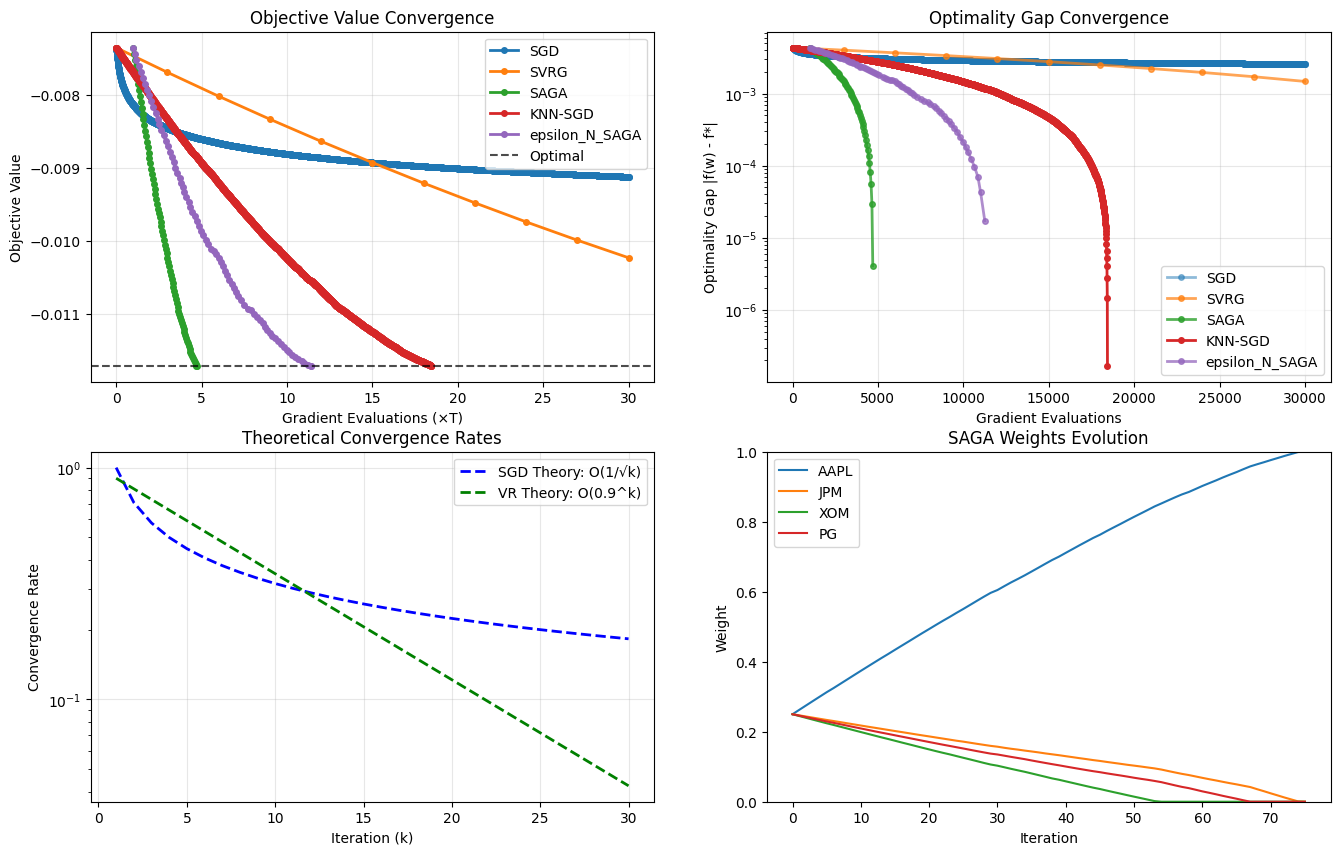

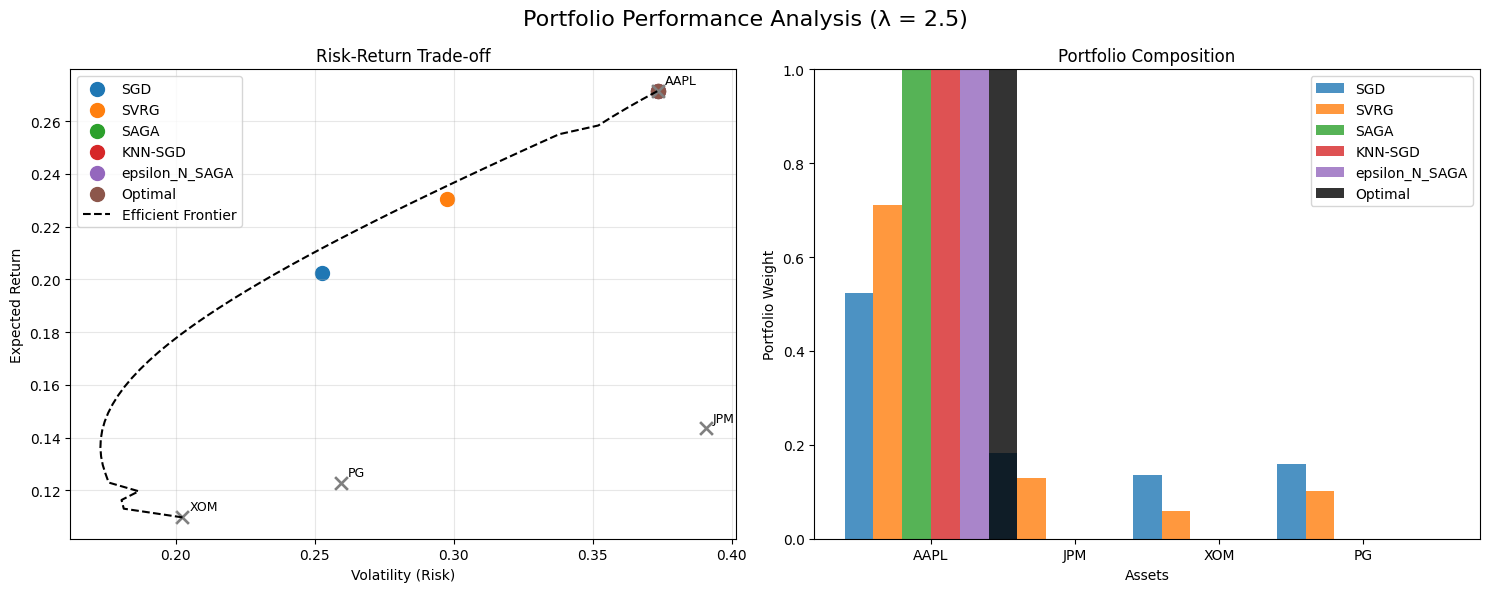


OPTIMIZATION DETAILS

Objective function: minimize 0.5 * w^T Σ w - λ * w^T μ
Risk aversion parameter (λ): 2.5

Ground truth (optimal) objective value: -0.011715

SGD:
  Final objective: -0.009126
  Optimality gap: 2.588779e-03
  Convergence time: 2.358 seconds
  Initial ||∇f||: 1.51e-02
  Final ||∇f||: 1.47e-02
  Gradient norm reduction: 1.0x

SVRG:
  Final objective: -0.010235
  Optimality gap: 1.479927e-03
  Convergence time: 0.569 seconds
  Initial ||∇f||: 1.51e-02
  Final ||∇f||: 1.44e-02
  Gradient norm reduction: 1.0x

SAGA:
  Final objective: -0.011715
  Optimality gap: 1.734723e-18
  Convergence time: 0.145 seconds
  Initial ||∇f||: 1.51e-02
  Final ||∇f||: 1.41e-02
  Gradient norm reduction: 1.1x

KNN-SGD:
  Final objective: -0.011715
  Optimality gap: 1.674825e-07
  Convergence time: 18.546 seconds
  Initial ||∇f||: 1.51e-02
  Final ||∇f||: 1.41e-02
  Gradient norm reduction: 1.1x

epsilon_N_SAGA:
  Final objective: -0.011715
  Optimality gap: 1.734723e-18
  Convergence time

/tmp/ipython-input-59-3938388358.py:215: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax1.boxplot(gap_data, labels=['SGD', 'SVRG', 'SAGA', 'KNN-SGD','epsilon_N_SAGA'])


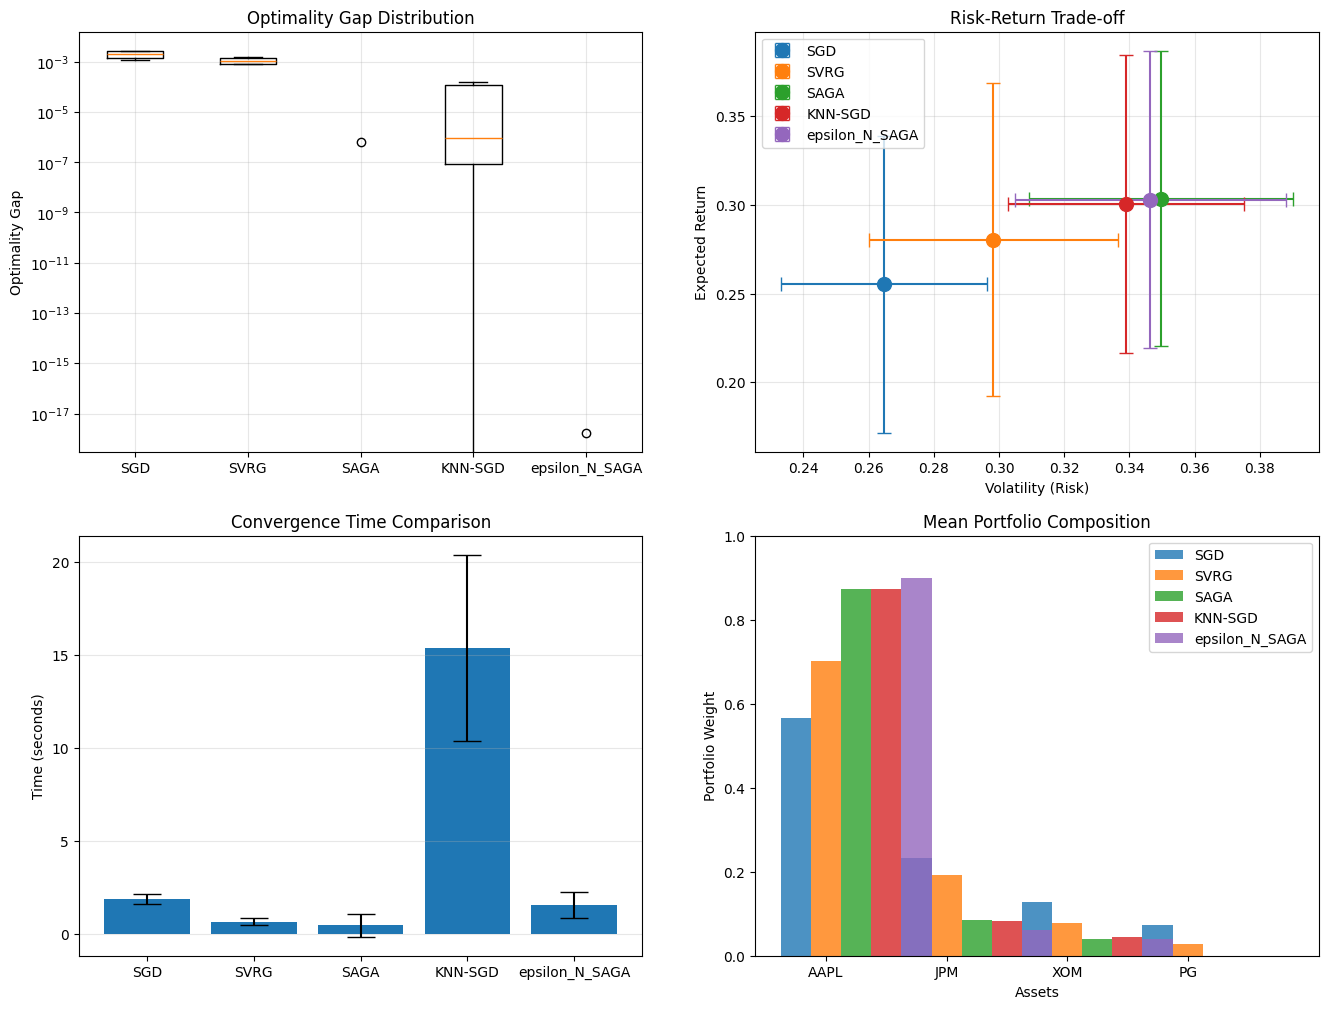

In [59]:
# Main execution
if __name__ == "__main__":
    np.random.seed(42)
    # Set parameters
    TICKERS = ['AAPL', 'JPM', 'XOM', 'PG'] # , 'MSFT', 'META', 'AMZN']
    START_DATE = '2000-01-01'
    END_DATE = '2024-01-01'
    T_SAMPLES = 1000
    N_BOOTSTRAP = 10  # Reduced for demo

    LAMBDA_RISK = 2.5

    # Initialize components
    print("Initializing portfolio optimizer...")
    optimizer = PortfolioOptimizer(n_assets=len(TICKERS), lambda_risk=LAMBDA_RISK)

    print("Fetching historical data...")
    simulator = DataSimulator(TICKERS, START_DATE, END_DATE)
    print("T_SAMPLES =")
    max_epochs = 10
    # print("\nGenerating bootstrap demo plots...")
    # simulator.plot_bootstrap_demo(n_demo_series=3, demo_length=500)
    # simulator.plot_block_structure_demo(demo_length=200)

    print("Generating bootstrap replications...")
    replications = simulator.generate_bootstrap_replications(B=N_BOOTSTRAP, T=T_SAMPLES)

    print("Running experiments...")
    runner = ExperimentRunner(optimizer)

    # Test different parameter settings
    print("\n" + "="*50)
    print("PARAMETER TUNING EXPERIMENT")
    print("="*50)

    # Try different parameters for each algorithm
    param_sets = {
        'conservative': {
            'SGD': {'eta0': 0.01, 'gamma': 0.1, 'max_iter': 10000},
            'SVRG': {'eta': 0.001, 'm': T_SAMPLES, 'max_epochs': 30},
            'SAGA': {'eta': 0.001, 'max_iter': 10000}
        },
        'moderate': {
            'SGD': {'eta0': 0.1, 'gamma': 0.01, 'max_iter': 30000},
            'SVRG': {'eta': 0.01, 'm': T_SAMPLES, 'max_epochs': 10},
            'SAGA': {'eta': 0.05, 'max_iter': 30000},
            'epsilon_N_SAGA':{'eta': 0.05, 'max_iter': 30000, 'epsilon': 0.01, 'q': 20},
            'KNN-SGD': {'k': 20, 'buffer_size': 500, 'alpha': 0.6, 'lr': 0.01, 'max_iter': 30000}
        },
        'aggressive': {
            'SGD': {'eta0': 0.1, 'gamma': 0.01, 'max_iter': 10 * T_SAMPLES},
            'SVRG': {'eta': 0.01, 'm': T_SAMPLES, 'max_epochs': 10},
            'SAGA': {'eta': 0.05, 'max_iter': 10 * T_SAMPLES},
            'epsilon_N_SAGA':{'eta': 0.05, 'max_iter': 10 * T_SAMPLES, 'epsilon': 0.01, 'q': 20},
            'KNN-SGD': {'k': 20, 'buffer_size': 500, 'alpha': 0.6, 'lr': 0.05, 'max_iter': 10 * T_SAMPLES}
        }
    }

    # Test with moderate parameters
    print("\nTesting with moderate parameters...")
    # MODIFIED: Pass target_obj and tol to the first single experiment run
    first_results = runner.run_single_experiment(
        replications[0],
        params=param_sets['moderate'],
        target_obj=runner.optimizer.objective_function(
            runner.optimizer.solve_deterministic(
                np.mean(replications[0], axis=0), np.cov(replications[0].T)
            ),
            np.mean(replications[0], axis=0), np.cov(replications[0].T)
        ),
        tol=1e-6
    )


    # Plot convergence with diagnostics
    runner.plot_convergence(TICKERS, first_results, "Convergence Comparison - Moderate Parameters")

    # Plot performance comparison
    runner.plot_performance_comparison(first_results, TICKERS)

    # Print optimization details
    print("\n" + "="*50)
    print("OPTIMIZATION DETAILS")
    print("="*50)
    print(f"\nObjective function: minimize 0.5 * w^T Σ w - λ * w^T μ")
    print(f"Risk aversion parameter (λ): {LAMBDA_RISK}")
    print(f"\nGround truth (optimal) objective value: {first_results['ground_truth']['objective']:.6f}")

    for algo in ['SGD', 'SVRG', 'SAGA', 'KNN-SGD', 'epsilon_N_SAGA']:
        if algo in first_results and first_results[algo]['history']['objective']:
            final_obj = first_results[algo]['history']['objective'][-1]
            gap = abs(final_obj - first_results['ground_truth']['objective'])
            print(f"\n{algo}:")
            print(f"  Final objective: {final_obj:.6f}")
            print(f"  Optimality gap: {gap:.6e}")
            print(f"  Convergence time: {first_results[algo]['history']['time'][-1]:.3f} seconds")

            if 'gradient_norms' in first_results[algo]['history']:
              grad_norms = first_results[algo]['history']['gradient_norms']
              if grad_norms:
                print(f"  Initial ||∇f||: {grad_norms[0]:.2e}")
                print(f"  Final ||∇f||: {grad_norms[-1]:.2e}")
                print(f"  Gradient norm reduction: {grad_norms[0]/grad_norms[-1]:.1f}x")

    # NEW: Gradient norm convergence analysis
    print("\n" + "="*50)
    print("GRADIENT NORM CONVERGENCE ANALYSIS")
    print("="*50)

     # Check theoretical convergence rates
    for algo in ['SGD', 'SVRG', 'SAGA', 'KNN-SGD', 'epsilon_N_SAGA']:
        if algo in first_results and 'gradient_norms' in first_results[algo]['history']:
            grad_norms = first_results[algo]['history']['gradient_norms']
            if len(grad_norms) > 2:
                # Estimate convergence rate
                log_norms = np.log(grad_norms[1:])  # Skip first one in case it's zero
                iterations = np.arange(1, len(grad_norms))

                # Fit linear regression to log(||∇f||) vs log(k) for SGD
                # or log(||∇f||) vs k for SVRG/SAGA
                if algo == 'SGD':
                    # For SGD: expect ||∇f|| ~ 1/√k
                    log_iterations = np.log(iterations)
                    slope = np.polyfit(log_iterations, log_norms, 1)[0]
                    print(f"\n{algo} convergence rate: ||∇f|| ~ k^{slope:.2f}")
                    print(f"  (Theory predicts: k^{-0.5} for SGD)")
                else:
                    # For SVRG/SAGA: expect ||∇f|| ~ ρ^k
                    if len(grad_norms) > 3:
                        # Estimate ρ from consecutive ratios
                        ratios = [grad_norms[i+1]/grad_norms[i] for i in range(len(grad_norms)-1) if grad_norms[i] > 0]
                        if ratios:
                            rho_estimate = np.mean(ratios)
                            print(f"\n{algo} convergence rate: ||∇f|| ~ {rho_estimate:.3f}^k")
                            print(f"  (Linear convergence with ρ ≈ {rho_estimate:.3f})")


    # Run all bootstrap experiments
    print("\nRunning bootstrap experiments...")
    all_results = runner.run_bootstrap_experiments(replications[:10])  # Reduced for demo

    print("(Gradient norm tracking enabled for first 3 replications only to save computation)")

    all_results = []
    for i, data in enumerate(replications[:10]):
        print(f"Running replication {i+1}/10")
        # Track gradient norms only for first 3 replications
        result = runner.run_single_experiment(
            data,
            algorithms=['SGD', 'SVRG', 'SAGA', 'KNN-SGD', 'epsilon_N_SAGA'],
            params=param_sets['moderate'],
            track_gradient_norms=(i < 3),  # Only track for first 3
            # MODIFIED: Pass target_obj and tol for stopping criterion
            target_obj=runner.optimizer.objective_function(
                runner.optimizer.solve_deterministic(
                    np.mean(data, axis=0), np.cov(data.T)
                ),
                np.mean(data, axis=0), np.cov(data.T)
            ),
            tol=1e-6
        )
        all_results.append(result)


    # Analyze results
    print("\nAnalyzing results...")
    summary = runner.analyze_results(all_results)

    # NEW: Analyze gradient norm statistics from tracked replications
    grad_norm_stats = {'SGD': [], 'SVRG': [], 'SAGA': [], 'KNN-SGD':[], 'epsilon_N_SAGA':[]}
    for i, result in enumerate(all_results[:3]):  # First 3 have gradient tracking
      for algo in ['SGD', 'SVRG', 'SAGA','KNN-SGD','epsilon_N_SAGA']:
        if algo in result and 'gradient_norms' in result[algo]['history']:
          final_norm = result[algo]['history']['gradient_norms'][-1]
          grad_norm_stats[algo].append(final_norm)

    # Print summary
    print("\n" + "="*50)
    print("SUMMARY RESULTS")
    print("="*50)

    for algo, stats in summary.items():
        print(f"\n{algo}:")
        print(f"  Optimization Performance:")
        print(f"    Mean objective: {stats['mean_objective']:.6f} ± {stats['std_objective']:.6f}")
        print(f"    Mean optimality gap: {stats['mean_gap']:.2e} ± {stats['std_gap']:.2e}")
        print(f"    Mean time: {stats['mean_time']:.3f} ± {stats['std_time']:.3f} seconds")
# NEW: Add gradient norm statistics
        if algo in grad_norm_stats and grad_norm_stats[algo]:
            mean_final_norm = np.mean(grad_norm_stats[algo])
            std_final_norm = np.std(grad_norm_stats[algo])
            print(f"    Mean final ||∇f||: {mean_final_norm:.2e} ± {std_final_norm:.2e}")

        print(f"  Portfolio Performance:")
        print(f"    Expected return: {stats['mean_return']:.4f} ± {stats['std_return']:.4f}")
        print(f"    Volatility: {stats['mean_volatility']:.4f} ± {stats['std_volatility']:.4f}")
        print(f"    Sharpe ratio: {stats['mean_sharpe']:.3f} ± {stats['std_sharpe']:.3f}")
        print(f"    Mean weights: {stats['weights_mean']}")

    # Create comprehensive comparison plots
    fig = plt.figure(figsize=(16, 12))

    # Plot 1: Optimality gaps boxplot
    ax1 = plt.subplot(2, 2, 1)
    gap_data = []
    for algo in ['SGD', 'SVRG', 'SAGA', 'KNN-SGD', 'epsilon_N_SAGA']:
        gaps = []
        for result in all_results[:5]:
            if algo in result and result[algo]['history']['objective']:
                final_obj = result[algo]['history']['objective'][-1]
                f_star = result['ground_truth']['objective']
                gaps.append(abs(final_obj - f_star))
        gap_data.append(gaps)

    ax1.boxplot(gap_data, labels=['SGD', 'SVRG', 'SAGA', 'KNN-SGD','epsilon_N_SAGA'])
    ax1.set_ylabel('Optimality Gap')
    ax1.set_title('Optimality Gap Distribution')
    ax1.set_yscale('log')
    ax1.grid(True, alpha=0.3)

    algorithms = list(summary.keys())
    mean_sharpes = [summary[algo]['mean_sharpe'] for algo in algorithms]
    std_sharpes = [summary[algo]['std_sharpe'] for algo in algorithms]

    # Plot 3: Expected Return vs Volatility
    ax2 = plt.subplot(2, 2, 2)
    for algo in algorithms:
        ax2.errorbar(summary[algo]['mean_volatility'],
                    summary[algo]['mean_return'],
                    xerr=summary[algo]['std_volatility'],
                    yerr=summary[algo]['std_return'],
                    fmt='o', markersize=10, label=algo, capsize=5)

    ax2.set_xlabel('Volatility (Risk)')
    ax2.set_ylabel('Expected Return')
    ax2.set_title('Risk-Return Trade-off')
    ax2.legend()
    ax2.grid(True, alpha=0.3)

    # Plot 4: Convergence time comparison
    ax3 = plt.subplot(2, 2, 3)
    mean_times = [summary[algo]['mean_time'] for algo in algorithms]
    std_times = [summary[algo]['std_time'] for algo in algorithms]

    bars = ax3.bar(algorithms, mean_times, yerr=std_times, capsize=10)
    ax3.set_ylabel('Time (seconds)')
    ax3.set_title('Convergence Time Comparison')
    ax3.grid(True, alpha=0.3, axis='y')

    # Plot 5: Portfolio weights comparison
    ax4 = plt.subplot(2, 2, 4)
    x = np.arange(len(TICKERS))
    width = 0.25

    for i, algo in enumerate(algorithms):
        weights = summary[algo]['weights_mean']
        ax4.bar(x + i*width, weights, width, label=algo, alpha=0.8)

    ax4.set_xlabel('Assets')
    ax4.set_ylabel('Portfolio Weight')
    ax4.set_title('Mean Portfolio Composition')
    ax4.set_xticks(x + width)
    ax4.set_xticklabels(TICKERS)
    ax4.legend()
    ax4.set_ylim([0, 1])

# KNN-SGD Algorithm Demo in Non-convex Optimization

In [ ]:
# cvar_optimizer.py
import numpy as np
import time
from collections import deque
from typing import Dict, Optional, Tuple, List

class CVaRPortfolioOptimizer:
    """
    Variance-reduction experiments for the CVaR risk objective.

    Parameters
    ----------
    n_assets : int
        Dimension of the portfolio weights w.
    alpha : float, optional
        Tail level (α = 0.95 means 95 % CVaR). Default 0.95.
    """

    # ---------- initialisation ------------------------------------------------
    def __init__(self, n_assets: int, alpha: float = .95) -> None:
        self.n_assets = n_assets
        self.alpha = alpha                                # CVaR tail level
        self.knn_buffer: deque = deque()
        self.knn_diagnostics: Dict[str, List] = {}

    # ---------- helpers -------------------------------------------------------
    @staticmethod
    def project_simplex(w: np.ndarray, non_negative: bool = True) -> np.ndarray:
        """Project onto the probability simplex (Σw = 1, w ≥ 0 iff non_negative)."""
        if non_negative:
            # Euclidean projection onto the simplex (O(d log d))
            u = np.sort(w)[::-1]
            cssv = np.cumsum(u)
            rho = np.nonzero(u * np.arange(1, len(w) + 1) > (cssv - 1))[0][-1]
            theta = (cssv[rho] - 1) / (rho + 1)
            return np.maximum(w - theta, 0.0)
        else:              # only budget constraint
            return w - (w.sum() - 1.0) / len(w)

    # ---------- CVaR objective and (sub-)gradients ----------------------------
    def _loss(self, w: np.ndarray, r: np.ndarray) -> float:
        """Portfolio loss: negative return ( minimise risk ⇒ maximise return )."""
        return -np.dot(w, r)

    def cvar_objective(self,
                       w: np.ndarray,
                       z: float,
                       returns: np.ndarray) -> float:
        """
        Rockafellar–Uryasev finite-sample CVaR.

        F(w, z) = z + 1/(1-α)·mean( max{0, L_i(w) - z} )
        """
        losses = -returns @ w
        hinge  = np.maximum(losses - z, 0.0)
        return z + hinge.mean() / (1.0 - self.alpha)

    def stochastic_gradient_cvar(self,
                                 w: np.ndarray,
                                 z: float,
                                 r_i: np.ndarray) -> Tuple[np.ndarray, float]:
        """
        Unbiased single-sample gradient of F(w, z).

        ∂F/∂w = 1/(1-α) · 1{L_i > z} · ∂L_i/∂w
        ∂F/∂z = 1 – 1/(1-α) · 1{L_i > z}
        """
        loss = self._loss(w, r_i)
        ind  = 1.0 if loss > z else 0.0
        fac  = ind / (1.0 - self.alpha)

        g_w  = fac * (-r_i)             # ∂L/∂w = -r_i
        g_z  = 1.0 - fac
        return g_w, g_z

    # ---------- SAGA for CVaR --------------------------------------------------
    def saga_cvar(self,
                  returns: np.ndarray,
                  eta_w: float = 0.02,
                  eta_z: float = 0.02,
                  max_iter: int = 5_000,
                  non_negative: bool = True,
                  track_history: bool = True) -> Dict:

        T, n = returns.shape
        w = np.ones(n) / n           # equal-weight start
        z = 0.0                      # start VaR at 0 (safe for centred returns)

        # ----------- initialise gradient table --------------------------------
        phi_w = np.zeros((T, n))
        phi_z = np.zeros(T)
        for t in range(T):
            phi_w[t], phi_z[t] = self.stochastic_gradient_cvar(w, z, returns[t])

        G_w = phi_w.mean(axis=0)
        G_z = phi_z.mean()

        # ----------- logging containers ---------------------------------------
        H = {'objective': [], 'grad_evals': [], 'time': [],
             'grad_raw_norm': [], 'grad_vr_norm': []}
        t0 = time.time()

        # log initial point
        if track_history:
            H['objective'].append(self.cvar_objective(w, z, returns))
            H['grad_evals'].append(T)         # cost of the table
            H['time'].append(0.0)

        # ----------- main loop -------------------------------------------------
        for k in range(max_iter):
            i = np.random.randint(T)

            # raw stochastic gradient
            u_w, u_z = self.stochastic_gradient_cvar(w, z, returns[i])
            if track_history:
                H['grad_raw_norm'].append(np.linalg.norm(
                    np.concatenate([u_w, [u_z]])))

            # variance-reduced gradient
            g_w = u_w - phi_w[i] + G_w
            g_z = u_z - phi_z[i] + G_z
            if track_history:
                H['grad_vr_norm'].append(np.linalg.norm(
                    np.concatenate([g_w, [g_z]])))

            # parameter update
            w -= eta_w * g_w
            z -= eta_z * g_z
            w  = self.project_simplex(w, non_negative)

            # table refresh
            G_w += (u_w - phi_w[i]) / T
            G_z += (u_z - phi_z[i]) / T
            phi_w[i], phi_z[i] = u_w, u_z

            # record
            if track_history and (k + 1) % 50 == 0:
                H['objective'].append(self.cvar_objective(w, z, returns))
                H['grad_evals'].append(T + k + 1)
                H['time'].append(time.time() - t0)

        return {'weights': w,
                'z': z,
                'history': H,
                'algorithm': 'SAGA-CVaR'}

    # ---------- KNN-SGD for CVaR ----------------------------------------------
    def knn_sgd_cvar(self,
                     returns: np.ndarray,
                     k: int = 50,
                     alpha_mix: float = .3,
                     lr_w: float = 0.01,
                     lr_z: float = 0.01,
                     buffer_size: int = 5_000,
                     max_iter: int = 10_000,
                     distance_metric: str = 'euclidean',
                     non_negative: bool = True,
                     track_history: bool = True) -> Dict:

        T, n = returns.shape
        w = np.ones(n) / n
        z = 0.0

        self.knn_buffer = deque(maxlen=buffer_size)
        self.knn_diagnostics = {key: [] for key in
                                ['knn_distances', 'grad_raw_norm',
                                 'grad_mixed_norm']}

        H = {'objective': [], 'grad_evals': [], 'time': [],
             'grad_raw_norm': [], 'grad_mixed_norm': []}
        t0 = time.time()

        if track_history:
            H['objective'].append(self.cvar_objective(w, z, returns))
            H['grad_evals'].append(0)
            H['time'].append(0.0)

        for k_it in range(max_iter):
            i = np.random.randint(T)
            g_w, g_z = self.stochastic_gradient_cvar(w, z, returns[i])
            if track_history:
                H['grad_raw_norm'].append(np.linalg.norm(
                    np.concatenate([g_w, [g_z]])))

            # ---------- neighbour reuse ---------------------------------------
            self.knn_buffer.append((w.copy(), z, g_w.copy(), g_z))
            if len(self.knn_buffer) > k:
                buf = list(self.knn_buffer)[:-1]     # exclude current
                params = np.array([np.concatenate([p[0], [p[1]]]) for p in buf])
                grads  = np.array([np.concatenate([p[2], [p[3]]]) for p in buf])

                w_vec = np.concatenate([w, [z]])
                if distance_metric == 'euclidean':
                    dists = np.linalg.norm(params - w_vec, axis=1)
                elif distance_metric == 'cosine':
                    normp = np.linalg.norm(params, axis=1) + 1e-8
                    dist  = 1.0 - (params @ w_vec) / (normp * (np.linalg.norm(w_vec) + 1e-8))
                    dists = dist
                idx   = np.argpartition(dists, k-1)[:k]
                g_bar = grads[idx].mean(axis=0)

                # mix current & neighbour gradient
                g_full = alpha_mix * np.concatenate([g_w, [g_z]]) \
                         + (1 - alpha_mix) * g_bar
                g_w_m, g_z_m = g_full[:-1], g_full[-1]

                # diagnostics
                if track_history:
                    H['grad_mixed_norm'].append(np.linalg.norm(g_full))
                    self.knn_diagnostics['knn_distances'].append(dists[idx].mean())
            else:      # buffer not ready
                g_w_m, g_z_m = g_w, g_z
                if track_history:
                    H['grad_mixed_norm'].append(np.linalg.norm(
                        np.concatenate([g_w_m, [g_z_m]])))

            # ---------- parameter update --------------------------------------
            w -= lr_w * g_w_m
            z -= lr_z * g_z_m
            w  = self.project_simplex(w, non_negative)

            # logging
            if track_history and (k_it + 1) % 50 == 0:
                H['objective'].append(self.cvar_objective(w, z, returns))
                H['grad_evals'].append(k_it + 1)
                H['time'].append(time.time() - t0)

        if track_history:
            H['knn_diagnostics'] = self.knn_diagnostics
        return {'weights': w,
                'z': z,
                'history': H,
                'algorithm': 'KNN-SGD-CVaR'}


/tmp/ipython-input-29-624894997.py:12: FutureWarning: YF.download() has changed argument auto_adjust default to True
  px = yf.download(tickers, start="2010-01-01", end="2024-01-01",


Avg gradient-norm variance:
  SAGA-CVaR :  38.88978016102356
  KNN-SGD   :  1.9297157633315738


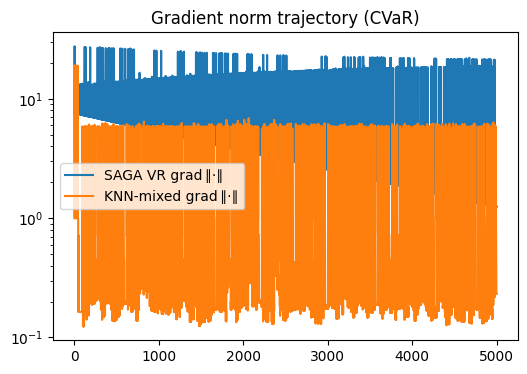

In [ ]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt

# 1) data -------------------------------------------------------------
tickers = ["AAPL", "MSFT", "META", "GOOGL", "AMZN", "NVDA",
           "JPM", "BAC", "KO", "PG", "XOM", "CVX",
           "UNH", "V", "MA", "HD", "COST", "LLY",
           "PEP", "TMO", "ADBE", "CSCO", "ORCL", "CRM",
           "WMT", "AVGO", "ABBV", "NKE", "MCD", "QCOM", "TXN", "UPS"]

px = yf.download(tickers, start="2010-01-01", end="2024-01-01",
                 progress=False)["Close"]
returns = px.pct_change().dropna().to_numpy()

# 2) optimiser --------------------------------------------------------
opt = CVaRPortfolioOptimizer(n_assets=len(tickers), alpha=0.95)

hist_saga = opt.saga_cvar(returns, eta_w=0.02, eta_z=0.02, max_iter=5000)
hist_knn  = opt.knn_sgd_cvar(returns, k=50, alpha_mix=0.3,
                             lr_w=0.01, lr_z=0.01, max_iter=5000)

# 3) variance-reduction summary ---------------------------------------
def avg_variance(grad_norms: List[float]) -> float:
    return np.var(grad_norms)

print("Avg gradient-norm variance:")
print("  SAGA-CVaR : ", avg_variance(hist_saga["history"]["grad_vr_norm"]))
print("  KNN-SGD   : ", avg_variance(hist_knn ["history"]["grad_mixed_norm"]))

# 4) quick figure ------------------------------------------------------
plt.figure(figsize=(6,4))
plt.semilogy(hist_saga["history"]["grad_vr_norm"], label="SAGA VR grad ∥·∥")
plt.semilogy(hist_knn ["history"]["grad_mixed_norm"], label="KNN-mixed grad ∥·∥")
plt.legend(); plt.title("Gradient norm trajectory (CVaR)"); plt.show()


# Least Squares

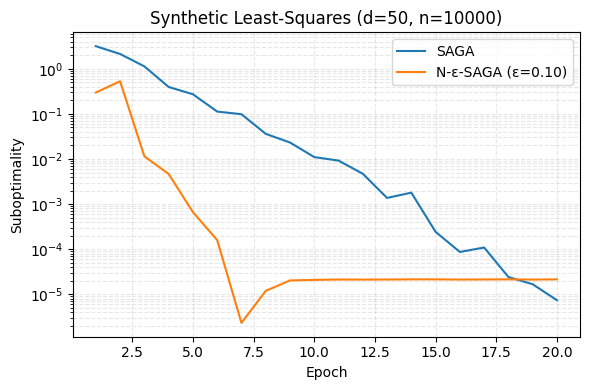

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

# assume PortfolioOptimizer is already in your namespace, but we'll
# monkey-patch its methods onto a lightweight LSQ class here
class LSQ:
    def __init__(self, X, y):
        self.X, self.y = X, y
        self.n, self.d = X.shape

    def f(self, w):
        r = self.X.dot(w) - self.y
        return 0.5 * np.dot(r, r) / self.n

    def grad_i(self, w, i):
        xi, yi = self.X[i], self.y[i]
        return (xi.dot(w) - yi) * xi

    def full_grad(self, w):
        r = self.X.dot(w) - self.y
        return self.X.T.dot(r) / self.n

# 1) generate synthetic least-squares data
np.random.seed(0)
n_samples, dim = 10000, 50
X = np.random.randn(n_samples, dim)
w_true = np.random.randn(dim)
y = X.dot(w_true) + 0.1 * np.random.randn(n_samples)

# 2) vanilla SAGA vs N-ε-SAGA on this LSQ task
oracle = LSQ(X, y)

def run_saga(eps_sharing=False, epsilon=0.1, q=50, eta=0.01, epochs=20):
    T, d = oracle.n, oracle.d
    w = np.zeros(d)

    # 1) precompute q‐nearest neighbors in feature space
    D = cdist(oracle.X, oracle.X, 'euclidean')
    neighs = np.argpartition(D, q+1, axis=1)[:, :q+1]
    # ensure self in neighborhood
    for i in range(T):
        if i not in neighs[i]:
            neighs[i, -1] = i

    # 2) initialize phi and G
    phi   = np.zeros((T, d))
    for i in range(T):
        phi[i] = oracle.grad_i(w, i)
    G     = phi.mean(axis=0)
    evals = T

    hist, grad_evals = [], []

    for epoch in range(1, epochs+1):
        for _ in range(T):
            i   = np.random.randint(T)
            g_i = oracle.grad_i(w, i)
            evals += 1

            # update
            w -= eta * (g_i - phi[i] + G)

            if eps_sharing:
                # share or recompute across true neighbors
                for j in neighs[i]:
                    old = phi[j].copy()
                    if j == i or np.linalg.norm(g_i - phi[j]) <= epsilon:
                        newg = g_i
                    else:
                        newg = oracle.grad_i(w, j)
                        evals += 1
                    phi[j] = newg
                    G += (newg - old) / T
            else:
                # vanilla SAGA
                G   += (g_i - phi[i]) / T
                phi[i] = g_i

        subopt = abs(oracle.f(w) - oracle.f(w_true))
        hist.append(subopt)
        grad_evals.append(evals)

    return np.array(hist), np.array(grad_evals)

# 3) run and plot
saga_hist, saga_e = run_saga(False)
neps_hist, neps_e = run_saga(True, epsilon=0.1, q=50)  # try ε on the order of your g‐norm

plt.figure(figsize=(6,4))
plt.semilogy(np.arange(1,21), saga_hist, label='SAGA')
plt.semilogy(np.arange(1,21), neps_hist, label=f'N-ε-SAGA (ε={0.1:.2f})')
plt.xlabel('Epoch')
plt.ylabel('Suboptimality')
plt.title('Synthetic Least‐Squares (d=50, n=10000)')
plt.grid(which='both', ls='--', alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()


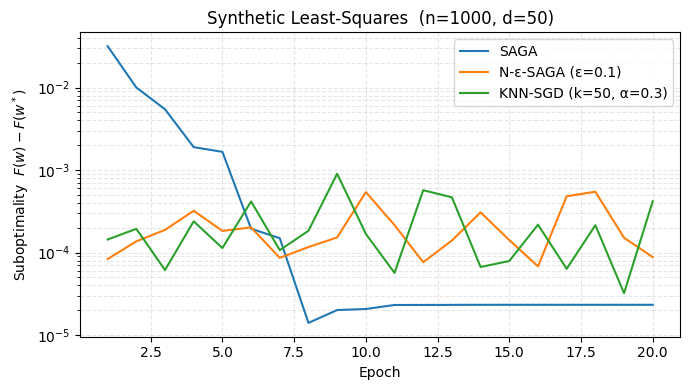

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

# assume PortfolioOptimizer is already in your namespace, but we'll
# monkey-patch its methods onto a lightweight LSQ class here
class LSQ:
    def __init__(self, X, y):
        self.X, self.y = X, y
        self.n, self.d = X.shape

    def f(self, w):
        r = self.X.dot(w) - self.y
        return 0.5 * np.dot(r, r) / self.n

    def grad_i(self, w, i):
        xi, yi = self.X[i], self.y[i]
        return (xi.dot(w) - yi) * xi

    def full_grad(self, w):
        r = self.X.dot(w) - self.y
        return self.X.T.dot(r) / self.n

# 1) generate synthetic least-squares data
np.random.seed(0)
n_samples, dim = 1000, 5
X = np.random.randn(n_samples, dim)
w_true = np.random.randn(dim)
y = X.dot(w_true) + 0.1 * np.random.randn(n_samples)

# 2) vanilla SAGA vs N-ε-SAGA on this LSQ task
oracle = LSQ(X, y)

def run_saga(eps_sharing=False, epsilon=0.1, q=50, eta=0.01, epochs=20):
    T, d = oracle.n, oracle.d
    w = np.zeros(d)

    # 1) precompute q‐nearest neighbors in feature space
    D = cdist(oracle.X, oracle.X, 'euclidean')
    neighs = np.argpartition(D, q+1, axis=1)[:, :q+1]
    # ensure self in neighborhood
    for i in range(T):
        if i not in neighs[i]:
            neighs[i, -1] = i

    # 2) initialize phi and G
    phi   = np.zeros((T, d))
    for i in range(T):
        phi[i] = oracle.grad_i(w, i)
    G     = phi.mean(axis=0)
    evals = T

    hist, grad_evals = [], []

    for epoch in range(1, epochs+1):
        for _ in range(T):
            i   = np.random.randint(T)
            g_i = oracle.grad_i(w, i)
            evals += 1

            # update
            w -= eta * (g_i - phi[i] + G)

            if eps_sharing:
                # share or recompute across true neighbors
                for j in neighs[i]:
                    old = phi[j].copy()
                    if j == i or np.linalg.norm(g_i - phi[j]) <= epsilon:
                        newg = g_i
                    else:
                        newg = oracle.grad_i(w, j)
                        evals += 1
                    phi[j] = newg
                    G += (newg - old) / T
            else:
                # vanilla SAGA
                G   += (g_i - phi[i]) / T
                phi[i] = g_i

        subopt = abs(oracle.f(w) - oracle.f(w_true))
        hist.append(subopt)
        grad_evals.append(evals)

    return np.array(hist), np.array(grad_evals)

def run_knn_sgd(k=25,                # number of neighbours
                buffer_size=500,     # how many past (w,g) to keep
                alpha=0.6,           # mixing weight
                eta=0.01,            # learning rate (constant)
                epochs=20):
    T, d = oracle.n, oracle.d
    w = np.zeros(d)

    # rolling buffer of (w, g) pairs
    buf = deque(maxlen=buffer_size)

    hist, grad_evals = [], []
    evals = 0

    for epoch in range(1, epochs+1):
        for _ in range(T):
            i = np.random.randint(T)
            g_raw = oracle.grad_i(w, i)
            evals += 1

            # store current state in buffer
            buf.append((w.copy(), g_raw.copy()))

            # KNN mixing -------------------------------------------
            if len(buf) > k:
                w_buf  = np.vstack([p[0] for p in buf])      # shape (B, d)
                g_buf  = np.vstack([p[1] for p in buf])      # shape (B, d)

                # Euclidean distance in *parameter* space
                dists  = np.linalg.norm(w_buf - w, axis=1)
                idx    = np.argpartition(dists, k)[:k]       # indices of k NNs

                g_mean = g_buf[idx].mean(axis=0)
                g_use  = alpha * g_raw + (1 - alpha) * g_mean
            else:
                g_use = g_raw
            # ------------------------------------------------------

            w -= eta * g_use      # gradient step

        subopt = abs(oracle.f(w) - oracle.f(w_true))
        hist.append(subopt)
        grad_evals.append(evals)

    return np.array(hist), np.array(grad_evals)


# 3) run and plot
saga_hist, saga_e = run_saga(False)
neps_hist, neps_e = run_saga(True, epsilon=1, q=50)  # try ε on the order of your g‐norm
knn_hist , knn_e = run_knn_sgd(k=50, buffer_size=500,
                                  alpha=0.3, eta=0.1, epochs=20)

plt.figure(figsize=(7,4))
epochs_grid = np.arange(1,21)

plt.semilogy(epochs_grid, saga_hist, label='SAGA')
plt.semilogy(epochs_grid, neps_hist, label='N-ε-SAGA (ε=0.1)')
plt.semilogy(epochs_grid, knn_hist, label='KNN-SGD (k=50, α=0.3)')

plt.xlabel('Epoch')
plt.ylabel('Suboptimality  $F(w)-F(w^*)$')
plt.title('Synthetic Least-Squares  (n=1000, d=50)')
plt.grid(which='both', ls='--', alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

# Chapter 3: Convex Portfolio Optimization - SAGA/SVRG/SGD

In [7]:
# Parameter-space KNN optimizer
class PortfolioOptimizer:
    def __init__(self, n_assets: int, lambda_risk: float = 1.0):
        """
        Initialize portfolio optimizer.

        Args:
            n_assets: Number of assets in the portfolio
            lambda_risk: Risk aversion parameter (λ > 0)
        """

        self.n_assets = n_assets
        self.lambda_risk = lambda_risk

        # KNN-SGD specific attributes
        self.knn_buffer = None
        self.knn_diagnostics = None

    def objective_function(self, w: np.ndarray, mu: np.ndarray, Sigma: np.ndarray) -> float:
        """
        Compute the penalized mean-variance objective: f(w) = 0.5 * w^T Σ w - λ w^T μ

        Args:
            w: Portfolio weights
            mu: Expected returns vector
            Sigma: Covariance matrix

        Returns:
            Objective value
        """
        return 0.5 * w.T @ Sigma @ w - self.lambda_risk * w.T @ mu

    def gradient(self, w: np.ndarray, mu: np.ndarray, Sigma: np.ndarray) -> np.ndarray:
        """
        Compute gradient of the objective: ∇f(w) = Σw - λμ

        Args:
            w: Portfolio weights
            mu: Expected returns vector
            Sigma: Covariance matrix

        Returns:
            Gradient vector
        """
        return Sigma @ w - self.lambda_risk * mu

    def stochastic_gradient(self, w: np.ndarray, r_t: np.ndarray, mu_hat: np.ndarray, noise_scale: float = 0.1,
                            rng: np.random.Generator = np.random) -> np.ndarray:
        """
        Compute stochastic gradient using single return sample.
        ∇f_t(w) = (w^T(r_t - μ̂))(r_t - μ̂) - λμ̂

        Args:
            w: Portfolio weights
            r_t: Return sample
            mu_hat: Estimated expected returns

        Returns:
            Stochastic gradient
        """

        centered_return = r_t - mu_hat
        return (w.T @ centered_return) * centered_return - self.lambda_risk * mu_hat



    def project_simplex(self, w: np.ndarray, non_negative: bool = True) -> np.ndarray:
        """
        Project weights onto the simplex: Σw_i = 1, w_i ≥ 0 (optional).

        Args:
            w: Weights to project
            non_negative: If True, enforce w_i ≥ 0

        Returns:
            Projected weights
        """
        if non_negative:
            # Project onto probability simplex
            n = len(w)
            u = np.sort(w)[::-1]
            cssv = np.cumsum(u)
            rho = np.nonzero(u * np.arange(1, n + 1) > (cssv - 1))[0][-1]
            theta = float(cssv[rho] - 1) / (rho + 1)
            return np.maximum(w - theta, 0)
        else:
            # Just normalize to sum to 1
            return w / np.sum(w)

    def sgd(self, returns: np.ndarray,
            eta0: float = 0.01,
            gamma: float = 0.1,
            max_iter: int = 1000,
            non_negative: bool = True,
            track_history: bool = True,
            track_gradient_norms: bool = True,
            target_obj: Optional[float] = None,  # Added target_obj
            tol: float = 1e-6) -> Dict: # Added tolerance
        """
        Stochastic Gradient Descent implementation.

        Args:
            returns: T x n array of return samples
            eta0: Initial learning rate
            gamma: Learning rate decay parameter
            max_iter: Maximum iterations
            non_negative: Enforce non-negative weights
            track_history: Track objective history
            track_gradient_norms: Track gradient norms
            target_obj: The target optimal objective value for stopping
            tol: Tolerance for the optimality gap

        Returns:
            Dictionary with solution and history
        """
        T, n = returns.shape
        mu_hat = np.mean(returns, axis=0)
        Sigma_hat = np.cov(returns.T)

        # Initialize weights
        w = np.ones(n) / n

        history = {'objective': [], 'weights': [], 'time': [], 'grad_evals': [],
                   'gradient_norms':[], 'stochastic_gradient_norms':[]}
        start_time = time.time()

        # Track initial objective
        if track_history:
            obj_val = self.objective_function(w, mu_hat, Sigma_hat)
            history['objective'].append(obj_val)
            history['weights'].append(w.copy())
            history['time'].append(0)
            history['grad_evals'].append(0)
            if track_gradient_norms:
              true_grad = self.gradient(w, mu_hat, Sigma_hat)
              history['gradient_norms'].append(np.linalg.norm(true_grad))

        # Track best solution
        best_w = w.copy()
        best_obj = self.objective_function(w, mu_hat, Sigma_hat)

        for k in range(max_iter):
            # Sample random index
            t = np.random.randint(0, T)

            # Compute stochastic gradient
            g_k = self.stochastic_gradient(w, returns[t], mu_hat)

            if track_gradient_norms and k%10 == 0:
              history['stochastic_gradient_norms'].append(np.linalg.norm(g_k))

            # Update with diminishing step size
            eta_k = eta0 / (1 + gamma * k)
            w = w - eta_k * g_k

            # Project onto feasible set
            w = self.project_simplex(w, non_negative)

            # Update best solution
            if k % 1 == 0:
                current_obj = self.objective_function(w, mu_hat, Sigma_hat)
                if current_obj < best_obj:
                    best_obj = current_obj
                    best_w = w.copy()

            # Track history and check stopping criterion
            if track_history and (k + 1) % 10 == 0:
                obj_val = self.objective_function(w, mu_hat, Sigma_hat)
                history['objective'].append(obj_val)
                history['weights'].append(w.copy())
                history['time'].append(time.time() - start_time)
                history['grad_evals'].append(k + 1)
                if track_gradient_norms and (k + 1)%100 == 0:
                  true_grad = self.gradient(w, mu_hat, Sigma_hat)
                  history['gradient_norms'].append(np.linalg.norm(true_grad))

                # Check stopping criterion
                if target_obj is not None:
                    gap = abs(obj_val - target_obj)
                    if gap < tol:
                        print(f"SGD stopping early at iteration {k+1} due to optimality gap {gap:.2e} < tol {tol:.2e}.")
                        break


        # Final evaluation (after loop potentially breaks early)
        if track_history:
            # Use the last computed weights for final evaluation if early stopping occurred,
            # otherwise use the best_w found during the full max_iter.
            final_w = w if (k + 1) < max_iter else best_w
            obj_val = self.objective_function(final_w, mu_hat, Sigma_hat)
            history['objective'].append(obj_val)
            history['weights'].append(final_w.copy())
            history['time'].append(time.time() - start_time)
            history['grad_evals'].append(k + 1) # Record final iteration count
            if track_gradient_norms:
              true_grad = self.gradient(final_w, mu_hat, Sigma_hat)
              history['gradient_norms'].append(np.linalg.norm(true_grad))

        return {
            'weights': final_w, # Return the final weights after potential early stopping
            'history': history,
            'algorithm': 'SGD',
            'mu_hat': mu_hat,
            'Sigma_hat': Sigma_hat
        }

    def svrg(self, returns: np.ndarray,
             eta: float = 0.1,
             m: Optional[int] = None,
             max_epochs: int = 50,
             non_negative: bool = True,
             track_history: bool = True,
             track_gradient_norms: bool = True,
             target_obj: Optional[float] = None,
             tol: float = 1e-6,
             inner_check: Optional[int] = None) -> Dict:
        """
        Stochastic Variance-Reduced Gradient implementation.

        Args:
            returns: T x n array of return samples
            eta: Learning rate (constant)
            m: Inner loop length (default: 2T)
            max_epochs: Maximum epochs
            non_negative: Enforce non-negative weights
            track_history: Track objective history
            track_gradient_norms: Track gradient norms
            target_obj: The target optimal objective value for stopping
            tol: Tolerance for the optimality gap

        Returns:
            Dictionary with solution and history
        """
        T, n = returns.shape
        mu_hat = np.mean(returns, axis=0)
        Sigma_hat = np.cov(returns.T)

        if m is None:
            m = T

        if inner_check is None or inner_check <= 0:
            inner_check = m + 1

        # Initialize
        w_tilde = np.ones(n) / n

        history = {'objective': [], 'weights': [], 'time': [], 'grad_evals': [],
                   'gradient_norms':[], 'stochastic_gradient_norms':[]}
        start_time = time.time()
        grad_count = 0

        # Track initial objective
        if track_history:
            obj_val = self.objective_function(w_tilde, mu_hat, Sigma_hat)
            history['objective'].append(obj_val)
            history['weights'].append(w_tilde.copy())
            history['time'].append(0)
            history['grad_evals'].append(0)

            if track_gradient_norms:
              true_grad = self.gradient(w_tilde, mu_hat, Sigma_hat)
              history['gradient_norms'].append(np.linalg.norm(true_grad))

        # Check initial gap for early exit
        if target_obj is not None:
          gap0 = abs(history['objective'][-1] - target_obj)
          if gap0 < tol:
            print(f"SVRG stopping early at epoch 0 due to optimality gap {gap0:.2e} < tol {tol:.2e}.")
            return {
                'weights': w_tilde,
                'history': history,
                'algorithm': 'SVRG',
                'mu_hat': mu_hat,
                'Sigma_hat': Sigma_hat
            }


        for s in range(max_epochs):
            # Compute full gradient at reference point
            mu_tilde = self.gradient(w_tilde, mu_hat, Sigma_hat)
            grad_count += T  # Full gradient computation

            # Inner loop
            w = w_tilde.copy()
            epoch_gradient_norms = []

            for j in range(m):
                # Sample random index
                t = np.random.randint(0, T)

                # Compute variance-reduced gradient
                g_current = self.stochastic_gradient(w, returns[t], mu_hat)
                g_reference = self.stochastic_gradient(w_tilde, returns[t], mu_hat)
                g = g_current - g_reference + mu_tilde
                # Changed from 2 to 1, REVISIT
                grad_count += 2  # Two gradient evaluations

                if track_gradient_norms and j%10 == 0:
                  epoch_gradient_norms.append(np.linalg.norm(g))

                # Update
                w = w - eta * g

                # Project
                w = self.project_simplex(w, non_negative)

                # Optional inner check for convergence (can accelerate if target is known)
                if (j + 1)% inner_check == 0 and target_obj is not None:
                    obj_inner = self.objective_function(w, mu_hat, Sigma_hat)
                    gap_inner = abs(obj_inner - target_obj)
                    if gap_inner < tol:
                      print(f"SVRG stopping early in inner loop of epoch {s+1} (iter {j+1}) due to optimality gap {gap_inner:.2e} < tol {tol:.2e}.")
                      w_tilde = w.copy() # Update reference point before returning
                      # Track final history point before returning
                      if track_history:
                          obj_val = self.objective_function(w_tilde, mu_hat, Sigma_hat)
                          history['objective'].append(obj_val)
                          history['weights'].append(w_tilde.copy())
                          history['time'].append(time.time() - start_time)
                          history['grad_evals'].append(grad_count)
                          if track_gradient_norms:
                            true_grad = self.gradient(w_tilde, mu_hat, Sigma_hat)
                            history['gradient_norms'].append(np.linalg.norm(true_grad))
                      return {
                          'weights': w_tilde,
                          'history': history,
                          'algorithm': 'SVRG',
                          'mu_hat': mu_hat,
                          'Sigma_hat': Sigma_hat
                      }


            # Update reference point (Option 1: final iterate)
            w_tilde = w.copy()

            if track_gradient_norms and epoch_gradient_norms:
              history['stochastic_gradient_norms'].append(np.mean(epoch_gradient_norms))

            # Track history and check stopping criterion at the end of epoch
            if track_history:
                obj_val = self.objective_function(w_tilde, mu_hat, Sigma_hat)
                history['objective'].append(obj_val)
                history['weights'].append(w_tilde.copy())
                history['time'].append(time.time() - start_time)
                history['grad_evals'].append(grad_count)
                if track_gradient_norms:
                  true_grad = self.gradient(w_tilde, mu_hat, Sigma_hat)
                  history['gradient_norms'].append(np.linalg.norm(true_grad))

                if target_obj is not None:
                  gap_epoch = abs(history['objective'][-1] - target_obj)
                  if gap_epoch < tol:
                    print(f"SVRG stopping early at end of epoch {s+1} due to optimality gap {gap_epoch:.2e} < tol {tol:.2e}.")
                    break

            # Check convergence (alternative criterion, not based on target_obj)
            #if s > 0 and len(history['objective']) > 1:
            #    if abs(history['objective'][-1] - history['objective'][-2]) < 1e-8:
            #        break

        # Final evaluation (after loop potentially breaks early)
        # History is already tracked at the end of each epoch, so the last point is the final one
        return {
            'weights': w_tilde, # Return the final weights after potential early stopping
            'history': history,
            'algorithm': 'SVRG',
            'mu_hat': mu_hat,
            'Sigma_hat': Sigma_hat
        }


    def saga(self, returns: np.ndarray,
             eta: float = 0.01,
             max_iter: int = 5000,
             non_negative: bool = True,
             track_history: bool = True,
             track_gradient_norms: bool = True,
             target_obj: Optional[float] = None,  # Added target_obj
             tol: float = 1e-6) -> Dict: # Added tolerance
        """
        SAGA implementation.

        Args:
            returns: T x n array of return samples
            eta: Learning rate (constant)
            max_iter: Maximum iterations
            non_negative: Enforce non-negative weights
            track_history: Track objective history
            track_gradient_norms: Track gradient norms
            target_obj: The target optimal objective value for stopping
            tol: Tolerance for the optimality gap

        Returns:
            Dictionary with solution and history
        """
        T, n = returns.shape
        mu_hat = np.mean(returns, axis=0)
        Sigma_hat = np.cov(returns.T)

        # Initialize
        w = np.ones(n) / n

        # Initialize gradient table
        phi = np.zeros((T, n))
        for t in range(T):
            phi[t] = self.stochastic_gradient(w, returns[t], mu_hat)

        # Compute initial average
        G = np.mean(phi, axis=0)

        history = {'objective': [], 'weights': [], 'time': [], 'grad_evals': [],
                   'gradient_norms':[], 'stochastic_gradient_norms':[]}
        start_time = time.time()
        grad_evals_total = 0
        # Track initial objective
        if track_history:
            obj_val = self.objective_function(w, mu_hat, Sigma_hat)
            history['objective'].append(obj_val)
            history['weights'].append(w.copy())
            history['time'].append(0)
            history['grad_evals'].append(0)  # Initial gradient table computation
            if track_gradient_norms:
              true_grad = self.gradient(w, mu_hat, Sigma_hat)
              history['gradient_norms'].append(np.linalg.norm(true_grad))

        # Check initial gap for early exit
        if target_obj is not None:
            gap0 = abs(history['objective'][-1] - target_obj)
            if gap0 < tol:
                print(f"SAGA stopping early at iteration 0 due to optimality gap {gap0:.2e} < tol {tol:.2e}.")
                return {
                    'weights': w,
                    'history': history,
                    'algorithm': 'SAGA',
                    'mu_hat': mu_hat,
                    'Sigma_hat': Sigma_hat
                }


        for k in range(max_iter):
            # Sample random index
            t = np.random.randint(0, T)

            # Compute current gradient
            u = self.stochastic_gradient(w, returns[t], mu_hat)

            # Form variance-reduced gradient
            g = u - phi[t] + G

            # Update weights
            w = w - eta * g

            # Project
            w = self.project_simplex(w, non_negative)

            # Update table and average
            G = G + (u - phi[t]) / T
            phi[t] = u.copy()

            grad_evals_total += 1

            # Track history and check stopping criterion
            if track_history and (k + 1) % 50 == 0: # Check every 50 iterations
                current_obj = self.objective_function(w, mu_hat, Sigma_hat)
                history['objective'].append(current_obj)
                history['weights'].append(w.copy())
                history['time'].append(time.time() - start_time)
                history['grad_evals'].append(grad_evals_total)

                if track_gradient_norms and (k + 1)% 500 == 0:
                  true_grad = self.gradient(w, mu_hat, Sigma_hat)
                  history['gradient_norms'].append(np.linalg.norm(true_grad))

                # Check stopping criterion
                if target_obj is not None:
                    gap = abs(current_obj - target_obj)
                    if gap < tol:
                        print(f"SAGA stopping early at iteration {k+1} due to optimality gap {gap:.2e} < tol {tol:.2e}.")
                        break


        # Final evaluation (after loop potentially breaks early)
        if track_history and (k + 1) % 50 != 0: # Ensure last point is recorded if not already
            obj_val = self.objective_function(w, mu_hat, Sigma_hat)
            history['objective'].append(obj_val)
            history['weights'].append(w.copy())
            history['time'].append(time.time() - start_time)
            history['grad_evals'].append(T + k + 1) # Record final iteration count

            if track_gradient_norms and (k + 1)% 500 != 0:
              true_grad = self.gradient(w, mu_hat, Sigma_hat)
              history['gradient_norms'].append(np.linalg.norm(true_grad))


        return {
            'weights': w, # Return the final weights after potential early stopping
            'history': history,
            'algorithm': 'SAGA',
            'mu_hat': mu_hat,
            'Sigma_hat': Sigma_hat
        }


    def compute_portfolio_metrics(self, w: np.ndarray, mu: np.ndarray,
                                Sigma: np.ndarray) -> Dict:
        """
        Compute portfolio performance metrics.

        Args:
            w: Portfolio weights
            mu: Expected returns
            Sigma: Covariance matrix

        Returns:
            Dictionary of metrics
        """
        # TEST: Annualized Returns
        f = 252

        # Expected return
        expected_return = w.T @ mu
        expected_return *= f

        # Portfolio variance and standard deviation (risk)
        variance = w.T @ Sigma @ w
        std_dev = np.sqrt(variance)
        std_dev *= np.sqrt(f)

        # Sharpe ratio (assuming risk-free rate = 0)
        sharpe_ratio = expected_return / std_dev if std_dev > 0 else 0

        # Maximum weight (concentration measure)
        max_weight = np.max(w)

        # Effective number of assets (inverse HHI)
        hhi = np.sum(w**2)
        eff_n_assets = 1 / hhi if hhi > 0 else len(w)

        return {
            'expected_return': expected_return,
            'volatility': std_dev,
            'variance': variance,
            'sharpe_ratio': sharpe_ratio,
            'max_weight': max_weight,
            'effective_n_assets': eff_n_assets,
            'weights': w
        }

    def solve_deterministic(self, mu: np.ndarray, Sigma: np.ndarray,
                          non_negative: bool = True) -> np.ndarray:
        """
        Solve using deterministic quadratic programming for ground truth.

        Args:
            mu: Expected returns
            Sigma: Covariance matrix
            non_negative: Enforce non-negative weights

        Returns:
            Optimal weights
        """
        n = len(mu)

        # Objective: minimize 0.5 * w^T Σ w - λ w^T μ
        def obj(w):
            return self.objective_function(w, mu, Sigma)

        def grad(w):
            return self.gradient(w, mu, Sigma)

        # Constraints
        constraints = [{'type': 'eq', 'fun': lambda w: np.sum(w) - 1}]

        # Bounds
        bounds = [(0, 1) for _ in range(n)] if non_negative else [(None, None) for _ in range(n)]

        # Initial guess
        w0 = np.ones(n) / n

        # Solve
        result = minimize(obj, w0, method='SLSQP', jac=grad,
                         bounds=bounds, constraints=constraints)

        return result.x

In [8]:
np.random.seed(42)
class DataSimulator:
    """
    Simulate return data using bootstrap methods.
    """

    def __init__(self, tickers: List[str], start_date: str, end_date: str):
        """
        Initialize data simulator.

        Args:
            tickers: List of asset tickers
            start_date: Start date for historical data
            end_date: End date for historical data
        """
        self.tickers = tickers
        self.start_date = start_date
        self.end_date = end_date
        self.returns = None

    def fetch_data(self):
        """Fetch historical data and compute returns."""
        # Download price data
        data = yf.download(self.tickers, start=self.start_date, end=self.end_date, auto_adjust=False)['Adj Close'] #INTERVAL

        # TEST: simple returns
        self.returns = data.pct_change().dropna().values
        # Compute log returns
        # self.returns = np.log(data / data.shift(1)).dropna().values

        return self.returns

    def block_bootstrap(self, n_samples: int, block_size: Optional[int] = None) -> np.ndarray:
        """
        Block bootstrap for time series data.

        Args:
            n_samples: Number of samples to generate
            block_size: Block size (default: T^(1/3))

        Returns:
            Bootstrapped returns
        """
        if self.returns is None:
            self.fetch_data()

        T, n_assets = self.returns.shape

        if block_size is None:
            block_size = int(np.ceil(T ** (1/3)))

        # Number of blocks needed
        n_blocks = int(np.ceil(n_samples / block_size))

        # Generate bootstrapped data
        bootstrapped = []

        for _ in range(n_blocks):
            # Random starting point
            start_idx = np.random.randint(0, T - block_size + 1)
            block = self.returns[start_idx:start_idx + block_size]
            bootstrapped.append(block)

        bootstrapped = np.vstack(bootstrapped)[:n_samples]

        return bootstrapped

    def generate_bootstrap_replications(self, B: int = 100, T: int = 1000) -> List[np.ndarray]:
        """
        Generate B bootstrap replications.

        Args:
            B: Number of bootstrap replications
            T: Length of each replication

        Returns:
            List of bootstrapped return arrays
        """
        replications = []

        for _ in range(B):
            boot_data = self.block_bootstrap(T)
            replications.append(boot_data)

        return replications


In [9]:
class ExperimentRunner:
    """
    Run experiments and analyze results.
    """

    def __init__(self, optimizer: PortfolioOptimizer):
        self.optimizer = optimizer
        self.results = {}

    def run_single_experiment(self, returns: np.ndarray,
                            algorithms: List[str] = ['SGD', 'SVRG', 'SAGA'],
                            params: Optional[Dict] = None,
                            track_gradient_norms: bool = True,
                            target_obj: Optional[float] = None,
                            tol: float = 1e-6) -> Dict:
        """
        Run all algorithms on a single dataset.

        Args:
            returns: Return data
            algorithms: List of algorithms to run
            params: Algorithm parameters
            track_gradient_norms: Track gradient norms
            target_obj: The target optimal objective value for stopping
            tol: Tolerance for the optimality gap


        Returns:
            Results dictionary
        """
        if params is None:
            params = {
                'SGD': {'eta0': 0.1, 'gamma': 0.01, 'max_iter': 10000},
                'SVRG': {'eta': 0.01, 'm': None, 'max_epochs': 100},
                'SAGA': {'eta': 0.05, 'max_iter': 10000}

            }

        results = {}
        f = 252
        # Get ground truth
        mu_hat = np.mean(returns, axis=0)
        Sigma_hat = np.cov(returns.T)
        w_star = self.optimizer.solve_deterministic(mu_hat, Sigma_hat)
        f_star = self.optimizer.objective_function(w_star, mu_hat, Sigma_hat)
        results['ground_truth'] = {
                'weights': w_star,
                'objective': f_star
            }
        results['T'] = returns.shape[0]


        # Run algorithms
        if 'SGD' in algorithms:
            sgd_params = params['SGD'].copy()
            sgd_params['track_gradient_norms'] = track_gradient_norms
            # Pass target_obj and tol to algorithm
            sgd_params['target_obj'] = target_obj
            sgd_params['tol'] = tol
            results['SGD'] = self.optimizer.sgd(returns, **sgd_params)

        if 'SVRG' in algorithms:
            T = returns.shape[0]
            # MODIFIED: Calculate SVRG budget based on SVRG parameters
            m_val = params['SVRG']['m'] if params['SVRG']['m'] is not None else T
            svrg_epochs = params['SVRG']['max_epochs'] # Use the specified max_epochs for SVRG

            print(f"SVRG settings: m={m_val}, epochs={svrg_epochs}")

            svrg_params = params['SVRG'].copy()
            svrg_params['track_gradient_norms'] = track_gradient_norms
            # Pass target_obj and tol to algorithm
            svrg_params['target_obj'] = target_obj
            svrg_params['tol'] = tol


            results['SVRG'] = self.optimizer.svrg(
          returns,
          eta=params['SVRG']['eta'],
          m=m_val,
          max_epochs=svrg_epochs,
          non_negative=True,
          track_history=True,
          target_obj=svrg_params['target_obj'], # Pass from svrg_params
          tol=svrg_params['tol'], # Pass from svrg_params
          inner_check=None)

        if 'SAGA' in algorithms:
            saga_params = params['SAGA'].copy()
            saga_params['track_gradient_norms'] = track_gradient_norms
             # Pass target_obj and tol to algorithm
            saga_params['target_obj'] = target_obj
            saga_params['tol'] = tol
            results['SAGA'] = self.optimizer.saga(returns, **saga_params)


    def run_bootstrap_experiments(self, replications: List[np.ndarray],
                                algorithms: List[str] = ['SGD', 'SVRG', 'SAGA',
                                            ]) -> Dict:
        """
        Run experiments on all bootstrap replications.

        Args:
            replications: List of bootstrap datasets
            algorithms: Algorithms to test

        Returns:
            Aggregated results
        """
        all_results = []

        for i, data in enumerate(replications):
            print(f"Running replication {i+1}/{len(replications)}")
            # Calculate ground truth for the current replication to use as target_obj
            mu_repl = np.mean(data, axis=0)
            Sigma_repl = np.cov(data.T)
            w_star_repl = self.optimizer.solve_deterministic(mu_repl, Sigma_repl)
            f_star_repl = self.optimizer.objective_function(w_star_repl, mu_repl, Sigma_repl)

            results = self.run_single_experiment(
                data,
                algorithms,
                track_gradient_norms=(i < 3), # Track gradient norms for first 3
                # Pass target_obj and tol to single experiment run
                target_obj=f_star_repl,
                tol=1e-6 # Use a tolerance of 1e-6
                )
            all_results.append(results)

        return all_results

    def analyze_results(self, all_results: List[Dict]) -> Dict:
        """
        Analyze and summarize experimental results.

        Args:
            all_results: List of results from all replications

        Returns:
            Summary statistics
        """
        summary = {}
        algorithms = ['SGD', 'SVRG', 'SAGA']

        for algo in algorithms:
            final_objectives = []
            convergence_times = []
            final_weights = []
            expected_returns = []
            volatilities = []
            sharpe_ratios = []
            optimality_gaps = []

            for result in all_results:
                if algo in result:
                    # Final objective value
                    hist = result[algo]['history']
                    if hist['objective']:
                        final_obj = hist['objective'][-1]
                        final_objectives.append(final_obj)
                        convergence_times.append(hist['time'][-1])

                        # Get weights and compute metrics
                        w = result[algo]['weights']
                        mu = result[algo]['mu_hat']
                        Sigma = result[algo]['Sigma_hat']

                        final_weights.append(w)

                        # Compute portfolio metrics
                        metrics = self.optimizer.compute_portfolio_metrics(w, mu, Sigma)
                        expected_returns.append(metrics['expected_return'])
                        volatilities.append(metrics['volatility'])
                        sharpe_ratios.append(metrics['sharpe_ratio'])

                        # Optimality gap
                        f_star = result['ground_truth']['objective']
                        gap = abs(final_obj - f_star)
                        optimality_gaps.append(gap)

            if final_objectives: # Only add if data exists for this algorithm
                summary[algo] = {
                    'mean_objective': np.mean(final_objectives),
                    'std_objective': np.std(final_objectives),
                    'mean_time': np.mean(convergence_times),
                    'std_time': np.std(convergence_times),
                    'weights_mean': np.mean(final_weights, axis=0),
                    'weights_std': np.std(final_weights, axis=0),
                    'mean_return': np.mean(expected_returns),
                    'std_return': np.std(expected_returns),
                    'mean_volatility': np.mean(volatilities),
                    'std_volatility': np.std(volatilities),
                    'mean_sharpe': np.mean(sharpe_ratios),
                    'std_sharpe': np.std(sharpe_ratios),
                    'mean_gap': np.mean(optimality_gaps),
                    'std_gap': np.std(optimality_gaps)
                }

        return summary

    def plot_convergence(self, asset_names: List[str], results: Dict, title: str = "Convergence Comparison", max_grad_evals: Optional[int] = None):
        """Plot convergence curves for all algorithms with diagnostics."""
        # Create figure with subplots
        fig = plt.figure(figsize=(16, 10))

        # Get ground truth objective
        f_star = results['ground_truth']['objective']

        # Plot 1: Objective value vs gradient evaluations
        ax1 = plt.subplot(2, 2, 1)
        for algo in ['SGD', 'SVRG', 'SAGA']:
            if algo in results and results[algo]['history']['objective']:
                history = results[algo]['history']
                T = results['T']
                # Handle cases where grad_evals might not be available (e.g., single experiment)
                if 'grad_evals' in history and history['grad_evals']:
                    grad_evals = np.array(history['grad_evals'])
                    objectives = np.array(history['objective'])

                    # Apply maximum gradient evaluations filter
                    if max_grad_evals is not None:
                        mask = grad_evals <= max_grad_evals
                        grad_evals = grad_evals[mask]
                        objectives = objectives[mask]

                    passes = grad_evals / T
                    ax1.plot(passes, objectives, label=algo, linewidth=2, marker='o', markersize=4)

        ax1.axhline(y=f_star, color='black', linestyle='--', label='Optimal', alpha=0.7)
        ax1.set_xlabel('Gradient Evaluations (×T)')
        ax1.set_ylabel('Objective Value')
        ax1.set_title('Objective Value Convergence')
        ax1.legend()
        ax1.grid(True, alpha=0.3)

        # Plot 2: Optimality gap vs time (log scale)
        ax2 = plt.subplot(2, 2, 2)
        alphas = {'SGD':0.5, 'SVRG': 0.7, 'SAGA': 0.8}
        for algo in ['SGD', 'SVRG', 'SAGA']:
            if algo in results and results[algo]['history']['objective']:
                history = results[algo]['history']
                times = np.array(history['time'])
                objectives = np.array(history['objective'])
                grad_evals = np.array(history['grad_evals'])
                T = results['T']

                # Apply maximum gradient evaluations filter
                if max_grad_evals is not None:
                    mask = grad_evals <= max_grad_evals
                    times = times[mask]
                    objectives = objectives[mask]


                gaps = [abs(obj - f_star) for obj in objectives]
                # Filter out zeros for log scale
                valid_indices = [i for i, gap in enumerate(gaps) if gap > 1e-16]

                if valid_indices:
                    ax2.semilogy([grad_evals[i] for i in valid_indices], #changed from time to grad_evals
                               [gaps[i] for i in valid_indices],
                               label=algo, linewidth=2, marker='o', markersize=4,
                                 alpha = alphas[algo])

        ax2.set_xlabel('Gradient Evaluations')
        ax2.set_ylabel('Optimality Gap |f(w) - f*|')
        ax2.set_title('Optimality Gap Convergence')
        ax2.legend()
        ax2.grid(True, alpha=0.3)

        # Plot 5: Theoretical convergence rates
        ax3 = plt.subplot(2, 2, 3)

    # Generate theoretical curves
        k_values = np.arange(1, 31)

    # SGD: O(1/√k)
        sgd_theory = 1 / np.sqrt(k_values)

    # SVRG/SAGA: O(ρ^k) where ρ < 1
        rho = 0.9  # Example convergence rate
        vr_theory = rho ** k_values

        ax3.semilogy(k_values, sgd_theory, 'b--', label='SGD Theory: O(1/√k)', linewidth=2)
        ax3.semilogy(k_values, vr_theory, 'g--', label=f'VR Theory: O({rho}^k)', linewidth=2)

        ax3.set_xlabel('Iteration (k)')
        ax3.set_ylabel('Convergence Rate')
        ax3.set_title('Theoretical Convergence Rates')
        ax3.legend()
        ax3.grid(True, alpha=0.3)

        # Plot 5: Portfolio weights evolution for best algorithm
        ax4 = plt.subplot(2, 2, 4)
        # Find algorithm with best final objective
        best_algo = None
        best_final_obj = float('inf')
        # Check if 'ground_truth' exists and get f_star, otherwise skip
        if 'ground_truth' in results:
            f_star = results['ground_truth']['objective']
            for algo in ['SGD', 'SVRG', 'SAGA']:
                if algo in results and results[algo]['history']['objective']:
                    final_obj = results[algo]['history']['objective'][-1]
                    if abs(final_obj - f_star) < abs(best_final_obj - f_star):
                        best_final_obj = final_obj
                        best_algo = algo

        if best_algo and results[best_algo]['history']['weights']:
            weights_history = np.array(results[best_algo]['history']['weights'])

            for i, ticker in enumerate(asset_names):
                ax4.plot(weights_history[:, i], label=ticker)

            ax4.set_xlabel('Iteration')
            ax4.set_ylabel('Weight')
            ax4.set_title(f'{best_algo} Weights Evolution')
            ax4.legend()
            ax4.set_ylim([0, 1])

    def plot_performance_comparison(self, results: Dict, asset_names: List[str]):
        """Plot portfolio performance metrics comparison."""
        fig, axes = plt.subplots(1, 2, figsize=(15, 6))


        algorithms = ['SGD', 'SVRG', 'SAGA', 'Optimal']
        metrics_data = {}

        # Compute metrics for each algorithm
        for algo in ['SGD', 'SVRG', 'SAGA']:
            if algo in results:
                w = results[algo]['weights']
                mu = results[algo]['mu_hat']
                Sigma = results[algo]['Sigma_hat']
                metrics_data[algo] = self.optimizer.compute_portfolio_metrics(w, mu, Sigma)

        # Add optimal portfolio metrics
        if 'ground_truth' in results and 'SGD' in results: # Ensure necessary data exists
            w_star = results['ground_truth']['weights']
            mu = results['SGD']['mu_hat']  # Use same estimates
            Sigma = results['SGD']['Sigma_hat']
            metrics_data['Optimal'] = self.optimizer.compute_portfolio_metrics(w_star, mu, Sigma)


        # Plot 1: Expected Return vs Volatility
        ax = axes[0]
        for algo in algorithms:
            if algo in metrics_data:
                m = metrics_data[algo]
                ax.scatter(m['volatility'], m['expected_return'], s=100, label=algo)

        # Add individual asset points if data exists
        if 'SGD' in results:
            mu = results['SGD']['mu_hat']
            Sigma = results['SGD']['Sigma_hat']

            asset_rets = mu
            asset_vols = np.sqrt(np.diag(Sigma))

            # TEST: Annualized
            f = 252
            asset_rets = asset_rets * f
            asset_vols = asset_vols * np.sqrt(f)

            # TEST: Add asset names
            for i, ticker in enumerate(asset_names):
              ax.scatter(asset_vols,
                      asset_rets,
                       marker='x',
                       color='gray',
                       s=80)
              ax.annotate(ticker,
                    (asset_vols[i], asset_rets[i]),
                    textcoords="offset points",
                    xytext=(5,5),
                    ha='left',
                    fontsize=9)

            def port_var(w, Sigma):
                return w.T @ Sigma @ w

            # def port_var(w, mu, Sigma, risk_aversion):
            #     return risk_aversion * w.T @ Sigma @ w - w.T @ mu

            n = len(mu)
            bounds = [(0.0, 1.0)] * n
            # always enforce sum(w)=1
            eq_sum = {'type': 'eq', 'fun': lambda w: np.sum(w) - 1.0}
            # risk_aversion = 2.5

            # grid = np.logspace(-1, 1, 15)
            # grid of target returns
            R_min, R_max = mu.min(), mu.max()
            grid = np.linspace(R_min, R_max, 50)
            frontier_vols = []
            frontier_rets = []


            for R_t in grid:
                # enforce w^T mu = R_t
                eq_return = {'type': 'eq', 'fun': lambda w, target=R_t: w.dot(mu) - target}
                cons = (eq_sum, eq_return)
                w0 = np.ones(n) / n
                sol = minimize(port_var, w0,
                               args=(Sigma,),
                               method='SLSQP',
                               bounds=bounds,
                               constraints=cons)
                if sol.success:
                    frontier_rets.append(R_t)
                    frontier_vols.append(np.sqrt(sol.x.T @ Sigma @ sol.x))

            # TEST: Annualized
            f = 252
            frontier_rets = [r * f for r in frontier_rets]
            frontier_vols = [v * np.sqrt(f) for v in frontier_vols]
            ax.plot(frontier_vols,
                    frontier_rets,
                    'k--',
                    linewidth=1.5,
                    label='Efficient Frontier')


        ax.set_xlabel('Volatility (Risk)')
        ax.set_ylabel('Expected Return')
        ax.set_title('Risk-Return Trade-off')
        ax.legend()
        ax.grid(True, alpha=0.3)

        # Plot 2: Sharpe Ratios
        '''ax = axes[0, 1]
        sharpe_ratios = [metrics_data[algo]['sharpe_ratio'] for algo in algorithms if algo in metrics_data]
        algo_labels = [algo for algo in algorithms if algo in metrics_data]
        bars = ax.bar(algo_labels, sharpe_ratios)
        ax.set_ylabel('Sharpe Ratio')
        ax.set_title('Risk-Adjusted Returns')
        ax.grid(True, alpha=0.3, axis='y')

        # Add value labels on bars
        for bar, value in zip(bars, sharpe_ratios):
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                   f'{value:.3f}', ha='center', va='bottom')'''

        # Plot 3: Portfolio Weights
        ax = axes[1]
        x = np.arange(len(asset_names))
        width = 0.2

        algos_to_plot = [algo for algo in ['SGD', 'SVRG', 'SAGA'] if algo in metrics_data]
        if 'Optimal' in metrics_data:
            algos_to_plot.append('Optimal')

        num_bars_per_group = len(algos_to_plot)
        total_width = width * num_bars_per_group
        x_offset = (total_width - width) / 2

        for i, algo in enumerate(algos_to_plot):
            weights = metrics_data[algo]['weights']
            bar_positions = x - x_offset + i * width
            color = 'black' if algo == 'Optimal' else None
            ax.bar(bar_positions, weights, width, label=algo, alpha=0.8, color=color)

        ax.set_xlabel('Assets')
        ax.set_ylabel('Portfolio Weight')
        ax.set_title('Portfolio Composition')
        ax.set_xticks(x)
        ax.set_xticklabels(asset_names)
        ax.legend()
        ax.set_ylim([0, 1])
        plt.suptitle(f'Portfolio Performance Analysis (λ = {self.optimizer.lambda_risk})', fontsize=16)
        plt.tight_layout()
        plt.show()



    def plot_weights_trajectory(self, results: Dict, asset_names: List[str]):
        """Plot portfolio weights evolution."""
        algos_to_plot = [a for a in ['SGD', 'SVRG', 'SAGA'] if a in results and results[a]['history']['weights']]
        n_algos = len(algos_to_plot)

        if n_algos == 0:
            print("No weight history available to plot.")
            return

        fig, axes = plt.subplots(1, n_algos, figsize=(min(15, n_algos * 6), 5), squeeze=False)
        axes = axes.flatten() # Flatten to always get a 1D array of axes

        idx = 0
        for algo in ['SGD', 'SVRG', 'SAGA']:
            if algo in results and results[algo]['history']['weights']:
                history = results[algo]['history']
                weights_history = np.array(history['weights'])

                for i, asset in enumerate(asset_names):
                    axes[idx].plot(weights_history[:, i], label=asset)

                axes[idx].set_title(f'{algo} Weights Evolution')
                axes[idx].set_xlabel('Iteration')
                axes[idx].set_ylabel('Weight')
                axes[idx].legend()
                axes[idx].set_ylim([0, 1])
                idx += 1

        plt.tight_layout()
        plt.show()

In [10]:
# Main execution
if __name__ == "__main__":
    np.random.seed(42)
    # Set parameters
    TICKERS = ['AAPL', 'JPM', 'XOM', 'PG'] # , 'MSFT', 'META', 'AMZN']
    START_DATE = '2000-01-01'
    END_DATE = '2024-01-01'
    T_SAMPLES = 1000
    N_BOOTSTRAP = 10  # Reduced for demo

    LAMBDA_RISK = 2.5

    # Initialize components
    print("Initializing portfolio optimizer...")
    optimizer = PortfolioOptimizer(n_assets=len(TICKERS), lambda_risk=LAMBDA_RISK)

    print("Fetching historical data...")
    simulator = DataSimulator(TICKERS, START_DATE, END_DATE)
    print("T_SAMPLES =")
    max_epochs = 10
    # print("\nGenerating bootstrap demo plots...")
    # simulator.plot_bootstrap_demo(n_demo_series=3, demo_length=500)
    # simulator.plot_block_structure_demo(demo_length=200)

    print("Generating bootstrap replications...")
    replications = simulator.generate_bootstrap_replications(B=N_BOOTSTRAP, T=T_SAMPLES)

    print("Running experiments...")
    runner = ExperimentRunner(optimizer)

    # Test different parameter settings
    print("\n" + "="*50)
    print("PARAMETER TUNING EXPERIMENT")
    print("="*50)

    # Try different parameters for each algorithm
    param_sets = {
        'conservative': {
            'SGD': {'eta0': 0.01, 'gamma': 0.1, 'max_iter': 10000},
            'SVRG': {'eta': 0.001, 'm': T_SAMPLES, 'max_epochs': 30},
            'SAGA': {'eta': 0.001, 'max_iter': 10000}
        },
        'moderate': {
            'SGD': {'eta0': 0.1, 'gamma': 0.01, 'max_iter': 30000},
            'SVRG': {'eta': 0.01, 'm': T_SAMPLES, 'max_epochs': 10},
            'SAGA': {'eta': 0.05, 'max_iter': 30000}
        },
        'aggressive': {
            'SGD': {'eta0': 0.1, 'gamma': 0.01, 'max_iter': 10 * T_SAMPLES},
            'SVRG': {'eta': 0.01, 'm': T_SAMPLES, 'max_epochs': 10},
            'SAGA': {'eta': 0.05, 'max_iter': 10 * T_SAMPLES},
            'epsilon_N_SAGA':{'eta': 0.05, 'max_iter': 10 * T_SAMPLES, 'epsilon': 0.01, 'q': 20},
            'KNN-SGD': {'k': 20, 'buffer_size': 500, 'alpha': 0.6, 'lr': 0.05, 'max_iter': 10 * T_SAMPLES}
        }
    }

    # Test with moderate parameters
    print("\nTesting with moderate parameters...")
    # MODIFIED: Pass target_obj and tol to the first single experiment run
    first_results = runner.run_single_experiment(
        replications[0],
        params=param_sets['moderate'],
        target_obj=runner.optimizer.objective_function(
            runner.optimizer.solve_deterministic(
                np.mean(replications[0], axis=0), np.cov(replications[0].T)
            ),
            np.mean(replications[0], axis=0), np.cov(replications[0].T)
        ),
        tol=1e-6
    )


    # Plot convergence with diagnostics
    runner.plot_convergence(TICKERS, first_results, "Convergence Comparison - Moderate Parameters")

    # Plot performance comparison
    runner.plot_performance_comparison(first_results, TICKERS)

    # Print optimization details
    print("\n" + "="*50)
    print("OPTIMIZATION DETAILS")
    print("="*50)
    print(f"\nObjective function: minimize 0.5 * w^T Σ w - λ * w^T μ")
    print(f"Risk aversion parameter (λ): {LAMBDA_RISK}")
    print(f"\nGround truth (optimal) objective value: {first_results['ground_truth']['objective']:.6f}")

    for algo in ['SGD', 'SVRG', 'SAGA']:
        if algo in first_results and first_results[algo]['history']['objective']:
            final_obj = first_results[algo]['history']['objective'][-1]
            gap = abs(final_obj - first_results['ground_truth']['objective'])
            print(f"\n{algo}:")
            print(f"  Final objective: {final_obj:.6f}")
            print(f"  Optimality gap: {gap:.6e}")
            print(f"  Convergence time: {first_results[algo]['history']['time'][-1]:.3f} seconds")

            if 'gradient_norms' in first_results[algo]['history']:
              grad_norms = first_results[algo]['history']['gradient_norms']
              if grad_norms:
                print(f"  Initial ||∇f||: {grad_norms[0]:.2e}")
                print(f"  Final ||∇f||: {grad_norms[-1]:.2e}")
                print(f"  Gradient norm reduction: {grad_norms[0]/grad_norms[-1]:.1f}x")

    # NEW: Gradient norm convergence analysis
    print("\n" + "="*50)
    print("GRADIENT NORM CONVERGENCE ANALYSIS")
    print("="*50)

     # Check theoretical convergence rates
    for algo in ['SGD', 'SVRG', 'SAGA']:
        if algo in first_results and 'gradient_norms' in first_results[algo]['history']:
            grad_norms = first_results[algo]['history']['gradient_norms']
            if len(grad_norms) > 2:
                # Estimate convergence rate
                log_norms = np.log(grad_norms[1:])  # Skip first one in case it's zero
                iterations = np.arange(1, len(grad_norms))

                # Fit linear regression to log(||∇f||) vs log(k) for SGD
                # or log(||∇f||) vs k for SVRG/SAGA
                if algo == 'SGD':
                    # For SGD: expect ||∇f|| ~ 1/√k
                    log_iterations = np.log(iterations)
                    slope = np.polyfit(log_iterations, log_norms, 1)[0]
                    print(f"\n{algo} convergence rate: ||∇f|| ~ k^{slope:.2f}")
                    print(f"  (Theory predicts: k^{-0.5} for SGD)")
                else:
                    # For SVRG/SAGA: expect ||∇f|| ~ ρ^k
                    if len(grad_norms) > 3:
                        # Estimate ρ from consecutive ratios
                        ratios = [grad_norms[i+1]/grad_norms[i] for i in range(len(grad_norms)-1) if grad_norms[i] > 0]
                        if ratios:
                            rho_estimate = np.mean(ratios)
                            print(f"\n{algo} convergence rate: ||∇f|| ~ {rho_estimate:.3f}^k")
                            print(f"  (Linear convergence with ρ ≈ {rho_estimate:.3f})")


    # Run all bootstrap experiments
    print("\nRunning bootstrap experiments...")
    all_results = runner.run_bootstrap_experiments(replications[:10])  # Reduced for demo

    print("(Gradient norm tracking enabled for first 3 replications only to save computation)")

    all_results = []
    for i, data in enumerate(replications[:10]):
        print(f"Running replication {i+1}/10")
        # Track gradient norms only for first 3 replications
        result = runner.run_single_experiment(
            data,
            algorithms=['SGD', 'SVRG', 'SAGA'],
            params=param_sets['moderate'],
            track_gradient_norms=(i < 3),  # Only track for first 3
            # MODIFIED: Pass target_obj and tol for stopping criterion
            target_obj=runner.optimizer.objective_function(
                runner.optimizer.solve_deterministic(
                    np.mean(data, axis=0), np.cov(data.T)
                ),
                np.mean(data, axis=0), np.cov(data.T)
            ),
            tol=1e-6
        )
        all_results.append(result)


    # Analyze results
    print("\nAnalyzing results...")
    summary = runner.analyze_results(all_results)

    # NEW: Analyze gradient norm statistics from tracked replications
    grad_norm_stats = {'SGD': [], 'SVRG': [], 'SAGA': []}
    for i, result in enumerate(all_results[:3]):  # First 3 have gradient tracking
      for algo in ['SGD', 'SVRG', 'SAGA']:
        if algo in result and 'gradient_norms' in result[algo]['history']:
          final_norm = result[algo]['history']['gradient_norms'][-1]
          grad_norm_stats[algo].append(final_norm)

    # Print summary
    print("\n" + "="*50)
    print("SUMMARY RESULTS")
    print("="*50)

    for algo, stats in summary.items():
        print(f"\n{algo}:")
        print(f"  Optimization Performance:")
        print(f"    Mean objective: {stats['mean_objective']:.6f} ± {stats['std_objective']:.6f}")
        print(f"    Mean optimality gap: {stats['mean_gap']:.2e} ± {stats['std_gap']:.2e}")
        print(f"    Mean time: {stats['mean_time']:.3f} ± {stats['std_time']:.3f} seconds")
# NEW: Add gradient norm statistics
        if algo in grad_norm_stats and grad_norm_stats[algo]:
            mean_final_norm = np.mean(grad_norm_stats[algo])
            std_final_norm = np.std(grad_norm_stats[algo])
            print(f"    Mean final ||∇f||: {mean_final_norm:.2e} ± {std_final_norm:.2e}")

        print(f"  Portfolio Performance:")
        print(f"    Expected return: {stats['mean_return']:.4f} ± {stats['std_return']:.4f}")
        print(f"    Volatility: {stats['mean_volatility']:.4f} ± {stats['std_volatility']:.4f}")
        print(f"    Sharpe ratio: {stats['mean_sharpe']:.3f} ± {stats['std_sharpe']:.3f}")
        print(f"    Mean weights: {stats['weights_mean']}")

    # Create comprehensive comparison plots
    fig = plt.figure(figsize=(16, 12))

    # Plot 1: Optimality gaps boxplot
    ax1 = plt.subplot(2, 2, 1)
    gap_data = []
    for algo in ['SGD', 'SVRG', 'SAGA']:
        gaps = []
        for result in all_results[:5]:
            if algo in result and result[algo]['history']['objective']:
                final_obj = result[algo]['history']['objective'][-1]
                f_star = result['ground_truth']['objective']
                gaps.append(abs(final_obj - f_star))
        gap_data.append(gaps)

    ax1.boxplot(gap_data, labels=['SGD', 'SVRG', 'SAGA'])
    ax1.set_ylabel('Optimality Gap')
    ax1.set_title('Optimality Gap Distribution')
    ax1.set_yscale('log')
    ax1.grid(True, alpha=0.3)

    algorithms = list(summary.keys())
    mean_sharpes = [summary[algo]['mean_sharpe'] for algo in algorithms]
    std_sharpes = [summary[algo]['std_sharpe'] for algo in algorithms]

    # Plot 3: Expected Return vs Volatility
    ax2 = plt.subplot(2, 2, 2)
    for algo in algorithms:
        ax2.errorbar(summary[algo]['mean_volatility'],
                    summary[algo]['mean_return'],
                    xerr=summary[algo]['std_volatility'],
                    yerr=summary[algo]['std_return'],
                    fmt='o', markersize=10, label=algo, capsize=5)

    ax2.set_xlabel('Volatility (Risk)')
    ax2.set_ylabel('Expected Return')
    ax2.set_title('Risk-Return Trade-off')
    ax2.legend()
    ax2.grid(True, alpha=0.3)

    # Plot 4: Convergence time comparison
    ax3 = plt.subplot(2, 2, 3)
    mean_times = [summary[algo]['mean_time'] for algo in algorithms]
    std_times = [summary[algo]['std_time'] for algo in algorithms]

    bars = ax3.bar(algorithms, mean_times, yerr=std_times, capsize=10)
    ax3.set_ylabel('Time (seconds)')
    ax3.set_title('Convergence Time Comparison')
    ax3.grid(True, alpha=0.3, axis='y')

    # Plot 5: Portfolio weights comparison
    ax4 = plt.subplot(2, 2, 4)
    x = np.arange(len(TICKERS))
    width = 0.25

    for i, algo in enumerate(algorithms):
        weights = summary[algo]['weights_mean']
        ax4.bar(x + i*width, weights, width, label=algo, alpha=0.8)

    ax4.set_xlabel('Assets')
    ax4.set_ylabel('Portfolio Weight')
    ax4.set_title('Mean Portfolio Composition')
    ax4.set_xticks(x + width)
    ax4.set_xticklabels(TICKERS)
    ax4.legend()
    ax4.set_ylim([0, 1])

Initializing portfolio optimizer...
Fetching historical data...
T_SAMPLES =
Generating bootstrap replications...


[*********************100%***********************]  4 of 4 completed


Running experiments...

PARAMETER TUNING EXPERIMENT

Testing with moderate parameters...
SVRG settings: m=1000, epochs=10
SAGA stopping early at iteration 8200 due to optimality gap 0.00e+00 < tol 1.00e-06.


TypeError: 'NoneType' object is not subscriptable

<Figure size 1600x1000 with 0 Axes>

# Chapter 3: Convex Portfolio Optimization - daily data

In [2]:
# Parameter-space KNN optimizer
class PortfolioOptimizer:
    def __init__(self, n_assets: int, lambda_risk: float = 1.0):
        """
        Initialize portfolio optimizer.

        Args:
            n_assets: Number of assets in the portfolio
            lambda_risk: Risk aversion parameter (λ > 0)
        """

        self.n_assets = n_assets
        self.lambda_risk = lambda_risk


        # KNN-SGD specific attributes
        self.knn_buffer = None
        self.knn_diagnostics = None

    def objective_function(self, w: np.ndarray, mu: np.ndarray, Sigma: np.ndarray) -> float:
        """
        Compute the penalized mean-variance objective: f(w) = 0.5 * w^T Σ w - λ w^T μ

        Args:
            w: Portfolio weights
            mu: Expected returns vector
            Sigma: Covariance matrix

        Returns:
            Objective value
        """
        return 0.5 * w.T @ Sigma @ w - self.lambda_risk * w.T @ mu

    def gradient(self, w: np.ndarray, mu: np.ndarray, Sigma: np.ndarray) -> np.ndarray:
        """
        Compute gradient of the objective: ∇f(w) = Σw - λμ

        Args:
            w: Portfolio weights
            mu: Expected returns vector
            Sigma: Covariance matrix

        Returns:
            Gradient vector
        """
        return Sigma @ w - self.lambda_risk * mu

    def stochastic_gradient(self, w: np.ndarray, r_t: np.ndarray, mu_hat: np.ndarray, noise_scale: float = 0.1,
                            rng: np.random.Generator = np.random) -> np.ndarray:
        """
        Compute stochastic gradient using single return sample.
        ∇f_t(w) = (w^T(r_t - μ̂))(r_t - μ̂) - λμ̂

        Args:
            w: Portfolio weights
            r_t: Return sample
            mu_hat: Estimated expected returns

        Returns:
            Stochastic gradient
        """

        centered_return = r_t - mu_hat
        return (w.T @ centered_return) * centered_return - self.lambda_risk * mu_hat



    def project_simplex(self, w: np.ndarray, non_negative: bool = True) -> np.ndarray:
        """
        Project weights onto the simplex: Σw_i = 1, w_i ≥ 0 (optional).

        Args:
            w: Weights to project
            non_negative: If True, enforce w_i ≥ 0

        Returns:
            Projected weights
        """
        if non_negative:
            # Project onto probability simplex
            n = len(w)
            u = np.sort(w)[::-1]
            cssv = np.cumsum(u)
            rho = np.nonzero(u * np.arange(1, n + 1) > (cssv - 1))[0][-1]
            theta = float(cssv[rho] - 1) / (rho + 1)
            return np.maximum(w - theta, 0)
        else:
            # Just normalize to sum to 1
            return w / np.sum(w)

    def sgd(self, returns: np.ndarray,
            eta0: float = 0.01,
            gamma: float = 0.1,
            max_iter: int = 1000,
            non_negative: bool = True,
            track_history: bool = True,
            track_gradient_norms: bool = True,
            target_obj: Optional[float] = None,  # Added target_obj
            tol: float = 1e-6) -> Dict: # Added tolerance
        """
        Stochastic Gradient Descent implementation.

        Args:
            returns: T x n array of return samples
            eta0: Initial learning rate
            gamma: Learning rate decay parameter
            max_iter: Maximum iterations
            non_negative: Enforce non-negative weights
            track_history: Track objective history
            track_gradient_norms: Track gradient norms
            target_obj: The target optimal objective value for stopping
            tol: Tolerance for the optimality gap

        Returns:
            Dictionary with solution and history
        """
        T, n = returns.shape
        mu_hat = np.mean(returns, axis=0)
        Sigma_hat = np.cov(returns.T)

        # Initialize weights
        w = np.ones(n) / n

        history = {'objective': [], 'weights': [], 'time': [], 'grad_evals': [],
                   'gradient_norms':[], 'stochastic_gradient_norms':[]}
        start_time = time.time()

        # Track initial objective
        if track_history:
            obj_val = self.objective_function(w, mu_hat, Sigma_hat)
            history['objective'].append(obj_val)
            history['weights'].append(w.copy())
            history['time'].append(0)
            history['grad_evals'].append(0)
            if track_gradient_norms:
              true_grad = self.gradient(w, mu_hat, Sigma_hat)
              history['gradient_norms'].append(np.linalg.norm(true_grad))

        # Track best solution
        best_w = w.copy()
        best_obj = self.objective_function(w, mu_hat, Sigma_hat)

        for k in range(max_iter):
            # Sample random index
            t = np.random.randint(0, T)

            # Compute stochastic gradient
            g_k = self.stochastic_gradient(w, returns[t], mu_hat)

            if track_gradient_norms and k%10 == 0:
              history['stochastic_gradient_norms'].append(np.linalg.norm(g_k))

            # Update with diminishing step size
            eta_k = eta0 / (1 + gamma * k)
            w = w - eta_k * g_k

            # Project onto feasible set
            w = self.project_simplex(w, non_negative)

            # Update best solution
            if k % 1 == 0:
                current_obj = self.objective_function(w, mu_hat, Sigma_hat)
                if current_obj < best_obj:
                    best_obj = current_obj
                    best_w = w.copy()

            # Track history and check stopping criterion
            if track_history and (k + 1) % 10 == 0:
                obj_val = self.objective_function(w, mu_hat, Sigma_hat)
                history['objective'].append(obj_val)
                history['weights'].append(w.copy())
                history['time'].append(time.time() - start_time)
                history['grad_evals'].append(k + 1)
                if track_gradient_norms and (k + 1)%100 == 0:
                  true_grad = self.gradient(w, mu_hat, Sigma_hat)
                  history['gradient_norms'].append(np.linalg.norm(true_grad))

                # Check stopping criterion
                if target_obj is not None:
                    gap = abs(obj_val - target_obj)
                    if gap < tol:
                        print(f"SGD stopping early at iteration {k+1} due to optimality gap {gap:.2e} < tol {tol:.2e}.")
                        break


        # Final evaluation (after loop potentially breaks early)
        if track_history:
            # Use the last computed weights for final evaluation if early stopping occurred,
            # otherwise use the best_w found during the full max_iter.
            final_w = w if (k + 1) < max_iter else best_w
            obj_val = self.objective_function(final_w, mu_hat, Sigma_hat)
            history['objective'].append(obj_val)
            history['weights'].append(final_w.copy())
            history['time'].append(time.time() - start_time)
            history['grad_evals'].append(k + 1) # Record final iteration count
            if track_gradient_norms:
              true_grad = self.gradient(final_w, mu_hat, Sigma_hat)
              history['gradient_norms'].append(np.linalg.norm(true_grad))

        return {
            'weights': final_w, # Return the final weights after potential early stopping
            'history': history,
            'algorithm': 'SGD',
            'mu_hat': mu_hat,
            'Sigma_hat': Sigma_hat
        }

    def svrg(self, returns: np.ndarray,
             eta: float = 0.1,
             m: Optional[int] = None,
             max_epochs: int = 50,
             non_negative: bool = True,
             track_history: bool = True,
             track_gradient_norms: bool = True,
             target_obj: Optional[float] = None,
             tol: float = 1e-6,
             inner_check: Optional[int] = None) -> Dict:
        """
        Stochastic Variance-Reduced Gradient implementation.

        Args:
            returns: T x n array of return samples
            eta: Learning rate (constant)
            m: Inner loop length (default: 2T)
            max_epochs: Maximum epochs
            non_negative: Enforce non-negative weights
            track_history: Track objective history
            track_gradient_norms: Track gradient norms
            target_obj: The target optimal objective value for stopping
            tol: Tolerance for the optimality gap

        Returns:
            Dictionary with solution and history
        """
        T, n = returns.shape
        mu_hat = np.mean(returns, axis=0)
        Sigma_hat = np.cov(returns.T)

        if m is None:
            m = T

        if inner_check is None or inner_check <= 0:
            inner_check = m + 1

        # Initialize
        w_tilde = np.ones(n) / n

        history = {'objective': [], 'weights': [], 'time': [], 'grad_evals': [],
                   'gradient_norms':[], 'stochastic_gradient_norms':[]}
        start_time = time.time()
        grad_count = 0

        # Track initial objective
        if track_history:
            obj_val = self.objective_function(w_tilde, mu_hat, Sigma_hat)
            history['objective'].append(obj_val)
            history['weights'].append(w_tilde.copy())
            history['time'].append(0)
            history['grad_evals'].append(0)

            if track_gradient_norms:
              true_grad = self.gradient(w_tilde, mu_hat, Sigma_hat)
              history['gradient_norms'].append(np.linalg.norm(true_grad))

        # Check initial gap for early exit
        if target_obj is not None:
          gap0 = abs(history['objective'][-1] - target_obj)
          if gap0 < tol:
            print(f"SVRG stopping early at epoch 0 due to optimality gap {gap0:.2e} < tol {tol:.2e}.")
            return {
                'weights': w_tilde,
                'history': history,
                'algorithm': 'SVRG',
                'mu_hat': mu_hat,
                'Sigma_hat': Sigma_hat
            }


        for s in range(max_epochs):
            # Compute full gradient at reference point
            mu_tilde = self.gradient(w_tilde, mu_hat, Sigma_hat)
            grad_count += T  # Full gradient computation

            # Inner loop
            w = w_tilde.copy()
            epoch_gradient_norms = []

            for j in range(m):
                # Sample random index
                t = np.random.randint(0, T)

                # Compute variance-reduced gradient
                g_current = self.stochastic_gradient(w, returns[t], mu_hat)
                g_reference = self.stochastic_gradient(w_tilde, returns[t], mu_hat)
                g = g_current - g_reference + mu_tilde
                # Changed from 2 to 1, REVISIT
                grad_count += 2  # Two gradient evaluations

                if track_gradient_norms and j%10 == 0:
                  epoch_gradient_norms.append(np.linalg.norm(g))

                # Update
                w = w - eta * g

                # Project
                w = self.project_simplex(w, non_negative)

                # Optional inner check for convergence (can accelerate if target is known)
                if (j + 1)% inner_check == 0 and target_obj is not None:
                    obj_inner = self.objective_function(w, mu_hat, Sigma_hat)
                    gap_inner = abs(obj_inner - target_obj)
                    if gap_inner < tol:
                      print(f"SVRG stopping early in inner loop of epoch {s+1} (iter {j+1}) due to optimality gap {gap_inner:.2e} < tol {tol:.2e}.")
                      w_tilde = w.copy() # Update reference point before returning
                      # Track final history point before returning
                      if track_history:
                          obj_val = self.objective_function(w_tilde, mu_hat, Sigma_hat)
                          history['objective'].append(obj_val)
                          history['weights'].append(w_tilde.copy())
                          history['time'].append(time.time() - start_time)
                          history['grad_evals'].append(grad_count)
                          if track_gradient_norms:
                            true_grad = self.gradient(w_tilde, mu_hat, Sigma_hat)
                            history['gradient_norms'].append(np.linalg.norm(true_grad))
                      return {
                          'weights': w_tilde,
                          'history': history,
                          'algorithm': 'SVRG',
                          'mu_hat': mu_hat,
                          'Sigma_hat': Sigma_hat
                      }


            # Update reference point (Option 1: final iterate)
            w_tilde = w.copy()

            if track_gradient_norms and epoch_gradient_norms:
              history['stochastic_gradient_norms'].append(np.mean(epoch_gradient_norms))

            # Track history and check stopping criterion at the end of epoch
            if track_history:
                obj_val = self.objective_function(w_tilde, mu_hat, Sigma_hat)
                history['objective'].append(obj_val)
                history['weights'].append(w_tilde.copy())
                history['time'].append(time.time() - start_time)
                history['grad_evals'].append(grad_count)
                if track_gradient_norms:
                  true_grad = self.gradient(w_tilde, mu_hat, Sigma_hat)
                  history['gradient_norms'].append(np.linalg.norm(true_grad))

                if target_obj is not None:
                  gap_epoch = abs(history['objective'][-1] - target_obj)
                  if gap_epoch < tol:
                    print(f"SVRG stopping early at end of epoch {s+1} due to optimality gap {gap_epoch:.2e} < tol {tol:.2e}.")
                    break

            # Check convergence (alternative criterion, not based on target_obj)
            #if s > 0 and len(history['objective']) > 1:
            #    if abs(history['objective'][-1] - history['objective'][-2]) < 1e-8:
            #        break

        # Final evaluation (after loop potentially breaks early)
        # History is already tracked at the end of each epoch, so the last point is the final one
        return {
            'weights': w_tilde, # Return the final weights after potential early stopping
            'history': history,
            'algorithm': 'SVRG',
            'mu_hat': mu_hat,
            'Sigma_hat': Sigma_hat
        }


    def saga(self, returns: np.ndarray,
             eta: float = 0.01,
             max_iter: int = 5000,
             non_negative: bool = True,
             track_history: bool = True,
             track_gradient_norms: bool = True,
             target_obj: Optional[float] = None,  # Added target_obj
             tol: float = 1e-6) -> Dict: # Added tolerance
        """
        SAGA implementation.

        Args:
            returns: T x n array of return samples
            eta: Learning rate (constant)
            max_iter: Maximum iterations
            non_negative: Enforce non-negative weights
            track_history: Track objective history
            track_gradient_norms: Track gradient norms
            target_obj: The target optimal objective value for stopping
            tol: Tolerance for the optimality gap

        Returns:
            Dictionary with solution and history
        """
        T, n = returns.shape
        mu_hat = np.mean(returns, axis=0)
        Sigma_hat = np.cov(returns.T)

        # Initialize
        w = np.ones(n) / n

        # Initialize gradient table
        phi = np.zeros((T, n))
        for t in range(T):
            phi[t] = self.stochastic_gradient(w, returns[t], mu_hat)

        # Compute initial average
        G = np.mean(phi, axis=0)

        history = {'objective': [], 'weights': [], 'time': [], 'grad_evals': [],
                   'gradient_norms':[], 'stochastic_gradient_norms':[]}
        start_time = time.time()
        grad_evals_total = 0
        # Track initial objective
        if track_history:
            obj_val = self.objective_function(w, mu_hat, Sigma_hat)
            history['objective'].append(obj_val)
            history['weights'].append(w.copy())
            history['time'].append(0)
            history['grad_evals'].append(0)  # Initial gradient table computation
            if track_gradient_norms:
              true_grad = self.gradient(w, mu_hat, Sigma_hat)
              history['gradient_norms'].append(np.linalg.norm(true_grad))

        # Check initial gap for early exit
        if target_obj is not None:
            gap0 = abs(history['objective'][-1] - target_obj)
            if gap0 < tol:
                print(f"SAGA stopping early at iteration 0 due to optimality gap {gap0:.2e} < tol {tol:.2e}.")
                return {
                    'weights': w,
                    'history': history,
                    'algorithm': 'SAGA',
                    'mu_hat': mu_hat,
                    'Sigma_hat': Sigma_hat
                }


        for k in range(max_iter):
            # Sample random index
            t = np.random.randint(0, T)

            # Compute current gradient
            u = self.stochastic_gradient(w, returns[t], mu_hat)

            # Form variance-reduced gradient
            g = u - phi[t] + G

            # Update weights
            w = w - eta * g

            # Project
            w = self.project_simplex(w, non_negative)

            # Update table and average
            G = G + (u - phi[t]) / T
            phi[t] = u.copy()

            grad_evals_total += 1

            # Track history and check stopping criterion
            if track_history: # Check every 50 iterations
                current_obj = self.objective_function(w, mu_hat, Sigma_hat)
                history['objective'].append(current_obj)
                history['weights'].append(w.copy())
                history['time'].append(time.time() - start_time)
                history['grad_evals'].append(grad_evals_total)

                if track_gradient_norms and (k + 1)% 500 == 0:
                  true_grad = self.gradient(w, mu_hat, Sigma_hat)
                  history['gradient_norms'].append(np.linalg.norm(true_grad))

                # Check stopping criterion
                if target_obj is not None:
                    gap = abs(current_obj - target_obj)
                    if gap < tol:
                        print(f"SAGA stopping early at iteration {k+1} due to optimality gap {gap:.2e} < tol {tol:.2e}.")
                        break


        # Final evaluation (after loop potentially breaks early)
        if track_history: # Ensure last point is recorded if not already
            obj_val = self.objective_function(w, mu_hat, Sigma_hat)
            history['objective'].append(obj_val)
            history['weights'].append(w.copy())
            history['time'].append(time.time() - start_time)
            history['grad_evals'].append(T + k + 1) # Record final iteration count

            if track_gradient_norms and (k + 1)% 500 != 0:
              true_grad = self.gradient(w, mu_hat, Sigma_hat)
              history['gradient_norms'].append(np.linalg.norm(true_grad))


        return {
            'weights': w, # Return the final weights after potential early stopping
            'history': history,
            'algorithm': 'SAGA',
            'mu_hat': mu_hat,
            'Sigma_hat': Sigma_hat
        }

    def epsilon_n_saga(self,
                        returns: np.ndarray,
                        eta: float              = 0.01,
                        epsilon: float          = 0.1,
                        q: int                  = 5,
                        max_iter: int           = 5000,
                        non_negative: bool      = True,
                        track_history: bool     = True,
                        track_gradient_norms: bool = True,
                        target_obj: Optional[float] = None,
                        tol: float              = 1e-6
                      ) -> dict:
        """
        N-ε-SAGA with ridge‐style bound:
          err_ij = B[i,j] * ||w||
        """
        T, n = returns.shape
        mu_hat   = np.mean(returns, axis=0)
        Sigma_hat= np.cov(returns.T)

        # initialize
        w = np.ones(n)/n
        # build neighborhoods once
        neighborhoods = self._construct_neighborhoods(returns, q)
        # precompute B-matrix
        B = self._compute_bound_matrix(returns, neighborhoods)

        # gradient memory
        beta     = np.zeros((T,n))
        for t in range(T):
            beta[t] = self.stochastic_gradient(w, returns[t], mu_hat)
        beta_bar = beta.mean(axis=0)
        grad_count = 0
        shared_count = 0

        history = {'objective':[], 'weights':[], 'time':[],
                    'grad_evals':[], 'gradient_norms':[]}
        t0 = time.time()

        # initial record
        if track_history:
            history['objective'].append(self.objective_function(w,mu_hat,Sigma_hat))
            history['weights'].append(w.copy())
            history['time'].append(0.0)
            history['grad_evals'].append(grad_count)
            if track_gradient_norms:
                history['gradient_norms'].append(
                    np.linalg.norm(self.gradient(w,mu_hat,Sigma_hat))
                )

        # optional early exit
        if target_obj is not None:
            if abs(history['objective'][-1] - target_obj) < tol:
                return {
                  'weights':w, 'history':history,
                  'algorithm':'N-ε-SAGA','mu_hat':mu_hat,'Sigma_hat':Sigma_hat
                }

        # main loop
        for k in range(max_iter):
            i = np.random.randint(T)
            g_i = self.stochastic_gradient(w, returns[i], mu_hat)
            grad_count += 1

            # update w
            w -= eta*(g_i - beta[i] + beta_bar)
            w = self.project_simplex(w, non_negative)

            # neighbor‐sharing step
            for j in neighborhoods[i]:
                old = beta[j].copy()
                err = B[i,j]*np.linalg.norm(w)
                if err <= epsilon:
                    # cheap share
                    beta[j] = g_i.copy()
                    shared_count += 1
                else:
                    # exact recompute
                    beta[j] = self.stochastic_gradient(w, returns[j], mu_hat)
                    grad_count += 1
                beta_bar += (beta[j] - old)/T

            # record history each 50 iters
            if track_history:
                obj = self.objective_function(w,mu_hat,Sigma_hat)
                history['objective'].append(obj)
                history['weights'].append(w.copy())
                history['time'].append(time.time()-t0)
                history['grad_evals'].append(grad_count)
                if track_gradient_norms:
                    history['gradient_norms'].append(
                        np.linalg.norm(self.gradient(w,mu_hat,Sigma_hat))
                    )
                # optional early stop
                if target_obj is not None and abs(obj-target_obj)<tol:
                    break

        # final record
        if track_history:
            obj = self.objective_function(w,mu_hat,Sigma_hat)
            history['objective'].append(obj)
            history['weights'].append(w.copy())
            history['time'].append(time.time()-t0)
            history['grad_evals'].append(grad_count)
            if track_gradient_norms:
                history['gradient_norms'].append(
                    np.linalg.norm(self.gradient(w,mu_hat,Sigma_hat))
                )

        return {
            'weights':w,
            'history':history,
            'algorithm':'N-ε-SAGA',
            'mu_hat':mu_hat,'Sigma_hat':Sigma_hat,
            'shared_count':shared_count
        }

    def knn_sgd(self, returns: np.ndarray,
                k: int = 10,
                buffer_size: int = 1000,
                alpha: float = 0.7,
                lr: float = 0.01,
                distance_metric: str = 'euclidean',
                max_iter: int = 10000,
                non_negative: bool = True,
                track_history: bool = True,
                track_gradient_norms: bool = True,
                target_obj: Optional[float] = None,  # Added target_obj
                tol: float = 1e-6) -> Dict: # Added tolerance
        """
        KNN-SGD implementation using parameter-space nearest neighbors.

        Args:
            returns: T x n array of return samples
            k: Number of nearest neighbors
            buffer_size: Maximum buffer size
            alpha: Mixing parameter for current gradient and KNN average
            lr: Learning rate
            distance_metric: Distance metric ('euclidean' or 'cosine')
            max_iter: Maximum iterations
            non_negative: Enforce non-negative weights
            track_history: Track objective history
            track_gradient_norms: Track gradient norms
            target_obj: The target optimal objective value for stopping
            tol: Tolerance for the optimality gap


        Returns:
            Dictionary with solution and history
        """
        T, n = returns.shape
        mu_hat = np.mean(returns, axis=0)
        Sigma_hat = np.cov(returns.T)

        # Initialize KNN-specific structures
        self.knn_buffer = deque(maxlen=buffer_size)
        self.knn_diagnostics = {
            'knn_distances': [],
            'gradient_similarities': [],
            'reuse_counts': [],
            'effective_k': [],
            'gradient_variance': []
        }

        # Initialize weights
        w = np.ones(n) / n

        history = {'objective': [], 'weights': [], 'time': [], 'grad_evals': [],
                   'gradient_norms':[], 'stochastic_gradient_norms':[]}
        start_time = time.time()

        # Track initial objective
        if track_history:
            obj_val = self.objective_function(w, mu_hat, Sigma_hat)
            history['objective'].append(obj_val)
            history['weights'].append(w.copy())
            history['time'].append(0)
            history['grad_evals'].append(0)
            if track_gradient_norms:
                true_grad = self.gradient(w, mu_hat, Sigma_hat)
                history['gradient_norms'].append(np.linalg.norm(true_grad))

        # Check initial gap for early exit
        if target_obj is not None:
            gap0 = abs(history['objective'][-1] - target_obj)
            if gap0 < tol:
                print(f"KNN-SGD stopping early at iteration 0 due to optimality gap {gap0:.2e} < tol {tol:.2e}.")
                return {
                    'weights': w,
                    'history': history,
                    'algorithm': 'KNN-SGD',
                    'mu_hat': mu_hat,
                    'Sigma_hat': Sigma_hat
                }


        # Track best solution
        best_w = w.copy()
        best_obj = history['objective'][-1] # Initialize best_obj with the initial objective


        for iter_k in range(max_iter):
            # Sample random index
            t = np.random.randint(0, T)

            # Compute stochastic gradient
            g_k = self.stochastic_gradient(w, returns[t], mu_hat)

            if track_gradient_norms and iter_k % 10 == 0:
                history['stochastic_gradient_norms'].append(np.linalg.norm(g_k))

            # KNN gradient mixing
            self.knn_buffer.append((w.copy(), g_k.copy()))

            if len(self.knn_buffer) >= k:
                buffer_list = list(self.knn_buffer)[:-1]
                params = np.array([pair[0] for pair in buffer_list])
                grads = np.array([pair[1] for pair in buffer_list])

                # Compute distances
                if distance_metric == 'euclidean':
                    dists = np.linalg.norm(params - w, axis=1)
                elif distance_metric == 'cosine':
                    # Add epsilon to denominator to avoid division by zero
                    norms_params = np.linalg.norm(params, axis=1) + 1e-8
                    norm_w = np.linalg.norm(w) + 1e-8
                    dists = 1 - (params @ w) / (norms_params * norm_w)

                # Find k nearest neighbors
                k_actual = min(k, len(params))
                idx = np.argpartition(dists, k_actual-1)[:k_actual]

                nn_grads = grads[idx]
                knn_mean = np.mean(nn_grads, axis=0)
                grad_mixed = alpha * g_k + (1 - alpha) * knn_mean

                # Update diagnostics
                if track_gradient_norms:
                    self._update_knn_diagnostics(w, g_k, params[idx], nn_grads, dists[idx], k_actual)
            else:
                grad_mixed = g_k
                if track_gradient_norms:
                    self.knn_diagnostics['effective_k'].append(0)

            # Update weights
            w = w - lr * grad_mixed

            # Project onto feasible set
            w = self.project_simplex(w, non_negative)


            # Track history and check stopping criterion
            if track_history: # Check every 10 iterations
                current_obj = self.objective_function(w, mu_hat, Sigma_hat)
                history['objective'].append(current_obj)
                history['weights'].append(w.copy())
                history['time'].append(time.time() - start_time)
                history['grad_evals'].append(iter_k + 1) # Iterations correspond to grad evals in SGD-like methods

                if track_gradient_norms and (iter_k + 1) % 100 == 0:
                    true_grad = self.gradient(w, mu_hat, Sigma_hat)
                    history['gradient_norms'].append(np.linalg.norm(true_grad))

                # Check stopping criterion
                if target_obj is not None:
                    gap = abs(current_obj - target_obj)
                    if gap < tol:
                        print(f"KNN-SGD stopping early at iteration {iter_k+1} due to optimality gap {gap:.2e} < tol {tol:.2e}.")
                        break


        # Final evaluation (after loop potentially breaks early)
        # Use the last computed weights for final evaluation if early stopping occurred,
        # otherwise use the best_w found during the full max_iter.
        final_w = w # The last computed weights are the result
        if track_history: # Ensure last point is recorded if not already
            obj_val = self.objective_function(final_w, mu_hat, Sigma_hat)
            history['objective'].append(obj_val)
            history['weights'].append(final_w.copy())
            history['time'].append(time.time() - start_time)
            history['grad_evals'].append(iter_k + 1) # Record final iteration count

            if track_gradient_norms and (iter_k + 1) % 100 != 0:
                true_grad = self.gradient(final_w, mu_hat, Sigma_hat)
                history['gradient_norms'].append(np.linalg.norm(true_grad))


        # Add KNN diagnostics to history
        if track_gradient_norms:
            history['knn_diagnostics'] = self.knn_diagnostics

        return {
            'weights': final_w, # Return the final weights after potential early stopping
            'history': history,
            'algorithm': 'KNN-SGD',
            'mu_hat': mu_hat,
            'Sigma_hat': Sigma_hat
        }

    def _update_knn_diagnostics(self, w: np.ndarray, grad: np.ndarray,
                                nn_params: np.ndarray, nn_grads: np.ndarray,
                                nn_dists: np.ndarray, k_actual: int):
        """Update KNN diagnostics for analysis."""
        self.knn_diagnostics['knn_distances'].append(np.mean(nn_dists))
        knn_mean = np.mean(nn_grads, axis=0)
        # Add epsilon to denominator to avoid division by zero
        cos_sim = np.dot(grad, knn_mean) / (np.linalg.norm(grad) * np.linalg.norm(knn_mean) + 1e-8)
        self.knn_diagnostics['gradient_similarities'].append(cos_sim)
        unique_grads = len(np.unique(nn_grads, axis=0))
        self.knn_diagnostics['reuse_counts'].append(unique_grads)
        self.knn_diagnostics['effective_k'].append(k_actual)
        grad_var = np.mean(np.var(nn_grads, axis=0))
        self.knn_diagnostics['gradient_variance'].append(grad_var)

    # Utility Function
    def _construct_neighborhoods(self, returns: np.ndarray, k: int = 5) -> List[Set[int]]:
            """
            Compute k-nearest neighbor neighborhoods based on data similarity.

            Args:
                returns: T x n array of return samples
                k: Number of nearest neighbors

            Returns:
                List of sets containing neighbor indices for each data point
            """
            T, n = returns.shape
            neighborhoods = []

            # Compute pairwise distances
            for i in range(T):
                distances = np.array([np.linalg.norm(returns[i] - returns[j]) for j in range(T)])
                # Find k nearest neighbors (excluding self)
                neighbor_indices = np.argpartition(distances, k+1)[:k+1]
                neighbor_indices = neighbor_indices[neighbor_indices != i][:k]
                neighborhoods.append(set(neighbor_indices))

            return neighborhoods


    def _compute_bound_matrix(self, returns: np.ndarray,
                                    neighborhoods: List[Set[int]]) -> np.ndarray:
        """
        Precompute approximation error bounds for dynamic neighborhood pruning.

        Args:
            returns: T x n array of return samples
            neighborhoods: List of sets containing neighbor indices

        Returns:
            Matrix of approximation bound functions
        """
        T, n = returns.shape
        # epsilon_bounds = np.empty((T, n), dtype=object)
        mu_hat = np.mean(returns, axis=0)
        r_cent = returns - mu_hat
        norms = np.linalg.norm(r_cent, axis=1)
        B = np.zeros((T, T), dtype = float)
        for i in range(T):
          for j in neighborhoods[i]:
            d = np.linalg.norm(returns[i] - returns[j])
            B[i, j] = d *(norms[i] + norms[j])
        return B



    def compute_portfolio_metrics(self, w: np.ndarray, mu: np.ndarray,
                                Sigma: np.ndarray) -> Dict:
        """
        Compute portfolio performance metrics.

        Args:
            w: Portfolio weights
            mu: Expected returns
            Sigma: Covariance matrix

        Returns:
            Dictionary of metrics
        """
        # TEST: Annualized Returns
        f = 252

        # Expected return
        expected_return = w.T @ mu
        expected_return *= f

        # Portfolio variance and standard deviation (risk)
        variance = w.T @ Sigma @ w
        std_dev = np.sqrt(variance)
        std_dev *= np.sqrt(f)

        # Sharpe ratio (assuming risk-free rate = 0)
        sharpe_ratio = expected_return / std_dev if std_dev > 0 else 0

        # Maximum weight (concentration measure)
        max_weight = np.max(w)

        # Effective number of assets (inverse HHI)
        hhi = np.sum(w**2)
        eff_n_assets = 1 / hhi if hhi > 0 else len(w)

        return {
            'expected_return': expected_return,
            'volatility': std_dev,
            'variance': variance,
            'sharpe_ratio': sharpe_ratio,
            'max_weight': max_weight,
            'effective_n_assets': eff_n_assets,
            'weights': w
        }

    def solve_deterministic(self, mu: np.ndarray, Sigma: np.ndarray,
                          non_negative: bool = True) -> np.ndarray:
        """
        Solve using deterministic quadratic programming for ground truth.

        Args:
            mu: Expected returns
            Sigma: Covariance matrix
            non_negative: Enforce non-negative weights

        Returns:
            Optimal weights
        """
        n = len(mu)

        # Objective: minimize 0.5 * w^T Σ w - λ w^T μ
        def obj(w):
            return self.objective_function(w, mu, Sigma)

        def grad(w):
            return self.gradient(w, mu, Sigma)

        # Constraints
        constraints = [{'type': 'eq', 'fun': lambda w: np.sum(w) - 1}]

        # Bounds
        bounds = [(0, 1) for _ in range(n)] if non_negative else [(None, None) for _ in range(n)]

        # Initial guess
        w0 = np.ones(n) / n

        # Solve
        result = minimize(obj, w0, method='SLSQP', jac=grad,
                         bounds=bounds, constraints=constraints)

        return result.x

In [3]:
np.random.seed(42)
class DataSimulator:
    """
    Simulate return data using bootstrap methods.
    """

    def __init__(self, tickers: List[str], start_date: str, end_date: str):
        """
        Initialize data simulator.

        Args:
            tickers: List of asset tickers
            start_date: Start date for historical data
            end_date: End date for historical data
        """
        self.tickers = tickers
        self.start_date = start_date
        self.end_date = end_date
        self.returns = None

    def fetch_data(self):
        """Fetch historical data and compute returns."""
        # Download price data
        data = yf.download(self.tickers, start=self.start_date, end=self.end_date, auto_adjust=False)['Adj Close'] #INTERVAL

        # TEST: simple returns
        self.returns = data.pct_change().dropna().values
        # Compute log returns
        # self.returns = np.log(data / data.shift(1)).dropna().values

        return self.returns

    def block_bootstrap(self, n_samples: int, block_size: Optional[int] = None) -> np.ndarray:
        """
        Block bootstrap for time series data.

        Args:
            n_samples: Number of samples to generate
            block_size: Block size (default: T^(1/3))

        Returns:
            Bootstrapped returns
        """
        if self.returns is None:
            self.fetch_data()

        T, n_assets = self.returns.shape

        if block_size is None:
            block_size = int(np.ceil(T ** (1/3)))

        # Number of blocks needed
        n_blocks = int(np.ceil(n_samples / block_size))

        # Generate bootstrapped data
        bootstrapped = []

        for _ in range(n_blocks):
            # Random starting point
            start_idx = np.random.randint(0, T - block_size + 1)
            block = self.returns[start_idx:start_idx + block_size]
            bootstrapped.append(block)

        bootstrapped = np.vstack(bootstrapped)[:n_samples]

        return bootstrapped

    def generate_bootstrap_replications(self, B: int = 100, T: int = 1000) -> List[np.ndarray]:
        """
        Generate B bootstrap replications.

        Args:
            B: Number of bootstrap replications
            T: Length of each replication

        Returns:
            List of bootstrapped return arrays
        """
        replications = []

        for _ in range(B):
            boot_data = self.block_bootstrap(T)
            replications.append(boot_data)

        return replications


In [4]:
class ExperimentRunner:
    """
    Run experiments and analyze results.
    """

    def __init__(self, optimizer: PortfolioOptimizer):
        self.optimizer = optimizer
        self.results = {}

    def run_single_experiment(self, returns: np.ndarray,
                            algorithms: List[str] = ['SGD', 'SVRG', 'SAGA', 'KNN-SGD',
                            'epsilon_N_SAGA'],
                            params: Optional[Dict] = None,
                            track_gradient_norms: bool = True,
                            target_obj: Optional[float] = None,
                            tol: float = 1e-6) -> Dict:
        """
        Run all algorithms on a single dataset.

        Args:
            returns: Return data
            algorithms: List of algorithms to run
            params: Algorithm parameters
            track_gradient_norms: Track gradient norms
            target_obj: The target optimal objective value for stopping
            tol: Tolerance for the optimality gap


        Returns:
            Results dictionary
        """
        if params is None:
            params = {
                'SGD': {'eta0': 0.1, 'gamma': 0.01, 'max_iter': 10000},
                'SVRG': {'eta': 0.01, 'm': None, 'max_epochs': 100},
                'SAGA': {'eta': 0.05, 'max_iter': 10000},
                'KNN-SGD': {'k': 10, 'buffer_size': 1000, 'alpha': 0.7, 'lr': 0.01, 'max_iter': 10000},
                'epsilon_N_SAGA': {'eta': 0.05, 'max_iter': 10000, 'epsilon': 0.1}
            }

        results = {}
        f = 252
        # Get ground truth
        mu_hat = np.mean(returns, axis=0)
        Sigma_hat = np.cov(returns.T)
        w_star = self.optimizer.solve_deterministic(mu_hat, Sigma_hat)
        f_star = self.optimizer.objective_function(w_star, mu_hat, Sigma_hat)
        results['ground_truth'] = {
                'weights': w_star,
                'objective': f_star
            }
        results['T'] = returns.shape[0]


        # Run algorithms
        if 'SGD' in algorithms:
            sgd_params = params['SGD'].copy()
            sgd_params['track_gradient_norms'] = track_gradient_norms
            # Pass target_obj and tol to algorithm
            sgd_params['target_obj'] = target_obj
            sgd_params['tol'] = tol
            results['SGD'] = self.optimizer.sgd(returns, **sgd_params)

        if 'SVRG' in algorithms:
            T = returns.shape[0]
            # MODIFIED: Calculate SVRG budget based on SVRG parameters
            m_val = params['SVRG']['m'] if params['SVRG']['m'] is not None else T
            svrg_epochs = params['SVRG']['max_epochs'] # Use the specified max_epochs for SVRG

            print(f"SVRG settings: m={m_val}, epochs={svrg_epochs}")

            svrg_params = params['SVRG'].copy()
            svrg_params['track_gradient_norms'] = track_gradient_norms
            # Pass target_obj and tol to algorithm
            svrg_params['target_obj'] = target_obj
            svrg_params['tol'] = tol


            results['SVRG'] = self.optimizer.svrg(
          returns,
          eta=params['SVRG']['eta'],
          m=m_val,
          max_epochs=svrg_epochs,
          non_negative=True,
          track_history=True,
          target_obj=svrg_params['target_obj'], # Pass from svrg_params
          tol=svrg_params['tol'], # Pass from svrg_params
          inner_check=None)

        if 'SAGA' in algorithms:
            saga_params = params['SAGA'].copy()
            saga_params['track_gradient_norms'] = track_gradient_norms
             # Pass target_obj and tol to algorithm
            saga_params['target_obj'] = target_obj
            saga_params['tol'] = tol
            results['SAGA'] = self.optimizer.saga(returns, **saga_params)

        # MODIFIED: KNN-SGD handling - now calls integrated method
        if 'KNN-SGD' in algorithms:
            knn_params = params['KNN-SGD'].copy()
            knn_params['track_gradient_norms'] = track_gradient_norms
            # Pass target_obj and tol to algorithm
            knn_params['target_obj'] = target_obj
            knn_params['tol'] = tol

            results['KNN-SGD'] = self.optimizer.knn_sgd(returns, **knn_params)

        if 'epsilon_N_SAGA' in algorithms:
            epsilon_n_saga_params = params['epsilon_N_SAGA'].copy()
            epsilon_n_saga_params['track_gradient_norms'] = track_gradient_norms
            # Pass target_obj and tol to algorithm
            epsilon_n_saga_params['target_obj'] = target_obj
            epsilon_n_saga_params['tol'] = tol
            results['epsilon_N_SAGA'] = self.optimizer.epsilon_n_saga(returns, **epsilon_n_saga_params)

        return results

    def run_bootstrap_experiments(self, replications: List[np.ndarray],
                                algorithms: List[str] = ['SGD', 'SVRG', 'SAGA', 'KNN-SGD',
                                              'epsilon_N_SAGA']) -> Dict:
        """
        Run experiments on all bootstrap replications.

        Args:
            replications: List of bootstrap datasets
            algorithms: Algorithms to test

        Returns:
            Aggregated results
        """
        all_results = []

        for i, data in enumerate(replications):
            print(f"Running replication {i+1}/{len(replications)}")
            # Calculate ground truth for the current replication to use as target_obj
            mu_repl = np.mean(data, axis=0)
            Sigma_repl = np.cov(data.T)
            w_star_repl = self.optimizer.solve_deterministic(mu_repl, Sigma_repl)
            f_star_repl = self.optimizer.objective_function(w_star_repl, mu_repl, Sigma_repl)

            results = self.run_single_experiment(
                data,
                algorithms,
                track_gradient_norms=(i < 3), # Track gradient norms for first 3
                # Pass target_obj and tol to single experiment run
                target_obj=f_star_repl,
                tol=1e-6 # Use a tolerance of 1e-6
                )
            all_results.append(results)

        return all_results

    def analyze_results(self, all_results: List[Dict]) -> Dict:
        """
        Analyze and summarize experimental results.

        Args:
            all_results: List of results from all replications

        Returns:
            Summary statistics
        """
        summary = {}
        algorithms = ['SGD', 'SVRG', 'SAGA', 'KNN-SGD', 'epsilon_N_SAGA']

        for algo in algorithms:
            final_objectives = []
            convergence_times = []
            final_weights = []
            expected_returns = []
            volatilities = []
            sharpe_ratios = []
            optimality_gaps = []

            for result in all_results:
                if algo in result:
                    # Final objective value
                    hist = result[algo]['history']
                    if hist['objective']:
                        final_obj = hist['objective'][-1]
                        final_objectives.append(final_obj)
                        convergence_times.append(hist['time'][-1])

                        # Get weights and compute metrics
                        w = result[algo]['weights']
                        mu = result[algo]['mu_hat']
                        Sigma = result[algo]['Sigma_hat']

                        final_weights.append(w)

                        # Compute portfolio metrics
                        metrics = self.optimizer.compute_portfolio_metrics(w, mu, Sigma)
                        expected_returns.append(metrics['expected_return'])
                        volatilities.append(metrics['volatility'])
                        sharpe_ratios.append(metrics['sharpe_ratio'])

                        # Optimality gap
                        f_star = result['ground_truth']['objective']
                        gap = abs(final_obj - f_star)
                        optimality_gaps.append(gap)

            if final_objectives: # Only add if data exists for this algorithm
                summary[algo] = {
                    'mean_objective': np.mean(final_objectives),
                    'std_objective': np.std(final_objectives),
                    'mean_time': np.mean(convergence_times),
                    'std_time': np.std(convergence_times),
                    'weights_mean': np.mean(final_weights, axis=0),
                    'weights_std': np.std(final_weights, axis=0),
                    'mean_return': np.mean(expected_returns),
                    'std_return': np.std(expected_returns),
                    'mean_volatility': np.mean(volatilities),
                    'std_volatility': np.std(volatilities),
                    'mean_sharpe': np.mean(sharpe_ratios),
                    'std_sharpe': np.std(sharpe_ratios),
                    'mean_gap': np.mean(optimality_gaps),
                    'std_gap': np.std(optimality_gaps)
                }

        return summary

    def plot_convergence(self, asset_names: List[str], results: Dict, title: str = "Convergence Comparison", max_grad_evals: Optional[int] = None):
        """Plot convergence curves for all algorithms with diagnostics."""
        # Create figure with subplots
        fig = plt.figure(figsize=(16, 10))

        # Get ground truth objective
        f_star = results['ground_truth']['objective']

        # Plot 1: Objective value vs gradient evaluations
        ax1 = plt.subplot(2, 2, 1)
        for algo in ['SGD', 'SVRG', 'SAGA', 'KNN-SGD', 'epsilon_N_SAGA']:
            if algo in results and results[algo]['history']['objective']:
                history = results[algo]['history']
                T = results['T']
                # Handle cases where grad_evals might not be available (e.g., single experiment)
                if 'grad_evals' in history and history['grad_evals']:
                    grad_evals = np.array(history['grad_evals'])
                    objectives = np.array(history['objective'])

                    # Apply maximum gradient evaluations filter
                    if max_grad_evals is not None:
                        mask = grad_evals <= max_grad_evals
                        grad_evals = grad_evals[mask]
                        objectives = objectives[mask]

                    passes = grad_evals / T
                    ax1.plot(passes, objectives, label=algo, linewidth=2, marker='o', markersize=4)

        ax1.axhline(y=f_star, color='black', linestyle='--', label='Optimal', alpha=0.7)
        ax1.set_xlabel('Gradient Evaluations (×T)')
        ax1.set_ylabel('Objective Value')
        ax1.set_title('Objective Value Convergence')
        ax1.legend()
        ax1.grid(True, alpha=0.3)

        # Plot 2: Optimality gap vs time (log scale)
        ax2 = plt.subplot(2, 2, 2)
        alphas = {'SGD':0.5, 'SVRG': 0.7, 'SAGA': 0.8, 'KNN-SGD': 1, 'epsilon_N_SAGA': 0.75}
        for algo in ['SGD', 'SVRG', 'SAGA', 'KNN-SGD', 'epsilon_N_SAGA']:
            if algo in results and results[algo]['history']['objective']:
                history = results[algo]['history']
                times = np.array(history['time'])
                objectives = np.array(history['objective'])
                grad_evals = np.array(history['grad_evals'])
                T = results['T']

                # Apply maximum gradient evaluations filter
                if max_grad_evals is not None:
                    mask = grad_evals <= max_grad_evals
                    times = times[mask]
                    objectives = objectives[mask]


                gaps = [abs(obj - f_star) for obj in objectives]
                # Filter out zeros for log scale
                valid_indices = [i for i, gap in enumerate(gaps) if gap > 1e-16]

                if valid_indices:
                    ax2.semilogy([grad_evals[i] for i in valid_indices], #changed from time to grad_evals
                               [gaps[i] for i in valid_indices],
                               label=algo, linewidth=2, marker='o', markersize=4,
                                 alpha = alphas[algo])

        ax2.set_xlabel('Gradient Evaluations')
        ax2.set_ylabel('Optimality Gap |f(w) - f*|')
        ax2.set_title('Optimality Gap Convergence')
        ax2.legend()
        ax2.grid(True, alpha=0.3)

        # Plot 5: Theoretical convergence rates
        ax3 = plt.subplot(2, 2, 3)

    # Generate theoretical curves
        k_values = np.arange(1, 31)

    # SGD: O(1/√k)
        sgd_theory = 1 / np.sqrt(k_values)

    # SVRG/SAGA: O(ρ^k) where ρ < 1
        rho = 0.9  # Example convergence rate
        vr_theory = rho ** k_values

        ax3.semilogy(k_values, sgd_theory, 'b--', label='SGD Theory: O(1/√k)', linewidth=2)
        ax3.semilogy(k_values, vr_theory, 'g--', label=f'VR Theory: O({rho}^k)', linewidth=2)

        ax3.set_xlabel('Iteration (k)')
        ax3.set_ylabel('Convergence Rate')
        ax3.set_title('Theoretical Convergence Rates')
        ax3.legend()
        ax3.grid(True, alpha=0.3)

        # Plot 5: Portfolio weights evolution for best algorithm
        ax4 = plt.subplot(2, 2, 4)
        # Find algorithm with best final objective
        best_algo = None
        best_final_obj = float('inf')
        # Check if 'ground_truth' exists and get f_star, otherwise skip
        if 'ground_truth' in results:
            f_star = results['ground_truth']['objective']
            for algo in ['SGD', 'SVRG', 'SAGA', 'KNN-SGD', 'epsilon_N_SAGA']:
                if algo in results and results[algo]['history']['objective']:
                    final_obj = results[algo]['history']['objective'][-1]
                    if abs(final_obj - f_star) < abs(best_final_obj - f_star):
                        best_final_obj = final_obj
                        best_algo = algo

        if best_algo and results[best_algo]['history']['weights']:
            weights_history = np.array(results[best_algo]['history']['weights'])

            for i, ticker in enumerate(asset_names):
                ax4.plot(weights_history[:, i], label=ticker)

            ax4.set_xlabel('Iteration')
            ax4.set_ylabel('Weight')
            ax4.set_title(f'{best_algo} Weights Evolution')
            ax4.legend()
            ax4.set_ylim([0, 1])

    def plot_performance_comparison(self, results: Dict, asset_names: List[str]):
        """Plot portfolio performance metrics comparison."""
        fig, axes = plt.subplots(1, 2, figsize=(15, 6))


        algorithms = ['SGD', 'SVRG', 'SAGA', 'KNN-SGD', 'epsilon_N_SAGA', 'Optimal']
        metrics_data = {}

        # Compute metrics for each algorithm
        for algo in ['SGD', 'SVRG', 'SAGA', 'KNN-SGD', 'epsilon_N_SAGA']:
            if algo in results:
                w = results[algo]['weights']
                mu = results[algo]['mu_hat']
                Sigma = results[algo]['Sigma_hat']
                metrics_data[algo] = self.optimizer.compute_portfolio_metrics(w, mu, Sigma)

        # Add optimal portfolio metrics
        if 'ground_truth' in results and 'SGD' in results: # Ensure necessary data exists
            w_star = results['ground_truth']['weights']
            mu = results['SGD']['mu_hat']  # Use same estimates
            Sigma = results['SGD']['Sigma_hat']
            metrics_data['Optimal'] = self.optimizer.compute_portfolio_metrics(w_star, mu, Sigma)


        # Plot 1: Expected Return vs Volatility
        ax = axes[0]
        for algo in algorithms:
            if algo in metrics_data:
                m = metrics_data[algo]
                ax.scatter(m['volatility'], m['expected_return'], s=100, label=algo)

        # Add individual asset points if data exists
        if 'SGD' in results:
            mu = results['SGD']['mu_hat']
            Sigma = results['SGD']['Sigma_hat']

            asset_rets = mu
            asset_vols = np.sqrt(np.diag(Sigma))

            # TEST: Annualized
            f = 252
            asset_rets = asset_rets * f
            asset_vols = asset_vols * np.sqrt(f)

            # TEST: Add asset names
            for i, ticker in enumerate(asset_names):
              ax.scatter(asset_vols,
                      asset_rets,
                       marker='x',
                       color='gray',
                       s=80)
              ax.annotate(ticker,
                    (asset_vols[i], asset_rets[i]),
                    textcoords="offset points",
                    xytext=(5,5),
                    ha='left',
                    fontsize=9)

            def port_var(w, Sigma):
                return w.T @ Sigma @ w

            # def port_var(w, mu, Sigma, risk_aversion):
            #     return risk_aversion * w.T @ Sigma @ w - w.T @ mu

            n = len(mu)
            bounds = [(0.0, 1.0)] * n
            # always enforce sum(w)=1
            eq_sum = {'type': 'eq', 'fun': lambda w: np.sum(w) - 1.0}
            # risk_aversion = 2.5

            # grid = np.logspace(-1, 1, 15)
            # grid of target returns
            R_min, R_max = mu.min(), mu.max()
            grid = np.linspace(R_min, R_max, 50)
            frontier_vols = []
            frontier_rets = []


            for R_t in grid:
                # enforce w^T mu = R_t
                eq_return = {'type': 'eq', 'fun': lambda w, target=R_t: w.dot(mu) - target}
                cons = (eq_sum, eq_return)
                w0 = np.ones(n) / n
                sol = minimize(port_var, w0,
                               args=(Sigma,),
                               method='SLSQP',
                               bounds=bounds,
                               constraints=cons)
                if sol.success:
                    frontier_rets.append(R_t)
                    frontier_vols.append(np.sqrt(sol.x.T @ Sigma @ sol.x))

            # TEST: Annualized
            f = 252
            frontier_rets = [r * f for r in frontier_rets]
            frontier_vols = [v * np.sqrt(f) for v in frontier_vols]
            ax.plot(frontier_vols,
                    frontier_rets,
                    'k--',
                    linewidth=1.5,
                    label='Efficient Frontier')


        ax.set_xlabel('Volatility (Risk)')
        ax.set_ylabel('Expected Return')
        ax.set_title('Risk-Return Trade-off')
        ax.legend()
        ax.grid(True, alpha=0.3)

        # Plot 2: Sharpe Ratios
        '''ax = axes[0, 1]
        sharpe_ratios = [metrics_data[algo]['sharpe_ratio'] for algo in algorithms if algo in metrics_data]
        algo_labels = [algo for algo in algorithms if algo in metrics_data]
        bars = ax.bar(algo_labels, sharpe_ratios)
        ax.set_ylabel('Sharpe Ratio')
        ax.set_title('Risk-Adjusted Returns')
        ax.grid(True, alpha=0.3, axis='y')

        # Add value labels on bars
        for bar, value in zip(bars, sharpe_ratios):
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                   f'{value:.3f}', ha='center', va='bottom')'''

        # Plot 3: Portfolio Weights
        ax = axes[1]
        x = np.arange(len(asset_names))
        width = 0.2

        algos_to_plot = [algo for algo in ['SGD', 'SVRG', 'SAGA', 'KNN-SGD', 'epsilon_N_SAGA'] if algo in metrics_data]
        if 'Optimal' in metrics_data:
            algos_to_plot.append('Optimal')

        num_bars_per_group = len(algos_to_plot)
        total_width = width * num_bars_per_group
        x_offset = (total_width - width) / 2

        for i, algo in enumerate(algos_to_plot):
            weights = metrics_data[algo]['weights']
            bar_positions = x - x_offset + i * width
            color = 'black' if algo == 'Optimal' else None
            ax.bar(bar_positions, weights, width, label=algo, alpha=0.8, color=color)

        ax.set_xlabel('Assets')
        ax.set_ylabel('Portfolio Weight')
        ax.set_title('Portfolio Composition')
        ax.set_xticks(x)
        ax.set_xticklabels(asset_names)
        ax.legend()
        ax.set_ylim([0, 1])
        plt.suptitle(f'Portfolio Performance Analysis (λ = {self.optimizer.lambda_risk})', fontsize=16)
        plt.tight_layout()
        plt.show()



    def plot_weights_trajectory(self, results: Dict, asset_names: List[str]):
        """Plot portfolio weights evolution."""
        algos_to_plot = [a for a in ['SGD', 'SVRG', 'SAGA', 'KNN-SGD', 'epsilon_N_SAGA'] if a in results and results[a]['history']['weights']]
        n_algos = len(algos_to_plot)

        if n_algos == 0:
            print("No weight history available to plot.")
            return

        fig, axes = plt.subplots(1, n_algos, figsize=(min(15, n_algos * 6), 5), squeeze=False)
        axes = axes.flatten() # Flatten to always get a 1D array of axes

        idx = 0
        for algo in ['SGD', 'SVRG', 'SAGA', 'KNN-SGD', 'epsilon_N_SAGA']:
            if algo in results and results[algo]['history']['weights']:
                history = results[algo]['history']
                weights_history = np.array(history['weights'])

                for i, asset in enumerate(asset_names):
                    axes[idx].plot(weights_history[:, i], label=asset)

                axes[idx].set_title(f'{algo} Weights Evolution')
                axes[idx].set_xlabel('Iteration')
                axes[idx].set_ylabel('Weight')
                axes[idx].legend()
                axes[idx].set_ylim([0, 1])
                idx += 1

        plt.tight_layout()
        plt.show()

# Chapter 3: Convex Portfolio Optimization - daily data

In [11]:
# Parameter-space KNN optimizer
class PortfolioOptimizer:
    def __init__(self, n_assets: int, lambda_risk: float = 1.0):
        """
        Initialize portfolio optimizer.

        Args:
            n_assets: Number of assets in the portfolio
            lambda_risk: Risk aversion parameter (λ > 0)
        """

        self.n_assets = n_assets
        self.lambda_risk = lambda_risk

        # KNN-SGD specific attributes
        self.knn_buffer = None
        self.knn_diagnostics = None

    def objective_function(self, w: np.ndarray, mu: np.ndarray, Sigma: np.ndarray) -> float:
        """
        Compute the penalized mean-variance objective: f(w) = 0.5 * w^T Σ w - λ w^T μ

        Args:
            w: Portfolio weights
            mu: Expected returns vector
            Sigma: Covariance matrix

        Returns:
            Objective value
        """
        return 0.5 * w.T @ Sigma @ w - self.lambda_risk * w.T @ mu

    def gradient(self, w: np.ndarray, mu: np.ndarray, Sigma: np.ndarray) -> np.ndarray:
        """
        Compute gradient of the objective: ∇f(w) = Σw - λμ

        Args:
            w: Portfolio weights
            mu: Expected returns vector
            Sigma: Covariance matrix

        Returns:
            Gradient vector
        """
        return Sigma @ w - self.lambda_risk * mu

    def stochastic_gradient(self, w: np.ndarray, r_t: np.ndarray, mu_hat: np.ndarray, noise_scale: float = 0.1,
                            rng: np.random.Generator = np.random) -> np.ndarray:
        """
        Compute stochastic gradient using single return sample.
        ∇f_t(w) = (w^T(r_t - μ̂))(r_t - μ̂) - λμ̂

        Args:
            w: Portfolio weights
            r_t: Return sample
            mu_hat: Estimated expected returns

        Returns:
            Stochastic gradient
        """

        centered_return = r_t - mu_hat
        return (w.T @ centered_return) * centered_return - self.lambda_risk * mu_hat



    def project_simplex(self, w: np.ndarray, non_negative: bool = True) -> np.ndarray:
        """
        Project weights onto the simplex: Σw_i = 1, w_i ≥ 0 (optional).

        Args:
            w: Weights to project
            non_negative: If True, enforce w_i ≥ 0

        Returns:
            Projected weights
        """
        if non_negative:
            # Project onto probability simplex
            n = len(w)
            u = np.sort(w)[::-1]
            cssv = np.cumsum(u)
            rho = np.nonzero(u * np.arange(1, n + 1) > (cssv - 1))[0][-1]
            theta = float(cssv[rho] - 1) / (rho + 1)
            return np.maximum(w - theta, 0)
        else:
            # Just normalize to sum to 1
            return w / np.sum(w)

    def sgd(self, returns: np.ndarray,
            eta0: float = 0.01,
            gamma: float = 0.1,
            max_iter: int = 1000,
            non_negative: bool = True,
            track_history: bool = True,
            track_gradient_norms: bool = True,
            target_obj: Optional[float] = None,  # Added target_obj
            tol: float = 1e-6) -> Dict: # Added tolerance
        """
        Stochastic Gradient Descent implementation.

        Args:
            returns: T x n array of return samples
            eta0: Initial learning rate
            gamma: Learning rate decay parameter
            max_iter: Maximum iterations
            non_negative: Enforce non-negative weights
            track_history: Track objective history
            track_gradient_norms: Track gradient norms
            target_obj: The target optimal objective value for stopping
            tol: Tolerance for the optimality gap

        Returns:
            Dictionary with solution and history
        """
        T, n = returns.shape
        mu_hat = np.mean(returns, axis=0)
        Sigma_hat = np.cov(returns.T)

        # Initialize weights
        w = np.ones(n) / n

        history = {'objective': [], 'weights': [], 'time': [], 'grad_evals': [],
                   'gradient_norms':[], 'stochastic_gradient_norms':[]}
        start_time = time.time()

        # Track initial objective
        if track_history:
            obj_val = self.objective_function(w, mu_hat, Sigma_hat)
            history['objective'].append(obj_val)
            history['weights'].append(w.copy())
            history['time'].append(0)
            history['grad_evals'].append(0)
            if track_gradient_norms:
              true_grad = self.gradient(w, mu_hat, Sigma_hat)
              history['gradient_norms'].append(np.linalg.norm(true_grad))

        # Track best solution
        best_w = w.copy()
        best_obj = self.objective_function(w, mu_hat, Sigma_hat)

        for k in range(max_iter):
            # Sample random index
            t = np.random.randint(0, T)

            # Compute stochastic gradient
            g_k = self.stochastic_gradient(w, returns[t], mu_hat)

            if track_gradient_norms and k%10 == 0:
              history['stochastic_gradient_norms'].append(np.linalg.norm(g_k))

            # Update with diminishing step size
            eta_k = eta0 / (1 + gamma * k)
            w = w - eta_k * g_k

            # Project onto feasible set
            w = self.project_simplex(w, non_negative)

            # Update best solution
            if k % 1 == 0:
                current_obj = self.objective_function(w, mu_hat, Sigma_hat)
                if current_obj < best_obj:
                    best_obj = current_obj
                    best_w = w.copy()

            # Track history and check stopping criterion
            if track_history and (k + 1) % 10 == 0:
                obj_val = self.objective_function(w, mu_hat, Sigma_hat)
                history['objective'].append(obj_val)
                history['weights'].append(w.copy())
                history['time'].append(time.time() - start_time)
                history['grad_evals'].append(k + 1)
                if track_gradient_norms and (k + 1)%100 == 0:
                  true_grad = self.gradient(w, mu_hat, Sigma_hat)
                  history['gradient_norms'].append(np.linalg.norm(true_grad))

                # Check stopping criterion
                if target_obj is not None:
                    gap = abs(obj_val - target_obj)
                    if gap < tol:
                        print(f"SGD stopping early at iteration {k+1} due to optimality gap {gap:.2e} < tol {tol:.2e}.")
                        break


        # Final evaluation (after loop potentially breaks early)
        if track_history:
            # Use the last computed weights for final evaluation if early stopping occurred,
            # otherwise use the best_w found during the full max_iter.
            final_w = w if (k + 1) < max_iter else best_w
            obj_val = self.objective_function(final_w, mu_hat, Sigma_hat)
            history['objective'].append(obj_val)
            history['weights'].append(final_w.copy())
            history['time'].append(time.time() - start_time)
            history['grad_evals'].append(k + 1) # Record final iteration count
            if track_gradient_norms:
              true_grad = self.gradient(final_w, mu_hat, Sigma_hat)
              history['gradient_norms'].append(np.linalg.norm(true_grad))

        return {
            'weights': final_w, # Return the final weights after potential early stopping
            'history': history,
            'algorithm': 'SGD',
            'mu_hat': mu_hat,
            'Sigma_hat': Sigma_hat
        }

    def svrg(self, returns: np.ndarray,
             eta: float = 0.1,
             m: Optional[int] = None,
             max_epochs: int = 50,
             non_negative: bool = True,
             track_history: bool = True,
             track_gradient_norms: bool = True,
             target_obj: Optional[float] = None,
             tol: float = 1e-6,
             inner_check: Optional[int] = None) -> Dict:
        """
        Stochastic Variance-Reduced Gradient implementation.

        Args:
            returns: T x n array of return samples
            eta: Learning rate (constant)
            m: Inner loop length (default: 2T)
            max_epochs: Maximum epochs
            non_negative: Enforce non-negative weights
            track_history: Track objective history
            track_gradient_norms: Track gradient norms
            target_obj: The target optimal objective value for stopping
            tol: Tolerance for the optimality gap

        Returns:
            Dictionary with solution and history
        """
        T, n = returns.shape
        mu_hat = np.mean(returns, axis=0)
        Sigma_hat = np.cov(returns.T)

        if m is None:
            m = T

        if inner_check is None or inner_check <= 0:
            inner_check = m + 1

        # Initialize
        w_tilde = np.ones(n) / n

        history = {'objective': [], 'weights': [], 'time': [], 'grad_evals': [],
                   'gradient_norms':[], 'stochastic_gradient_norms':[]}
        start_time = time.time()
        grad_count = 0

        # Track initial objective
        if track_history:
            obj_val = self.objective_function(w_tilde, mu_hat, Sigma_hat)
            history['objective'].append(obj_val)
            history['weights'].append(w_tilde.copy())
            history['time'].append(0)
            history['grad_evals'].append(0)

            if track_gradient_norms:
              true_grad = self.gradient(w_tilde, mu_hat, Sigma_hat)
              history['gradient_norms'].append(np.linalg.norm(true_grad))

        # Check initial gap for early exit
        if target_obj is not None:
          gap0 = abs(history['objective'][-1] - target_obj)
          if gap0 < tol:
            print(f"SVRG stopping early at epoch 0 due to optimality gap {gap0:.2e} < tol {tol:.2e}.")
            return {
                'weights': w_tilde,
                'history': history,
                'algorithm': 'SVRG',
                'mu_hat': mu_hat,
                'Sigma_hat': Sigma_hat
            }


        for s in range(max_epochs):
            # Compute full gradient at reference point
            mu_tilde = self.gradient(w_tilde, mu_hat, Sigma_hat)
            grad_count += T  # Full gradient computation

            # Inner loop
            w = w_tilde.copy()
            epoch_gradient_norms = []

            for j in range(m):
                # Sample random index
                t = np.random.randint(0, T)

                # Compute variance-reduced gradient
                g_current = self.stochastic_gradient(w, returns[t], mu_hat)
                g_reference = self.stochastic_gradient(w_tilde, returns[t], mu_hat)
                g = g_current - g_reference + mu_tilde
                # Changed from 2 to 1, REVISIT
                grad_count += 2  # Two gradient evaluations

                if track_gradient_norms and j%10 == 0:
                  epoch_gradient_norms.append(np.linalg.norm(g))

                # Update
                w = w - eta * g

                # Project
                w = self.project_simplex(w, non_negative)

                # Optional inner check for convergence (can accelerate if target is known)
                if (j + 1)% inner_check == 0 and target_obj is not None:
                    obj_inner = self.objective_function(w, mu_hat, Sigma_hat)
                    gap_inner = abs(obj_inner - target_obj)
                    if gap_inner < tol:
                      print(f"SVRG stopping early in inner loop of epoch {s+1} (iter {j+1}) due to optimality gap {gap_inner:.2e} < tol {tol:.2e}.")
                      w_tilde = w.copy() # Update reference point before returning
                      # Track final history point before returning
                      if track_history:
                          obj_val = self.objective_function(w_tilde, mu_hat, Sigma_hat)
                          history['objective'].append(obj_val)
                          history['weights'].append(w_tilde.copy())
                          history['time'].append(time.time() - start_time)
                          history['grad_evals'].append(grad_count)
                          if track_gradient_norms:
                            true_grad = self.gradient(w_tilde, mu_hat, Sigma_hat)
                            history['gradient_norms'].append(np.linalg.norm(true_grad))
                      return {
                          'weights': w_tilde,
                          'history': history,
                          'algorithm': 'SVRG',
                          'mu_hat': mu_hat,
                          'Sigma_hat': Sigma_hat
                      }


            # Update reference point (Option 1: final iterate)
            w_tilde = w.copy()

            if track_gradient_norms and epoch_gradient_norms:
              history['stochastic_gradient_norms'].append(np.mean(epoch_gradient_norms))

            # Track history and check stopping criterion at the end of epoch
            if track_history:
                obj_val = self.objective_function(w_tilde, mu_hat, Sigma_hat)
                history['objective'].append(obj_val)
                history['weights'].append(w_tilde.copy())
                history['time'].append(time.time() - start_time)
                history['grad_evals'].append(grad_count)
                if track_gradient_norms:
                  true_grad = self.gradient(w_tilde, mu_hat, Sigma_hat)
                  history['gradient_norms'].append(np.linalg.norm(true_grad))

                if target_obj is not None:
                  gap_epoch = abs(history['objective'][-1] - target_obj)
                  if gap_epoch < tol:
                    print(f"SVRG stopping early at end of epoch {s+1} due to optimality gap {gap_epoch:.2e} < tol {tol:.2e}.")
                    break

            # Check convergence (alternative criterion, not based on target_obj)
            #if s > 0 and len(history['objective']) > 1:
            #    if abs(history['objective'][-1] - history['objective'][-2]) < 1e-8:
            #        break

        # Final evaluation (after loop potentially breaks early)
        # History is already tracked at the end of each epoch, so the last point is the final one
        return {
            'weights': w_tilde, # Return the final weights after potential early stopping
            'history': history,
            'algorithm': 'SVRG',
            'mu_hat': mu_hat,
            'Sigma_hat': Sigma_hat
        }


    def saga(self, returns: np.ndarray,
             eta: float = 0.01,
             max_iter: int = 5000,
             non_negative: bool = True,
             track_history: bool = True,
             track_gradient_norms: bool = True,
             target_obj: Optional[float] = None,  # Added target_obj
             tol: float = 1e-6) -> Dict: # Added tolerance
        """
        SAGA implementation.

        Args:
            returns: T x n array of return samples
            eta: Learning rate (constant)
            max_iter: Maximum iterations
            non_negative: Enforce non-negative weights
            track_history: Track objective history
            track_gradient_norms: Track gradient norms
            target_obj: The target optimal objective value for stopping
            tol: Tolerance for the optimality gap

        Returns:
            Dictionary with solution and history
        """
        T, n = returns.shape
        mu_hat = np.mean(returns, axis=0)
        Sigma_hat = np.cov(returns.T)

        # Initialize
        w = np.ones(n) / n

        # Initialize gradient table
        phi = np.zeros((T, n))
        for t in range(T):
            phi[t] = self.stochastic_gradient(w, returns[t], mu_hat)

        # Compute initial average
        G = np.mean(phi, axis=0)

        history = {'objective': [], 'weights': [], 'time': [], 'grad_evals': [],
                   'gradient_norms':[], 'stochastic_gradient_norms':[]}
        start_time = time.time()
        grad_evals_total = 0
        # Track initial objective
        if track_history:
            obj_val = self.objective_function(w, mu_hat, Sigma_hat)
            history['objective'].append(obj_val)
            history['weights'].append(w.copy())
            history['time'].append(0)
            history['grad_evals'].append(0)  # Initial gradient table computation
            if track_gradient_norms:
              true_grad = self.gradient(w, mu_hat, Sigma_hat)
              history['gradient_norms'].append(np.linalg.norm(true_grad))

        # Check initial gap for early exit
        if target_obj is not None:
            gap0 = abs(history['objective'][-1] - target_obj)
            if gap0 < tol:
                print(f"SAGA stopping early at iteration 0 due to optimality gap {gap0:.2e} < tol {tol:.2e}.")
                return {
                    'weights': w,
                    'history': history,
                    'algorithm': 'SAGA',
                    'mu_hat': mu_hat,
                    'Sigma_hat': Sigma_hat
                }


        for k in range(max_iter):
            # Sample random index
            t = np.random.randint(0, T)

            # Compute current gradient
            u = self.stochastic_gradient(w, returns[t], mu_hat)

            # Form variance-reduced gradient
            g = u - phi[t] + G

            # Update weights
            w = w - eta * g

            # Project
            w = self.project_simplex(w, non_negative)

            # Update table and average
            G = G + (u - phi[t]) / T
            phi[t] = u.copy()

            grad_evals_total += 1

            # Track history and check stopping criterion
            if track_history and (k + 1) % 50 == 0: # Check every 50 iterations
                current_obj = self.objective_function(w, mu_hat, Sigma_hat)
                history['objective'].append(current_obj)
                history['weights'].append(w.copy())
                history['time'].append(time.time() - start_time)
                history['grad_evals'].append(grad_evals_total)

                if track_gradient_norms and (k + 1)% 500 == 0:
                  true_grad = self.gradient(w, mu_hat, Sigma_hat)
                  history['gradient_norms'].append(np.linalg.norm(true_grad))

                # Check stopping criterion
                if target_obj is not None:
                    gap = abs(current_obj - target_obj)
                    if gap < tol:
                        print(f"SAGA stopping early at iteration {k+1} due to optimality gap {gap:.2e} < tol {tol:.2e}.")
                        break


        # Final evaluation (after loop potentially breaks early)
        if track_history and (k + 1) % 50 != 0: # Ensure last point is recorded if not already
            obj_val = self.objective_function(w, mu_hat, Sigma_hat)
            history['objective'].append(obj_val)
            history['weights'].append(w.copy())
            history['time'].append(time.time() - start_time)
            history['grad_evals'].append(T + k + 1) # Record final iteration count

            if track_gradient_norms and (k + 1)% 500 != 0:
              true_grad = self.gradient(w, mu_hat, Sigma_hat)
              history['gradient_norms'].append(np.linalg.norm(true_grad))


        return {
            'weights': w, # Return the final weights after potential early stopping
            'history': history,
            'algorithm': 'SAGA',
            'mu_hat': mu_hat,
            'Sigma_hat': Sigma_hat
        }


    def compute_portfolio_metrics(self, w: np.ndarray, mu: np.ndarray,
                                Sigma: np.ndarray) -> Dict:
        """
        Compute portfolio performance metrics.

        Args:
            w: Portfolio weights
            mu: Expected returns
            Sigma: Covariance matrix

        Returns:
            Dictionary of metrics
        """
        # TEST: Annualized Returns
        f = 252

        # Expected return
        expected_return = w.T @ mu
        expected_return *= f

        # Portfolio variance and standard deviation (risk)
        variance = w.T @ Sigma @ w
        std_dev = np.sqrt(variance)
        std_dev *= np.sqrt(f)

        # Sharpe ratio (assuming risk-free rate = 0)
        sharpe_ratio = expected_return / std_dev if std_dev > 0 else 0

        # Maximum weight (concentration measure)
        max_weight = np.max(w)

        # Effective number of assets (inverse HHI)
        hhi = np.sum(w**2)
        eff_n_assets = 1 / hhi if hhi > 0 else len(w)

        return {
            'expected_return': expected_return,
            'volatility': std_dev,
            'variance': variance,
            'sharpe_ratio': sharpe_ratio,
            'max_weight': max_weight,
            'effective_n_assets': eff_n_assets,
            'weights': w
        }

    def solve_deterministic(self, mu: np.ndarray, Sigma: np.ndarray,
                          non_negative: bool = True) -> np.ndarray:
        """
        Solve using deterministic quadratic programming for ground truth.

        Args:
            mu: Expected returns
            Sigma: Covariance matrix
            non_negative: Enforce non-negative weights

        Returns:
            Optimal weights
        """
        n = len(mu)

        # Objective: minimize 0.5 * w^T Σ w - λ w^T μ
        def obj(w):
            return self.objective_function(w, mu, Sigma)

        def grad(w):
            return self.gradient(w, mu, Sigma)

        # Constraints
        constraints = [{'type': 'eq', 'fun': lambda w: np.sum(w) - 1}]

        # Bounds
        bounds = [(0, 1) for _ in range(n)] if non_negative else [(None, None) for _ in range(n)]

        # Initial guess
        w0 = np.ones(n) / n

        # Solve
        result = minimize(obj, w0, method='SLSQP', jac=grad,
                         bounds=bounds, constraints=constraints)

        return result.x

In [12]:
np.random.seed(42)
class DataSimulator:
    """
    Simulate return data using bootstrap methods.
    """

    def __init__(self, tickers: List[str], start_date: str, end_date: str):
        """
        Initialize data simulator.

        Args:
            tickers: List of asset tickers
            start_date: Start date for historical data
            end_date: End date for historical data
        """
        self.tickers = tickers
        self.start_date = start_date
        self.end_date = end_date
        self.returns = None

    def fetch_data(self):
        """Fetch historical data and compute returns."""
        # Download price data
        data = yf.download(self.tickers, start=self.start_date, end=self.end_date, auto_adjust=False)['Adj Close'] #INTERVAL

        # TEST: simple returns
        self.returns = data.pct_change().dropna().values
        # Compute log returns
        # self.returns = np.log(data / data.shift(1)).dropna().values

        return self.returns

    def block_bootstrap(self, n_samples: int, block_size: Optional[int] = None) -> np.ndarray:
        """
        Block bootstrap for time series data.

        Args:
            n_samples: Number of samples to generate
            block_size: Block size (default: T^(1/3))

        Returns:
            Bootstrapped returns
        """
        if self.returns is None:
            self.fetch_data()

        T, n_assets = self.returns.shape

        if block_size is None:
            block_size = int(np.ceil(T ** (1/3)))

        # Number of blocks needed
        n_blocks = int(np.ceil(n_samples / block_size))

        # Generate bootstrapped data
        bootstrapped = []

        for _ in range(n_blocks):
            # Random starting point
            start_idx = np.random.randint(0, T - block_size + 1)
            block = self.returns[start_idx:start_idx + block_size]
            bootstrapped.append(block)

        bootstrapped = np.vstack(bootstrapped)[:n_samples]

        return bootstrapped

    def generate_bootstrap_replications(self, B: int = 100, T: int = 1000) -> List[np.ndarray]:
        """
        Generate B bootstrap replications.

        Args:
            B: Number of bootstrap replications
            T: Length of each replication

        Returns:
            List of bootstrapped return arrays
        """
        replications = []

        for _ in range(B):
            boot_data = self.block_bootstrap(T)
            replications.append(boot_data)

        return replications


In [13]:
class ExperimentRunner:
    """
    Run experiments and analyze results.
    """

    def __init__(self, optimizer: PortfolioOptimizer):
        self.optimizer = optimizer
        self.results = {}

    def run_single_experiment(self, returns: np.ndarray,
                            algorithms: List[str] = ['SGD', 'SVRG', 'SAGA'],
                            params: Optional[Dict] = None,
                            track_gradient_norms: bool = True,
                            target_obj: Optional[float] = None,
                            tol: float = 1e-6) -> Dict:
        """
        Run all algorithms on a single dataset.

        Args:
            returns: Return data
            algorithms: List of algorithms to run
            params: Algorithm parameters
            track_gradient_norms: Track gradient norms
            target_obj: The target optimal objective value for stopping
            tol: Tolerance for the optimality gap


        Returns:
            Results dictionary
        """
        if params is None:
            params = {
                'SGD': {'eta0': 0.1, 'gamma': 0.01, 'max_iter': 10000},
                'SVRG': {'eta': 0.01, 'm': None, 'max_epochs': 100},
                'SAGA': {'eta': 0.05, 'max_iter': 10000}
            }

        results = {}
        f = 252
        # Get ground truth
        mu_hat = np.mean(returns, axis=0)
        Sigma_hat = np.cov(returns.T)
        w_star = self.optimizer.solve_deterministic(mu_hat, Sigma_hat)
        f_star = self.optimizer.objective_function(w_star, mu_hat, Sigma_hat)
        results['ground_truth'] = {
                'weights': w_star,
                'objective': f_star
            }
        results['T'] = returns.shape[0]


        # Run algorithms
        if 'SGD' in algorithms:
            sgd_params = params['SGD'].copy()
            sgd_params['track_gradient_norms'] = track_gradient_norms
            # Pass target_obj and tol to algorithm
            sgd_params['target_obj'] = target_obj
            sgd_params['tol'] = tol
            results['SGD'] = self.optimizer.sgd(returns, **sgd_params)

        if 'SVRG' in algorithms:
            T = returns.shape[0]
            # MODIFIED: Calculate SVRG budget based on SVRG parameters
            m_val = params['SVRG']['m'] if params['SVRG']['m'] is not None else T
            svrg_epochs = params['SVRG']['max_epochs'] # Use the specified max_epochs for SVRG

            print(f"SVRG settings: m={m_val}, epochs={svrg_epochs}")

            svrg_params = params['SVRG'].copy()
            svrg_params['track_gradient_norms'] = track_gradient_norms
            # Pass target_obj and tol to algorithm
            svrg_params['target_obj'] = target_obj
            svrg_params['tol'] = tol


            results['SVRG'] = self.optimizer.svrg(
          returns,
          eta=params['SVRG']['eta'],
          m=m_val,
          max_epochs=svrg_epochs,
          non_negative=True,
          track_history=True,
          target_obj=svrg_params['target_obj'], # Pass from svrg_params
          tol=svrg_params['tol'], # Pass from svrg_params
          inner_check=None)

        if 'SAGA' in algorithms:
            saga_params = params['SAGA'].copy()
            saga_params['track_gradient_norms'] = track_gradient_norms
             # Pass target_obj and tol to algorithm
            saga_params['target_obj'] = target_obj
            saga_params['tol'] = tol
            results['SAGA'] = self.optimizer.saga(returns, **saga_params)

        return results

    def run_bootstrap_experiments(self, replications: List[np.ndarray],
                                algorithms: List[str] = ['SGD', 'SVRG', 'SAGA']) -> Dict:
        """
        Run experiments on all bootstrap replications.

        Args:
            replications: List of bootstrap datasets
            algorithms: Algorithms to test

        Returns:
            Aggregated results
        """
        all_results = []

        for i, data in enumerate(replications):
            print(f"Running replication {i+1}/{len(replications)}")
            # Calculate ground truth for the current replication to use as target_obj
            mu_repl = np.mean(data, axis=0)
            Sigma_repl = np.cov(data.T)
            w_star_repl = self.optimizer.solve_deterministic(mu_repl, Sigma_repl)
            f_star_repl = self.optimizer.objective_function(w_star_repl, mu_repl, Sigma_repl)

            results = self.run_single_experiment(
                data,
                algorithms,
                track_gradient_norms=(i < 3), # Track gradient norms for first 3
                # Pass target_obj and tol to single experiment run
                target_obj=f_star_repl,
                tol=1e-6 # Use a tolerance of 1e-6
                )
            all_results.append(results)

        return all_results

    def analyze_results(self, all_results: List[Dict]) -> Dict:
        """
        Analyze and summarize experimental results.

        Args:
            all_results: List of results from all replications

        Returns:
            Summary statistics
        """
        summary = {}
        algorithms = ['SGD', 'SVRG', 'SAGA']

        for algo in algorithms:
            final_objectives = []
            convergence_times = []
            final_weights = []
            expected_returns = []
            volatilities = []
            sharpe_ratios = []
            optimality_gaps = []

            for result in all_results:
                if algo in result:
                    # Final objective value
                    hist = result[algo]['history']
                    if hist['objective']:
                        final_obj = hist['objective'][-1]
                        final_objectives.append(final_obj)
                        convergence_times.append(hist['time'][-1])

                        # Get weights and compute metrics
                        w = result[algo]['weights']
                        mu = result[algo]['mu_hat']
                        Sigma = result[algo]['Sigma_hat']

                        final_weights.append(w)

                        # Compute portfolio metrics
                        metrics = self.optimizer.compute_portfolio_metrics(w, mu, Sigma)
                        expected_returns.append(metrics['expected_return'])
                        volatilities.append(metrics['volatility'])
                        sharpe_ratios.append(metrics['sharpe_ratio'])

                        # Optimality gap
                        f_star = result['ground_truth']['objective']
                        gap = abs(final_obj - f_star)
                        optimality_gaps.append(gap)

            if final_objectives: # Only add if data exists for this algorithm
                summary[algo] = {
                    'mean_objective': np.mean(final_objectives),
                    'std_objective': np.std(final_objectives),
                    'mean_time': np.mean(convergence_times),
                    'std_time': np.std(convergence_times),
                    'weights_mean': np.mean(final_weights, axis=0),
                    'weights_std': np.std(final_weights, axis=0),
                    'mean_return': np.mean(expected_returns),
                    'std_return': np.std(expected_returns),
                    'mean_volatility': np.mean(volatilities),
                    'std_volatility': np.std(volatilities),
                    'mean_sharpe': np.mean(sharpe_ratios),
                    'std_sharpe': np.std(sharpe_ratios),
                    'mean_gap': np.mean(optimality_gaps),
                    'std_gap': np.std(optimality_gaps)
                }

        return summary

    def plot_convergence(self, asset_names: List[str], results: Dict, title: str = "Convergence Comparison", max_grad_evals: Optional[int] = None):
        """Plot convergence curves for all algorithms with diagnostics."""
        # Create figure with subplots
        fig = plt.figure(figsize=(16, 10))

        # Get ground truth objective
        f_star = results['ground_truth']['objective']

        # Plot 1: Objective value vs gradient evaluations
        ax1 = plt.subplot(2, 2, 1)
        for algo in ['SGD', 'SVRG', 'SAGA']:
            if algo in results and results[algo]['history']['objective']:
                history = results[algo]['history']
                T = results['T']
                # Handle cases where grad_evals might not be available (e.g., single experiment)
                if 'grad_evals' in history and history['grad_evals']:
                    grad_evals = np.array(history['grad_evals'])
                    objectives = np.array(history['objective'])

                    # Apply maximum gradient evaluations filter
                    if max_grad_evals is not None:
                        mask = grad_evals <= max_grad_evals
                        grad_evals = grad_evals[mask]
                        objectives = objectives[mask]

                    passes = grad_evals / T
                    ax1.plot(passes, objectives, label=algo, linewidth=2, marker='o', markersize=4)

        ax1.axhline(y=f_star, color='black', linestyle='--', label='Optimal', alpha=0.7)
        ax1.set_xlabel('Gradient Evaluations (×T)')
        ax1.set_ylabel('Objective Value')
        ax1.set_title('Objective Value Convergence')
        ax1.legend()
        ax1.grid(True, alpha=0.3)

        # Plot 2: Optimality gap vs time (log scale)
        ax2 = plt.subplot(2, 2, 2)
        alphas = {'SGD':0.5, 'SVRG': 0.7, 'SAGA': 0.8}
        for algo in ['SGD', 'SVRG', 'SAGA']:
            if algo in results and results[algo]['history']['objective']:
                history = results[algo]['history']
                times = np.array(history['time'])
                objectives = np.array(history['objective'])
                grad_evals = np.array(history['grad_evals'])
                T = results['T']

                # Apply maximum gradient evaluations filter
                if max_grad_evals is not None:
                    mask = grad_evals <= max_grad_evals
                    times = times[mask]
                    objectives = objectives[mask]


                gaps = [abs(obj - f_star) for obj in objectives]
                # Filter out zeros for log scale
                valid_indices = [i for i, gap in enumerate(gaps) if gap > 1e-16]

                if valid_indices:
                    ax2.semilogy([grad_evals[i] for i in valid_indices], #changed from time to grad_evals
                               [gaps[i] for i in valid_indices],
                               label=algo, linewidth=2, marker='o', markersize=4,
                                 alpha = alphas[algo])

        ax2.set_xlabel('Gradient Evaluations')
        ax2.set_ylabel('Optimality Gap |f(w) - f*|')
        ax2.set_title('Optimality Gap Convergence')
        ax2.legend()
        ax2.grid(True, alpha=0.3)

        # Plot 5: Theoretical convergence rates
        ax3 = plt.subplot(2, 2, 3)

    # Generate theoretical curves
        k_values = np.arange(1, 31)

    # SGD: O(1/√k)
        sgd_theory = 1 / np.sqrt(k_values)

    # SVRG/SAGA: O(ρ^k) where ρ < 1
        rho = 0.9  # Example convergence rate
        vr_theory = rho ** k_values

        ax3.semilogy(k_values, sgd_theory, 'b--', label='SGD Theory: O(1/√k)', linewidth=2)
        ax3.semilogy(k_values, vr_theory, 'g--', label=f'VR Theory: O({rho}^k)', linewidth=2)

        ax3.set_xlabel('Iteration (k)')
        ax3.set_ylabel('Convergence Rate')
        ax3.set_title('Theoretical Convergence Rates')
        ax3.legend()
        ax3.grid(True, alpha=0.3)

        # Plot 5: Portfolio weights evolution for best algorithm
        ax4 = plt.subplot(2, 2, 4)
        # Find algorithm with best final objective
        best_algo = None
        best_final_obj = float('inf')
        # Check if 'ground_truth' exists and get f_star, otherwise skip
        if 'ground_truth' in results:
            f_star = results['ground_truth']['objective']
            for algo in ['SGD', 'SVRG', 'SAGA']:
                if algo in results and results[algo]['history']['objective']:
                    final_obj = results[algo]['history']['objective'][-1]
                    if abs(final_obj - f_star) < abs(best_final_obj - f_star):
                        best_final_obj = final_obj
                        best_algo = algo

        if best_algo and results[best_algo]['history']['weights']:
            weights_history = np.array(results[best_algo]['history']['weights'])

            for i, ticker in enumerate(asset_names):
                ax4.plot(weights_history[:, i], label=ticker)

            ax4.set_xlabel('Iteration')
            ax4.set_ylabel('Weight')
            ax4.set_title(f'{best_algo} Weights Evolution')
            ax4.legend()
            ax4.set_ylim([0, 1])

    def plot_performance_comparison(self, results: Dict, asset_names: List[str]):
        """Plot portfolio performance metrics comparison."""
        fig, axes = plt.subplots(1, 2, figsize=(15, 6))


        algorithms = ['SGD', 'SVRG', 'SAGA', 'Optimal']
        metrics_data = {}

        # Compute metrics for each algorithm
        for algo in ['SGD', 'SVRG', 'SAGA']:
            if algo in results:
                w = results[algo]['weights']
                mu = results[algo]['mu_hat']
                Sigma = results[algo]['Sigma_hat']
                metrics_data[algo] = self.optimizer.compute_portfolio_metrics(w, mu, Sigma)

        # Add optimal portfolio metrics
        if 'ground_truth' in results and 'SGD' in results: # Ensure necessary data exists
            w_star = results['ground_truth']['weights']
            mu = results['SGD']['mu_hat']  # Use same estimates
            Sigma = results['SGD']['Sigma_hat']
            metrics_data['Optimal'] = self.optimizer.compute_portfolio_metrics(w_star, mu, Sigma)


        # Plot 1: Expected Return vs Volatility
        ax = axes[0]
        for algo in algorithms:
            if algo in metrics_data:
                m = metrics_data[algo]
                ax.scatter(m['volatility'], m['expected_return'], s=100, label=algo)

        # Add individual asset points if data exists
        if 'SGD' in results:
            mu = results['SGD']['mu_hat']
            Sigma = results['SGD']['Sigma_hat']

            asset_rets = mu
            asset_vols = np.sqrt(np.diag(Sigma))

            # TEST: Annualized
            f = 252
            asset_rets = asset_rets * f
            asset_vols = asset_vols * np.sqrt(f)

            # TEST: Add asset names
            for i, ticker in enumerate(asset_names):
              ax.scatter(asset_vols,
                      asset_rets,
                       marker='x',
                       color='gray',
                       s=80)
              ax.annotate(ticker,
                    (asset_vols[i], asset_rets[i]),
                    textcoords="offset points",
                    xytext=(5,5),
                    ha='left',
                    fontsize=9)

            def port_var(w, Sigma):
                return w.T @ Sigma @ w

            # def port_var(w, mu, Sigma, risk_aversion):
            #     return risk_aversion * w.T @ Sigma @ w - w.T @ mu

            n = len(mu)
            bounds = [(0.0, 1.0)] * n
            # always enforce sum(w)=1
            eq_sum = {'type': 'eq', 'fun': lambda w: np.sum(w) - 1.0}
            # risk_aversion = 2.5

            # grid = np.logspace(-1, 1, 15)
            # grid of target returns
            R_min, R_max = mu.min(), mu.max()
            grid = np.linspace(R_min, R_max, 50)
            frontier_vols = []
            frontier_rets = []


            for R_t in grid:
                # enforce w^T mu = R_t
                eq_return = {'type': 'eq', 'fun': lambda w, target=R_t: w.dot(mu) - target}
                cons = (eq_sum, eq_return)
                w0 = np.ones(n) / n
                sol = minimize(port_var, w0,
                               args=(Sigma,),
                               method='SLSQP',
                               bounds=bounds,
                               constraints=cons)
                if sol.success:
                    frontier_rets.append(R_t)
                    frontier_vols.append(np.sqrt(sol.x.T @ Sigma @ sol.x))

            # TEST: Annualized
            f = 252
            frontier_rets = [r * f for r in frontier_rets]
            frontier_vols = [v * np.sqrt(f) for v in frontier_vols]
            ax.plot(frontier_vols,
                    frontier_rets,
                    'k--',
                    linewidth=1.5,
                    label='Efficient Frontier')


        ax.set_xlabel('Volatility (Risk)')
        ax.set_ylabel('Expected Return')
        ax.set_title('Risk-Return Trade-off')
        ax.legend()
        ax.grid(True, alpha=0.3)

        # Plot 3: Portfolio Weights
        ax = axes[1]
        x = np.arange(len(asset_names))
        width = 0.2

        algos_to_plot = [algo for algo in ['SGD', 'SVRG', 'SAGA'] if algo in metrics_data]
        if 'Optimal' in metrics_data:
            algos_to_plot.append('Optimal')

        num_bars_per_group = len(algos_to_plot)
        total_width = width * num_bars_per_group
        x_offset = (total_width - width) / 2

        for i, algo in enumerate(algos_to_plot):
            weights = metrics_data[algo]['weights']
            bar_positions = x - x_offset + i * width
            color = 'black' if algo == 'Optimal' else None
            ax.bar(bar_positions, weights, width, label=algo, alpha=0.8, color=color)

        ax.set_xlabel('Assets')
        ax.set_ylabel('Portfolio Weight')
        ax.set_title('Portfolio Composition')
        ax.set_xticks(x)
        ax.set_xticklabels(asset_names)
        ax.legend()
        ax.set_ylim([0, 1])
        plt.suptitle(f'Portfolio Performance Analysis (λ = {self.optimizer.lambda_risk})', fontsize=16)
        plt.tight_layout()
        plt.show()



    def plot_weights_trajectory(self, results: Dict, asset_names: List[str]):
        """Plot portfolio weights evolution."""
        algos_to_plot = [a for a in ['SGD', 'SVRG', 'SAGA'] if a in results and results[a]['history']['weights']]
        n_algos = len(algos_to_plot)

        if n_algos == 0:
            print("No weight history available to plot.")
            return

        fig, axes = plt.subplots(1, n_algos, figsize=(min(15, n_algos * 6), 5), squeeze=False)
        axes = axes.flatten() # Flatten to always get a 1D array of axes

        idx = 0
        for algo in ['SGD', 'SVRG', 'SAGA']:
            if algo in results and results[algo]['history']['weights']:
                history = results[algo]['history']
                weights_history = np.array(history['weights'])

                for i, asset in enumerate(asset_names):
                    axes[idx].plot(weights_history[:, i], label=asset)

                axes[idx].set_title(f'{algo} Weights Evolution')
                axes[idx].set_xlabel('Iteration')
                axes[idx].set_ylabel('Weight')
                axes[idx].legend()
                axes[idx].set_ylim([0, 1])
                idx += 1

        plt.tight_layout()
        plt.show()

Initializing portfolio optimizer...
Fetching historical data...
T_SAMPLES =
Generating bootstrap replications...


[*********************100%***********************]  4 of 4 completed


Running experiments...

PARAMETER TUNING EXPERIMENT

Testing with moderate parameters...
SVRG settings: m=1000, epochs=10
SVRG stopping early at end of epoch 10 due to optimality gap 2.78e-17 < tol 1.00e-06.
SAGA stopping early at iteration 1950 due to optimality gap 2.78e-17 < tol 1.00e-06.


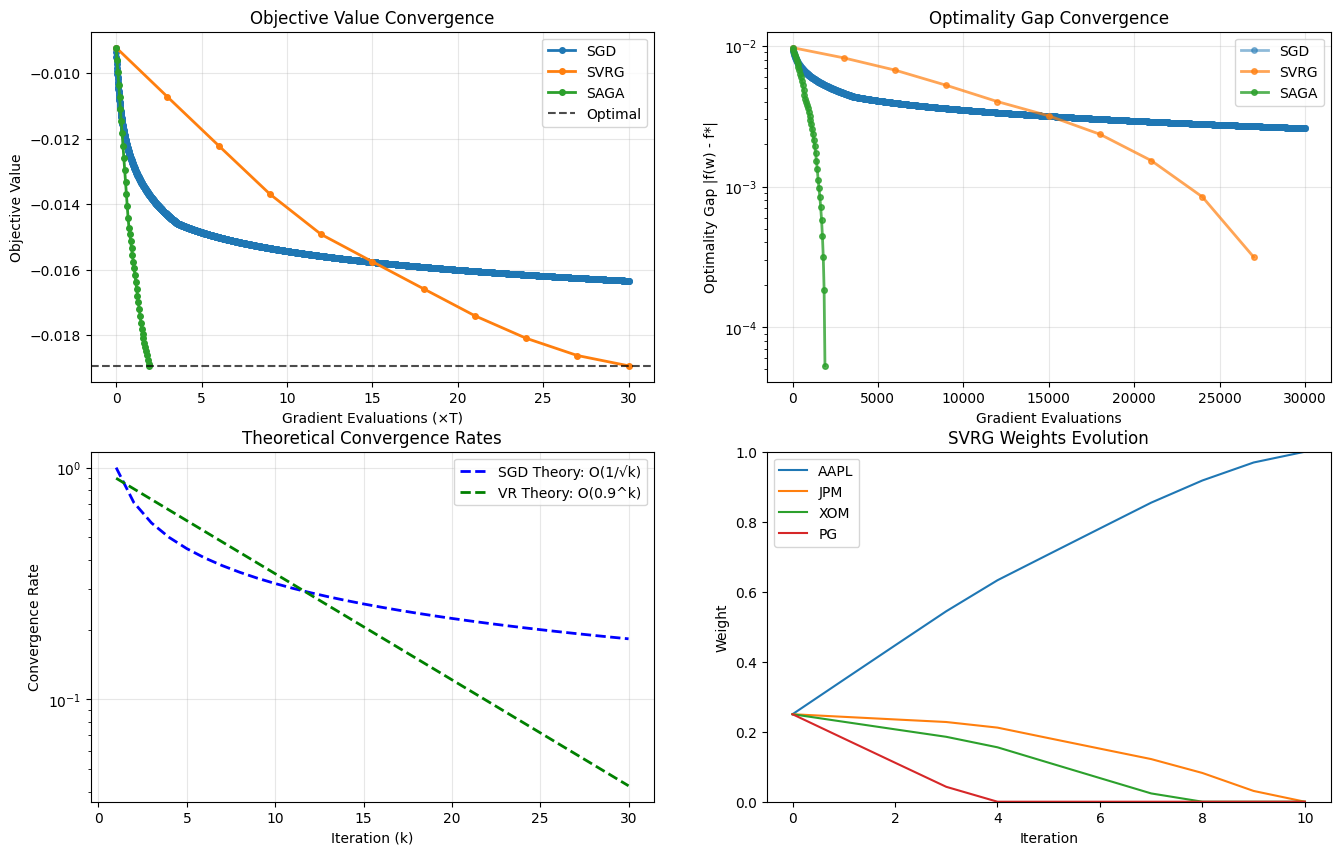

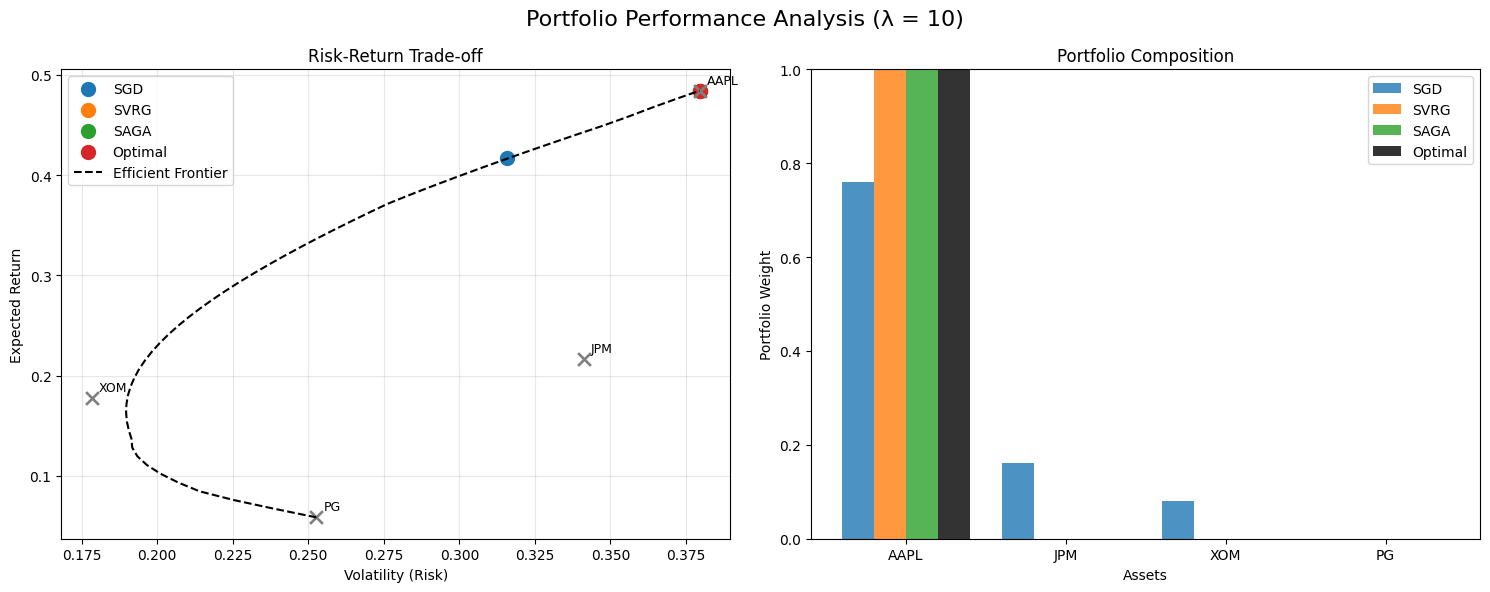


OPTIMIZATION DETAILS

Objective function: minimize 0.5 * w^T Σ w - λ * w^T μ
Risk aversion parameter (λ): 10

Ground truth (optimal) objective value: -0.018934

SGD:
  Final objective: -0.016337
  Optimality gap: 2.597181e-03
  Convergence time: 2.706 seconds
  Initial ||∇f||: 2.20e-02
  Final ||∇f||: 2.18e-02
  Gradient norm reduction: 1.0x

SVRG:
  Final objective: -0.018934
  Optimality gap: 2.775558e-17
  Convergence time: 0.841 seconds
  Initial ||∇f||: 2.20e-02
  Final ||∇f||: 2.17e-02
  Gradient norm reduction: 1.0x

SAGA:
  Final objective: -0.018934
  Optimality gap: 2.775558e-17
  Convergence time: 0.158 seconds
  Initial ||∇f||: 2.20e-02
  Final ||∇f||: 2.18e-02
  Gradient norm reduction: 1.0x

GRADIENT NORM CONVERGENCE ANALYSIS

SGD convergence rate: ||∇f|| ~ k^-0.00
  (Theory predicts: k^-0.5 for SGD)

SVRG convergence rate: ||∇f|| ~ 0.999^k
  (Linear convergence with ρ ≈ 0.999)

SAGA convergence rate: ||∇f|| ~ 0.996^k
  (Linear convergence with ρ ≈ 0.996)

Running bootst

/tmp/ipython-input-18-147584979.py:213: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax1.boxplot(gap_data, labels=['SGD', 'SVRG', 'SAGA'])


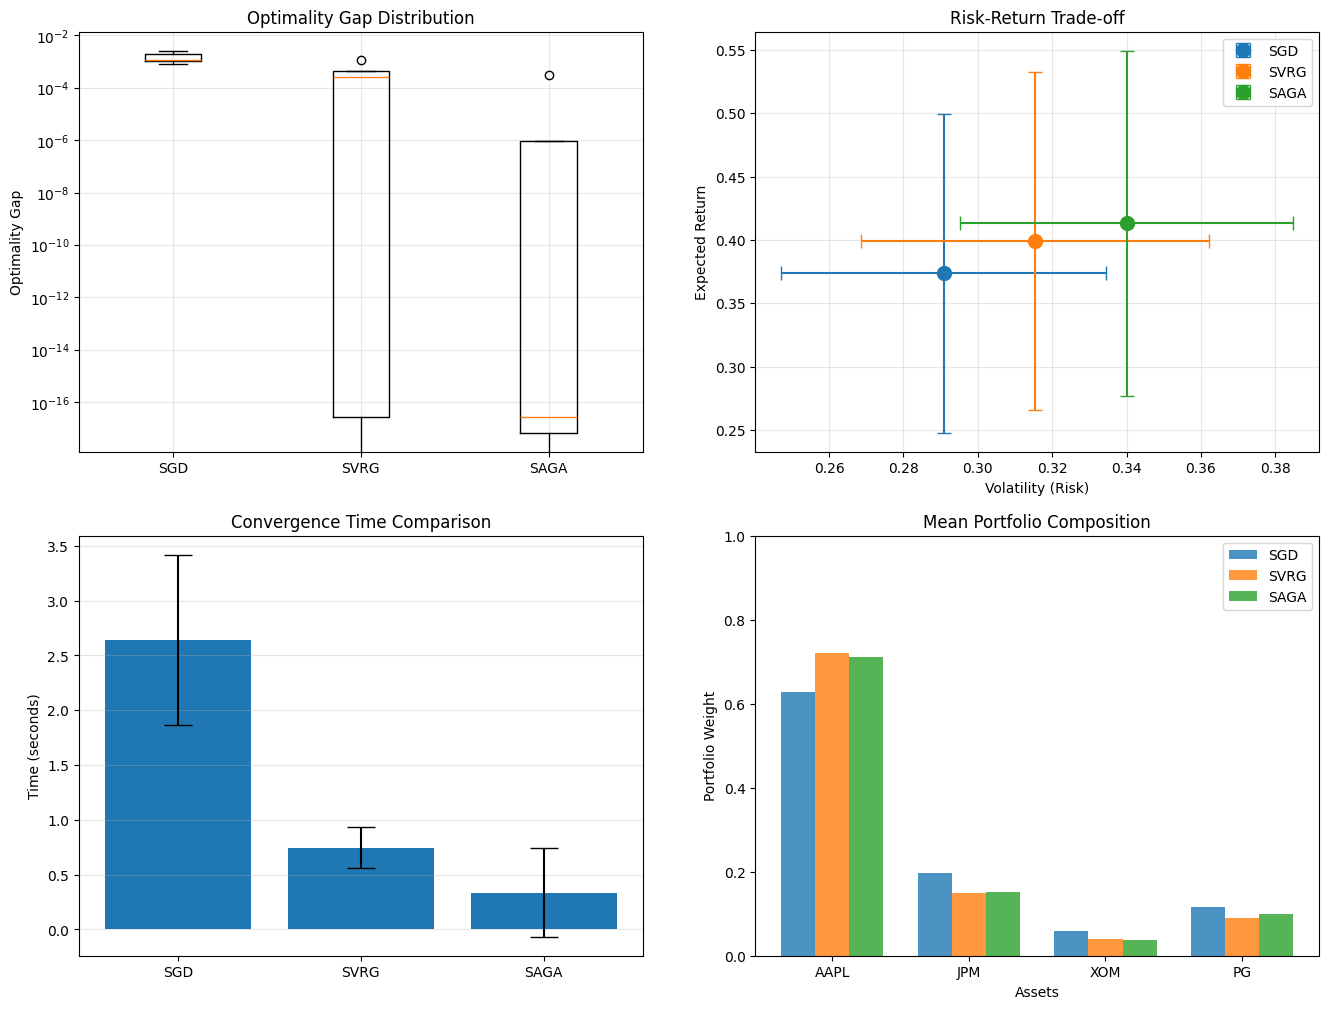

In [18]:
# Main execution
if __name__ == "__main__":
    np.random.seed(42)
    # Set parameters
    TICKERS = ['AAPL', 'JPM', 'XOM', 'PG'] # , 'MSFT', 'META', 'AMZN']
    START_DATE = '2000-01-01'
    END_DATE = '2024-01-01'
    T_SAMPLES = 1000
    N_BOOTSTRAP = 10  # Reduced for demo

    LAMBDA_RISK = 10

    # Initialize components
    print("Initializing portfolio optimizer...")
    optimizer = PortfolioOptimizer(n_assets=len(TICKERS), lambda_risk=LAMBDA_RISK)

    print("Fetching historical data...")
    simulator = DataSimulator(TICKERS, START_DATE, END_DATE)
    print("T_SAMPLES =")
    max_epochs = 10
    # print("\nGenerating bootstrap demo plots...")
    # simulator.plot_bootstrap_demo(n_demo_series=3, demo_length=500)
    # simulator.plot_block_structure_demo(demo_length=200)

    print("Generating bootstrap replications...")
    replications = simulator.generate_bootstrap_replications(B=N_BOOTSTRAP, T=T_SAMPLES)

    print("Running experiments...")
    runner = ExperimentRunner(optimizer)

    # Test different parameter settings
    print("\n" + "="*50)
    print("PARAMETER TUNING EXPERIMENT")
    print("="*50)

    # Try different parameters for each algorithm
    param_sets = {
        'conservative': {
            'SGD': {'eta0': 0.01, 'gamma': 0.1, 'max_iter': 10000},
            'SVRG': {'eta': 0.001, 'm': T_SAMPLES, 'max_epochs': 30},
            'SAGA': {'eta': 0.001, 'max_iter': 10000}
        },
        'moderate': {
            'SGD': {'eta0': 0.1, 'gamma': 0.01, 'max_iter': 30000},
            'SVRG': {'eta': 0.01, 'm': T_SAMPLES, 'max_epochs': 10},
            'SAGA': {'eta': 0.05, 'max_iter': 30000}
        },
        'aggressive': {
            'SGD': {'eta0': 0.1, 'gamma': 0.01, 'max_iter': 10 * T_SAMPLES},
            'SVRG': {'eta': 0.01, 'm': T_SAMPLES, 'max_epochs': 10},
            'SAGA': {'eta': 0.05, 'max_iter': 10 * T_SAMPLES},
            'epsilon_N_SAGA':{'eta': 0.05, 'max_iter': 10 * T_SAMPLES, 'epsilon': 0.01, 'q': 20},
            'KNN-SGD': {'k': 20, 'buffer_size': 500, 'alpha': 0.6, 'lr': 0.05, 'max_iter': 10 * T_SAMPLES}
        }
    }

    # Test with moderate parameters
    print("\nTesting with moderate parameters...")
    # MODIFIED: Pass target_obj and tol to the first single experiment run
    first_results = runner.run_single_experiment(
        replications[0],
        params=param_sets['moderate'],
        target_obj=runner.optimizer.objective_function(
            runner.optimizer.solve_deterministic(
                np.mean(replications[0], axis=0), np.cov(replications[0].T)
            ),
            np.mean(replications[0], axis=0), np.cov(replications[0].T)
        ),
        tol=1e-6
    )


    # Plot convergence with diagnostics
    runner.plot_convergence(TICKERS, first_results, "Convergence Comparison - Moderate Parameters")

    # Plot performance comparison
    runner.plot_performance_comparison(first_results, TICKERS)

    # Print optimization details
    print("\n" + "="*50)
    print("OPTIMIZATION DETAILS")
    print("="*50)
    print(f"\nObjective function: minimize 0.5 * w^T Σ w - λ * w^T μ")
    print(f"Risk aversion parameter (λ): {LAMBDA_RISK}")
    print(f"\nGround truth (optimal) objective value: {first_results['ground_truth']['objective']:.6f}")

    for algo in ['SGD', 'SVRG', 'SAGA', 'KNN-SGD', 'epsilon_N_SAGA']:
        if algo in first_results and first_results[algo]['history']['objective']:
            final_obj = first_results[algo]['history']['objective'][-1]
            gap = abs(final_obj - first_results['ground_truth']['objective'])
            print(f"\n{algo}:")
            print(f"  Final objective: {final_obj:.6f}")
            print(f"  Optimality gap: {gap:.6e}")
            print(f"  Convergence time: {first_results[algo]['history']['time'][-1]:.3f} seconds")

            if 'gradient_norms' in first_results[algo]['history']:
              grad_norms = first_results[algo]['history']['gradient_norms']
              if grad_norms:
                print(f"  Initial ||∇f||: {grad_norms[0]:.2e}")
                print(f"  Final ||∇f||: {grad_norms[-1]:.2e}")
                print(f"  Gradient norm reduction: {grad_norms[0]/grad_norms[-1]:.1f}x")

    # NEW: Gradient norm convergence analysis
    print("\n" + "="*50)
    print("GRADIENT NORM CONVERGENCE ANALYSIS")
    print("="*50)

     # Check theoretical convergence rates
    for algo in ['SGD', 'SVRG', 'SAGA']:
        if algo in first_results and 'gradient_norms' in first_results[algo]['history']:
            grad_norms = first_results[algo]['history']['gradient_norms']
            if len(grad_norms) > 2:
                # Estimate convergence rate
                log_norms = np.log(grad_norms[1:])  # Skip first one in case it's zero
                iterations = np.arange(1, len(grad_norms))

                # Fit linear regression to log(||∇f||) vs log(k) for SGD
                # or log(||∇f||) vs k for SVRG/SAGA
                if algo == 'SGD':
                    # For SGD: expect ||∇f|| ~ 1/√k
                    log_iterations = np.log(iterations)
                    slope = np.polyfit(log_iterations, log_norms, 1)[0]
                    print(f"\n{algo} convergence rate: ||∇f|| ~ k^{slope:.2f}")
                    print(f"  (Theory predicts: k^{-0.5} for SGD)")
                else:
                    # For SVRG/SAGA: expect ||∇f|| ~ ρ^k
                    if len(grad_norms) > 3:
                        # Estimate ρ from consecutive ratios
                        ratios = [grad_norms[i+1]/grad_norms[i] for i in range(len(grad_norms)-1) if grad_norms[i] > 0]
                        if ratios:
                            rho_estimate = np.mean(ratios)
                            print(f"\n{algo} convergence rate: ||∇f|| ~ {rho_estimate:.3f}^k")
                            print(f"  (Linear convergence with ρ ≈ {rho_estimate:.3f})")


    # Run all bootstrap experiments
    print("\nRunning bootstrap experiments...")
    all_results = runner.run_bootstrap_experiments(replications[:10])  # Reduced for demo

    print("(Gradient norm tracking enabled for first 3 replications only to save computation)")

    all_results = []
    for i, data in enumerate(replications[:10]):
        print(f"Running replication {i+1}/10")
        # Track gradient norms only for first 3 replications
        result = runner.run_single_experiment(
            data,
            algorithms=['SGD', 'SVRG', 'SAGA'],
            params=param_sets['moderate'],
            track_gradient_norms=(i < 3),  # Only track for first 3
            # MODIFIED: Pass target_obj and tol for stopping criterion
            target_obj=runner.optimizer.objective_function(
                runner.optimizer.solve_deterministic(
                    np.mean(data, axis=0), np.cov(data.T)
                ),
                np.mean(data, axis=0), np.cov(data.T)
            ),
            tol=1e-6
        )
        all_results.append(result)


    # Analyze results
    print("\nAnalyzing results...")
    summary = runner.analyze_results(all_results)

    # NEW: Analyze gradient norm statistics from tracked replications
    grad_norm_stats = {'SGD': [], 'SVRG': [], 'SAGA': []}
    for i, result in enumerate(all_results[:3]):  # First 3 have gradient tracking
      for algo in ['SGD', 'SVRG', 'SAGA']:
        if algo in result and 'gradient_norms' in result[algo]['history']:
          final_norm = result[algo]['history']['gradient_norms'][-1]
          grad_norm_stats[algo].append(final_norm)

    # Print summary
    print("\n" + "="*50)
    print("SUMMARY RESULTS")
    print("="*50)

    for algo, stats in summary.items():
        print(f"\n{algo}:")
        print(f"  Optimization Performance:")
        print(f"    Mean objective: {stats['mean_objective']:.6f} ± {stats['std_objective']:.6f}")
        print(f"    Mean optimality gap: {stats['mean_gap']:.2e} ± {stats['std_gap']:.2e}")
        print(f"    Mean time: {stats['mean_time']:.3f} ± {stats['std_time']:.3f} seconds")
# NEW: Add gradient norm statistics
        if algo in grad_norm_stats and grad_norm_stats[algo]:
            mean_final_norm = np.mean(grad_norm_stats[algo])
            std_final_norm = np.std(grad_norm_stats[algo])
            print(f"    Mean final ||∇f||: {mean_final_norm:.2e} ± {std_final_norm:.2e}")

        print(f"  Portfolio Performance:")
        print(f"    Expected return: {stats['mean_return']:.4f} ± {stats['std_return']:.4f}")
        print(f"    Volatility: {stats['mean_volatility']:.4f} ± {stats['std_volatility']:.4f}")
        print(f"    Sharpe ratio: {stats['mean_sharpe']:.3f} ± {stats['std_sharpe']:.3f}")
        print(f"    Mean weights: {stats['weights_mean']}")

    # Create comprehensive comparison plots
    fig = plt.figure(figsize=(16, 12))

    # Plot 1: Optimality gaps boxplot
    ax1 = plt.subplot(2, 2, 1)
    gap_data = []
    for algo in ['SGD', 'SVRG', 'SAGA']:
        gaps = []
        for result in all_results[:5]:
            if algo in result and result[algo]['history']['objective']:
                final_obj = result[algo]['history']['objective'][-1]
                f_star = result['ground_truth']['objective']
                gaps.append(abs(final_obj - f_star))
        gap_data.append(gaps)

    ax1.boxplot(gap_data, labels=['SGD', 'SVRG', 'SAGA'])
    ax1.set_ylabel('Optimality Gap')
    ax1.set_title('Optimality Gap Distribution')
    ax1.set_yscale('log')
    ax1.grid(True, alpha=0.3)

    algorithms = list(summary.keys())
    mean_sharpes = [summary[algo]['mean_sharpe'] for algo in algorithms]
    std_sharpes = [summary[algo]['std_sharpe'] for algo in algorithms]

    # Plot 3: Expected Return vs Volatility
    ax2 = plt.subplot(2, 2, 2)
    for algo in algorithms:
        ax2.errorbar(summary[algo]['mean_volatility'],
                    summary[algo]['mean_return'],
                    xerr=summary[algo]['std_volatility'],
                    yerr=summary[algo]['std_return'],
                    fmt='o', markersize=10, label=algo, capsize=5)

    ax2.set_xlabel('Volatility (Risk)')
    ax2.set_ylabel('Expected Return')
    ax2.set_title('Risk-Return Trade-off')
    ax2.legend()
    ax2.grid(True, alpha=0.3)

    # Plot 4: Convergence time comparison
    ax3 = plt.subplot(2, 2, 3)
    mean_times = [summary[algo]['mean_time'] for algo in algorithms]
    std_times = [summary[algo]['std_time'] for algo in algorithms]

    bars = ax3.bar(algorithms, mean_times, yerr=std_times, capsize=10)
    ax3.set_ylabel('Time (seconds)')
    ax3.set_title('Convergence Time Comparison')
    ax3.grid(True, alpha=0.3, axis='y')

    # Plot 5: Portfolio weights comparison
    ax4 = plt.subplot(2, 2, 4)
    x = np.arange(len(TICKERS))
    width = 0.25

    for i, algo in enumerate(algorithms):
        weights = summary[algo]['weights_mean']
        ax4.bar(x + i*width, weights, width, label=algo, alpha=0.8)

    ax4.set_xlabel('Assets')
    ax4.set_ylabel('Portfolio Weight')
    ax4.set_title('Mean Portfolio Composition')
    ax4.set_xticks(x + width)
    ax4.set_xticklabels(TICKERS)
    ax4.legend()
    ax4.set_ylim([0, 1])